## Introduction to Pytorch

### Shuaiqiang Liu

### Outline

* A toy example: approximating  $y=\cos(x)$
 1. Polynomial approximation
 2. Neural networks

* Basics of Pytorch 
 1. Introduction to Tensor
 2. Tensor Operations

* Common Modules in Pytorch
 1. torch.nn (Neural networks components)
 2. torch.optim (Optimation algorithms)
 
* Building a neural network 
* Training with Pytorch
* Save and load the model


## What is  Pytorch? 
pytorch tutorial
https://pytorch.org/tutorials/

In [1]:
import torch
print(torch.__version__)

1.10.1


### A toy example: $y=\cos(x)$
The aim is to approximate the function $y=\cos(x)$, $\frac{1}{2} \pi  \leq x \leq \frac{3}{2} \pi$.

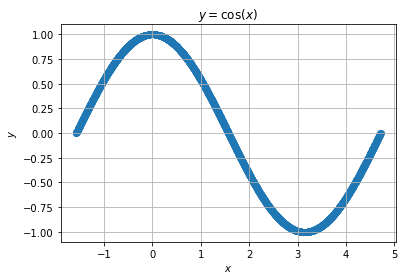

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

x = np.linspace(-0.5*np.pi, 1.5*np.pi, 2000)
y = np.cos(x)

# plot the function
plt.figure(1)
plt.scatter(x,y,label='y=cos(x)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y=\cos(x)$')
plt.grid()

***1. A polynnomial approximation, that is, finding the coefficients in a third polynomial,***
$$\hat y=a+b*x+c*x^2+d*x^3.$$
Define a polynomial function as follows, 
$$\hat y =f(x;a,b,c,d)$$
Given the data set, that is, input-output pairs $(x_i,y_i), i=1,\ldots,n$, the loss function is 
$$L = \sum_i(\hat{y}_i-y_i)^2 = \sum_i(f(x_i;a,b,c,d)-y_i)^2.$$

In order to minimize the loss function,  the gradient descent algorithm is used as follows
\begin{equation}
\begin{cases}
a \leftarrow  a - \eta \frac{\displaystyle \partial L}{\displaystyle \partial a}, \\[1.5ex]
b \leftarrow  b - \eta \frac{\displaystyle \partial L}{\displaystyle  \partial b},\\[1.5ex]
c \leftarrow  c - \eta \frac{\displaystyle \partial L}{\displaystyle \partial c}, \\[1.5ex]
d \leftarrow  d - \eta \frac{\displaystyle \partial L}{\displaystyle  \partial d},\\[1.5ex]
\end{cases}
\end{equation}





the gradient of the loss w.r.t the coefficients is computed by Pytorch automatically.

In [3]:
%%time

import torch
import math

dtype  = torch.float
device = torch.device("cpu")
torch.manual_seed(0)

x = torch.from_numpy(x)
y = torch.from_numpy(y)

# Create random Tensors for coefficients. 
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 3e-7
loss_values = []

for t in range(25000):
    
    # Forward pass: compute yhat using operations on Tensors.
    yhat = a + b * x + c * x ** 2 + d * x ** 3 

    # Now loss is a Tensor of shape (1,)
    loss = (yhat - y).pow(2).sum()    
    
    # print out the loss item, equals MSE times N
    loss_values.append(loss.item())
    if t % 1000 == 99:
        print('Iteration', t,  'Loss=', loss.item()) 

    # Use autograd to compute the backward pass. 
    loss.backward()

    # Manually update coefficients using gradient descent. 
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
 
        # Manually assign zeros to the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
  
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 ')

Iteration 99 Loss= 6556.619941564821
Iteration 1099 Loss= 446.92491406852776
Iteration 2099 Loss= 241.21402109470145
Iteration 3099 Loss= 133.49242447391555
Iteration 4099 Loss= 75.89898519738732
Iteration 5099 Loss= 44.9582016365039
Iteration 6099 Loss= 28.299989811121772
Iteration 7099 Loss= 19.32277402302733
Iteration 8099 Loss= 14.482675437593517
Iteration 9099 Loss= 11.872631256475533
Iteration 10099 Loss= 10.465070419085736
Iteration 11099 Loss= 9.705943319988961
Iteration 12099 Loss= 9.296506718220758
Iteration 13099 Loss= 9.07570319580605
Iteration 14099 Loss= 8.95660668827864
Iteration 15099 Loss= 8.892372101573153
Iteration 16099 Loss= 8.857728584579863
Iteration 17099 Loss= 8.839043986456021
Iteration 18099 Loss= 8.828964248375843
Iteration 19099 Loss= 8.823533906163705
Iteration 20099 Loss= 8.820603495319524
Iteration 21099 Loss= 8.81902164341793
Iteration 22099 Loss= 8.818171423570888
Iteration 23099 Loss= 8.817709289304672
Iteration 24099 Loss= 8.817461342018822
Result: y

Text(0.5, 1.0, 'Loss history')

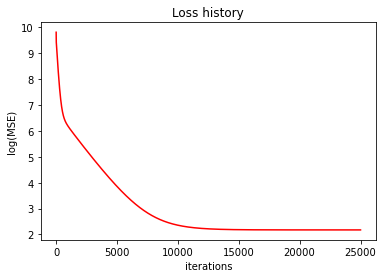

In [4]:
plt.plot(np.array(np.log(loss_values)), 'r')
plt.xlabel('iterations')
plt.ylabel('log(MSE)')
plt.title('Loss history')

#### Testing the polynomial with the learned coefficients

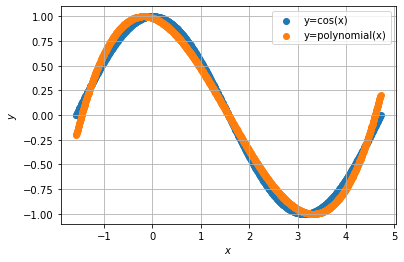

In [5]:
# test data---no overlapping data points except two ending points
xtest = torch.linspace(-0.5*math.pi, 1.5*math.pi, 1111, device=device, dtype=dtype) 

ytrue = torch.cos(xtest)
yhat  = a + b * xtest + c * xtest ** 2 + d * xtest ** 3

plt.scatter(xtest.detach(),ytrue.detach(),label='y=cos(x)')
plt.scatter(xtest.detach(),yhat.detach(),label='y=polynomial(x)')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

## How to create a Tensor in Pytorch?

1. create a tensor from an existing array

In [6]:
import torch
data        = [[0.0, 1.0], [2.0, 3.0]]
tensor_data = torch.tensor(data)
print(tensor_data)

tensor([[0., 1.],
        [2., 3.]])


In [7]:
print(data)

[[0.0, 1.0], [2.0, 3.0]]


In [8]:
tensor_data[0][0] = 9.0
print(tensor_data)
print(data)

tensor([[9., 1.],
        [2., 3.]])
[[0.0, 1.0], [2.0, 3.0]]


**Note: The array and Tensor do not share the same memory.**

2. from numpy


In [9]:
import numpy as np 
np_array    = np.array(data)
tensor_data = torch.from_numpy(np_array)
print(tensor_data)

tensor([[0., 1.],
        [2., 3.]], dtype=torch.float64)


In [10]:
tensor_data[0][0]=9.0
print(tensor_data)
print(np_array)

tensor([[9., 1.],
        [2., 3.]], dtype=torch.float64)
[[9. 1.]
 [2. 3.]]


In [11]:
np_array[0][0]=10.0
print(tensor_data)
print(np_array)

tensor([[10.,  1.],
        [ 2.,  3.]], dtype=torch.float64)
[[10.  1.]
 [ 2.  3.]]


**Note: Convertion between Numpy and Torch, the torch Tensor and numpy array share the same memory, and changing one will change the other.** 

3. from an existing tensor

In [12]:
x_ones = torch.ones_like(tensor_data)   
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(tensor_data, dtype=torch.float32)   
print(f"Random Tensor: \n {x_rand}, dtype={x_rand.dtype} \n")

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64) 

Random Tensor: 
 tensor([[0.4556, 0.6323],
        [0.3489, 0.4017]]), dtype=torch.float32 



4. given a specific size

Suppose we want to create a tensor $x$ of shape (m,n) with Pyrorch

In [13]:
shape = (3,2)
rand_tensor = torch.rand(shape)
print(f"Random Tensor: \n {rand_tensor} \n")

ones_tensor = torch.ones(shape)
print(f"Ones Tensor: \n {ones_tensor} \n")

zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0223, 0.1689],
        [0.2939, 0.5185],
        [0.6977, 0.8000]]) 

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


### Each Tensor has the following attributes,
1. torch.dtype,
2. torch.device, 
3. torch.layout (physical memory).

In [14]:
x1 = torch.randn((2,3), device=torch.device('cpu'))
print(f"x1: \n dtype={x1.dtype}, device={x1.device}, layout={x1.layout}")

x1: 
 dtype=torch.float32, device=cpu, layout=torch.strided


In [15]:
if torch.cuda.is_available():
    x2 = torch.randn((2,3), device=torch.device('cuda'))
    print(f"x2: \n dtype={x2.dtype}, device={x2.device}, layout={x2.layout}")

x2: 
 dtype=torch.float32, device=cuda:0, layout=torch.strided


####  PyTorch supports multiple types of tensors, including:
1. FloatTensor: 32-bit float
2. DoubleTensor: 64-bit float
3. HalfTensor: 16-bit float
4. IntTensor: 32-bit int
5. LongTensor: 64-bit int

### Tensor Operations
Refer to https://pytorch.org/docs/stable/tensors.html for the list of supported operations

**Manipulate a Tensor**

In [16]:
a = torch.randn(1, 2, 3, 4)
print(a.size())

# Swaps 2nd and 3rd dimension
b = a.transpose(1, 2)  
print(b.size())

c = torch.transpose(a, 1, 2)
print(c.size())

torch.Size([1, 2, 3, 4])
torch.Size([1, 3, 2, 4])
torch.Size([1, 3, 2, 4])


**Math operations**

In [17]:
m,n =3,3
x = torch.zeros((m,n)) +2 
y = torch.zeros((m,n)) +1

z_add    = x+y
z_minus  = x-y
z_times  = x*y
z_divide = x/y

print('addition: \n',z_add)
print('division: \n',z_divide)

addition: 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
division: 
 tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [18]:
torch.cat((x, y), 0)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

 **multiplication of Tensors**

In [19]:
## matrix multiplication
z   = torch.matmul(x,y)
zmm = torch.mm(x,y)

## elementwise multiplication
zz   = x*y
zzem = torch.mul(x,y)

print(f'torch.matmul:\n{z} \n torch.mm:\n{zmm}')
print(f'x*y:\n{zz} \n torch.mul:\n{zzem}')

torch.matmul:
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]]) 
 torch.mm:
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])
x*y:
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]) 
 torch.mul:
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


**Broadcasting in element-wise multiplication**

In [20]:
x = torch.ones(2, 1)
y = torch.randn(1, 2)
print(x)
print(y)

tensor([[1.],
        [1.]])
tensor([[ 1.1317, -0.6455]])


In [21]:
z1 = x*y

In [22]:
print(z1)

tensor([[ 1.1317, -0.6455],
        [ 1.1317, -0.6455]])


In [23]:
z2 = y*x

In [24]:
print(z2)

tensor([[ 1.1317, -0.6455],
        [ 1.1317, -0.6455]])


### Dynamic computational graph
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/09/dynamic_graph.gif" width="400" align="center">


### Computional Graph of $y=\cos(wx+b)$

In [25]:
import torch
x=torch.tensor(0.5,requires_grad=False)
w=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(0.5*torch.pi-0.5,requires_grad=True)

wx  = w*x
z   = wx +b
y   = torch.cos(z)

print(f'w={w},x={x},wx={wx},z={z},y={y}')

w=1.0,x=0.5,wx=0.5,z=1.5707963705062866,y=-4.371138828673793e-08


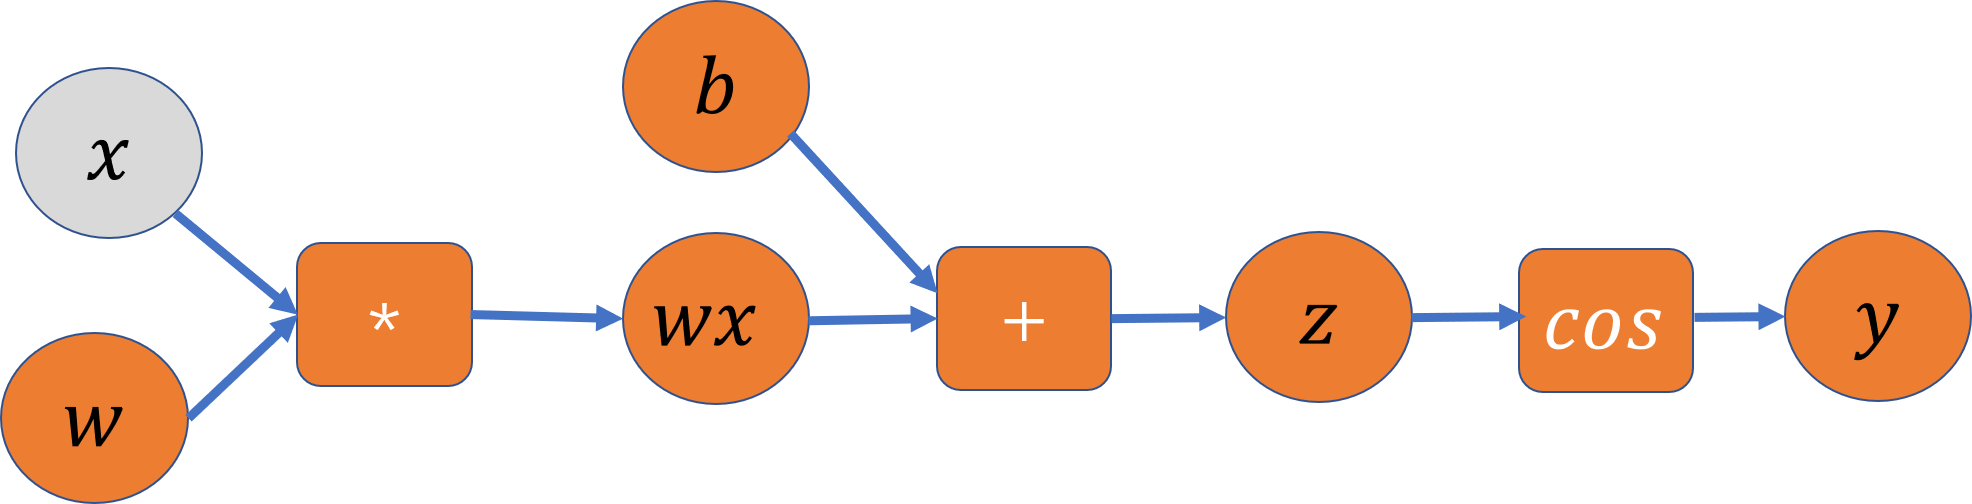

In [26]:
import base64
from IPython import display
encoded_string = 'iVBORw0KGgoAAAANSUhEUgAAB7QAAAH4CAYAAADKG9ISAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFxEAABcRAcom8z8AANkmSURBVHhe7P0JlBz1fe9/5/7z3JwkT/4J1zc5znPtxD45J8cb6h6QTYxxLNAIHFZN10ggsUgChJBYNJpBiE3s2GDMVA2Y1QETIDbGjtlsMGAbIWYAYxvjJd5ubIjtG9sXnKt7k3i7Nurn96n5/aRWz7fX6aW6+/0653NspOme7qqPqmvqO1X1WwAAAMAgWL78Y7+94KjkDUPR5GG5QnxmLkriXBR/MF+IP5IvJA+6P3vc/fcX3J9/w/3Z992f/avLr3zc/4+/r79Lv8Z9rR6jx+o50udyzzkUTR2m76Hv5b8tAAAAAAAAAAAAAACz9one/7qhkXhpLkom8lFyQ66QPJqP4u+6/1/sbOLvzn5v9xrca9Fr0mvzLxMAAAAAAAAAAAAA0O9yham984XkVJc781FSdXB96IrLiievOrt44dr1xZtPO6545xlHFz++MSp+atORxc9OHFp8avPBxS9vObD4rXPfWXzx/LcXf7J1YRr9f/2Z/k5fo6/VY/RYPYeeS8+p59b3sL53Sb6bvlb3mvXa/dsAAAAAAAAAAAAAAPS6odFr3rFgZPLsXCG+z+Wl8oHxO5dftXPdqs3FS9eeWvzb044tPrTpyOJXtiwqvrR13+K/XrhPR6Lvpe+p763XoNei16TXVv569R70XvSe9N782wQAAAAAAAAAAAAA9IKhKF6Sn71094/KB8KHHHN5ceLEjcUPnb6i+OzZw+aAOUvRa9Rr1WvWay9/P/493qD37N8+AAAAAAAAAAAAACBLcoV4scsHcoXkf5QOfEdWXlzcevKG4kfPHC1+/Zx3mUPjXso/uveg97J17Yb0vZW+V7332WUQL/aLBQAAAAAAAAAAAADQDUMj1y7KR/G1+Sj5Qelg96iVlxTff+pJxWc2LzGHwv0UvUe9V73n0mXg4pZJfK2WkV9cAAAAAAAAAAAAAIB2yxWSVblC/FTpAPeIlZcU37fupOJTmw82B7+DEL13LQMti9Jlo2WVK0yu8osPAAAAAAAAAAAAANBKCw6/8b/kovjcfCH55zCoXbT8yleuXHdycWaAh9iVomWiZaNltGu47ZadlqGWpV+sAAAAAAAAAAAAAIBm5QpTe+cKyQfyUfLrMJhdftzW4p1nHG0OcsncaFlpme0abEfxr2fvtT21t1/MAAAAAAAAAAAAAIB65Ucm98tFyb27h7BJccPqieLDm44wh7akdrTstAxLl2kuiu/VsvaLHQAAAAAAAAAAAABQyYLCta/NFZJbSoeuW9duKD579rA5pCWNR8tSy7R0GWuZa9n71QAAAAAAAAAAAAAA2OXii/+fXBRfnC/EvwlD1itOOaX4vfP2N4eyZP7RstUyLhls/1rrQOvCrxUAAAAAAAAAAAAAGGz5kclThqLkB2GwOn7iWPG5LQeZQ1jS+mhZj5+4cddgeyiKf6B14lcPAAAAAAAAAAAAAAyefCE+PB8lz4RB6gnHn1t8bPwwc+hK2h8t+xNOOHfXYDtdN24d+dUFAAAAAAAAAAAAAIMhX0imwuD0sBWXFe8+c5k5ZCWdj9aF1smuwbZbV361AQAAAAAAAAAAAED/ykfXHpQvJF8Lw9Lr1q8yh6qk+9G6KRlqu3V27UF+NQIAAAAAAAAAAABAf8kV4svDgPSY4y4oTm8+xBykkuxE62iFW1dhvWkd+tUJAAAAAAAAAAAAAL1vn9H4rblCMhOGou9bd7I5PCXZjdbZ7qF2MqN16lcvAAAAAAAAAAAAAPSmfJScHQahR6y45JXHxg8zB6Yk+9G6O2LFxTvD+tS69asZAAAAAAAAAAAAAHpLLko+FIafF69dX3xp677moJT0TrQOtS7DetU69qsbAAAAAAAAAAAAALIvv2zyNblC8rgGnm8dvWbnvWMj5nCU9G60TrVu06G21rVb5371AwAAAAAAAAAAAEA25aP4gKEoflGDzsNWXPqbpzcvMQeipPejdXv4iktf0bqeXefxAb4GAAAAAAAAAAAAAJAt+UJ8XD6K07N2T1m1ufjC+W83B6Gkf6J1rHWtdZ6ue9cBXwcAAAAAAAAAAAAAyIZ8lFwwO9RMilvXbjCHn6R/o3Ue1r+64GsBAAAAAAAAAAAAAN2VL8Q3hmHm9RtOMAeepP+jdb9rqO064esBAAAAAAAAAAAAAN2Ri+IbNMAciuLiP2wsmINOMjhRB9QFdULd8DUBAAAAAAAAAAAAgM7KFeIPhDNyHx4/whxwksGLuhB6oY74ugAAAAAAAAAAAABAZ+RH4mvD0PJTm440B5tkcKNOhH6oK742AAAAAAAAAAAAANBeuShOwrDyk5uOMgeahKgboSfqjK8PAAAAAAAAAAAAALRHvhBPhiHlA2NLzUEmISHqSOiLuuNrBAAAAAAAAAAAAACtlSvEV4fh5P0Ms0mdUVdCb9QhXycAAAAAAAAAAAAAaI38SHJKGEreOzZiDi4JqRR1JvRHXfK1AgAAAAAAAAAAAID5yY8mB4Zh5G2nrzAHloTUym2nr9w91Had8vUCAAAAAAAAAAAAgObkl02+Ziia/KGGkJedss4cVBJSby51HVKX0k65bvmaAQAAAAAAAAAAAEDj8oX4sxpArlu12RxQEtJo1KX0LG3XLV8zAAAAAAAAAAAAAGhMPkpu0uDx0GMue+WF899uDicJaTTq0qErLnslHWq7jvm6AQAAAAAAAAAAAEB9clEy4QeOxSfPOsQcTBLSbNSp0C91zdcOAAAAAAAAAAAAAKpbMBr/dRg23n3mMnMgSch8o26Fnqlzvn4AAAAAAAAAAAAAUFkuSp7VkPG969aag0hCWhV1TF1T53z9AAAAAAAAAAAAAMCWL8SXasA4svIicwBJSKujrqVnao/Gl/oaAgAAAAAAAAAAAMCe9h5J9k8Hiy6Pjh9uDh8JaXXUtdA7ddDXEQAAAAAAAAAAAAB2yxWSpzRUvPyUU8zBIyHtyhWuc+peLkqe8nUEAAAAAAAAAAAAgFm5QnyhBopHrLhk50+NgSMh7Yw6p+6lQ23XRV9LAAAAAAAAAAAAAINuqDD1Ng0SlYfHjzAHjoS0O5923Qs9VCd9PQEAAAAAAAAAAAAMslwhflxDxEvXnmoOGgnpVC495dTZS4+7Tvp6AgAAAAAAAAAAABhUuZEk0gBx0fIrX/nxBW8zh4yEdCrqoLqYDrVdN31NAQAAAAAAAAAAAAyifCH+vIaHt5x2rDlgJKTTURfVSXXT1xQAAAAAAAAAAADAoMlF8QkaHP7NMZe/Yg0WCelW3u06mQ61R6eO93UFAAAAAAAAAAAAMEjyUfx1DQ3vOONoc6hISLdyxxnHzJ6l7Trq6woAAAAAAAAAAABgUORG4vUaGBaOvWinNVAkpNtRN9OhdiE51dcWAAAAAAAAAAAAwCAYipIXNCy8Z2NkDhMJ6Xbu2TgaztJ+wdcWAAAAAAAAAAAAQL/LRcmEBoUrjz/fHCQSkpWoo+qqOuvrCwAAAAAAAAAAAKCf5aPkOxoSPrBpqTlEJCQreWBsqT9LO/mOry8AAAAAAAAAAACAfpUvxIdrQHjEikvNASIhWYu6mg61XXd9jQEAAAAAAAAAAAD0o1whuUfDwevWrzKHh2R3tq97Y/Guo/+ieP1Rryu+55DX7so5i/60uP6v/iTNyvyrioe94Y925YWzc+ZzkeZz3YZVs5cdd931NQYAAAAAAAAAAADQb/ZZ8YH/lp7p6vKdcw8wh4dkdzSgdout7uz96t8zn4fML+pq6K067JY1AAAAAAAAAAAAgH6Ti5LzNBTcuGaTOTgke0YD7T/f63fM4bUVnbFtPQ+Zf9RZdVcddssaAAAAAAAAAAAAQL/JF5JvaSj40KYjzaEhqRxdatwtwqrR5cmtx5L5R51Nz9J2HXbLGgAAAAAAAAAAAEA/WTCSHKqB4GErLjMHhqR2dAa2W5QV8/yZbzEfR1oTdVcdVpfd8gYAAAAAAAAAAADQL/JRcreGgdeuX20OC0ntPLjqL81BtsL9s9sfdTc9S9t12S1zAAAAAAAAAAAAAP0iH8U/0zBwZvMh5rCQ1E61gTb3z25/ZjYf7Afa8c/cMgcAAAAAAAAAAADQDxaMTg1rEDh67IXmoJDUl+uPep05zFa4f3Znog6ry+q0W+4AAAAAAAAAAAAAel0uiq/SEPDKdWvNISGpL+855LXmMFvh/tmdiTqsLqvTbrkDAAAAAAAAAAAA6HX5KHlOQ8DHxg8zh4Skvhz2hj8yh9ncP7tzUYfVZXXaLXsAAAAAAAAAAAAAvWxB4drXagD4ttFrdloDQlJ//nyv3zEH2tw/u7NRl9VpddstfwAAAAAAAAAAAAC9Kl+YPFHDvw2rJ8zhIKkvL5ydM4fZCvfP7mzUZX+W9hq3/AEAAAAAAABkwcJ1t/znvaNr3pgvxIfnCsnGXBQn+Sj5W5e73Z990v3Z4+7PvuDyTfdn388Xkn91+ZXPv+rP9Hfp17iv1WPSx7rn0HPlRpONem59D30v/20BAECPc5/7H3af98VbT19pDgdJfdHQ2i1OM9w/u7NRl9VpddstfwAAAAAAAACdtCCK/yJfmCzkCvHmfJTclCskn8kX4hd00K6jKSQv6Hvnovjm9LW416TX5l8mAADoEfkoflmf7V/ZcqA5HCT15T2HvNYcZnP/7M5HXZ7dZ41fdusAAAAAAAAAQDvllydD+UJ8us4wyRXif95jqFyWQ065pbjqnLuKW66+tzh52yPFG//+s8UPfWxb8SP3Txfvffjp4kOf+0Lxc9PPFZ969ivF557/x+I3vvmtNPr/+jP93UOfe7Z476efTh+jx+o59Fx6Tj23vof1vUP0GtMzvdxr1mv3bwMAAGRQfjR+iz6/D1txmTkYJPXnsDf8kTnQ5v7Z3Yk6ne6fuo679QAAAAAAAACgVYZGrl20oBCfn4uST+WieEfpsFh55/HX7zzpgg8Xz5+8v3jt3z1WvOeTM8Unnvpy8dvf/nbxO9/5Tkei76Xvqe+t13D+5H1FvSa9tvLXq/eg96L3pPfm3yYAAMiAoUK8TJ/X3D97/vnzvX7HHGhz/+zuJNxHWx136wEAAAAAAADAfOje1C635qPkp2EQHPLuU24pbrziY8Xr7/pM8TPbv2QOmLMUvcbr7/xM8Uz3mvXay9+Py0/T9+res3/7AACgS3IjyUX6fL5q3cnmUJDUl+3r3mgOsxXun92dqNPqtjru1gMAAAAAAACARg1Fk4flouRv0wFvycB35Izbiudcc196uW9dBtwaGvdS9B70XvSe9N5K36vLT3PR1Ae1LPxiAQAAHZQvxB/VZ/LdZy4zh4KkvnD/7OxFnU73N13H3boAAAAAAAAAUI8FI8mhuUJySz5KXvYD3TQa9L73poeKn3ky+2dgzzd6j3qvxnD7ZS0bLSO/uAAAQJvlC/FX9Tn89OYl5lCQ1JdW3D/7hbNzu2L9PWks6nS6j+k67tYFAAAAAAAAgMqK/yk3Eq/PF5Ivlwxvi0tPv634nhs/1ROXEW9X9N61DLQsSpeNlpWWmZadX4gAAKANclHya332/ssFbzOHgqS+NHv/7AdX/WXxnEV/mp7J/Ue/+9t7PFZD8uuPep35OFI76rS6rY675QkAAAAAAACg3FuWXvNnuUJ8Rb7kbOwlJ9+884obP1V8bICH2JWiZaJlo2UUlpeWnZahlqVfrAAAoEWGjnr/m/V5e+iKy8yBIKkvuke2W5xmKt0/W/fcrnRWd3k07OY+3M1F3VbH1XW3LAEAAAAAAADIPiPJ/rlCfHvJULa4YuKO4q33bDMHuWRutKy0zEqXoZaplq1fzAAAYJ5y0dSoPmPXrz7LHAaS+qKzsN3iNAfR1tfrjOzys7FrRV/PULvxqNvpfqTruluOAAAAAAAAwGAbiuIl+ULymdIh7GmX3lO879PPmENbUjv3PfJMugxLl6mWsZa1X+wAAKBJuUJ8oT5br1x3sjkMJPVFA2q3OOek/P7Zujd2vWdlW6k0ICeVo26r4+q6W4YAAAAAAADAYMqPxm/JR8ndYeD69pUfKF449UBx+9PPm0Na0niedMtSy1TLNixnLfNcYWpvvxoAAECDclGc6DP1ltOO3WMISBpLpSF16f2zrWG2zrrWkFp/fsDr/qCus7a5p3ZjUbfVcXXdLT8AAAAAAABgsLxx5AP/NRclcRiw7rNsKr0H9D9+41vmUJbMP1q2WsZa1mG56wCl1oVfLQAAoE75QnybPkv//ozl5jCQ1I4G1ZUG0eES4eXDbH39yvyrzEuIv+eQ1+7xHOXRY8sfQypH3U73GV3X3fIDAAAAAAAABkc+ircMRcm/h6Hq5vd9ovj0F75qDmFJ66NlrWUelv/suoi3+NUDAADq4D5DP67P0XvHRsxhIKmd7eveaA6ew+XBrWF26ZnbVmoNtR9c9Zfm48jcqNt+f/HjbtkBAAAAAAAA/S8XxSfko+Sf/IGx4tqtHyk+/LkvmENX0v5o2WsdhPWhdaN15FcXAACoIldIHtXn5yPjh5vDQFI7lYbP4f7ZOhM7/Nmf7/U75lnZVvS1pc9XGt2z23oMmRt1Wx1X192yAwAAAAAAAPpXennxQnxXGJyOjt1e/Mj90+aQlXQ+WhdaJ2H9aF1xGXIAAKpzn5nP6HNz+qxDzGEgqZ1q988uHXbrzGydzW09hxUNxEufrzT6ntZjyNyo237/8Bm37AAAAAAAAID+lB+Njx6Kkh/rYNjC5VM7r7/zM+ZQlXQ/WjdaR1pXWmdDhanlfjUCAIAyuUL8DX1mPrflIHMYSGqn0pnUOos63Fu7nsuMl0dfX/6cIdxHu/6o2+q4uu6WHQAAAAAAANBfFq2+/XdzUXyzDoIpa877cPGJp75sDlJJdqJ1pHUV1pvWodalX60AAMDLR/EP9Vn57XPfaQ4DSfVUun92eXSmtvX4atF9sq3nCrEeQ+ZG3Z7dJ4x/6JYbAAAAAAAA0D/yhfjwfMm9sidvfcQcnpLsZvK2R3YNtV2+q3XqVy8AAHByhfj/6HPyBxfsZw4DSfVcf9TrzGFzaXQPbeuxtaJ7bVvPF/LC2TnzcWTPqNvquLrulhsAAAAAAADQH/KFeDIMQlduvqP46BNfNAemJPvRutM6DOtT69avZgAABl74fPypMQgktaNhtVuMFaPLkTc7eK410NbfW48je+Zll9Bzt9wAAAAAAACA3vbmZZOvyhXih8JBr/fe9JA5JCW9F63LsF61jrWu/WoHAGBghTO0f8gZ2k2l0v2zQ3QGt/W4esJAuzXhDG0AAAAAAAD0jQXLr12YLyTf0gGvg0686Tf3P/KMORglvRut08Un3vSK1vHQaPItrXO/+gEAGEjhHtrfOfcAcxhIKkdnXrtFWDEHvO4PzMfVGy453ppwD20AAAAAAAD0haHC5PJ8FP9SB7t0eeqnv/BVcyBKej9at8duvjMc2Pyl1r2vAQAAAydXiL+hz8QvbznQHAaSynlw1V+ag+YQ/b31uHqzfd0bzecNsR5D5ua5LQeFM7S/4ZYbAAAAAAAA0HvyUbxldriZFDe95+PmEJT0X7Suw3pXB3wdAAAYKO5z8Bl9Fk5vPsQcBpLKec8hrzUHzcphb/gj8zGNpNrAXJc6tx5D5mb6rEPCPt8zbtkBAAAAAAAAvSUfJTf5A1zcL3sAU3pfbXXB1wIAgIGRKySP6nPw0fHDzWEgqRwNrd0iNHPX0X9hPqaRVBuYz/dy5oOUR1y31XF13S07AAAAAAAAoHfko6kHwjDz1o8+bg48Sf9H6z70QJ3w9QAAYCC4z7+P6zPw3rERcxhIKkdnSbtFOCd/9Lu/3ZL7W6/Mv8p8fmX9X/2J+RgyN+q239f7uFt2AAAAAAAAQG/IR8n9OrB14OqbXnnwsc+bg04yOFEH1AV/sPN+XxMAAPpevhDfps+/vz9juTkMJHaq3d+6FZcbV6qdAX79Ua8zH0PmRt1O9/Fc192yAwAAAAAAALIvV4jvmx1m3/jKY098yRxwksHLY098sbjIdULdUEd8XQAA6Gu5KE702XfLaceaw0Bip9rlwFtxuXGl0hngyvNnvsV8DJkbdTvdv3Ndd8sOAAAAAAAAyLZclNyrA1qLVt34yqNPfNEcbJLBjTqhbswe9Ezu9bUBAKBv5Qrxhfrcu3LdyeYwkNipdjnwVgybq50BrkuaW48hdtTtdN/Odd0tPwAAAAAAACC78lH8CR3MepeG2dsYZhM76oY6oq6oM74+AAD0pVw0NarPvPWrzzKHgcROpbOn937175lf32iqnQHeqkuaD0rU7XSg7brulh8AAAAAAACQTflC8g/pMPuEG155hGE2qRF15K9dV9KhtuuOrxEAAH1n6Kj3v1mfd4euuMwcBpK5eeHsnDloVtb/1Z+Yj2k01e6f3apLmg9K1G11XF13yw8AAAAAAADInnyU3J0Os1fdWPz0418wB5iElEddUWfSobbrkK8TAAB9Jxclv9bn3b9c8DZzIEj2jAbKbrGZuf6o15mPaSQamOuy4tbz68/199bjyNyo0+q2Ou6WHwAAAAAAAJA9uUJ8uQ5ivX3lB15hmE0azcOuM+pOeiC0MHW5rxUAAH0lX4i/qs+6pzcv2WMYSOycs+hPzWGz0or7Z2sobj230qozwAcl6rS6rY675QcAAAAAAABky9BovDo9gOXy4fufNAeWhNTKh++fDmdpF4dGp1b7egEA0Dfyhfij+py7+8xl5lCQ7JlqlwO3vr7RHPC6PzCfW9m+7o3mY4gddTrdj3Mdd8sPAAAAAAAAyI58FB8QhpCTtz1iDioJqTex61Dok7rlawYAQF/IjSQX6TPuqnUnm0NBsmcqXQ5871f/nvn1jeTBVX9pPreiQbr1GFI56rS6rY67ZQgAAAAAAABkw94rpl49FCUv6ODVlqvvNQeUhDQadUmdUrfevPzqP/V1AwCg5w0V4mX6jNuwesIcCpLd0RnSbpGZ0ZnV1mMaycr8q8znVjTsth5DKkedTvffXMfdMgQAAAAAAACyIVdIHtWBq1Xn3GUOJglpNuqUuqWO+boBANDz8qPxW/T5dtiKy8yhINmd9xzyWnPYrGgYbT2m3lQ7O5t7ZzcXdVrdVsfdcgQAAAAAAAC6LxclN+ig1ZKTbn7l2ee+Zg4lCWk26pS6lQ61Xdd87QAA6Hn5KH5Zn29f2XKgORgks6l2/+z5DrQr3Ttblzh/4eyc+RhSOepyOsx23XbLEQAAAAAAAOi+/OjU8bMHrZLiA4993hxIEjLfPOi6FXqmzvn6AQDQ03KF5MP6bLv19JXmcJDM5s/3+h1z6KzM5x7X1c78vuvovzAfQ6pHXVan1W23HAEAAAAAAIDuGlp27Z/koyQ9s+i6v3vMHEQS0qqoY+lA23VO3fM1BACgZ7nPtDX6bOM+2pVT7f7ZSrP30NalxnUWtvWcXGq8+YT7Z+cLkye6ZQkAAAAAAAB0V76Q3KkDVidd8GFzAElIq6OuzR4kTe70NQQAoGctKFz7Wn2uvW30mp3WcJDsk54p7RZVxWgobT2uWjQkrzTM1iXMudR481GX1Wl12y1PAAAAAAAAoHvyhfg4Hazad9nUziee+rI5fCSk1VHX1LnZoXZ8nK8jAAA9y32mPafPtcfGDzMHhIMenS3tFlPVXH/U68zHWtGAvNIwW2d7M8xuPupwuo/mOu2WJwAAAAAAANA9C4+45o/zUfySDlhdy6XGSYejzs0eLI1fUhd9LQEA6Em5KL5Kn2tXrltrDgkHPRoyu8VUM7WG2s+f+Zaqw3HOzJ5/1GF1WZ12yxQAAAAAAADonnwU36GDVSeez6XGSXei7vmh9h2+lgAA9KQFo1PD+kwbPfZCc0g4yNGA2S2iuqPh9zmL/jQ9C1v3yNb/vueQ16Z/XumsbP25vsb6/qSxqMPqsjrtli0AAAAAAADQHUPR5LE6ULUPlxonXYy6pw6qi+qkrycAAD3JfZ79hz7TZjYfbA4KBzUaSrvFM2cAraH13q/+vTl/12g06Nb9tK3vTRrLzOZD/C8bJv/hli0AAAAAAADQPflC8j0drJq6/VFz0EhIp6IOpgdOXSd9PQEA6Enu8+xufaZdu361OSwc1OjMabd4Kg6gdQZ2vZckL40eo2F56fci84u6m+6XuS67ZQwAAAAAAAB0Ry5KJnSgatnY7eaAkZBOR11UJ9VNX1MAAHrOgpHkUH2eHbbiMnNYOKjR8Fr3vdbZ2Doru9o9rnUPbX2thtV/vtfvpGdyK/r/evxhb/ij9Gs4I7s9UXfVYXXZ1xoAAAAAAADorNctuvh381Hykg5U3XXvk+ZwkZBOR11UJ9VNddTXFQCAnpMvJN/SZ9pDm440B4aEZDXqbLo/5jrs6wwAAAAAAAB0Xi6KL9aBquO33GUOFgnpVtRJdTMXJRf5ugIA0HPc59h5+jzbuGaTOTQkJKtRZ/2+2Hm+zgAAAAAAAEBnLTzimj/OR8nPdaDq4w89ZQ4VCelW1El1Ux1VV31tAQDoKfus+MB/859nxe+ce4A5OCQka1FXQ2/VYV9nAAAAAAAAoLPyUfJ+HaRau/Uj5kCRkG5H3VRHh0anrva1BQCg5+QKyT36PLtuwypzeEhI1nLd+lXpPpi662sMAAAAAAAAdFZ+afJ6HaRSPvWZZ81hIiHdziddN0NP1VlfXwAAekq+EB+uz7IjVl5qDg8JyVrU1XT/y3XX1xgAAAAAAADorHwhuUkHqc68/GPmIJGQrOQM19HZA6rJTb6+AAD0HPdZ9h19nj0wttQcIBKSlTywaWn4hcLv+PoCAAAAAAAAnbXwiFt+Px8lv9CBqrvu3W4OEQnJStRRf1D1F+qurzEAAD0lFyUT+jxbefz55hCRkKxEHVVX1VlfXwAAAAAAAKCzcqNT63WQ6oQtd5kDREKyFnXVH1jd4GsMAEDPGYriF/V5ds/GUXOQSEi3c8/GKN3nUld9bQEAAAAAAIDOy0fJMzpQdetHHzeHh4RkLeqqOqvu+hoDANBz8oXkVH2eFY69yBwmEtLtqJvqaG4kXu9rCwAAAAAAAHTWPiPJ/jpI9c7jr99pDQ4JyWrUWXVXHfZ1BgCg5+Sj+Ov6PLvjjGPMgSIh3codZxztf4Ew/rqvKwAAAAAAANB5uSi+WQeqtiYPmENDQrIadVbdVYd9nQEA6Dn50anj9Xn2N8dcttMaKhLSraiTfl/rBF9XAAAAAAAAoLMWHnHL7+ej+Jc6UPXZJ79kDg0JyWrUWXVXHVaXfa0BAOg5+UL8eX2m3XLaseZgkZBOR11M97NcN31NAQAAAAAAgM7LRckGHag6Yctd5sCQkKxH3VWH1WVfawAAek5uJIn0ebZo+ZWv/PiCt5kDRkI6FXVQXUz3sVw3fU0BAAAAAACAzgtnA916zzZzWEhI1qPuqsOcPQQA6HW5Qvy4PtMuPeVUc8hISKdy6dpTZ39h0HXS1xMAAAAAAADovL2PnHq1DlTtu2yq+M1vftscFhKS9ai76rC6rE77egMA0HOGClNvS39Jy+XT40eYg0ZC2p2HXfdCD9VJX08AAAAAAACg8/KjU8frQNWa8/7eHBQS0itRh9MDr67Tvt4AAPSkXCG+UJ9pR6y4ZOdPjWEjIe2MOqfuqYPqoq8lAAAAAAAA0B35QnKnDlbFtz1iDgkJ6ZWow+lAO4rv8PUGAKBn5aLkKX2uXXHKKebQkZB2ZPr8o4uXu87NDrOTp3wdAQAAAAAAgO7JF5If64DVZ5/8kjkkJKRXog6nA23XaV9vAAB61t4jyf6zv6iVFB8dP9wcPhLSyjxy/uri4ROfLS467dNp79RBX0cAAAAAAACgO/Ijk/vpYNUha28xB4SE9FoOOeWW2aG267avOQAAPSs/Gl+qz7WRlReZA0hCWpW7zh0vLj3rM8UlEzNpDjrzsy/6GgIAAAAAAADdk4+SC3SQdPP7PmEOBwnptajL6UDbddvXHACAnpaLkmf12fbedWvNQSQh842G2WGQvUfGZ+7zNQQAAAAAAAC6IxclT+gA6V33bjeHg4T0WtRldVrd9jUHAKCnLRiN/9r/slbx7jOXmQNJQprNzeeebw+zfYYnZhJfRQAAAAAAAKCz8kuTvcLB0a9+7RvmcJCQXou6HHqtjvu6AwDQ03JRMhE+35486xBzMElII/nB1ncUL98yaQ6xy7N4YvsaX0UAAAAAAACgc/JRfIAOikYbP2QOBgnp1ajT6nZu5Jp3+roDANDz3GfbTfp8O3TFZa+8cP7bzSElIfWm1pnZ5WGoDQAAAAAAgI7Ljyan6KDoxis+Zg4FCenVqNPqtjru6w4AQF/IF+LP6jNu3arN5pCSkHqjM7TXbv6oObyulOGx6QN9FQEAAAAAAID2y0VxogOiV3/w0+ZQkJBejTqtbqvjvu4AAPSF/LLJ1wxFkz/U59ylp6wzB5WE1JuL1p1RHN603RxeVwpDbQAAAAAAAHRMLkoe1cHQjzwwbQ4FSWP54he/mMb6O9LZqNOzA+3kUV93AAD6Rn40OVCfc8ptp680B5WE1Mptp69IO7Tv0TcWh8en/90aXlfIjoPHZoZ8HQEAAAAAAID2yUdxenbPk888bw4FSe1ogH3mmWcW3/SmNxX/8A//sOgW666sXr26+Pjjj5uPqzf3339/+jzlz/+a17ymeP7555uPId9JOz17oD/+oVteAAD0nfzI7K1jlHvHRsyBJSGVos6E/qhLGlAbg+tqYagNAAAAAACA9nrzsslX6QDWfiuuMweCpHauuuqqOUPs8ujvNZS2Hl8rGmRXe379vfU4Mht1Wx1X193yAgCg7+QK8dVhKHn/2FJzcElIedSV0Bt1yNfpt3QpcWNwXS07Fo1t28s/HAAAAAAAAGit3MjUO3UQa3Tj7eYwkFSPzsp2i7GuaChtPUel6KzvQqFgPldpbrjhBvPxZDbRxg/NHqh1XXfLCwCAvpQvxJNhOPkAQ21SI+pI6Iu642u0S6ND7eGJ6RcZagMAAAAAAKAt8lG8Tgeyxt7zcXMYSCqnkWF2SCOXB69nmK3M93Lm/Z6xKz7uD9jG69zyAgCgb+WiOAlDyk9uOsocZBKiboSeqDO+PnMsGZ/eZA2vK2V4Yvp5/1AAAAAAAACgdfKF5EodzHrfLQ+bw0BiR4Npt/h2RWdf77fffjWH0PWepa3LiFuPL4/uqW09nuyOup0etHVdd8sMAIC+lh+Jrw3Dyk9tOtIcaJLBjToR+qGu+NpUNDw+fYk1vK6Y8Zlt/qEAAAAAAABAa+Sj5AYd0LrujsfMYSCZG90Lu/Se1hoql54lrUuFv+Y1r9lj8FyaWmdUlw/Lq0UDdOs5yO6o2/7A7Q1umQEA0PdyhfgD/rOv+PD4EeZgkwxe1IXQC3XE16Wm4fHp283hdaUw1AYAAAAAAEAr5aLkLh3UuvWjXLa6nmhYrQG2W3RpNLi2BtRXXXXVHoPn0lS77Hj5sFzRf+vy5vq78ufVf1vPQ3ZH3U4P3Lquu2UGAMBAyEVx+kuLQ1Fc/IeNBXPASQYn6oC6MLtPFDf8S36NDrWHJ2YqXsocAAAAAAAAaEi+kDyoA1sfvv9JcxhI9swNN9ywx6BZ/219nQbf4evKs2TJkoqPKR2WK9b30OP1deVnhhM76rY6rq67ZQoAwMDIF+Ib089Al+s3nGAOOkn/R+s+9ECd8PVomM68tobXlaLLlfuHAgAAAAAAAM3LRfETOrh176efNoeBZG7CWdK6z7X19yG6p7a+rjwaUltfr0F1+ddVGpiT+qNuq+PquluuAAAMFPcZeEEYZm5du8EceJL+jdZ5WP/qgq9F04Ynpp+3hteVsnhi+xr/UAAAAAAAAKA5+UL8ZR3gemTbF81hILGjs6kV6+9CdJlwt4jNlJ9Zbd03m2F2a6JupwdxXdfdcgUAYOC4z8Dj8lG8U5+Hp6zaXHzh/Lebw0/SP9E61rqeHWS7de864OswL4vGtu3FUBsAAAAAAAAdlYvi7+pA1/annzeHgaT5VLvseOmw2rpvdrX7bJPGom6r4+q6W7YAAAykfBQfMFSI/1mfiUesuGTn05uXmINQ0vvRuj1i5SXp/s9QNPl9rXtfg5ZoZqg9PDZ9oH84AAAAAAAA0JhcIX5JB7u+8NzXzWEgmV/KB9UhOntbf2/dN7vWpcxJY1G304G267pbvgAADKz8ssnX5ArJ4/pcfOvoNTvvHRsxB6Kkd6N1qnU7u+/j1rVb5371t9SisW2vXzIxs6N8cF0tB4/NDPmHAwAAAAAAAPXLR/EvdcDrH7/xLXMYSOaXQqGwx7A6RPfL1t9reF3657rvdq1LmZPGom6r4+q6W8YAAAy8XJR8aPazMSlevHZ98aWt+5rDUdI70TrUugzrVevYr+620YDaGlxXyQ6G2gAAAAAAAGhYGGh/45sMtNuRSvfRfs1rXlO86qqr5vwZw+zWh4E2AABzuc/Gs8Pw88iVl+x8bPwwc1BKsh+tu6P8JcZ9zvarue10KXFjcF0tDLUBAAAAAADQmHDJ8S9+mUuOtyN33XXXHkPrStGlyfW11nOQ+YVLjgMAYNtnNH5rrpDMhEHo+9adbA5MSXajdRbWn9al1qlfvR3T6FB7eGL6Rd2H2z8cAAAAAAAAqC4Xxd/VAbAnn3neHAaS+UVnXLvFXDM6W9t6PJl/tj/9/OxBXtd1t6wBAECZXCG+PAxFVxx3QXF68yHm8JRkJ1pHWldhvWkd+tXZFYsnnhyxhteVMjwx/bx/KAAAAAAAAFBdvhB/WQfBHtnGpa7blTe96U3mEDtE99G2HkdaE3U7Pdjruu6WNwAAMOSjaw/KF5KvhQHpdetXmYNU0v1o3YT15OLW2bUH+dXYVUvGpzdZw+uKGZ/Z5h8KAAAAAAAAVJaL4id0MOy+R54xh4Fk/tHA2i1qM0uWLOG+2W3OvZ9+Oj3gq667ZQ4AAKrIF5KpMCw9bMVlxbvPXGYOVUnno3WhdRLWj9aVX22ZMTwxk5jD60phqA0AAAAAAIBa8oXkQR0Q+/D90+YwkMw/N9xwgznMVu6//37zMaR1+fD9T4aDvg+6ZQ4AAGrIF+LD3WfnM2FwesIJ5xYfGz/MHLKS9kfL/oTjz909yNa6cevIr67MGR6fvt0cXlfK+Mx9/qEAAAAAAADAXLkouUsHxm6953FzGEjmn2r30T7//PPNx5DW5daPPp4e/FXX3TIHAAB1yo9MnjIUxT8Ig9TxEzcWn9tykDl0Ja2PlvX4iWO7BtnpunDrxK+eTNOQ2hxeV4jO7PYPBQAAAAAAAPaUj5IbdIDsujseM4eBpDVxi9pMoVAwv560Luq2PxB8g1vmAACgERdf/P/kovjifCH+jf88LV5xyinF7523vzmEJfOPlq2WcVjeLr/WOtC68GulJ+hy4tbwumLGpzf5hwIAAAAAAAC75QvJlTpQ9r5bHjaHgWT+0SXH//AP/9AcaL/pTW8yH0NaF3U7PRjsuu6WOQAAaMKCwrWvzRWSW0qGrMWtazcUnz172BzKksajZallWrqMtcy17P1q6CmLxrbtNTwx/bw5vK6QxRPb1/iHAwAAAAAAALPyUbxOB8vGrvi4OQwk88vjjz9ecZit6O+sx5HWZew9H/cHheN1bpkDAIB5yI9M7peLkntLh64bVk8UH950hDmkJbWjZadlWLpMc1F8r5a1X+w9q7mh9pMj/uEAAAAAAADAb/1WbmTqnTpoFm38kDkMJM1H987eb7/9zEF2ae6//37z8aQ1Gd14++yBYdd1t7wBAEAL5ApTe+cKyQfcZ+yvwxB2+XFbi3eecbQ5tCVzo2WlZRaWXz6Kf50rxB/QsvWLuS/4ofaL1vC6UobHpg/0DwcAAAAAAMCge/OyyVfpANp+K64zh4Gk+ej+2G4R18z5559vPp60Juq2Oq6uu+UNAABaaMHhN/6XXBSfm4/i74fB7IFHv3fnletOLs5sPtgc5A5ytEy0bLSMwvLSstMy1LL0i7XvLBrb9volEzM7ygfXVbLj4LGZIf9wAAAAAAAADLp8FP9QB9OefOZ5cyBIGo+G1G7R7sqSJUsqDrj1d9ZzkPlHnfYHin/oljUAAGijXCFZlSvET+0e1CbFI1ZeUnzfupOKTw3wcFvvXctAy6J02WhZaZn5xdf3NKA2BtfVwlAbAAAAAAAAs3JR8qgOqn3kgWlzKEgay1VXXbXHfbNf85rXpJcfP/PMM/cYZIdwH+32RZ1ODxi7jrtlDQAAOmBo5NpF+Si+dsj/0mTIUSsvKb7/1JOKz2xeYg5++yl6j3qves+ly2B2mbhl45aRX1wDRZcSNwbX1bJDZ3f7hwMAAAAAAGBQ5aI40QG2qz/4aXMoSOqP7oddOsxWbrjhhvTv9L+lf16axx9/fM5zkflHnVa31XG3nAEAQIflCvFi3Rc6H8X/UjrYHVl5cXHr2g3Fj545WvzHc95lDoV7KV9370HvZevJG9L3Vvpe89Hkj2bvjR0v9otloDU61Nb9t3Ufbv9wAAAAAAAADKL8aHKKDrZtvOJj5lCQ1Bedhf2mN71pj0H16tWr9/j70r8rDffRbk/U6fRAsuu4W84AAKCLhqJ4iftcviEXJT/aPeydzSHHXF6cOHFj8UOnryg+e/awOTTOUvQa9Vr1mvXay9+Pf4836D37t48Siye2r7GG15UyPDH9vH8oAAAAAAAABlFu5Jp36sBbtPFD5lCQ1I6G1boXtlucu6Lhtv689Ot0+fHSrwnhPtrtiTo9e2A5PsAtZwAAkBFDo9e8Y8HI5Nm5QnxfvhC/FAbBIe9cftXOdas2Fy9de2rxb087tvjQpiOLX9myqPjS1n3NAXM7ou+l76nvrdeg16LXpNdW/nrdvsZLei96T3pv/m2iiiXj05us4XXFjM9s8w8FAAAAAADAoMkvTfYKB+O++rVvmINBUj2FQmGPAbUuO67Lj9f6utKvL//a8ljPRypHXd51kNl13C1nAACQUbnC1N75QnKqy53us/u7uz7DjRy64rLiyavOLl64dn3x5tOOK955xtHFj2+Mip/adGTxsxOHFp/afHDxy1sOLH7r3HcWXzz/7cWfbF2YRv9ff6a/09foa/UYPVbPoefSc+q59T2s712S76av1b1mvXb/NtCg4fHp283hdaUw1AYAAAAAABhcuSh5Qgfn7rp3uzkcJJWjy4q7RbhHrrrqKvNrzzzzzDlfG1LtPtr6Ow29ddY399uuL+qyOq1uu+ULAAB6yD7R+183NBIvdZ/jE+7z/IZcIXk0H8VVB93tSfzd2e+dXip9Qq9Jr82/TLRAo0Ntfb1/KAAAAAAAAAZJPkou0EG7ze/7hDkcHOTo/ta6VLhSfq9ra5hdet/s8txwww1zvj5Ew27rMbps+X777bfr6+o5m5t8J+2yPxh9gVtuAACgDyxf/rHfXnBU8oahaOqwXCE+MxclcS6KP5gvxB/JF5IH3Z897v77C+7Pv+H+7Pvuz/7V5Vc+7v/H39ffpV/jvlaP0WP1HOlzuecciiYP0/fQ9/LfFm2mM6+t4XWlDE/MJP6hAAAAAAAAGBT5kcn9NPw75JRbzOHgIKf03tgaJmsofdddd825Z7Zi3Te7NPq78seEVBpUlw/N9f2tryN75pC1t8wOtF233XIDAABAhjU61F48sX2NfygAAAAAAAAGRT5KfqwB4Gef/JI5IBzU6Mxst3hqRgPpei4Hbg3CQ3SP7fB1Gn6XD7Ornf1NdkcdTofZrtNuuQEAACDjFo1t22t4Yvp5a3hdKQy1AQAAAAAABkw+iu/QEDC+7RFzSDiIuf/++/cYKFdKOHPbeo7y6P7a1nOEaICuS4zrOUv/vNbZ32R31OF0oF1I7nTLDgAAAD2gmaH28Nj0gf7hAAAAAAAA6Hf50anjNQRcc97fm0PCQUy1e16HNDLMVjSUrves7xCG2Y1FHU4H2q7TbvkBAACgR2iovWRiZkf54LpaGGoDAAAAAAAMiL2PnHq1hoD7LpsqfvOb3zYHhYOWM8880xwwh2iYrTOurcdWSz2D8hANs+u5lDmZjbqrDqvL6rRbhgAAAOghB4/NDC1pbKi9Q4/xDwcAAAAAAEA/yxfiz2sQeOs928xh4aCl2v2uGz0zuzzl98e2ontqc2Z2Y1F307OzXZfdMgQAAEAP8kNta3hdKQy1AQAAAAAABkEuSjZoGHjClrvMYeGgRUNnXR5cw+sQ3d/6/PPPb8mgWQNxPZ9b9Gn0/DojW99X9++2HkOqR91Vh9XltNQAAADoSbqUuDG4rpjhiekXdcly/3AAAAAAAAD0o4VH3PL7+Sj+pQaCn33yS+bAkJCsRp1Nz852HVaXfa0BAADQo5oYaj/vHwoAAAAAAIB+lYvimzUU3Jo8YA4NCclq1NnZs7Pjm32dAQAA0OOWjE9vsobXlcJQGwAAAAAAoM/tM5Lsr6HgO4+/fqc1NCQkq1Fn1V112NcZAAAAfWB4YiaxhtcVMz6zzT8UAAAAAAAA/SgfJc9oMHjrRx83B4eEZC3qqjqr7voaAwAAoI8Mj0/fbg6vK4WhNgAAAAAAQP/KRckGDQdP2HKXOTwkJGtRV9XZ3OjUel9jAAAA9JlGh9o6s9s/FAAAAAAAAP1k4RG3/H4+Sn6hAeFd9243B4iEZCXqqLqqzqq7vsYAAADoQzrz2hpeV8z49Cb/UAAAAAAAAPSTfCG5SUPCMy7/mDlEJCQrOdN1NB1ou876+gIAAKCPDU9MP28Orytk8cT2Nf6hAAAAAAAA6Bf5pcnr/VmvxU9+5llzkEhIt/Mp183QU3XW1xcAAAB9bNHYtr0YagMAAAAAAOC3hkanrtagcO3Wj5jDREK6HXXTD7Tf72sLAACAAeCH2i9aw+tKGR6bPtA/HAAAAAAAAP1g4RHX/HE+Sn6ugeHHH3rKHCgS0q2ok36Y/XN11dcWAAAAA2LR2LbXL5mY2VE+uK6Wg8dmhvzDAQAAAAAA0A9yUXKRhobHb7nLHCoS0q2ok+pmLoov9nUFAADAgNGA2hpcV8kOhtoAAAAAAAB95HWLLv7dfJS8rMHhXfc+aQ4WCel01EV1Ut1UR31dAQAAMIB0KXFjcF0tO3R2t384AAAAAAAAel0uSiY0PFw2drs5XCSk01EX1Ul109cUAAAAA6zRobbuv637cPuHAwAAAAAAoNflC8n3NECcuv1Rc8BISKeiDqZnZ7tO+noCAAAAv7V44skRa3hdKcMT08/7hwIAAAAAAKDXDUWTx2qIuO+yqZ1PPPVlc9BISLuj7qmD6qI66esJAAAApJaMT2+yhtcVMz6zzT8UAAAAAAAAvS4fxXdokHji+R82h42EtDvqXnp2tuuiryUAAACwh+Hx6dvN4XWlMNQGAAAAAADoDwuPuOaP81HykgaK1/7dY+bAkZB2RZ2bHWYnL6mLvpYAAADAHE0Mte/zDwUAAAAAAEAvyxfi4zRU5NLjpJMpvdS4OujrCAAAAFSkIbU5vK6Q4YmZxD8UAAAAAAAAvSxfSO7UYPGkC7j0OOlM1LXZYXZyp68hAAAAUJMuJ24Nrytl8cT2Nf6hAAAAAAAA6FVDy679k6HR5GUNGK/j0uOkzVHH1DV1Tt3zNQQAAABqWjS2ba/hiennreF1pTDUBgAAAAAA6AP50anj0zNmXR587PPmIJKQ+eYB163QM3XO1w8AAACoW3ND7SdH/MMBAAAAAADQq3JRcoMGjQeffPPOZ5/7mjmQJKTZqFPqljqmrvnaAQAAAA3TUHvJxMyO8sF1tQyPTR/oHw4AAAAAAIBelSskj2rguOqcu8yhJCHNRp1Kh9muY75uAAAAQNMWjW17/ZLGhto7Dh6bGfIPBwAAAAAAQC968/Kr/3RodOpFDR63XH2vOZgkpNGoS+qUurX3iqlX+7oBAAAA86IBtTG4rhaG2gAAAAAAAL0uH8UHaPioxLc9Yg4oCak3k65DoU/qlq8ZAAAA0BK6lLgxuK6WHbpkuX84AAAAAAAAetHQ6NTqMIT88P3T5qCSkFr58P1P7hpmD43Gq329AAAAgJZqdKg9PDH9IkNtAAAAAACAHpcrTF2uQeTbV37glYcf/4I5sCSkUj7tOqPuqEO5Qny5rxUAAADQFosntq+xhteVMjwx/bx/KAAAAAAAAHpVPkru1kDyr0+44RUNKK3BJSHlUVfUGXVHHfJ1AgAAANpqeHz6Emt4XTHjM9v8QwEAAAAAANCr8oXkH8JQ+5FtXzQHmISEqCPvCsNs1x1fIwAAAKAjhsenbzeH15XCUBsAAAAAAKD35aP4ExpQvmvVja88ylCbVIi6oY7Mnpkdf8LXBwAAAOioRofa+nr/UAAAAAAAAPSqXJTcq0HlIg21n2CoTfaMOqFuDC27rrjotId/tGhs2+t9dQAAAICO05nX1vC6UnS5cv9QAAAAAAAA9KpcIb4vHWqvvvGVxxhqE5/HnvhS8UDXiTDM9gcFdxw8NjPkqwMAAAB0XKND7cUT29f4hwIAAAAAAKBX5aPkfg21D1x90ysPPvZ5c8BJBifqgLqgTrxrw0Pfn3NgcHx6k68OAAAA0FGLxrbtNTwx/fycfdQqYagNAAAAAADQB/LR1AMaYCq3fvRxc9BJ+j9a96EH7zj541+3DggqXL4RAAAA3dLMUHt4bPpA/3AAAAAAAAD0qnyU3BSGme+96SFz4En6N1rnYf3vf+LHHl8yMbOj/EDgHhmf2earAwAAAHTUorFtr3f7pNX3V8vCUBsAAAAAAKAP5KN4SxhqbnrPx83BJ+m/aF2H9b7f8bdPLanz4KDOjNHBRF8fAAAAoGMOHpsZsvZRq2SHHuMfDgAAAAAAgF41VJhcno/iX2q4eezmO4tPf+Gr5hCU9H60blduviMdZA9FyS/3XX79mkYv3+iyg7NdAAAA0A3aDzX2T6uFoTYAAAAAAEA/WLD82oVDUfxtDToXn3jTK/c/8ow5ECW9G63T4RNv2pkOs0envq11rnW/ZHzmPuPAX+2MT29KywMAAAB0UKND7eGJ6Rd1H27/cAAAAAAAAPSqNy+bfFWuED+kgafCfbX7J6X3y9Y61rr2qz01PDGTWAf/akWP808BAAAAdEwTQ+3n/UMBAAAAAADQ6/KFeDIMP3V56kef+KI5JCXZj9ZduMR4Grdu/WqeY/HEkyPWwb+aGZ/Z5p8CAAAA6BhdMcjcP60U9lsBAAAAAAD6R74QHz40mnw3DEInb3vEHJiS7Gby1kd2DbKHRqe+p3XqV29Fur/gkomZHXMO/tWILuPIvQkBAADQaQ1faYihNgAAAAAAQP9YtPr2381F8c1hKLrmvA8Xn3jqy+bwlGQnWkdaV2G9aR1qXfrVWpPuL6hLMpoHAGtEl370TwMAAAB0xPD49O3WvmnFMNQGAAAAAADoL0OFqeVDUfJjDUcXLp/aef2dnzEHqaT70bpZuPzanVpXQ6PJT/Kj8dF+NTZsyfjMfeYBwFoZn97knwIAAADoiEb3XXVmt38oAAAAAAAA+sEbRz7wX3OF+K5w1u/o2O3Fj9w/bQ5VSeejdaF1EtaP1pXWmV99TRsen77EOgBYKxwgBAAAQKfpzGtr37Ri+EVMAAAAAACA/pOL4hPyUfJPYXC6dutHig9/7gvmkJW0P1r2WgdhfWjdaB351dUSuoy4eQCwRnTZcl2+3D8NAAAA0HaN3jpn8cT2Nf6hAAAAAAAA6Cf5KN4yFCX/Hgapm9/3ieLTX/iqOXQlrY+WtZZ5WP6z6yLe4ldPyx08NjM0PDH9onUQsEZ26LH+aQAAAIC20i9UNj7UfnLEPxwAAAAAAAD9JL0MeRQnYai6z7Kp4hU3fqr4j9/4ljmEJfOPlq2WsZZ1WO65KIlbcXnxWpo5OBjCQUIAAAB0it9vbeiXMXVVIv9wAAAAAAAA9JtcYWrvfJTcHQasb1/5geKFUw8Un3z6eXMoSxrPdrcstUy1bMNyTpf5aPwWvxo6RvfHtg4C1orux+2fAgAAAGirRWPbXu/2QXeU75NWC1cWAgAAAAAA6HNDUbwkX0g+UzJwLZ526T3F+x55xhzSktq579PPpMuwdJlqGWtZ+8XeFRpOWwcBa2Z85j7/FAAAAEBbaUBt7pNWDrfLAQAAAAAAGAT7jCT75wrx7aVD2BUTdxRvvWebObQlc6NlpWVWugy1TLVs/WLuOl2W0TgIWDO6bLkuA+mfBgAAAGibJvZZd+jsbv9wAAAAAAAA9LO3LL3mz3KF+Ip8lLwchrJLTr55p+4B/dj2L5mD3EGOlomWjZZRWF5adlqGWpZ+sWaKzmBp9P6EPpz9AgAAgI5odKit/Vt+ARMAAAAAgPotXHfLf947uuaN+UJ8eK6QbMxFcZKPkr91udv92Sfdnz3u/uwLLt90f/b9fCH5V5df+fyr/kx/l36N+1o9Jn2sew49V2402ajn1vfQ9/LfFmil4n/KjcTrXSG/7Iq364zjpaffVnzPjZ8qfmaAh9t671oGWhaly0bLSstMy84vxMzSwb4l4zPbrIOBtbJ44skR/zQAAABA22i/09ofrRRdVcg/FACAruCgMAAAyKIFUfwX+cJkIVeIN7v9ipvcfsZn3D7FC+7/7znnancKyQv63m6/5ub0tbjXpNfmXyYwPwtGkkNdwW5xZdt11rYycsZtxffe9FDxM0/2/3Bb71HvVe+5dBm4vKxlo2XkF1dPGZ6YSayDgbWi+3H7pwAAAD1k+fKP/faCo5I3DEWTh7kfHM7MRUnsfoj4oPsh5iPuh4oH3Z/5g6zJN9yfzT3I6v5Mfzd7kDV+XI/RY/Uc6XO55xyKpg7T99D38t8WaNqS8elN1v5oxYzPbPMPBQCgbTgoDAAAsiy/PBly+yanu/2ED7t9hH829yN8Dl1xWfHkVWcXL1q7vnjzaccV7zzj6OLHN0bFT206svjZiUOLT20+uPjlLQcWv3XuO4svnv/24k+2Lkyj/68/09/pa/S1eoweq+fQc+k59dz6Htb3DtFr1GvVa9Zr928DaF568DOa+qAr2E9Ly6ZB7znX3Ff80Me2FZ969ivmULiXoveg96L3ZAyxf5qLkr/VsvCLpac1fJAwhIOFAABk1j7R+183NBIvdfssE27f5Qb3Q8Gj+Sj+btk+TQcSf3f2e7vX4F6LXpNem3+ZQF2Gx6dvN/dHK4X9VABAi3FQGAAAZNnQyLWLFhTi83NR8qlcFO8o3zd41/Ird65ffVbxslPWFW87fWXx0+NHFL96zqLiyxfuW/zXC/fpSPS99D31vfUa9Fr0mvTayl+v3oPei96T3pt/m0Bz3E7x4S63unLtMdxW3n3KLcUzr/hY8fo7P9MTlyfXa7z+rs8UN7rXrNde/n5cfpq+V/ee/dvvK/4ehTvmHAysEV3WcdHYttf7pwEAAF2SK0ztnS8kp7rc6fZbqg6uw0HWC9twkFXPWc9BVpfvpq/VvWa9dv82gIqaGGrf5x8KAEDDOCgMAACyrtqM7rAVlxXPPumM4t+dcUzxS2cfZO5LZCl6jXqtes0Vjin19YwOHVRrR/+dx1+/86QLPlw8f/K+4rV/91jxnk/OFJ946svFb3/72+aAuR3R99L31PfWazh/8v6iXpNeW/nrHcQdfQ2mNaA2DwhWzw4NxP3TAACADhgaveYdC0Ymz84V4vtcXirfl3nn8qt2rlu1uXjp2lOLf3vascWHNh1Z/MqWRcWXtnbuIKu+l76nvrdeg16LXpNeW/nr1XvQe9F70nvzbxPYg868NvZFK0a31/EPBQCgJg4KAwCArJu9inLyt/ko3mN/ZdmxFxYvWXtq8eMbC+nJCNb+QS9F70EnUOg96b2Vvle9d11Jul+uoowua+RSTIeccktx1Tl3FbdcfW9x8rZHijf+/WfTy31/5P7p4r2ffrr40OeeLX5u+rn0MuDPPf+PxW9881tp9P/1Z/q7hz73heK9Dz+dPkaP1XPoufScem59D+t7h+g1cimmWY0eKNyV8elN/ikAAEAbDEXxErffokt3/6h8X+aQYy4vTpy4sfih01cUnz172PxhIEvRa9Rr1WvWay9/P/493qD37N8+kGp0X3XxxPY1/qEAAMzBQWGFg8IAAGTZgpHk0FwhucV9br9c+hk+6j7Tp9avLn5pS/Z/2W6+0XvUe9V7Ll0GLi9r2eQK1/6NX1zA/CyI4r/IFyYLuUK8ORfFN7uCfSZfSF4oK177U4hfSL93lNyk16LXpNfmXyY8nc1iHRCsleHx6Uv8UwAAgBZw+yuLXT7g9l/+R+k+zcjKi4tbT95Q/OiZo8Wvn/Muc2e/l/KP7j3ovWxduyF9b6XvVe99dhnEi/1iwQBbNLZtr0avKsRQGwBQioPCHBQGACD7iv8pNxKvzxeSL5d+VuuzO3Gf4V88e7H5GT8I0XvXMpizH+OWlZaZlp1fiEDrLFx3y3/eO7rmjbrEUW402ZiL4sQV729d7nZ/9km3E/24+7MvuHzT/dn3XSH/1eVXPv+qP9PfpV/jvlaPSR/rnkPP5f5so55b30Pfy39b1EFnXFsHBGtmfGabfwoAANAE3e4kH8XXuv2ZH7js2jE/auUlxfefelLxmc1LzB36foreo96r3nPpMnBxyyS+lns/DrZmhtrcIgcABh0HhSuFg8IAAGTHW5Ze82e5QnyF+yze9Yt37z7m8p3x+jUDvb9SKVomWjbvPuay0tvbvaxlqGXpFyuAfnfw2MzQkomZHeUHBGtFBxj1WP80AACgDrlCssrtcD9VsgNePGLlJcX3rTup+NTmg80d90GI3ruWgZZF6bLRssoVJlf5xYcBo6G22+9saD+VoTYADB4OCjcWDgoDANAd+4wk+7vP29tLPn+LJxx/bvGejaPmZzaZGy0rLbPSZahlqmXrFzOAftbMGTA+OzhoCABAdQsOv/G/5KL43Hwh+eews71o+ZWvXLnu5OLMAA+xK0XLRMtGy2jXDyhu2WkZaln6xYoB4fZTX699zrJ90GrZwS9dAsBg4KDw/MNBYQAA2m8oipfkZ2+Tu+vzdvzEjcXHJ/7G/HwmtaNlp2VYuky1jLWs/WIH0M+WjM/cZxwUrJ3x6U3+KQAAgJcrTO2dKyQfcDvVvw4718uP21q884yjzZ1xMjdaVlpmu344ieJf59J7bU/t7RczBoC/opC9H2qHoTYA9DEOCrc+HBQGAKD18qPxW9xnqm6fm3627r/s6uJ7160tfv2cd5mfx6TxaFlqmWrZ7tqHccuc40bAABgen77EOChYM8MTM4l/CnRJftnka/JRvM790DmVi5J73P+fdv//e7lC8vOSjTkZsKTr3/VAfUh74fqR9sT1xVcHQIvlRyb3c//e7i39t7hh9UTx4U1HmDvfpHa07LQMS5dpLorv1bL2ix19TlcFsvZBq2SHrkLkHw4A6AMcFG5/Kh8Ufj8HhQEAqNMbRz7wX3NREofP0n2jyfR2Hz/e+lbz85fMPz9xy1bLWMs6LPdcFCdaF361AOhHTRwwTKPLlnPgsLPSH+gLk+fkC8mTYUNNSN1Rb9Qf1yNfKQDzsKBw7WtzheSW0n9nW9duKD579rC5s00aj5allmnpMtYy17L3qwF9rNF9VLdv+iL7pgDQ+zgo3PlwUBgAgObko3jLUCH+9/D5ufXkDcVvn3uA+XlLWh8tay3zsPxn10W8xa8eAP3IX9qxkfsVptGBQy7x2H75pclQrqCzsGc3zMrC0cni6WvGix887djiJzYWik+c9e70t6t/dMHbzI07GYxo/asH6oN6oX6oJ+pLaX/Ss7ddr3zFADTi4ov/n1wUX5wvxL8J/6auOOWU4vfO29/8d0nmHy1bLeOS7divtQ60LvxaQZ/SrW6sfdBK0S9c+ocCAHoQB4W7Gw4KAwBQn1wUn+A+I/8pfGaetnqi+PTmJebnK2l/tOy1DsL60LrROvKrC0C/0RktOghoHRyslcUTT474p0ELvWXpNX+WL8Q3hg3xW0ev2XnuSacX7x9bWvzJ1oXmxpsQK+qLeqP+qEe7PtwLkzepZ75yAGrIj0yeMhQlPwj/hsZPHCs+t+Ug898daX20rEvv9zgUxT/QOvGrB32q4VvkjM9s8w8FAPQIDgpnK3MOChc4KAwAgKRXkinEd4XPyBXHXVD81KYjzc9T0vloXWidhPWjdcUVZ4A+tmR85j7z4GCtjE9v8k+BFhgqTJ6WLySvhI3vpWtPLf7Tee8wN9SENBL1SH0K3VLPFri++eoBMOQL8eHu38sz4d/NCcefW3xs/DDz3xhpf7TsTzjh3N3bMa0bt4786kIfGh6fvt3c/6yUPh1q55dNviYfxevcZ/dUerWVKJ52//97uULy85J/D2SAkq571wF1Ie2E60baEdcVXxsg0zgonO2UHxR225g7OSgMABhU+dH46KEo/rE+E3XC0N+dfoz5+Um6n78745hdJ3VpnQ0Vppb71Qig3zR8JkzI+Mx9/ikwD+6HxGvCD4wTJ27k7D/SlqhX6lfomnrnKwigxOxwYPbfyWErLivefeYy898U6Xy0LrROSrZjU361oQ81OtQenphJ/EN7Wn40fku+MHmO6/eTu7pOSD1RZ9Qd1yFfJyBTOCjcO+GgMABgkC1affvv5qL45rCfvW715uJXz1lkfmaS7ETraN2qzbt+PtI61Lr0qxVAPxkemz7QOjhYK7psuS5f7p8GDXjz8uv/IFeI7wsb2TvcD43WxpiQVkY92/3BntyrHvpKAgMtH117UL6QfC38+7hu/Srz3xDpfrRuwnqaXWfXHuRXI/qMzry29j8rRb+k6R/ac/JLk6FcQWdh+267LBydLJ6+Zrz4wdOOLX5iY6H4xFnvLn79nHcVf3TB28x/G6T/o3WvDqgL6oS6oY6oK6XdSc/edp3y9QK6ioPCvRkOCiNruHINKQ9XrkE7+Cv27botys2nHWd+TpLsRussrL+hKP4uV/gD+tTBYzNDwxPTL1oHCGtkhx7rnwZ1SIfZUfIVbVgXLX/vK49NcClb0rl8xvXtwOVXppe4dx/sX3vDUe/7f301gYGUK8SXh53dY467oDi9+RDz3w7JTrSOyu6TdLlfnegz+uVJY9+zYhZPbF/jH9oT3rL0mj9zP2DfGLqsM+LOPen04v1jS4s/2brQ7D8h5VFX1Bl1J5xVmaYweZM65usGdBwHhXs/HBRGN3HlGtJ0uHINmuA+4yZDh1adcG7xC2cPm5+NJPv5wtmL03W4e5sQT/rVDKCf6GzrRs+GCVk88eSIfxrUoDNjtTHdf9nVxX8856/NDS8h7Yx6p/6ph7pSgK8mMFD2GY3fmiskM2EH933rTjb/vZDsRussrD+tS61Tv3rRJ7Rv2q9D7aHC1Gn5QpL+gply6dpTi/903jvMrhNSb9ShS085dde2UR1bUJg8zdcO6BgOCvdPOCiMTuPKNaSe1H3lGnWJK9egijcvm3xVrhA/FDoztX612TnSe9G63L0tiB/SuvarHUA/0X0IrQOEtdLLl3rslLy/Z7bOzGaYTboZ9S+cqc1BCQwa1/uzw07tESsueeWxca6U0avRujtixcW7z0h069avZvSJZobaup2Of3gmlQ56Jk7cWHxuy0FmvwlpNuqUurVr2+h+BvH1A9qKg8L9Gw4Ko924cg1pRSpfuSa+kSvXoNyC5dcudN34ljoyfMwVv9l21t+YvSK9G63TJUdfMXulUreutc796gfQT5aMT2+yDhDWzPjMNv8UKKOzI8KOFJcZJ1mIehg6qTPFfFWBvpaLkg+F3l+8dn3xpa37mv8+SO9E61DrMqxXrWO/utEnFo1te73bz9wxZ7+zSrJ4Sxzd5iNXiO8LXb3jjGPMThPSqqhjJdvGe3XrI19HoOU4KNz/4aAw2mVIx8u4cg1pcbhyDapx253l+Sj+pbqhK5F8+9x3mj0ivR+t29UnnOO3BfEvte59DQD0E53dYh0grBWdRaMDj/5p4Mz+punszjkHL0mWsutAp+snv62KfpZfNvmaXCF5XH3Xb2rfOzZi/psgvRut0/Bb+Om6duvcr370AQ2orf3OKtmRpaG2Bom5KPmK+qkr9fDLjaRTUdd2XZUnir+mX6zwtQRahoPCgxMOCqPVdBWR2T5x5RrSnnDlGpRzn19bQh/OOel0szek/6J1vWs74Drg6wCgn+hAYKOXefTJ1EHEbguXTdIOlLVBJaSb2bVj73rqKwv0FbejesBQFL+onh+24tLfPL15iflvgfR+tG4PX3Hp7JlD6TqPD/A1QB9o4pctM7M/qrNj1cv9l12d3vbD6i8h7Yo6p+6pg7pKgK8l0BIcFB7McFAY85X+sh9XriEdDFeugbj1f1PoAbdGGbyU3kJFXfC1ANBPdO9CXUrcOEhYM4sntq/xTzOw8kuTobCh5DdNSRajXu76MHd99dUF+kK+EB+Xj+L0rN1TVm0uvnD+281/B6R/onWsdT27XXPr3nXA1wF9oNGh9vDE9Ival/UP74pw5pHOzGaYTboVdW/XmdqFeNLXE5gX1ycOCg9wOCiMZnHlGtKtlF+5hqH2YMlHUw+Ez617No6aHSH9H6370AN1wtcDQL8ZnphJrAOFtTI8Pn2Jf4qBlCsk92gDqXsAWRtRQrIQ9VM9VV99dYGe5zp9QdhJ3bp2g9l90r/ROg/rX13wtUAfWDzx5Ii1z1kputqQf2jHDRWmTgs95GAt6XbUwdBHddPXFGgKB4WJwkFhNIMr15BuhivXDCa3vu/XOl989Hte2X7Wu81ukMGJOqAuzO6/JPf7mgDoN0vGpzdZBwprZnxmm3+KgZIfjd+iDeNbR68p/tN57zA3oIRkIeqnepp+kLve+goDPSvc6kG5fsMJZu9J/0frPvSA2yr0l4b3SbuwL/qWpdf8Wb6QpD8kcxlNkpXsutym66Y66usKNMR1iIPCZFc4KIxGcOUakoXseeUa7qnd78LtDRYf/d5XvnD2YrMTZPCiLqgT6ga/3AL0Md2LcMnEzI45BwprRGfHLBrb9nr/NAMhX5g8RxvFc0/iXmIk+1FPZ3fmJ8/xFQZ6Ui6Kb1CXh6K4+A8bC2bfyeBEHVAX0h9SXDd8TdAHGr56UIeH2uEXayZO3Gh2k5BuRZ2c3efjF33QOA4KEyscFEY9uHINyVL2vHLNJFeu6VPhihAHLdd+y7DZBTK4edZ1Qt1QR9QVXxsA/UaDaQ2ozYOF1bND9z70T9P38oXkSW0Q7x9bam40CclS1NN0Z9711lcY6Dm5QvyBtMcuD48fYXadDF7UhdALdcTXBX1geHz6dmN/s3LGZzpykD2/NBkKnXtuy0FmLwnpVtTJ0E911dcWqImDwqRaOCiMarhyDcliuHJNf8tH8Se0fg90n036jLI6QIi6oY6k2wLXGV8fAP1IBwXNg4W1Mj69yT9F38ovm3yNNoT7jk7u/MnWheYGk5AsRT1VX9MPcNdfX2WgZ+RH4mtnd0CT4qc2HWn2nAxu1InQD3XF1wZ9oNH9UZ3Z7R/aNrlCco+6dunaU80+EtLtqJvqqLrqawtUxUFhUk84KIxKuHINyWq4ck1/yheSf9B6XbT8ylc+z34LqRF1RF2Z3RYk/+BrBKAfNXy5R59OHEzsJvfD2zptBE9fM25uKAnJYtTX9MPb9ddXGegJuShOZrubFD+56Siz34SoG6En6oyvD/qALidu7W9WTBt/uTI/Gr9FHXvr6DXFfzrvHWYXCel21E11NN0mus76+gImDgqTRsJBYZTjyjUky+HKNf3Hrcu7tT4PPPq9xWc2LzHXOyHlUVfUmdntQXy3rxOAfrR44skR82BhrXT4Xoad5H5wm9IG8IOnHWtuJAnJYtTX9IPb9ddXGci8fCGenN3hTIoPcIsHUiPqSOiLuuNrhB63aGzbXo3eDmfxxPY1/uEtlS9MnqN+nXvS6WYHCclK1NHZbeHkOb6+wByuIxwUJg2Hg8IoxZVrSNbDlWv6R64QX651uf+yq195mv0W0mDUGXVndnsQX+5rBaAfHTw2M7RkYmZH+cHCWtHBRz3WP03fyEWzO+yf2FgwN5CEZDHqa/qh7frrqwxkmtvBvFqdVXQfeKvXhJRHXQm9UYd8ndDjmhtqPzniH94y+ULyJNsk0gvZtS10nfX1BfbAQWEyn3BQGMKVa0gvhCvX9Ieh0Xh1ug5duHIfaTalV/Zb4Drl6wWgHzVzINFnx/DY9IH+afpCPoqnteF74qx3mxtHQrIY9XX2Qzue9lUGMis/kpwSdjLvHRsxO01IpagzoT/qkq8VepzfF33R2NesmEb2QfVLmNWG4Pllk69Rp/Ydndz5k60Lze4RkpWoo+pquh103fU1BlIcFCatCAeFwZVrSK+EK9f0tnwUHxA+b2457ThzHRNSb9Sh0Cd1y9cMQL9aMj5zn3XAsGbaeD/DTssXku9po/f1c95lbhgJyWLU1/TD2vXXVxnIpPxocmDYubzt9BVmnwmpldtOX7n7hxTXKV8v9LhFY9te7/YrG7lq0I56rhakr9GwfHh8+nb/R3O4H3bXqU+nrxk3O0dI1qKuzm4H43W+xgAHhUlLw0HhwcaVa0ivhCvX9K69V0y9eiiKX9D6u2jtenP9EtJo1CV1St3a+8ipV/u6AehXw+PTlxgHDGtmeGIm8U/R03KF5Ofa6P3ogreZG0VCshj1Vb1Vf32VgczRWWRD0eQP1dXLTllndpmQenOp69DsDymuU5yh2Df8rXDMfc0KqTrU1lnc+prwtf6P58gXkin16YOnHWv2jZCsRV1VZ9VdX2MMOA4Kk3aEg8KDiSvXkF4KV67pXblC8qjW28mrzjbXLSHNRp1St9QxXzcA/cwf/Cs/YFgzumy5Lhnpn6YnpTtALtbGkJAsJ3TXVxnInHwh/qw6um7VZrPDhDQadSnd9rlu+ZqhDzSxH7pDZ3f7h++iS4zr70q/1vo6yUXJPerSJzYWzK4RkrWoq+qsuutrjAHHQWHSrnBQePBw5RrSa+HKNb3H7cPeoHX27mMuf4X79JNW57uuU+pWuv/iuuZrB6Cfhcszlh4ErCd6TD2Xf8yq2R0gBtqk9xK666sMZIrr5k3q56HHXPbKC+e/3ewwIY1GXTp0xWXpDynqmK8b+kCjQ23tf5b+UqVuh+P+fO7lyyvcJicfxdPq0RNnvdvsGiFZi7o6u+2Lp32NMcA4KEzaGQ4KDx6uXEN6LVy5prfkR6eOn92PTYrb+fmLtCnqVuiZOufrB6Cf6cCgzrqeczCwjuisGP80PSVs6KwNISFZTuiurzKQGbkomQj9fPKsQ8z+EtJs1KnQL3XN1w59YPHE9jXWPmalaJ9Vj/PDbPNrlozP3Jc+eZl8IfmeOvT1c95l9oyQrEVdTbd9rru+xhhQHBQmnQgHhQeL26fmyjWkp8KVa3rH0LJr/yQfxS9rfd12+gpzfRLSqqhjs/sv8cvqnq8hgH6n+2ObBwVrpcJZMFk2u5FjoE16L6G7vspAJiwYjf86dPPuM5eZ3SVkvlG3Qs/UOV8/9IGqw2kj9VxdyLo9Tq6Q/Fz9+dEFbzM7RkjWoq6qs+qurzEGEAeFSSfDQeHBoat/aF1z5RrSK+HKNb0jX0ju1Lpav/osc10S0uqoa+n2wXXP1xDAIBgen77EOihYMxXOhMmq2R0gBtqk9xK666sMZEIuSp5VL9+7bq3ZW0JaFXVMXVPnfP3QJ9w+6O3mPmaT0Znf/ql3CZ+hVrcIyWpCb32NMYA4KEw6HQ4KDwZd/UPrmSvXkF4JV67pDflCfJzW08LRyZ1fO2eRuS4JaXXUNXVudhsRH+frCGAQNHo/wxBdAtI6GyaL0o2bi7UBJCTLCd31VQa6zu0oXqpOjqy8yOwsIa2OupZuC0fjS30N0SdaOdTWc/mn3SV8hlq9IiSrCb31NcaA4aAw6UY4KDwYuHIN6bVw5ZrsW3jENX/sPjde0nq69fSV5nokpF1R59S9oSj+n+qiryWAQXDw2MxQPZdzNLJDj/VPk1npD2Yu1saPkCwndNdXGeiqvUeS/UMnHx0/3OwsIa2OuhZ6pw76OqJPLBmf2WbsXzaTHf4pdwm9sXpFSFYTeutrjAHCQWHSzYSDwuogB4X7U/h8sdY/IVlN6K2vMTImH8V3aP2cylVlSJei7s1uJ+I7fC0BDAqdbd3sQcXFE0+O+KfJpLADZG34CMlyQnd9lYGuyhWSp9THy085xewrIe3KFa5z6l4uSp7ydUQfadVQ2+3Lvt4/ZSp8hlqdIiSrCb31NcYA4aAw6XY4KNzfwueLte4JyWpCb32NkSFD0eSxWjf7RpM7v8pVZUiXou6pg+riAtdJX08Ag2R4YiaxDhLWiu7H7Z8ic8IOkLXhIyTLCd31VQa6JleIL1QXj1hxyc6fGl0lpJ1R59Q9dVBd9LVEn9AvVepWNtb+ZUMZn97knzIVPkOtThGS1YTe+hpjQHBQmGQhpQeF1UlfT/SJ8PlirXtCsprQW19jZEi4Lz9XlSHdzu6rzHC/fWBg6YCgeaCwVsZntvmnyJSwA2Rt9AjJckJ3fZWBrhgqTL0tdPHh8SPMrhLS7nzadS/0UJ309USfGB6bPtDct2wkZfuhoS9WnwjJakJvfY0xIDgoTLISDgr3r/D5Yq13QrKa0FtfY2RELkomtF5WHHeBud4I6XTURXVS3fQ1BTBomj2wqDNsyi/52G1hB8ja4BGS5YTu+ioDXZErxI+rh5euPdXsKSGdyqWnnDr7Q4rrpK8n+sDBYzNDbh9yR+n+ZLPR2d7+adn/Iz2Z0FtfYwwADgqTrIWDwv0pfL5Y65yQrCb01tcYGfC6RRf/bj6KX9J6eWBsqbneCOl01MV0e1GIX1JHfV0BDBodYGzyEpA79Fj/NF0XdoCsDR4hWU7orq8y0HG5kSRSBxctv/KVH1/wNrOnhHQq6qC6qE6qm76m6GH+FyhbMsxWFk9sX+Ofmv0/0pMJvfU1Rp/joDDJYnYdFHbd5KBw/wifL9Y6JySrCb31NUYG5KL4Yq2TE0/YYq4zQroVdVLdzEXJRb6uAAaRznTRJRytg4Y1U3Yvw24JO0DWxo6QLCd011cZ6Lh8If68OnjLaceaHSWk01EX022j66avKXqUhs9uf7Flw2xleHz6dv/07P+Rnkzora8x+hwHhUlWw0Hh/hM+X6z1TUhWE3rra4wuW3jENX+cLyQ/1zp5bPwwc50R0q2ok+k2oxD/XF31tQUwqIYnZhLrwGGtDI9PX+KfomvCDpC1sSMkywnd9VUGOioXxSeof39zzOWvWP0kpFt5t+tkun0cnTre1xU9Rr/06PYTWzrM9tnhvwX7f6QnE3rra4w+xkFhkuXsPiiccFC4T4TPF2t9E5LVhN76GqPL3Lp4v9bH6WvGzfVFSLdz+uqJdJsxNDp1ta8tgEHmDz5aBw+rZ3xmm3+Krgg7QNaGjpAsJ3TXVxnoqHwUf139u+OMo81+EtKt3HHGMX77GH/d1xU9pOn9yTqzaGzb6/V9wmeo1SFCsprQ2/QfC/qaW88cFCaZDgeF+0v4fLHWNSFZTeitrzG6KL80eX1YH9ObDzHXFyHdjroZeqrO+voCGGS6N/aSJs6o0b24wwHGTgsbMmtDR0iWE7rrqwx0TG4kXq/uFY69aKfVTUK6HXUz3UYWklN9bdED/D2zzX3FlsXf8iZ8hlr9ISSrCb1N/8Ggb3FQmPRCOCjcX8K6tNY1IVlN6K2vMbrI/dx9k9bF5pPONNcVIVmJOppuO1xnfX0BDDrdV1sDavMgYvXs0IFM/zQdE3aArI0cIVlO6K6vMtAxQ1Hygrp3z8bI7CYh3c49G0f9NjJ+wdcWPSQ9S3t8ZpuxrzjvuH3UF/U9wmeo1R9CsprQ2/QfCvoWB4VJr4SDwv0jfL5Y65mQrCb01tcYXbLwiFt+3/3c/QutiwfGlprripCs5P5NS/22I/6FuutrDAA6GDlzn3UgsWb8mTOdEnaArI0cIVlO6K6vMtARuSiZUO9WHn++2UtCshJ1VF1VZ3190WN09R7tF2oIbe4zNhk9b/gMtbpDSFYTeuv/iaAPcVCY9FI4KNw/wueLtZ4JyWpCb32N0SW50an0Cn4nrdpiridCshZ1VZ3NRckGX2MAmDU8Pn2JdSCxVoYnZhL/FG0XdoCsDRwhWU7orq8y0BGuc99R7x7YxEFWku1oEOC3k9/x9UUPWzzx5Ijbr7zd2m9sNIsntq/x3TC7Q0hWE3rr/1mgD3FQmPRaOCjcH8Lni7WOCclqQm99jdElbh08o/Xw0TNHzfVESNay+4p+yTO+xgCwmw5AWgcTa2Z8ZpsuX+6fpm38BszcwBGS5YTu+ioDbZcvxIerc0esuNTsJCFZi7qabitdd32N0QfmfUny8Zn7wmeo1RtCsprQW/9PAX3IrV8OCpOeCgeF+4Nfh+Y6JiSrCb31NUYX7DOS7K918K7lV+601hEhWY06q+6qw77OALDbwWMzQ0smZnbMOaBYI7rEpB7rn6Yus/fwrv8M77ADZG3cCMlyQnd9lYG2yxWSe9S569avMjtJSNZy3YZV6XZS3fU1Rh/RPqK/GlCj+5g7wmeo1RtCsprQW/9PAH2Gg8KkV8NB4d4XPl+s9UtIVhN662uMLshF8c1aB+9Zt9ZcR4RkNeqsuqsO+zoDwJ5mB83TzxsHFWtmeGz6QP80NWmYrcfUOwgPO0DWxo2QLCd011cZaKt9Vnzgv4XOfefcA8xOEpK1qKuht+qwrzP6UKOXJF+44pa0F1ZvCMlqwvbM1x59hoPCpFfDQeHeFz5frPVLSFYTeutrjA5beMQtv5+P4l9qHXxpy0HmOiIkq1FnZ7ch8S/VZV9rAJhLl3m0DizWzPj0Jv8UFaWXoPRfr4Oa/o+rCjtA1saNkCwndNdXGWirXJScp75tXLPJ7CMhWY06q+6qw77O6HPaH9RVfvbYjyzL/ifdw/4f6bmw79e/OChMejkcFO594fPFWr+EZDWht77G6DD38/UGLf+TVm0x1w8hWY+6qw6ry77WAGDzl4c0DzBWS7VLiVuXNV80tu31/q8rCjtA1oaNkCwndNdXGWirfCH5lvr20KYjzT4SktWos+n20nXY1xkDQlf4CVfuKc/wpu3s/5GeC/t+/YuDwqTXw0Hh3hY+X6x1S0hWE3rra4wOyxfiz2v537Nx1Fw/hGQ96m66HXFd9rUGgMp0kNE6wFgrumy5Ll/unyalwbX7uzn3T6znLO2wA2Rt2AjJckJ3fZWBtlkwkhyqrh224jKzi4RkPequOqwu+1pjwOiS5EvGZ7aV7ifue/SNZl8IyWrY9+tfHBQmvR4OCve28PlirVtCsprQW19jdNDeR069Wst+39HJ4v/cutBcP4RkPequOqwuq9O+3gBQmc6qrnVJyArZEe6RreF2+QHKkuwoH36XCztA1oaNkCwndNdXGWgb17O71bVr1682u0hI1qPu+m3m3b7WGFCz+43Tmw7a+Lni29d8xOwLIVmN346x79dnOChM+iEcFO5t4fPFWreEZDWht77G6KD86NTxWvbrVm021w0hvRJ1ON2WuE77egNAdTUG0lXjz7apfk/uGvfeDjtA1kaNkCwndNdXGWibfBT/TF2b2XyI2UVCsp6ZzQf7bWb8M19rDDj1YeGKW8y+EJLVsO/XnzgoTPolHBTuXeHzxVqvhGQ1obe+xuigfCG5U8v+ltOONdcNIb0SdXh2WxLf4esNAPWpdI/DFmSH/xamsANkbdQIyXJCd32VgbZYMDo1rJ6NHnuh2UNCeiXqsLqsTvt6Y4CFz1CrK4RkNaG3vsboExwUJv0SDgr3rvD5Yq1XQrKa0FtfY3RQvhD/WMv+uS0HmeuGkF6JOpxuS1ynfb0BoH7D49OXGAPpeWfxxPY1/lvMEXaArI0aIVlO6K6vMtAWuSi+Sj27ct1as4eE9ErUYXVZnfb1xgALn6FWVwjJakJvfY3RJzgoTPolHBTuXeHzxVqvhGQ1obe+xuiQ/Mjkflruh664zFwvhPRa1OV0e+K67WsOAPUbHps+0BpKzyfDE9PP+6efI+wAWRs0QrKc0F1fZaAtXMeeU88eGz/M7CEhvRJ12G83n/P1xgDzXTC7QkhWE3rra4w+wEFh0m/hoHBvCp8v1jolJKsJvfU1Roe4ZX6BlvuFazeY64WQXou67LcnF/iaA0BjDh6bGdIQ2hpONxs9p3/6PfgNlrlBIyTLCd31VQZabkHh2teqY28bvWan1UFCei3qsjqtbvuaY0CFz1CrJ4RkNaG3vsboA259clCY9FU4KNyb/Doz1ykhWU3ora8xOiQXJU9oud8/ttRcL4T0WtRldVrd9jUHgMYtGtu215LxmW3WcLqZDI9P3+6feg9hB8jaoBGS5YTu+ioDLZcvTJ6ojm1YPWF2kJBei7rst50Vb0WCwRA+Q62eEJLVhN76GqMPcFCY9Fs4KNybwueLtU4JyWpCb32N0QH5pcleYbn/jwv2M9cLIb0WdTn0Wh33dQeA5gxPzCTWgLqZLBrb9nr/tLuEDZa1QSMkywnd9VUGWi5XSD6sjt16+kqzg4T0WtRldVrd9jXHgAqfoVZPCMlqQm99jdHjOChM+jEcFO5NYZ1Z65SQrCb01tcYHZCP4gO0zI8+bqu5Tgjp1ajT6nZu5Jp3+roDQPOWjE9vsgbUjcY6SzvsAFkbM0KynNBdX2Wg5dwPKy+rY1/ZcqDZQUJ6Lery7LYzftnXHAMqfIZaPSEkqwm99TVGj+OgMOnXcFC494TPF2t9EpLVhN76GqMD8qPJKVrmW046w1wnhPRqznadTrcpruO+7gDQvMUT29dYA+omssM/5S5hB8jamBGS5YTu+ioDLZUfjd+ifh224jKzf4T0atTpdPvpOu7rjgEUPkOtjhCS1YTe+hqjx3FQmPRrOCjce8Lni7U+CclqQm99jdEBuShOtMxv2HCCuU4I6dWo0+q2Ou7rDgDNOXhsZkiD6LLBdPMZn97knzoVdoCsjRkhWU7orq8y0FJDhXiZ+sX9s0m/JdxHWx33dccACp+hVkdI8yn3s4euNr+ONJfQW19j9DgOCpN+DQeFe0/4fLHWJyFZTeitrzE6IBclj2qZf2rTkeY6IaRXo06r2+q4rzsANG7R2La9hiemXzQH081nj7O0ww6QtTEjzec3P/2+P5Q5S/9tfR1pPqG7vspAS+VGkovUr6vWnWz2j5BejTqtbqvjvu4YQOEz1OoIaT7lGGi3NqG3vsbocRwUJv0aDgp3xvD49CX+/85b+Hyx1ichWU3ora/xwNJVTReNbXu9/8+2ykfxD7XMv37Ou8x1Quy8cHaueM6iPy0e8Lo/KO796t8r/vlev1M87A1/VFz/V39SfP7Mt5iPaSTb172x7liPJ/uknZ7dpsQ/9HUHgMZomL1kfOY+YyA97+jD3n8bdtzblPKB9v/93rPm15HmE7rrq4wBMDw2faD/v22XL8QfVb/uPnOZ2T9CejXqdLr9dB33dccACp+hVkdI8ynHQLu1Cb31NUYbtHJAVAsHhecfHSDWgeBORt/Tei1kdzgo3BlL/JUMhydm5n0mfPh8sdYnIVlN6K2v8cBy+y63p9sC97/tHGy/ednkq7S8/2rZ+831QeZG+wwaWv/R7/62eloxGnZbj683GpBbz2vl+qNeZz4H2SfttjqurrtlBQCNCR/I7cjwxPTz/tuw496mlA+0f/WtJ8yvI80ndNdXGQNAB1lnt2HzP2hRS74Qf1X9enrzErN/pHvRb9XedfRfFN9zyGvTH0YeXPWX5tc1E/3AFZ4/PHe//RavOp1uP13Hfd2RIbrVjP+/bRU+Q62OkOZTjoF2axN662uMNnD7WS0bEFXDQeHWRPtCbnF2NDq7ynotZM9wULj9wvYqRNutZodZ4fPFWpeEZDWht77GA2vO8fPxmfvaMdjOjUy9U8v7mOMuMNcH2TM6jtLIoFnHYKznqSeNfB8N163nIPuk3VbH1XW3rACgfrrP9R4fxm1I+HAPO0DWhow0Hwba7U/obvqPBgNBBylKtmM7Sq820Wq5KPm1+vUvF7zN7F87o99g1cHCWtElmqzHNxL90GA9dzO/tarXYz1XeZp53eESVbo8lVs9c6IfYObzA1Ct3xye728MZynqtLqtjrv3hozZdYZBm4dJ4TPU6ghpPuUYaLc2obe+xmgD7V+V7GvNa0BUDQeFWxPtU7nF2fHoTG3r9ZDd4aBw+5Vvr0Ka2W6FzxdrXRKS1YTe+hoPrIonhLV4sJ2P4nVa3ltOOsNcH2R3Gh1mK60YNOu4jfXcpdExJeuxZJ+027PblXidW1YAUJ/FE0+OuA9ec8e8ldEHvr5f2AGyNmSk+WiAXYqBdusTupv+w8FAsH5Q0RUnWj3YHjrq/W9Wtw5dcZnZvXankR3/+V72cWX+VebzNjp01uuwnqdSGhmY66CpBuHW85SnmaF2PT9szWdYnsWo2+q4uu7eHzKk7Bd32jbYDp+hVj9I8ynHQLu1Cb31NUYbuO1OywZE1XBQuDVp9GBxK6J9xPnufw5COCjcfu7nwBet7VVII9ut8PlirUtCsprQW1/jgVVxoB0yPnOfjrX7L29avpBcqeV9/YYTzPVBZqN9hPL9Ew2rK52cUBpdecZ6zkZS6/v008kKrY66nW5XXNfdsgKA+rmd7r00oNEOuIY15gdyC6Kd+7ADZG3ISPNhoN3+hO76fzYYANV+UGnlYDsXTY2qW+tXn2V2r93R8LSe3yxV5ntAsdKB0GbOog6vu9b9kZR6n7/R3+xt9Ld69fz1vN5+OxNJ3VbH1XX3/pAh5QPt3du4Vg+T2P9rR8ox0G5tQm99jdEGrRwQVcNB4flH+zBuUVaMfhlQ+2Xh9inhHtjVUmu/SweJGWbXFw4Kt1+t7VVIPdut8PlirUtCsprQW1/jgVVzoB0yPrNtPseM3LK+Qcv7Q6evMNcHmR1ml149RsdaNKQO+w7a16i2n9Ho8RwruvKe9dyKnl+vwXoc2Sfttt+u3OCWFwDMj36bzH1IX6IPYPODuYno+fyGytyQkeZTPtDmgGbrE7rr/4lgANT1g4rbRs73QGuuEF+obl257mSze52K9Zut5dGBR+ux9abSMHc+l2HS67aeszT1nPFc64edSqn3t3rrHWb34yWp1G11XF137xEZUmmgHdKyYZL/DLX6QZpPOfb/WpvQW19jtEErB0TVuPXIQeF5RvtSblHOSfnB43pTfhC6PNon4yBw/eGgcPvVu70Kqbbd8uvKXJdZzf96z7uK//ahtcWfPfz+4i+e/nDxV9/cVvz1i19M/zfkl19+sPjzx28u/se9F6Vfq8dYz9XK6Hv8+0fG93hd1uvZMXm4+fhOxHqNlZadomXXzddbKaG3vsYDq+6Btk+zJ0PkouQuLe97No6a64PMveS3dWxGV+sr/ZryzHdfo9rJIc2cuDFIUbfVcXXdLS8AaK300uS61/b4zH3uA7nZS5TvCDtA1oaM7JlGDko2O9DeMXlY8d/vOcf8O7I79563vji8afts3A+yPs8r6S99zOa+EO3g7or7Qdb97yWl0b8l7dDuzpMj6S+RjE0fGHLw2MyQfgAuyV6K/yeJDkjXp70tmxOta60n/9CG5KI40XbxltOONfvXydTa2ddZN9bj6km1M3vm+5ux1S4RrgOitQ6y6u/Ln0P/rferA7jVnr+e197IsFyXZbeeo5ejbs/+oBK39T7NaFytgXbIfLZxwv5fe1KOgXZrE3rra4w20D61tc2plGYH2xwUnn+sM5C0D1TPLw2Wp9YwW887n33OQQwHhduv0e1ViLUPFT5frHWZpYQhtoavO3/xb35vozGv7PiXdFhrPX+z0evS4Pc3P/62/y710fvQcNt6zlan2ddYTsPuMOS2vk8nE3rrazyw6v35qTw6ftjIYDtfSB7U8v7kpqPM9THoKT++pP0U6+uUasdi5nvZ8Uq31VPYl6kedTvdrriuu+UFAO2lHXJ9EKfDOg31jA9rK3+16q6e2HHvdjRolp3/9xfFX//gazWHzo0OtH++7YPF3/zkv6df+8r/+Yn5NWR3NNC2+pyB6JdLduiHa5+mhuyzv6wyd8hePmAftCF7uuzs5V4xzRxozRfi27Rd/Pszlpv962R0gNG9pIpp5F7U5dEPCtZzhliPqTfVfojQb8xajylN+UFa6zHVfgiq9lu9lQ7a6mCtdb+l+SzjrEbdnv1BJb7NvUdkSPoZYGzLKsZtFxvdxkm6/tn/a3nKMdBubUJvfY3RBtp/Nbc1NaL92Ua2RRwUnn+sX+5r9iBwrctzNjMkH/RwULj9mt1e7UrJPlT4fLHWZRYShrEaRreChrrW92k0el06w7nZ4Xqg1/O/b2jPFTta9RotGshb37NTCb1N/0EMsGYH2iE6ZlfPYDsXxU9oeX9u4lBzfZDdx5hq3aKk2n7HfM+irvQLev145b1WR91Wx9V1t8wAoPPquUy5znDN8o57VvKLz3/U77LutvNn/7v4q688VPw/t5405+s1oC5lHdDUUPz/fu/ZdEheznpOsjt3nTtu9pmYaXzInv5iTK0hu30WuzVk95ukeUtfp/0ea0bvxz9NTW6b+HFtF+8dGzH71+m067dXq52Jo1T7AaRWKg20dVC01iWkyi+hWek3e6udvV5tuVg/POmgcHhd+t/Sv+vH3+JVt9Vxdd29R2RIur01tmE147bn2ib7p6nJr3+zH6T5lGOg3dqE3voaow20r2huY+pNyYCoGg4Kzy/WLzw2ewC41i84zmdfc5DTyoPC+nmqSkp/7tqV8HOZldKf30oTfr6zU/qL1rsTfka0Uvqz5B4JP2taCT+PliX8vLpHZn/OtbdFjcQ9175H35jZ/SKdCVztrGL9nQa2uny2Us/gW19vfa9GojOrqw2J9bp0NrO+l16Tzgqv9bpafdazhtl6DZVYy07/rUF1PfTc1vftVMJ+kfs3v8e2wPp3H2L921fsf/chjf/7V9y/3fZuA3zmve/io+Nkel9+0ztHvhB/Wcv782cPm+uDzEb7KLVujVfptimKjhlZj6k3lY6f9eOJCq2Oup1uV1zX3TIDgO7TjsjsjoX70C/Z+ddZ2taGjOzOb376fb/LatPZ1Rp6h6/XAcxS4YxunemtIbjOwq5GXxOei8wNA+2eT+mAvYEh+/x/UNHz+E1iRblC8qh24h4Zz8Z9sqpdXrues50rpdYlt+dzf+5Kw/J6DraWDqqr/WavdTA3pNL3sYbg+try76HlGlL65/0SdVsdV9fdMkCGuO1dcwNtH21Lqx2ICdIfVF2sfpDmU46BdmsTeutrPC/+4G+l7DEYCrEODIdYB4eVuQeFS9P4AWJtI8yUHgwuT8kB4dKU7m/tSgsHRFpmfnHPwUHh+UW/bOcW467U8wuDVmoNsyv9UiGpHXX77Ws+Ujxo4+O/8j/vpHH/PtJfNq4Q+98T6UgWnfbp4iPnrzbXZ7ei4WqlobGGrtXOaq42yJ3PZb5rDYlrvS7du7raYLtVQ229zkqD6XrOCNc9szWEr0YDcOuxnUrYL3Kf6fP6+YHsmUo/T+Wi+Lta3l87p/33ou/3VDuWo1Q6BlQr5ScnhOjYV7PPOUhRt9Vxdd0tNwDIHh1kePvqDxffcfLHzQ0ZmY2G0NZZ1JZwSXINpEuVXlK8HnoO67WQ2TDQJvPMDusHlMDtwD2jnbjpsw4x+9fpVLscU7MHGqv9RmzIfM5MrjQsr/c5NUzXoLnW11ca9lu/1asfbvTnpV+nxw/iDzbqtjqurrvlgBrc/lLVYVe1wVa1AZY1qFqiX+qxt1sNpdZg269/sx+k+ZRjoN3aqLMaEJUOhxTXeWswFGL+GyEdSoWrR3BQeH4pH0Q38wt4+iW/8v2i0jDMnl/U7f1Pusf+d0EynY1n357e4sxar52KhrGVhqkacGsobD2uNHqOSsNwDWutx9RKtSFxva9L0fNUGmrreazHNBr9MoBFr1/f33qMFQ3YK6n3/bYrYX+egXZ7on3M0p+ncoX4JS3v7523v7k+SGOpdoJFs8eiKl3Fr19PVGh11G11XF13yw0AskMHY3VgIf3t/E3biwee8Zi5ISN7RmdZa1CtwXS9A+566fLlGmJr8K0BuvX9ye7cfO755g4nIY3E/YBi/+ZtIf6GduKe23KQ2b9ORzvf7mWZqeeMZyvVnjOk2UtMahhtPZ+Gx9bXzyfV3kfpoFr/v3z4Xeu+Tv0cddv/oPINtyzmRfsUZZn3oFexhr27UuXsw11nGc4mXPUhjf7Nl6XaQMzcbvRa9D6t7ZzWv2L1gzSfcgy0Wxt1lgFRjyYdbHNQuFXRLyZqHyik0f0Z7atVG2YP8j5Sq6Jus73q7azd/NGuDLY1bK10BrSGwI3ca9oaijc7MNbrqnTpcz1no/fArjYonu+Zz5WeW6+zkWF2SKVfLmjmuVqZsD+vn4+sDpPWRD8rah8mH8W/1PL+8da3muuDNJZqJ240eyxKx8fKn0v7O+zT1Bd1e3a7Ev/SLTsA6C4dSE4PCE9MP+8+kPc4UKsftKwNGame+Qy4wwBblynnftmNh4E2aWXKBz5u5+2H2on79rnvNPvX6VQ7m7qZgbZ25mtdblxp9oeISpev1Puwvn4+qbZsSn+rt/yHJb3/Zi7N2S9Rt3WW47tOe+SXgzzsHaRoPe65nWOg3Y6UY6Dd2qizDIh6O/p84aBwd6P9n2r7gQyzWxN1m+1Vf+TyLZPFH2x9h7me25FKZxY3MzTWYLiczlC2vrZaNLhtxZnZ5WnXWdqVfiFAy9b6+lrR+y+n4b71tZ1M2J9noN2ZHLTxczuHll1X/MnWheb6II2l0tnUSiuPc+kX/6yvJ3PDQBtAV+ksqfQsqPRMpnSIbX4gK/sefaO5ISONZdeAu8L9thlgty7xOVeYXSZkXhmf2aazSnOF+P9oJ+4HF+xn9q/TqTa01UFH6zHVUu35StPsjr91GfB2nJ0dUukMozCQL3+/+vr5XE69H6Juc5B1cKOz2sMBMKsfpPmUY6Dd2qizbLv6I+9c98BvOCjc+ehgr/YdS/eLSqN9pEH+hb9WhoF272flWQ+mtzrr5DD7Zw+/3+9BzNXM0FiPKdfMULfSkF30mq3H1BNr4B7M5z7flQbl87lEePlZ2s0Ox1uZsD/PQLvt2aFlPDR63cta3i+cz9VlWhHtk1j7IkqrjnOxX9NYuOQ4gI4rGWLfrg/csg9gM3+9/pMc0GxxXvk/P/G7uHv61beeML+eNB4G2qSdOWDtJ9Lt4k+N7nUj2gF3m3gz2kG3HlMt5QNnawCtNPNbsZVeq364sL6+Fan0+nVWtn5IKh946zeBrecZpLzswkHWwY5uObNwxS1mP0jzKcdAu7XRZzPbrt5OetWP8elNHBTufLRPZF2KM0T7S+3cXxu06KCwroZj/Tsg2c7Ssz7T8UG2orOvdWaypdnhqXXp7UaHutZQPGjmbO/SVHvuZi87rvuDV6LlYT2mnmjAXmo+A/dWRZ+jSnqLJqPLZN5JB9k66cF9Tv5WLoq/q+X99XO6e6n5fkr5sZqQZo5zWfs4nJ3dWL7muq2Oq+tu+QFAe2iIPXt/yZlt+rAt+/Ctmb9adVe6sbI2ZKTx6CzsUuWXIufAZuuiszoU7Vwq5fdote7NOvtvpcK9WOfeg9W676p1CV7z3xbpvaTr1fUjP3rdv2m7+MOMnKFd7TdXG93RL7+/tS7JVOme180MtPUDQ/nztPPsbKXSvZf0W73lP9Toa63nGLRwhvZAZ4c+4zTMZv9vd7R/llX8QuTuqLMMiHo2btszvUk/u7rPYw4KdyEr86/aY5+oNAyzWx8dFGZ71VvRL/t1Y5AdUu2S3s3eq1mP05nFpdHA1/paK3p8pbOdZT4DYqXa8FmXDbceUyv6xYBK5vN69Vq1jkIaWY7tij5HlfQ4l9Fp0nR26BhhGGQH+UL8ZS3vZ88eNtcHaTyVTk5QGjmz2jqRQf/N2dmN5fOu2+l2xXXdLUMAaJ16LyVeR3ZoIKiNlbUhI41FlxMvpUuP6/LipTTg3jF5mPl40ljCzrv/Z5EJOkjn09Ihux+w1ztkt/6tk2pJl+nug6zhHtrfOfcAs3vdSPnOeWm08249xkr5wUwNoCudVa1ht/UclaLXYd2zqN2X97YuLWVFw+1GllU/R/fQZqA9gHHbOn0muX8P3EO7LAy0eyPqLAOinsseg+yAg8KdjW7D4hZ7xYTbtJDWRQeF2V71THZoXenYmLUuO5FqlxqfzyW955tqlwRvduBcGuve1EGz99GuNtDOwmXCW5mwP89Au2XRGdm361ie+2ycIxfFT2h5Pz7xN+b6II2n0skJSiO/aGedWMHZ2Y3ncxOHptsUdd0tQwBong4ApAOxdMg17yH27ozP3Bd2gKwNGak/un92KQ2uw72ydSCylAbd5Y8njSd01/8zgUHbDp90wK50csjutjPZPotdr9ktA7+4dskV4m+oW1/ecqDZvW6k2v0O6x3SanBdOhjX/9djldLnK/1763kqRZfyLn+OZs7ybjSVXn9pNGhnmL07z205iIOsg5SSQXbA/t+eYaDdG1Fn2Xb1TMxBdsBB4c6l1jCbq9e0Jzoo3MLtVfiZak7Cz11Gws9lc1L681tZws93cxJ+BpyT8DOildKfJUsSfta0En4enZvSn1lnk74Xe3nVm13bqW7uF1U7C1p/3uzZ2fONvm+lS6DLfM/OVqoNtMV6TK3UGpJn4czqViX0Vv9G3L+Hzv/7V6x/+yHGv3+l/N99aeb+2w+Zuw0Icc+p225a/8brTXoFq/Kfl8rlC8mDWt6f3HSUuT5I46l2ckK9v2yn4zzlJ1aEY13W15PKUbfT7YrruluOANAY7VTrQ9t9qDZ1KfF6og/+sANkbchIfdEZ1+WXFv/VVx7a8+9/9r/938zi4OT8E7rr/8mgR2jb5lPHkH33DzDpDzjGdqypuO1qtR9WXK+eUbemNx9idq8bqXYpJl0y3HpMecp/+zX8xmq1gXD5c1SLNXRv99nZIdaZ4SH6YabeZTQomT7rEIZCg5Aq27rwGWr1YxDDQLs3os4yIGrvweH0vdjLq95UHWQHHBTuTLT/U/rLjOXRlXs44NuehIPC+x5902dLf+7Rv41KcesEDXDbUR0rs7ZDtRLui7trmXdzv6jaWdDN3ke6Fan2un7z42+bj2k01S45LtZj6km1y6S36rVnIaG3vsYDK90Psv+t14oG2VWPDZXKRcldWt73bBw11wdpPNWORdV7coQ1FOfs7Oaibqvj6rpbjgBQPx1MSD9Y7Q/cVmWHduDDDpC1ISP15ZX/8xO/azxL/13+NdaBUv1Z+deR+hO66//ZYAAY27FGUtdv3UqukDyqbj06np3f3q5238N6hsbW2dml9xOqdLCz3oOc1tnZes3W17YjrbpU1aDkEddtBtoNpdbAq9pgq/IAyx5UzfcMg4pXnyjF/t+e0S8far9svimnX3C0vq6RhCv+kN37fu5nmNLhEAOiFtL2w9yu1M6cAVE1HBRuf2oNs/WLiAyz2xcOCrdfE9uritup8Plirct2RwNWS7fPJq42FG7VoL3a5cHFekw90aXFq9Ey79aZ761M6K2v8cDSv2vj33v1uO1HvYPswC3rG7S8P3T6CnN9kOZSaV+l3lvglZ/8wdX5mo+67bcrN7hlCQCN0YFN80O3RdHz6/v4DZW5ISO183+/96zfJd5Nlx+3vvY3P/nv/itmcT/t+SV0N/0Hg76nAw/WtqyOhAMX5n2QLK5XH1e37h0bMbvXjVQb2GqYbD2mNJXOzg6p9ENEPWc264eF8rOzywfm7Y51z6SQTr6OXom6/Ver7rL+vTSTaoPeVg97zTMRK51xGK76EKKDFqXRdqEsXR+E+V9qtJZz7bhlqmXgn6qq8Blq9YM0n3IaSFtfR5pL6K2vMdpA2xFz+1I5DQ2yA7ceOSjcxmjfrNrVazjY2/5wULj9Gthe1fx50K8rc122M//+kXG/xzBXK+5R3WyqvS5p1aBdly2vxnpMPal1KXPRLwy04rLp3Uzora/xwEp/JrT/7c+N2240OsgO8oXkSi3v6zecYK4P0lwqXY1Qx5Ssry+NdXZ2vZcqJ3OjbqfbFdd1tywBoHFup3v+Z+lUSDhzJ+wAWRsyUj2/+PxH/a7wbtUuC6kzbMovTc79tJtP6G76jwV9TwdKrW1ZldR1yUtLvhDfpm79/RnLze51I9UGtrV22Gudna2UD6RD6jn727o3Y6cv8VTt3kv1DPwHLer20LLrivsdf8fDdQ57uz7oHRTNDLRnf1Ggse0d+3/tSTkG2q0N+37t18oBUTUcFG5fNKjWZTrdYjaj/UBuxdL+cFC4/erYXu3QL0XWs50Kny/WumxnNLSuRENl6zGdSLUznFt5ye7/uPci/6xz6Qxx6zH1ptpzl9J7tR7fCwm99TUeWHUNtOcxyA7yUbxOy3vLSWeY64M0l2onb9Q6OaF8GK7/tr6O1Bd1e3a7Eq9zyxMAmtOOobYOfPqn54Bmk9FZ2OXDaetS4+XRpSfLcW/E5hK666uMPqcDEdb2rDxu+/Zis4PsIBfFibp1y2nHmt3rRqoNbGsNj8sPalpfX+m3YmsNy3XQtHRYrnTjrB/9oFP6GkrT6eF6L0TdVsfVdbeMkCH65QJr21Yhzf/ijv8MtfpBmk85BtqtTeitrzHaoJUDomo4KNy+1BpmcyuWzoSDwu3ntlf3GduodDulv2tkeBU+X6x12c5Uuqy3zh7u5iWxq11uvJUD4J89/H7/rHO1YnD+yy8/6J+tOi1vDcCt58hyQm99jQdW1YF2CwbZQW5k6p1a3sccd4G5PkhzqXasq9oJFtbj6jkhg1SOuq2Oq+tueQJA8+o4sNBQ9Nv0/qk5oNlkyu+bLfUetLQeW+ky5aRyQnd9ldHnag60tZ2c5yA7yBXiC9WtK9edbHavG9GOuXtpZvQbrdZjlPKdfB3ItIbNle7RXWsYrL8vf0w3DpRWO3irv7MeM8hRt9Vxdd0tI2RInQPtpgfZQfgMtfpBmk85BtqtTeitrzHaoJUDomo4KNyeVDvLSeGqNZ0LB4Xbz9heaTvV1PAqfL5Y67JdqXb/6G5ebrzWfa1beeZ4tTPUNYy2HtNoat1Pu5SG6N28b3mjCb31NR5Y5kC7hYPs4M3LJl+l5f1Xy95vrg/SXHR8yi1eM5VOsNBjyq8yyHGf+UfdVsfVdbdMAWB+9GE85wO6yZT+Rn3YAbI2ZKRydO/r0vtn6/9bX2dFBzeDnT/73xzsbDKhu77K6HP6YcTanmnbGG6h0Cq5aGpU3Vq/+iyze91ItTOQq+24l595XWlAXekAaLVhefmlzJVu/BBhXfK8NHqN1uMGOeq2Oq6uu2WEDKkx0J73IDsIn6FWP0jzKcc+XmsTeutrjDZo5YCoGg4Ktz619oe4Yk1nw0Hh9ttjezXP7VT4fLHWZbtS7ezknz9+s/mYTqTWpbpbeeZ4p84Er3VP8HK9crZ26K2v8cDaY6DdhuNDpfJR/EMt86+f070rKPRjyo8rhejEC+vry/d59HhupzK/qNOz25T4h26ZAkBrpJfSDR/Szcbt9PunS4UdIGtjRmpHByp/85P/ng64rb+vFA3AdanxRh9Hdid011cZfW7OQLsNB1eDoaPe/2Z169AVl5nd60aq/dZqpSFy+U5+tUuBW2daK40Myyud/d3O6GzwSj/8lKbWvZcGLeq2Oq6uu+WDDKnwyzvhXrXzHmQH4TPU6gdpPuUYaLc2obe+xmiDVg6IauGgcOuiM6+r7Q9V+wVF0vpwULgz0u1Vi7ZT4fPFWp/tSlbvn13tMt2tvH+2BuPVtHoZ6PtVW+bleuHe2qG3vsYDKx1ou23B4oknR/wftU0uSh7VMv/UpiPNdUKaS6Vb4FnHo3TMqXyfh1/am3/UaXVbHXfLFADmz5+xs2PXAYYmU/4BH3aArI0ZIVlO6K6vMvqcH/K09HKX1biduF+rX/9ywdvM/nUjlQ5U6lJL5V9r7eRXu8xkpfsW6QcL6+uts4D0Z9bXtiv6DdzS96j/X2kZdfq1ZTnqtLqtjrtlg4wpG2i35F61lvAZanWENJ9yDLRbm9BbX2O0QSsHRLVwULg1Kd8fKo/Obur0LxwOejgo3Bm9/ot+1c5O7uZlr6sNfTt51nS7loHOjNc9s+vx6xe/aD5HVhJ662uMDshFcaJlfsOGE8x1QppLpSsGav+m1tdWO3GD1B91Wt1Wx91yBYD5WTyxfU06yCkZTDeZHeU7/WEHyNqYEZLlhO76KqPPadvVjqFOJflC/FX16+nNS8z+dSPl9wgK0Q58+deWn3FdaTAdUmmgbT23NSzv9KXG9RrKl4feQ6V7gVe6VNUgRp1Ot5+u427ZIGM69cs74TPU6ghpPuUYaLc2obe+xmiDVg6IauGg8Pxj3f6lNNpX4iBv58NB4d4TPl+s9dmOaFhbSSvPgm4m1QbtrbwUty6rXkknlkG1M9FLdfN+5rUSeutrjA7IjyanaJmffdIZ5johzaXS8SildD/mwVV/OWe/R39W+lykuWxxnU63Ka7jbrmiFfYtxP+/3Mg171wwEq92C/eyfCG+MR9N3ZGP4k/kCsmjLjO5KPmK++/vur/7icu/pytB/6v/dn+uv0+/zn29Hpc+Pn2e5LIFo/Hq3MjUO/V9/LcEMsHfC6QVw+w5lxuX9N+Ji7UxIyTLCd31VQZayu0ffFT9uvvMZWb/upFKl2Eq/61V60ydWjv5le7RXf7cSvlvxOprOn2/Ig3QS19DuJRmI7/ZO6hRp9Ptp+u4WzbIGA2TOnFmZPgMtTpCmk85BtqtTeitrzF6HAeF5xfrl/tK08wZS/p67W+GcIWb5sJB4d4TPl+s9dmO/NuH1vo9hbm6eVZwtUG7tPIy4J26f3a1/O8bVlR9HUE3LwFfLaG3vsboAM2mtMyPPm6ruU5Ic9H+h1u8ZsKxprCPUvp34TgQmX/U6dltSnyAW7aoV+7g9/9/Fyy9ZtgtuHW5QvK+fCH+h1wUP+8W5r+FjXSH8m/p9y0k/5C+Dvd69Lr0+vxLBTrCD7Pt4XQTse4nEnpvbcwIyXJCd32VgZbKjSQXqV9XrTvZ7F83UunsY6X065rZya/2A0TpwVDrN2c7fbCz/HLnpWcf1fubvYMcdVrdVsfdcsGACp+hVkdI8ynHQLu1Cb31NUaP46Bw89E+Tfkv95Wm2V82LL/CDweKmwsHhXtP+Hyx1mc7ojOdK9GZw9ZjOhENeKtp1WXAa30fDfytx7Ujure2fomgGl2i3HpstxN662uMDsgvTfYKy/1/XLCfuV5Icyk/KSMk3Dqv/DiQvp5jPK2Juhx6rY675YtK8ssmXzNUmFquy/DkouTZXQvOyLuWX1VccdwFxYkTNxavOfXE4odOX5GeYXL/2NLiI+OHF7ef9e7iF85eXPzaOe8q/tN579i1UdH/6r/15/p7fZ2+Xo/T4/U8ej49r55f38f6/iF6nXq9et16/f6tAC3X6mH28MT0i/6p9xC6Xb4xIyTrCd31VQZaaqgQL1O/NqyeMPvXjVQ6+1gJO/La2S/980Z28iv9AKGzt/X3ep7yM4E0PC9/nnbG+iGm9OxzvcbSvy9NtXuID1LUaXVbHXfLBQMqfIZaHSHNpxwD7dYm9NbXGD2Og8LNp9ovOWrfSL/gZz2uWrQPVb4v2MzzDHo4KNybwjqz1mk7ovs4V9Kps5OtVDtzXKzHNJNq719nTFuPaXdqDbVbebn1ViX01tcYHZKLkie03DVbstYLaS7lJ2aE6BiQdYuVTp9Y0c9Rl9VpddstW5TKj8ZvyY8kp+QK8e1uIX0nbHhLo6HyuSedXrxu/ariP2wspPf5++fz/8pc2O2Kvp++r76/Xodej16X9XpdvpO+H/e+9P78WwXmZXh8+hJrKD2fDE/MmPdvCl22/i0QkuWE7voqAy2V7rO4fh224jKzf91I+VkzpdFZONaByEZ28nVpytLHhoQzfMoH6vpenbzUuL5XPe+v/GtCuI/2bNTpdPvJfutAC5+hVkdI8ynHQLu1Cb31NUYf4KBw4yn/5b7SaB+o2SG0tZ8ZfqmR1B8OCvem8PlirdN2pNpAV/eWth7TiVQbaLdy0FxteNyt968ztatdfryb66VSQm99jdEhbplfoOV+4doN5nohzaXSCRy6Ik35sFt/Zj0HaS7qst+eXOCWL4YK1+XzheQStzP3Fb9gdmX/ZVcXT1m1uTi1fnXxMxOHFX90wVvNhZqV6PXpder1rl11dvr6y99T+j7d+9X79osAaIgGz9ZAulqGx6dvt/68NMNj0wf6b7GH0F2r84RkOaG7vspAy+Wj+GV17CtbDjQ72OlUu5y2zlIuPxDZ6NnTlX4jVt/X+t6d/I1Ya5hdaUBd6X3o8dbXh+gXArQM9b/W3/dD1OXZbWf8slsmGGDhM9TqCWk+5Rhotzaht77G6ANufXJQuIFUG2YrzV6NxtrP0lV5rK8l1cNB4d7k15m5TtuRagNt/Z31mE6k2kD7Nz/+tvmYRtOpy5o3k2qXgv/VN7eZj+lmQm99jdEh+ZHJ/bTcD83QyQ/9kErHu8r3T/TfnTyxYhCiLqfbE9dtt4wHU35pMpQOsQvxV8PGVXnX8it3jp84Vrz19JXFZzYvMRdgr0XvQ+9H70vvr/T9pu/fLQctD79ogIoWjW3bq57BdHl0Nrcer4G19ffK8MT08+k3MYS+Wv0mJMsJ3fVVBlouV0g+rI7pc97qYKejobV7WWb026ylO/r6/6WX4q4nlS5fqSFv+Q8RjQ7La0VnAOmHEusHE/1Z+dnj+u9Kg+dql2avdqZROEis99qvlydXl9Vpddu9Vwyw8Blq9YQ0n3IMtFub0FtfY/QBDgrXH+3Xle+PlUb7P9bjakX7U+W3lFG4sk1z4aBwbwqfL9Y6bUeqDU67eSZwtWFzqwbaen+VdHtorLO0K2nV+29lQm99jdFB+UL8Yy3757YcZK4b0nh03Mct2prp5IkVgxB1ON2WuE675TtYFiydXJAOb8uG2IuWX7nzgpM3FD89foS50Potep96v3rfpcshXS5u+Wg5+UUG7NLsMHvxxPY1/ilSlYbaYehtCR21+kxIlhO666sMtJzr1xp1LCv30dYBR/ey6kozBzUrDYLLD57qv1v9G7G6ZFR4fg3Qw5/r4G35MFvfv9qwvtqZ7JV++NH7KX2fzR4UznrC/bPzhckT3fvEAAufoVZPSPMpx0C7tQm99TVGn+CgcO2U76eUZz7D7NJ9sNL06y/3tTMDfVC4x4XPF2u9tiP//pFxv6cw1y+//KD5mEaj4az159VSbaDbikuO6/l3/uLf/DPOpYG69bhq0T3HNQhXtFytr2kkGlxbGGijVD6K79Cyv+W0Y811QxpPPce7uNR466MOp9uSQnKnW8aDYSiaPCwXJfeHjahy4NFXFreevKH4yHj3LhOShej9azloeZQuHy0vLTe/CDHgNMxeMj5znzWIrpId5cPswBpqu+/xev/Xc4ReWh0mJMsJ3fVVBlpuQeHa16pjbxu9ZqfVwU6n3oF2tbOXq8W6d6KVdvxGbPnQWgdmdWaQdfC21vevtpz0fOVfr7O2S79/s8uvF6Iuq9PqtnuvGGDhM9TqCWk+5Rhotzaht77G6BMcFK6e8v2U8mh/qdH9Fn29fjnQOjM7hPtnN56BPCjcJ8Lni7Ve2xFdVruSVpylrMGxnkf3qrb+vloqDZz159bXNxINnyvR31mPqZbyAXwrzm6vdH/vZpZluxN662uMDsqPTh2vZb9u1WZz3ZDmUm1/R8dy+vU4TTejDqfbEtdpt5z72n9yO2inujf7XNh47hPFDLGrJAy3tZzCMkuXn1uOWp6zixWDptXD7GDJ+PSmXV/vnt//sSn00eotIVlO6K6vMtAW6We169lj44eZPex0qp2dE6IzlK3H1kq1M5tD2nH5SR0wtb6XlXrPQKp0H21FB291plM4mFv6Q5OWb7Wzv3s56rDfbj7n3isGnO+C2RXSfMox0G5tQm99jdEnOChcOdpXqbZPo2i/Rmcs1RM9l76+1v6k9QuApHYG6aBwvwmfL9Z6bUeqnQk938FxGGYHjQ5iKw10ZT73t9bZ15WG5Tr7W6/bely1lN/zuxW/DKDXYmlm4N7uhN76GqOD9j5y6tVa9vuOThb/59aF5vohjUf7Km7xmmn2OBepHHVXHVaX1Wm3nPvPm5dP/XmuEF+Rj+KXw0bzkGMu3/mBDauKL57/dnPBkD2j5aTlpeUWlqGWp5arlq9f1BgAzQ+znxzxT1FVGGrX+vrQQ6uvhGQ5obu+ykBb5KL4KvXsynVrzR52OtXOpFH0A4D1uHpSa6DdrjOX6xmkK3pv9X5/XSbTeo5a6efLa6rD6rI67d4rBlz4DLW6QkhWE3rra4w+wUHhytEvErpF1PFo8G29HlI5A3FQuI+Fzxdr3bYr1QbHuse29Zha0YC3fCCrIbL+3Pp6K9Xu793s69Kwutr7bfZS4T97+P3+GWa14pcBKg3dW3E581Yn9NbXGB2WL8Sf1/K/Z+OouX5I46l0G7x+vSVct6PuptsR12W3nPvLUDT1l7lCfHvYUCrHH39e8aNn8g92PtHy03IsXa5azlreftGjT6X3zJ6Yfr5sWF0rdQ+zg+GJmUTfy/+nKXTP6ighWU7orq8y0BYLRqeG1bPRYy80e9jpVDtLR2fTzOfykDpr2XrekHb9Rmw9lzrXIL+RYbq+ttrlqqyU3ru7H6MOq8vqtHu/GHDhM9TqCiFZTeitrzH6CAeF7dR7O5hWhwPHjaevDwoPgPD5Yq3bdqXa4FhD1UbOhtYgVmcQlw9j9d+NDqH1XJU0e9lt3Re8kvmc+Vx6JnrQ7NBdKR+QB82eQd7uhN76GqPDclGyQcv/pFVbzPVDGo91YkK7Tqwg+6TdVYfVZbes+8Mbjrr1/w1nJoVMnLix+PjE35gLgTQXLU8t19LlnIumrtLy96sCfUT3sx6emH7RGFhXS8PD7HqFzlndJCTLCd31VQbaxvXsP9S1mc0Hm13sZKqdqTPfe1vrhwTreZV2HtisdlkpRUP8Zn6A0aXDrecrj34RoB33Bc9SZjYfEraZ/+HeM8D+H+nJhN76GqOPcFDYjvZ/tO/X6fTr7Vfamb48KDxAwueLtW7bFQ1IK13eWjSM1mW6rceG6Dl032jrefT4Zs8q1nNW0sjZ3np97RpmK5XedzOXRtdjyn8hINCg23pMtxN662uMDlt4xC2/n4/iX2odfGnLQeY6IvXHOimhn28J1+2os7PbkPiX6rI63fPyhXh8KIr/V9g4nnPS6cXPTRxqLgDSmnzWLV8t57DM0+VfmBr3qwR94OCxmaFmhtl6nH+Klgt9szpJSJYTuuurDLSN69nd6tq161ebXexkKl2CqVWXhqz03O36jVg9b6X7OIZB83y+d62htt6bzky3HttPUXf9NvNu974B9v9ITyb01tcYfYSDwqSX05cHhQdM+Hyx1m87U+0s7UBnRWvwqyGzBquK/vs3P/52xQHsfIbZSrVhu5671qBd0XNYZ1AH8x1m6zVUomXTyFDbulR7oIG89ZgsJPTW1xhdkIvim7UO3pORW9T1cqwTHfr9KnrdjDqr7qrDbln3tqFo8lj3Zr4RNorrVm0ubj/r3eYbJ+2JlreWe1gHbqf4m1ovfhWhR2koreF02bC6anRZcp3R7Z+iLULPrC4SkuWE7voqA22zYCQ5VF07bMVlZhc7GV322zqTplVDWQ3M2/XclaL3pB9UwvfTa9Clplo5RNdgvPT59f0GYZAdou6qw+qyrzUGXPgMtfpCSFYTeutrjD7DQWHSq+mrg8IDKny+WOu33al2b+lm6PmaOUO5PHqOajSQts7W1qBZf1dt2N6KM541sK+l0mtUNHDX31V7rVqW+jrr8VlI6K2vMbpgn5Fkf62Ddy2/cqe1jkh90fEatzj3iAbc1teS1kSdVXfVYbe8e1M+mjwoV4gfDxvDZcdeWLx/bKn5hklnouWv9RDWyez6mTzIrzL0kKwOsyX0y+ogIVlO6K6vMtBW+ULyLfXtoU1Hmn0kJKtRZ9PtpeuwrzPA/h/pyYTe+hqjz3BQmPRq+uKg8IALny/W+m13NDDVGcXzFQbFrRzAajhd7bLogb5GqTQYDjQgrufs7npS7bLoFr22el+naNCd5WG2Enrra4wucevgGa2HezaOmuuJVI+uqld+1T7um93efPTM0bD9eEYd7km5QnyFfxPF4WPeU7z99NZ8uJDWROtD6yWsI60vv+rQA4bHpg9c0twwey//FG0VemV1j5AsJ3TXVxloq1yUnKe+bVyzyewjIVmNOqvuqsO+zgD7f6QnE3rra4w+5NYvB4VJT6UvDgojE/tFGqA2Q8NZDXdbcVZ2pVS7D3Y9NMiezyXQrWgwrgF+O85wb9XQvd0JvfU1Rpe4n7M3aD2ctGqLuZ5I5Tx/5lvmDLO5b3b7o66qs7nRqfXqcE9ZUJh8u3vx6Q8MylXrTi7+z60LzTdKuhutF62fsK603rT+/KpERi2e2L5mSYaH2RI6ZfWOkCwndNdXGWirfVZ84L+Fzn3n3APMThKStairobfqsK8zwP4f6cmE3voaow9xUJj0Wnr6oDB2CZ8v1jruZDRI1XC61lnRGmJr8NrqM7KrJby2es4mD69PX9+p4bAG5vp+um93reVXqhuvtVUJvfU1RpcsPOKW389H8S+0Lu7fxNWO643OwD7gdX+wa5AdosuPW19PWpMHxpb6bUf8C3XXLfPe4V74BWHDt3TlxTs/M3GY+SZJtqL1NLLy4l0fWlqPfpUiY5aMT29a0uAwe8n4zLZODrMldMnqGyFZTuiurzLQdrlCco86d92GVWYnCclarlu/Kt1Oqru+xkAqfIZavSEkqwm99TVGH+KgMOml9PRBYewhfL5Y67lb0aBaQ1rlP+69KP1f3fM5K0NXvZbw2sLr02tr55nijUavJbzO8tcalmXWLyteLaG3vsboonwhuUnrYvNJZ5rriuwZDbN1j2y36PbI+r/6E/PrSeuijqbbDtdZt8x7w1DhunyuEG8LG73LTllnvjmS7Wi9hXWo9an16lcxMqCZYfbw+PTtnR5mS+iR1TNCspzQXV9loO3yhfhwde6IlZeanSQka1FX022l666vMZAKn6FWbwjJakJvfY3RpzgoTHolPXlQGKbw+WKtZ0KymtBbX2N0UX5p8vqwPqY3H2KuLzIbDbNX5l+1a4gdorO1uW92e6Nuhp6qs265Z18umjwrvOi/OeayVz616UjzzZHeiNbfocdcujOsU61fv6rRRX6YbQ6tK2V4YibpxjBbQn+sjhGS5YTu+ioDHeE69x31TmdkWL0kJCt5YFM4ayj5jq8vsIvvhtkdQrKa0FtfY/QpDgqTXkhPHhRGRWFdWuuakKwm9NbXGF02NDp1tdbH6asnzPXVz9Egevu6N+6K9TVKpWH23q/+PYbZHcjpa8bTbYa66pZ79uWi+Oawodt68obij7e+1XxjpLei9aj1Gdat1rNf5eiC4fHpS6yBdbV0c5gtoTtWvwjJckJ3fZWBjshFyYR6t/L4881eEpKVqKPqqjrr6wvsEj5Dre4QktWE3voao48N8kFh0hsJB4Vd3u9rix4WPl+sdU1IVhN662uMLlt4xDV/nC8kP9c6eWx8sG7t++Cqv9w1nFasobYG1tZlxv/od3+7+PyZb5nz9aS1USfTbYbrqLrqln12vXn51X+ai+LH9IKHorh4z8bIfFOkt6P1qvWr9az1rfXuK4AO0WDaGlhXix7jH9416cbMxeoVIVlO6K6vMtAx7vP2RXXvno2jZjcJ6Xa0X6iOqqu+tsAewmeo1R9CsprQW19j9LFBPihMsp+eOiiMuoTPF2t9E5LVhN76GiMDclFykdbJiSdsMddZv+Y9h7x214Bauf6o1+36Ow2y9d8aXJd+jaI/q3ZGN2ld1El1Ux11yz67hkavfcdQFL+gF6tLjE+fxeWa+jlav1rPWt9a71r/vgpoI51drftfWwPratHZ3P4pukp9UaxOEZLlhO76KgMdky8kp6p7hWMvMrtJSLejbqqjuZF4va8tsIfwGWr1h5CsJvTW1xh9blAPCpPsZ/dB4fhiX1f0uPD5Yq1vQrKa0FtfY2TA6xZd/Lv5KH5Z62WQblNnnXmtS4vrz/98r9+Z83eKhtl3Hf0X5vOR1kZdnN1exC+po275Z1N+dOp490LT+yufvOrs4nfP2998Q6S/ovWs9T1bUrf+XQ98JdAGzQ6zdZ9t/xRd57ti9omQLCd011cZ6Ci3I/h19e+OM44x+0lIt3LHGUf77WP8dV9XYI7wGWp1iJCsJvTW1xh9blAPCpNsp+Sg8MuZPiiMhoTPF2udE5LVhN76GiMjwm3qVhx3gbne+jGVhtaVwjC7s1EX1clM344u/CarcuHaDeYbIf0drffQgcxfSqBHaZi9ZHzmPnNgXTk7Fk9sX+OfIhNCT6weEZLlhO76KgMd5X9xUFdG2Wn1k5BuRZ1UN3NRfIKvKzBH+Ay1OkRIVhN662uMATCIB4VJttMTB4XRsPD5Yq1zQrKa0FtfY2RIvpB8T+vm1tNXmuuun6JLhru3XHf2fvXvcc/sDkYdTLcVrpNu+WdTvjB5U9ig3bjhePONkMGI1n/ognrhK4IW6JdhtoSOWB0iJMsJ3fVVBjouX4g/rw7ectqxZkcJ6XTUxXTb6LrpawqYwmeo1SNCsprQW19jDIhBOihMsp2eOCiMpoTPF2u9E5LVhN76GiNDhqLJY7Vu9o0md371nEXm+uuX6P7Y7i3XFV2GXPfUtp6HtD7qnjqoLi5wnXTrIHvCMHsoiov3c0km4qIeqA/phxxD7ZZofpj95Ih/ikxJu+Fi9YeQLCd011cZ6LjcSBKpg4uWX/nKjy94m9lTQjoVdVBdVCfVTV9TwBQ+Q60uEZLVhN76GmNADNJBYZLdlB4UVid9PdEnwueLte4JyWpCb32NkTH5KL5D6+fU1WeZ669foiG1e7tVc8Dr/oBLjHch6t7sdiK+w62H7CkdZn96/AjzTZDBjPrAULs1/DB7mzGwrpbMDrNldsPGjjvpvYTu+ioDXZErxI+rh5eecqrZU0I6lUvXnppuE9VJX0+govAZanWJkKwm9NbXGANkUA4Kk+wm8weFMS/h88Va94RkNaG3vsbImIVHXPPH+0TxS1pH/XyVmcPe8Ee7Btel0X2y9XcPrvpLzsruQsJVZfYpTL6kLrp1ki0Ms0mtMNSev0Vj214/PDH9YtmwulYyPcyWtBMuVm8IyXJCd32Vga4YKky9LXSRfTDSrTzsuhd6qE76egIVhb5YfSIkqwm99TXGABmUg8Ikm9l1UNh1MJMHhTFv4fPFWv+EZDWht77GyKB8IT5O62jh6OTOr/X5VWZ0X2zdT1vhHtndjbqmzqXbCNdBX8fsYJhN6g1D7eYdPDYz1MwwW4/zT5FZaR9crM4QkuWE7voqA12TK8QXqotHrLhk50+NrhLSzqhz6p46qC76WgJVhc9Qq1OEZDWht77GGDCDdFCYZCeZPyiMlgifL1YHCMlqQm99jZFR+UJyp9bTeq4yQzoUdS3dPrju+RpmB8Ns0mgYajeumWG2vl5ndPunyLRcIfm5+vAj7v9Keijqq3qr/voqA12Vi5Kn1MkrTjnF7Cwh7crlrnN+e/iUryNQU/qzgIvVKUKymtBbX2MMIA4Kk04n0weF0TLh88XqACFZTeitrzEyamjZtX8yFMUva13ddvoKc10S0qqoY+qaOqfu+RpmQz6Kr/UvjmE2aSh7DLVdj3ylYNAwe8nEzI7ygXW1DE9MP98rw2xxP5h9T134+jnvMvtCSBajvqbbMNdfX2Wgq/YeSfaf/VxNio+OH272lpBWR10LvVMHfR2BmkJvrF4RktWE3voaYwBxUJh0Mpk+KIyWCp8vVg8IyWpCb32NkWH50anjw/rafta7zfVJyHyjboWeqXO+ftmQKyQbw4vTPfOsN0BItZTea1F98tVCieGx6QOX9PkwW/JRPK0ePMEHKumhqK+z27B42lcZ6Lr8aHypejmy8iKzt4S0Oupaui0sxJf6GgJ1mf0M5cAt6a2E3voaY0BxUJh0Ipk+KIyWC+va6gIhWU3ora8xMi4XJTdofb37mMt2fve8d5jrlJBm80+uU+qWOqau+dplQ74QHx42WHedsdx8A4TUE/UndEm98hWDM49h9l7+KXqG28jdow58YmPB7AkhWYz6qt6qv77KQCa4Tj6rbr533Vqzu4S0KuqY3w4+6+sH1C3d/3exukVIVhN662uMAaYDdeoCB4VJO5Lpg8Joi/D5YvWBkKwm9NbXGD0gV0ge1To7edXZ5jolpNmoU+qWOubrlg17R9e8cSiK/5de3PvWnWS+eEIaiXqkPg1Fkzv2jq57o6/aQFs8sX3NkgaH2UvGZ7b14jBb8oVkSh344GnHmh0hJItRX9Vb9ddXGciEBaPxX6fddLn7zGVmfwmZb9St0DN1ztcPqJv7Qffn6s+PLnib2TFCshZ1VZ1Vd32NMeA4KEzalcweFEbbaH0rVh8IyWpCb32N0QPevPzqP90nmnxR6+2itevN9UpIo1GX1Cl1a+8jp17t69Z9C9fd8p9zUfwFvbixE8fMF09IMxlbM+Y/BOMvqGe+cgNpyfj0piUDNMwWt97Xaf2fvmbc7AchWYz66rdb63yVgczIRcnEbD+T4pNnHWJ2mJBmo06FfqlrvnZAQ/KF5Hvq0NfPeZfZM0KyFnU13fa57voaY8BxUJi0I5k9KIy2Sj9fXKxOEJLVhN76GqNH5KP4gLDubjntOHPdElJv1KHQJ3XL1ywb3Iu6Wy9s2bFbd/5k60LzDRDSTNSn5cdtDeW/21du4Phhtj20rpDh8enbe3mYLfllk6/Rul84Opl2weoIIVmKeqq+ptss119fZSBTXD9vUkcPXXHZKy+c/3azy4Q0GnXp0GMueyXd/rmO+boBDXM/7E6rR09w/1nSI1FXZ7d98bSvMcBBYdLSZPqgMNqKK9eQXgtXrultQ6NTq8PnzSc3HWWuY0JqRd0JPVowGq/29cqG3Gh8hV7Y/suufuXLWw403wAh84l69Q7XL/VMffPVGxhNDbMnZpJeH2YH+ULypNb9/WNLzX4QkqWop+kHtuutrzCQSflC/Fl1dd2qzWaXCWk06tLs9i/+rK8Z0JRclNyjLn1iY8HsGiFZi7qqzqq7vsZAioPCpBXJ9EFhtB1XriG9Fq5c0/tyhanLtQ4173t68xJzPRNSKeqMuqMO5Qrx5b5W2ZAvxIenGyiXT2060nwDhLQi6lfomnrnK9j3hsenL7EG1tWiYbZ/eF/IFybP0Xo/96TTzW4QkqWop7PbqclzfIWBTNIVBIaiyR+qr5eess7sMyH15jLXIXUp7RRXp8A85QvJlPr0wdOONftGSNairs7u/yVTvsbALhwUJvNJpg8KoyO4cg3ptXDlmv7g1mF6ReZFy6985Rn2X0idUVfUGb8NyNbVlhctuvj/417Ud/TiptavNt8AIa2Mepb+YyjE/13981XsW7pkuDWwrpZ+G2ZLfjR+i9b7W0evKf7Tee8wu0FIFqJ+qqfpdsr11lcYyKz8aHLg7E5mUrzt9JVmrwmpldtOXzG73Uu3fcmBvl5A09zPmOvUp9PXjJudIyRrUVdnt4PxOl9jYA+uHxwUJg0n0weF0TFcuYb0WrhyTf/IF5J/CPsvnz972FzfhISoI7v2W1x3fI2yw72w6/Tijj/+PPMNENKOqG/pPwrXP1/FvqNLhTc1zB6fvsQ/Rd/JFWZ34C9de6rZC0KyEPVTPVVffXWBzMuPJKf4z9XivWMjZrcJqRR1JvRHXfK1AuZFZ/mrUwtHJ4s/2brQ7B4hWYk6qq6m20GuUIEqOChMGknmDwqjY3T1D/WAK9eQXglXrukv+Sj+hNbngcvf+8qz7L+QClE31JH0377rjK9PduRGrjli9sUl6eVvrDdBSDvy9OaDZz8UXdRDX8m+oWH2kvGZ+6yBdbUsnti+xj9FX8ovTYbCen9uy0FmNwjpZtTL0FH11VcX6Am5Qnx16K/uA291nJDyqCuhN+qQrxPQEvlC8iTbJNIL2bUtdJ319QUq4qDw/7+9ewG2q67vBY5t7dS5dcr1Tlvv1GqnM46OkL0PxAeolwAJIq8keyUBIiRAAiEh5HVISIB4ofhAkLN2AoKPqrQyrXpr1aJtrQ8QE7XaKq329tqCWu2tWrXljp3ptLeXrLt+O2uFzeF/Tk5Ocs7Zj89n5jviyd7rrPX///bZ+6zfWf8lU0nPnxRmVpU1YOUa6atYuWbwNLL2h2NOz/D5RRL5clkTURtRI1ErVdn0jvnr3vnMRiv/29jBvetXJw9CZCazt1p6fCTLH416rEqz702zmf34oDeza81Wfm/M++gVm5N1ITKXibqM+ow6rUoW+kpZu2OdGi7zBxpIcphEjdT1ErVTlREcM83W2M6or11rNiZrUKRXEjV68Gfh2M6qfGFSTgrLZOn5k8LMOivXSD/FyjWDq9HKPxLzeuaFb37iyzvOTM6/DF+iFqImOp9byhqpyqW3lDt2d+zgKkuNyxymXno86rEqzb42/Wb255ZWmxh4Jyy581ebrXbnB+RvX3tRsi5E5iJRj1GXUZ9Rp1XJQt9pZHm7U8tlPrZ1cbLeRaI26jqJmqnKB46p5rL8hKixly67s3j0hlcma1FkrhO1GTXa+ZlY1mxVvnBYTgpLKn1xUpg5YeUa6ZdYuWawlXP70YOfX970xMPXnZ2sARmeRA1ELXRe82VtVGXSWxpZfkG1g5YalzlN1F9di1GXVYn2Jc3sqRtpjV1Tz/snR89N1obIbCbqsK7Jkdaea6pShb7VXJrvrWv641svSNa9DG+iJur6iFqpygZmRKPV/mDU2m9ceXWyHkXmOlGbUaNRq1XZwpSVteOksBxKX5wUZs5YuUb6JVauGXzNbM8fVO9VxQc3L0vWgQx+Yu7rOoiaqMqj9zSy/JHYybssNS49kFjyPuox6rIq0b6zYMtDv7ZwdN8jiYb1ZBnKZnat2WrfGfN++orbnvirnf8tWRsis5Gov9MvfPOBzpt3WZdViULfi9VPDn4obRd/tO38ZP3L8CVqoa6LqJGqXGDGNJe0R+qa+8r1ZyTrUmSuEjVZ12fUalW2cEScFJZI35wUZs5YuUb6IVauGR7lHL+9ft/as/6yZD3I4CbmvJ7/qIWqLHpPc1n7qtjJCy6++UDqQETmIotX3ly9Ubavqkq1b5y1Zf/IwtF93040rCfLUDeza7H8Vsz7qcvv6DQVU7UhMpOJuov6izp0bzMGUSPL74n6Hsny4kObW8nXgQxPogaiFg7+zMvvqcoEZlyzld8bdTd6xeZkbYrMVaImozajRqtyhWkp68hJ4SFO35wUZs5ZuUZ6PVauGS7NLL++fv/aafWIoUnMdT3vUQNVOfSmZqv9zdjRD2zyV6PSO4l6jLocyfJvVaXaF6bTzI7Hx/OqTQy1l6x428+Xc/61mPu4UvtTlh+XWUwsM15fmX1SNvb1qMeqNGGg1I2kyNs2rEq+HmTwE3Nf14HGDbPthCV3/mr5e2hnCdbfvvaiZI2KzHaiFg/+TGw/ETValStMm5PCw5m+OinMnLNyjfRyrFwznEZaYytGsvzfYt4vW7Wz+MauVyfrQ/o/MberV+3qvMZjzmPuqzLoTY1s7LrY2ZWX3Jg8IJG5TNRl1GfUaVWyPS2a0otG9z8+vmE9WWJZ8lievNoEpWgixpWxnQ9LZZzklNnIoROY8TOnlX9EM5tBV9b6TXXN775yQ/J1IYObmPN6/qMWqrKAWTXS2nNNXYfxR2WpWhWZrUQN1vUYtVmVKRw1J4WHJ313UpieYeUa6dVYuWZ4zVuxd/5INvaNmP9FF77xiYeue22yRqR/E3N61kVvrC7syr8Rc15Nf286ZfnYs8qd/VHs8ANbFycPSmQuE3UZ9Vn+IvDjqNeqdHuSZvaxV99TOxIfoPylqsxEoq4OfUCPuGc2Q6T8pfSSZpZ3PrxetXp78a0bT0m+TmRwEnMcc33wZ14592UNVOUAc6KswbGox1iZx+1mZK4StVev0uOzIDPBSeHBT9+dFKanWLlGejFWruEly8ee02jlf9ipgzJuoTI46b41SsxxzHU17b2r/GF0S+zw2tU7kgcl0guJ+uy8uMp6rUq35yzcsu/0RdNrZh9fbYIJzGuNXVN/qI/EfVseveGVyVoROZJEHdX3Aap+xjwxUtZbVXowNJpZ/qqRVv538To4/+JbDnxh+6Lka0b6PzG356+8pfMzbyQb+07MfVUGMKdiZZSoy1OX39FpLKbqV2SmEjUXtRc1GKtEVWUJx5yTwoObvjwpTM9ptvKNdR1ZuUbmOnELyLoenSuj/iPkSKxE8uUdZybrRno/X96x8NBqMp2Uc1tNc29rtO79pWa15NGnR89JHpxILyTqM+p0pJX/e9RtVcI948zRhy9fpJk9ow7+perY2+sftC9ddueBXWs2Fh/dsqT4we75yboRSSXqJeom6ifqqK6p8s37Xn9tyjBrLh/7lUar/WD9M/bDW5YmX0PSv4k5rX/udea6nPNq+mHOvWjx7c8eyfKvRX3GldpxAi1VxyLHOtEwqK/MPikb+7pbzjAbnBQenPTtSWF6Vv3zwco1Mpexcg0p5c+n88rf2R6r3/Pecc0lyfqR3k3MWT1/I62xb8acVtPb+xrZWB47vunyrcmDE+mlRJ1GvUbdViXcExZt27d10RE2sxdt2/+QZvb0NJe0RxpZ+4P1D97I/GVjxcbLtxXvuuZ1xe9vbhWfve7s4us7Tyu+d9PLkrUkw5GY/6iDqIeoi6iPqJOol+76abTKeirrqioxGHrlz9j31q+Pm69cX/xw98nJ15j0T2IOYy4P/dwr57iabugp0UiMq2PrWrXcpsx0Di2jGT8bW/lHNLOZTU4K93/6+qQwPS3ek6KurFwjcxEr1zCZBZfd93ONLH9H/f63bvX24i93LkjWkvROYo7WXVbfei5e2/k7Yi6rae0HxTOaWf7PsfP7t5+VPEiRXsrnyzqNei1/4Xv8uONu/qmqkOfUdJrZC7ftu08z++g1l+UnNFtjO5ut9ufqH8QiU07UTdRPWUdVSQFdytfJjvr1csHKWw58cpsrJfs1MXeLqyXGq+yophl6VlwFUtfs6BWbi69cf0ayvkWmm6ipqK1DPxtdecQccVK4PzMAJ4XpcVaukbmKlWuYqpHWnhXlz6nvR63ESnC/5Y+Reza/tfGiQ6v1jWRjP2guyy+sprF/lDt/eRzApZfekDxIkV5M1GvUbbM1dkVVynOmamYnm9YTZeHo/rZm9rEXS6Y2s3xds9Xec/Dq7Xxf+d/fbLTa/9qpFxnKdOa/rIOoh05dlPXRqRNL7MKUnLQsf2n5Otpfv6ZuX7c2+d4svZuYs66fiftjTqvphZ4X9+kr37ufqGv4N668unj0hlcma11kqokailqq6ypqzD0h6QVOCvdPnnpSuJyzfjwpTF+wco3Mdqxcw5F68dK7/0tZK/fXdXPxJTcVH996QbK+ZPYTcxFz0vW6vj/mrJq+/tLI8ofiIN537YXJgxXpxUS9dl58Wf7ZqpTnxMJt+25JNawni2Y2AP2o/MD7hvrDb3wQ3rf9Ncn3aOmdxByN+6XlDdV0Ql85Ycmdv9psjb29ruVoIOxas7H46JYlxQ92z0/Wv8j4RK1EzUTt1E2oTlr5vVFjVbnBnHNSuLczUCeF6StNK9fIDMfKNRytRpavamb5o3UNXXPZaPGF7YuS9SYznxj7mINDr+lybmKOqunqP/Na+clxIKcsv+PAPzoRIH2UqNeo26jfqOOqpGdVNKZTDevJEs+png4AfaeZ7T2j/KW2s+Rd5K71q5Pv0zL3ibmp56lMOWd7z6imEfpWc0l75OAqPIdqu5i/bKzYePm24l3XvK74/c2t4rPXnV18fedpxfduelnytSGDn5j7qIGohaiJqI2okaiV7tpptMpaKmuqKi/oOU4K91aedlK4lf9tX58Upi/Ns3KNzECsXMOxVn5+uX6klf9LXVO7124ovrHrVcn6k2OfGOsY83r8D85Ffn01Pf2rPIi9cUC3lD+wUgcu0suJuq1elHdVJT0r4urquP91qmE9WeJq7moTANDXyl9w99QfjM+9+Nbi/ZuWJ9+rZfYTcxFzUs9PzFU1bTAwmsvyE5qtsZ1lfX/uUK2LTCVRM1E7ZQ1V5QQ9z0nhuc3AnhSmb1m5Ro5FrFzDTOusOJPl7bq2Ts7Ginz95WXtvTRZk3L0+X45tjHGMdb1uDeydj4QK8ksWHDzz5QfwH4SB/VFf+EpfZio24MvzPwnUc9Vac+o6Taz4z7b1SYAYCCUv+ieV74Pf7H+kLxq1a7ik9vOTb5ny8wnxn7VpbsO/dLSmZtyjqrpgoHVXD72K+XvA+vijzcOXr2d7yv/+5uNVvtfu14PMkTpzH1ZA1ELnZro/BFWWSNlrVRlA33HSeHZz0CfFGYgWLlGphIr1zDXGq09J5Y19v661k5dfkfx5nVXduoyVbNy5ImxjDGNsa3HuTPmg/RHvI1sz9o4sNWrdiUHQaQfEvUbdRz1XJX2jIlm9qJt+z+SbFhPnMfPHH348moTADBwmkvHrhrJ8u/WH5q3uZ/brCbGetsVWw790tKZi3JOqukBAAaIk8Izn6E4KcxAsXKNTDtWrmEWjWT5orLmPtVdg3H+6MHR1ybfj+XwibGLMewe0xjjGOtq2AdH/Sb3O5tWJAdDpB8S9Vu9UD9XlfaM0MwGgEncfPNPNbL85mYr/3/1h+g3XnVV8c0bTk2+f8vRJ8Y2xrge7zL/EXMQc1HNCgAwoJwUPvYZqpPCDCwr18j4WLmGXnPS0vapjVZ+X3edxmpzH9y8LPn+LE9PjNW4FfrK13p+X4xtNcyD5SXLx55TH+g/WHJE+jhRv3UtR11XJX5MTb+Z/bml1SYAYCjMa+19XvkL8zvr9+bI7is3FF/asTD5Pi5HnhjLGNPuMY4xj7GvpgEAGBJOCh99hu6kMAD0gLhXe/l++8byffdH9fvv2RfdeiBu9/FnO85MvmcPc2JMYmzOvugNT97zvhy7GMOBv+99I2tfFAe8ZvX1ycER6adEHUc9N1pjF1clfsx07pk9uu+RRMN6smhmAzDUmkvHXl5+3vxw14fsYsNlo8UfbT0/+V4uh0+MXYxh95g2svzDMdbVsAMAQ8pJ4SPLUJ8UBoCeUjyjsTRf32y1v9r1nlwse93ri/b6y4b6c0wce4xBjEX32MRYxZjF2FWDONiarfw9ceD3brg0OVAi/ZSo44Mv5Pw9VYkfEwu2PPRrC0f3fTvRsJ4smtkAUIn7PDZa7bvL9+n/qD94r7hkd/G+ay9MvqfL0xNjFWNWj18zy/+j0crvjrGthhkAoOKk8ERxUhgAetu8pe1zqlX/Dv2BXiTeu/eU7+F/fv0Zyff4QUocYxzr0z6vdP7wrv3ORmvva6vhGh7NLP/7GATLP8ogJOr44Is6//uqxI/aWVv2j0ynmR3PqzYBAFTmnXfvf25k+a7yvfo79Yfx0y9884Hb1q0t9m8/K/n+PsyJMYmxiTGqxyvGLsYwxrIaVgCACTkp7KQwAPSrkWzs3Ea2513NLP9x93v48vI9/ZYrry5+b3NW/K9dr06+//dT4hh+b3Orc0xxbN3HGsceYxBjUQ3L8JnXyk+OwTj7ojckB1CkHxP1HHUd9V2V+rRNp5kdj48ruqtNAAATaLTaqxut/PPdH9LPX3lLcfu6NcXnh7i5HcceYxBj0T02MVYxZtXwAQAcMSeFI04KA0A/arby88q8u3w/f8rnmMg5F99a7FhzbfFb115U/PmO3v9jvdjH2NfY53PLfR9/PGV+3DnW8pirwx9uB6+OaRc3rr0mOaAi/Zio56jrqO+q1KclmtmLRvc/Pr5hPVniHtua2QBwZEaW7l3QzPK9I9XKQXUWr7yleOvVa4ovbl+UfM8fpMQxxrHGMXePwcExKcemHKNquAAAjgknhQGAfhXnSea18hsbWfvjjSx/fPx7/2krbjuw/rLriluvWle8Z+PK4o+3nV/85c4FxY9ef3Lys8RMJL5XfM/43rEPsS+xT7Fv4/c3jiGOJY7JOaCERit/MAbqw1uWJgdbpB8T9dz5AVDWd1XqR2zhln2nL9LMBoBZV75/n1nm7maW/0P3B/ulK28udl+5ofjApmXFX+08LfkZoJ/y9fIY4lh2r93QObbuY21mY9+LMYixqIYFAGBGOSkMAPSz5or2SLOVb2y02r/TaOV/N/6zQXfiD/fWrt5R/Pcr1xfvuOaS4n3XXthZpebjWy8oPj16TmflvK9ef3pnxZdv33hK8YPd8zuJ/46vxb/FY+Kx8Zx4bmwjthXbjG3H90h97zqxj7Gvsc+x79VhkPKixbc/ux6479z4iuQHRZF+TNRzXdtR51XJT9lRNLOPrzYBABwDI1m+qHw/v6eRtb9Xv7fXec1FbyhGr9hcvHfjxcWXdixMfibopcQ+xr7GPse+jz+e6hjviWOuDh8AYM44KQwA9LN5Wf7rzdZYq/yMsL2R5e8oPyd8qtlqfyv1OWJG08q/1fneWfvtsS+xT7Fv1W4yFSctbZ8ag7nikt3Jk24i/Zyo66jvqPOq5KfkzNGHL190hM3sRdv2P6SZDQAza2TZna+ct3RsR/nh/yPlLwM/PPSLQZVXr3jLgXWrtxe/ceXVxW9e87riD7deUPzF9QuKH+6evauG4nvF94zvHfsQ+xL7FPs2fn+bWf7DOJY4pji26jABAHqSk8IAwCCYv+6dzzwxu/PF5WeK8xrL2pvLzzXt8nPFb5Z5f/m1j5WfMx4sv/blMn9dfu075eedfyrz71X+Kb4W/9Z5TPnYeE7nueU2Ylvl1zbHtuN7xPeqvi1Ho5HtWVsOcLF9zabkCTmRfk7UddR31HlV8oe1aNu+rYuOvJn9Ec1sAJh9jdaeE8tfJK4u877yPf+xeN+fKPVVQ6+fgauGYptTuWqozGOdfS33Ofa9OgwAgL7mpDAAADOqkY3l5YfD4u4Nq5INQZF+TtR11HfUeVXyk6qa2emm9QRZOLq/rZkNAL3hpOytLxhZmi9pZO3R8jPAPY1W+0+aWT5po3tmkj928Ht3lkofjX2Kfat2EwAAAACYqmYr/0ScdPvY1sXJhqBIPyfqunNSuazzquQnpJkNAINrxYr/8dPzFrdfNJLtObfRyjc1snbeyPJ3lZ8RfrfZaj9Qfq26aqj9P8uvPf2qofJr8W8HrxrKH4znxHNjG51tldscycbOje8R36v6tgAAAADA0Wpm7e9Gw+9rO09LNgRF+jlR152GdlnnVcknLdy275ZUw3qyRDO7ejoAAAAAAABwrDWXtI+PZt/Ll7812QwchnxrR2NKST33SJPabiT12MMltZ1UUs8dtkR9d5raZb1Xpf8UC7ftuy/VsJ4smtkAAAAAAAAww5pZ/qpo9F14ye5kI3AY8vzjf7Yoh+Kw+YWf++nk848kOxc8N7nt+Hrq8ZNlNve73xP1ffAq7fxV5ZgcEkuFT6uZvW3fLdUmAAAAAAAAgJnSXNq+Khp9O9Zcm2wEDnriCuZyGKac1DaOJOe+6BeS213ZfE7y8RPlkU0nJLczUabTMB+kRH13GtplvZfj0RHN7EXb9n8k1bCeLGeOPnx5tQkAAAAAAABgJjVb7dui0Xf3hlXJRuCw5IHVL5yw2dydo13Ce6KrquN7px5/uEx1v4e9oR313Wlol/Vejsd0m9mPa2YDAAAAAADALGpk7Xui0ffejRcnG4HDlhN/+VnJhnCdh9e9OPm8qSSem9pmJL5v6jlTSTTZD7f8eFzRnXrusCTqO+o86n36zezPLS3HEgAAAAAAAJgtjax9fzT6PrBpWbIROGx52+IXJBvCdeKK6NTzppL7L/z15DYjR3uf61e94OeT241M9+rvQUrUd9T5yPK7P6iZDQAAAAAAAH2i2Wo/EI2+j21dnGwEDlsOd0/taEqnnjeVrH/FLya3GTnahvZky44fzT4PSqK+T77w3uL0TZ/5P4mG9WTRzAYAAAAAAIC50sjyz0ZD+zOj5yQbgcOYyZbvftNrnpd8zlRyuGXBj+b+3BM1tON7ph4/bPnd0cuLMzZ/JtWwniyPL9yy7/RyHAEAAAAAAIC50GzlX42G9p/uWJhsBA5jJlu+e7oN7cnun13naO7PPVGzfOeC5yYfP0z5yk0XFMtHP55qWE+YhaP7vr1gy0O/Vo4hAAAAAAAAMFcaWf5YNLS/tvO0ZDNwGDPZ0uDTbRBHIzy1ve5M9/7cEy2THsuYH81V34OSb+xeWFww+ulk4zqVhaP7HtHMBgAAAAAAgB7QaOU/jIb2N284NdkMHMZE07ocmmRWNp+TfM7hMtlV33XetvgFyeceLnGP7NT2XJ39ZD67a1myeT0+mtkAAAAAAADQQ5pZ/m/R0P7+7pcmG4HDmGgsl0OTTNyrOvWcyTKV5cYj013OPHVFeVyd/cimE5KPH8ZEfc+/+J3JJnadqpl9fDl+AAAAAAAAQC+oG9o/2D0/2Qgcxkx0xXMkrrROPWeyTHbFd3emc0V1LCmeun+2q7OfmmhoR52/bOW7/2+qmb1o2/6HNLMBAAAAAACgx9RLjn/rRkuO15nsiupoHqeeM1FSDeeJ7tE9neXMU813V2c/PbGkftR51PvCLftO18wGAAAAAACAPtDI8sei0ff1naclG4HDmGhCl0OTTDSLU8+ZKOOXL48lyx9Y/cKnfK3731LbmCzxnPHbcXX20/O1sr47De2y3ssxOq5uai/ctu8+zWwAAAAAAADoUc2s/ZVo9P3pjoXJRuCwphyaCZN6/EQ58Zef9ZTnRjN7oivA47GpbUyU1Hai4R4N+dTjhzlR31HnzVb+1XKcOqKprZkNAAAAAAAAPayR5Q9Fo+/B0dcmG4HDmmgMl8OTzFQbxuOXA6/vvx3LgXd/vc6RXv2dWrrc1dnpfGb0nPoK7c+W4wQAAAAAAAD0g2aW/0E0+j62dXGyETisGX9ldXfiyujUc8YnGtjdz4sGd3x9siXNx29jokRTfHzTPe7V7ersdKK+D16h3X6gHCsAAAAAAACgHzRa+f3R6PvApmXJRuCwJnVv6jpTaWiPvzp7/HLi3f/Wnak2pFNXZ7/pNc9LPlZO6tT3wSu02/eXYwUAAAAAAAD0g0bWvicafe/deHGyETisSTWM68R9sFPPqRNN6fFXeL9t8Que8piJljSfSrM8dXV2vZy5pBP1XTW07ynHCwAAAAAAAOgHzVb7tmj03b1hVbIROKyJe1GXw5PM4a6Ejn/vfnyq2TzRkuaHa5ZHVjafM63nDXOivqPOo97L8QIAAAAAAAD6QXNp+6po9O1Yc22yETisGb9keHcma2jH1dlxL+vux9f3zu7O+Ptr1xl/Jff4RON6/HPiavLUY+XJRH13GtplvZdjBgAAAAAAAPSDZpa/Khp9F16yO9kIHNZM1tCOq7dTz4mMv7J7oqXAJ7pH9+Gu/h7fCI+lx6d63+1hTtR3p6Fd1ns5bgAAAAAAAEA/aC5pHx+Nvpcvf2uyETisiftUl8OTTCz5PdFzxt/beqKlwCe6R/dkzfLxS5lHDtcAl4OJ+u40tMt6L8cNAAAAAAAA6BfNrP3daPZ9bedpyWbgMCauei6HJpm4ujr1nPH3tp7ocZGJ7tE90XNif8Y3yyfbvjyZqOuDV2e3v1uOGwAAAAAAANBPmq38E9Hw+9jWxcmG4LCmHJpkUsuIj7+3dTSfH1734qc9rk7cK7v78XUmalKPv6L7cNuXJxN13Wlol3Vejh0AAAAAAADQTxrZWB4Nv7s3rEo2BIc1zz/+Z5/SRK4TX+9+XFw9Pf7e1pMtHR6Z6B7d47c90WMPt315MlHXUd9R5+XYAQAAAAAAAP2kke1ZGw2/7Ws2JRuCw5rxTeo6cXV09+PG39s6mtLR5O5+zPjE1dXdz6kzftuxnRN/+VlPeUzs1+G2L08m6vpgQ3vP2nL8AAAAAAAAgH5y0tL2qdHwW3HJ7mRDcFgz/p7Y3akfk7q3dSwn3r2dVOJ53c/pTvfjLDV+9Im6jvqOOi/HEAAAAAAAAOgnL1p8+7Oj4Rf5zo2vSDYFhzHjm8ndqa+QHv+Yie6BnUr387pTb3v8fbkjlho/skQ917UddV6OIQAAAAAAANBvGq38wWj6fXjL0mRjcBgTzeNyaJKJq6THN5yP9Orp8Vd214ltRFPbUuNHn6jnqOuo73IMAQAAAAAAgH7UyPJd0fi7ce01ycbgMOb+C3/9KQ3l7kQze/w9to/06unxDes6sW1LjR+bRD13GtplfZfjCAAAAAAAAPSjea385Gj8nX3RG5KNwWHMZA3tWFq8+/8///ifPeKrp8c3xOukvm6p8ekl6jnqOuq7HEcAAAAAAACgXzWz/O+j+felHQuTzcFhyyObTnhaY3miRPM7tY3JMtk9urtjqfHpJeo46jnquhxHAAAAAAAAoJ81W/l7ogF474ZLkw3CYUs0kcthOWziau3U8w+Xye7RXcdS49NP1HGnoV3WdTmWAAAAAAAAQD9rtMYujgbgmtXXJxuEw5hoKJdDM2Hi36d79fTbFr8guc3uvOk1z0s+Vw6fqOOo50bWvqgcSwAAAAAAAKCfvWT52HMOLtHcLv7hppclm4TDlrg3djk0E+ZoGs6T3aM7srL5nOTz5PCJ+q1rOeq6HE8AAAAAAACg3zVb7c9FE/B3Nq1INgqHLXH/6nJYkol/Sz1nqomlxFPbjUQj3X2zp5+o305Du6zncjwBAAAAAACAQdDI9qyNRuDqVbuSjcJhS1wlXQ7L03Is7m090T26Y9sPrH5h8jkytUT9Rh1HPZdjCgAAAAAAAAyCBQtu/pmRLP9JNAO/uH1Rslk4TFn/il9MNp13Lnhu8vFHmpnc9rAm6jbqN+o46rkcUwAAAAAAAGBQNLP2XdEQvOXKq5MNw2FKXIUd97oen2O1HPj47caV2ZYaP7pE3Ub9NrN8b1XSAAAAAAAAwKCY18pPjobgKcvvOPCPu+cnm4YivZio11PLuo36jTquShoAAAAAAAAYJI0s/2w0Bd937YXJxqFILybqNeq2rN+HqlIGAAAAAAAABk2zNXZFNAYvvfSGZONQpBcT9Rp1W+byqpQBAAAAAACAwXPzT41kY49Hc/Dz289KNg9Fein7yzqNeo26Pe644hlVIQMAAAAAAACDqJGN5dEg3HT51mQDUaSXEnUa9Rp1W5UwAAAAAAAAMKgarXt/qdnK/z2ahJ8ePSfZRBTphUR9dq7OLus16rYqYQAAAAAAAGCQNVvtW6JRuHb1jmQjUaQXEvUZdRr1WpUuAAAAAAAAMOhOWT72rGaW/ziahQ9sXZxsJorMZaIuq6uz/ynqtSpdAAAAAAAAYBg0srHromG48pIbkw1FkblM1GXUZ9RpVbIAAAAAAADAMBnJ8m9F0/ADm5Ylm4oic5Gox6jLk7Kxb1elCgAAAAAAAAyb5rL2VdE4XLzy5mRjUWQuEvUYdRn1WZUqAAAAAAAAMIwaWf5INA/3rl+dbC6KzGbuKusw6jHqsipRAAAAAAAAYFg1svyCztWwZb6wfVGyySgyG4n6q2sx6rIqUQAAAAAAAGCYNVr53dFEvPTSG5KNRpHZyKqy/jrN7LIeq9IEAAAAAAAAht38de98ZjPLH41m4t71lyWbjSIzmVjyPurvpGzssajHqjQBAAAAAAAAjjuusfTO86OhGPnC9rOSTUeRmchTlhov67AqSQAAAAAAAIAnNbP2XdFUtPS4zGai3qqG9l1VKQIAAAAAAAA81YIFN//MSNb+m2gu7rH0uMxCos6i3kay/NGov6oUAQAAAAAAAJ6u2crPq66WLT6+9YJkE1LkWCTqq661qLuqBAEAAAAAAAAm1liWvzGajKcuv+OJr15/erIZKXI0ibp65fLbD0SdRb1VpQcAAAAAAABweM2s/f5oNq543e7iB7vnJ5uSItNJ1NOKS3bXV2e/vyo5AAAAAAAAgKmZv+6dz2xk+Zej6bjl8i3JxqTIdLLlii11M/vPos6qkgMAAAAAAACYuhOzu148ko09Hs3H29etSTYnRY4kUUdRTyeVdXVidueLq1IDAAAAAAAAOHLNVn5edTVtcf+1K5JNSpGpJOqnrqWoq6rEAAAAAAAAAKav0WpvrhuRf7Tt/GSzUmSyRN3UNRT1VJUWAAAAAAAAwNFrZvneaEaOZHnxx5racgSJeom6OdjQzvdWJQUAAAAAAABw7DRbY2/X1JYjyVOa2WX9VKUEAAAAAAAAcOxpastUo5kNAAAAAAAAzDpNbTlcNLMBAAAAAACAOaOpLRNFMxsAAAAAAACYc91N7Y9uWZJsbspwJepAMxsAAAAAAADoCXVTO3LvhkuTTU4ZjsT817WgmQ0AAAAAAAD0hEbW/u91I/P1V25INjtlsBPzXtdA1ENVGgAAAAAAAABzr7lsz6XNrH0gGpprV+8oHrvh1GTjUwYrMc8x31Uz+0DUQVUSAAAAAAAAAL1jZNneV56UjX07mpvnXHzrgX3XvSbZBJXBSMxvzHPMd8x7zH9VCgAAAAAAAAC95yUr7nhuI8s/GU3OkSwvPrg5SzZDpb8T8xrzG/Mc8x3zXpUAAAAAAAAAQG9rZPk7otkZ2b12Q/H93S9NNkalvxLzGPNZz23MczXlAAAAAAAAAP2jkY1dVzc+Y2nqj2+9INkklf5IzF85j13N7LHrqqkGAAAAAAAA6D8jrbuajVb+UN0EvfWqdclmqfR2Yt4ONbLL+Yx5raYYAAAAAAAAoL81s/ZNdUN06cqbi0+NnptsnEpvJeYp5queu5jHakoBAAAAAAAABse81tgpzaz9xbo5+pZ1a4t/3D0/2UiVuU3MS8xPPVfNVv6nMX/VVAIAAAAAAAAMpkYrf2PdKF140ZuK+zZenGyqytwk5iPmpZ6jmK9q6gAAAAAAAAAGXzMbO6PRyh+sm6bLX/f64qNbliQbrDI7ifGPeehqZJfzM3ZGNWUAAAAAAAAAw2UkG3tdM8v/um6irlu9vXj4urOTDVeZmcR4x7jXcxDzEfNSTREAAAAAAADAcGu29mwbyfJ/rpuqO9dsLD49ek6yASvHJp8pxzfGuR7zzvi38m3VlAAAAAAAAABQe9Hidz+7ke15S91gjYxesbl4cPS1yYasTC8xnjGu3ePcyPK3xPhXUwEAAAAAAABAyki254WNVn5fd8P10ktvKD6waVmyQStTS4xfjGP3uMY4x3hXQw8AAAAAAADAVLxkxZ7nN1r5G5tZ/qO6Afuai95w4O4Nq4tv33hKsmkrT02MU4xXjNuTjez8RzGuMb7VUAMAAAAAAAAwTc9ottpXN7P2V+qm7ElZXuxeu6H4xLbzko3cYU+MS4xPjNOTjexy/MpxjPE8OKwAAAAAAAAAHDMj2di5jaz90a4mbXH6hbdpbpepm9gxHt3jE+MV41YNIQAAAAAAAAAzad6SsXnNVvuWRiv/y+7m7YIVtx24ae2G4o+3nZ9s+g5a4jjjeOO4u8ehGeNSjk+MUzVkAAAAAAAAAMy25pL2SKq5fdqK2w5su2JL8e6NK4svbl+UbAj3W+I44njiuOL4uo+3c/zlOMR4VEMDAAAAAAAAQK8YaY01O83trP0X3c3eyKnL7yiuXL2j2LP+suJTo+cW37vppcmmca8k9i/2M/b3qtXbO/s//pg6x1ke70jrrmY1BAAAAAAAAAD0uuay/ITm0vZVjVZ+XzNr/834ZnDk4ktuKnat2VjctX518aHNreIL2xcVf3fjK5IN5plKfL/4vvH9Yz9if2K/Uvtb5m86x1MeVxxfdagAAAAAAAAA9LPm8rFfGWntWdHI8nYja38p0Sw+lNNWvKXTVB69YnNx59VXFO/deHHx/k3Li49uWVJ8Ytt5xcPXnV18eceZxdd2nlY8esMri/9908s7zen43/j/8fX493hcPD6eF8+P7cT2Yrux/fg+qe9fJ/Yz9jf2O/a/OhQAAAAAAAAABlnjrLf+p3lL7lzYzPJ1jVb79mar/aFGlj/SzNo/Gd9YnuH8pPN9W/mHOvtR7k/sV+xftasAAAAAAAAAcNDJrfy/NpbuefW8Zfllzax9a7OV39vM9vx2M8t/v9Fq/0mZ/Qfv050/Vv7bD8r8S6c5Hf8b/7/8evx753Hl4+N5ned3ttO+dd7S/LLG0jtfHd+n+pYAAAAAAAAAA+644/4/RinIX01BIVkAAAAASUVORK5CYII='
display.Image(base64.b64decode(encoded_string),width=600,height=600)

The analytical partial derivatives are $$\frac{\partial y}{\partial w} = -x \sin(wx+b) $$
$$\frac{\partial y}{\partial b} =  -\sin(wx+b).$$
Here we want to find their value when $x=0.5$ and $wx+b = \frac{1}{2} \pi$.

In [27]:
y.backward()

In [28]:
print('gradient of leaf Tensors :', '\n dy/dw=',w.grad, '\n dy/db=',b.grad)

gradient of leaf Tensors : 
 dy/dw= tensor(-0.5000) 
 dy/db= tensor(-1.)


### a step-by-step backpropagation using .grad_fn and .next_functions

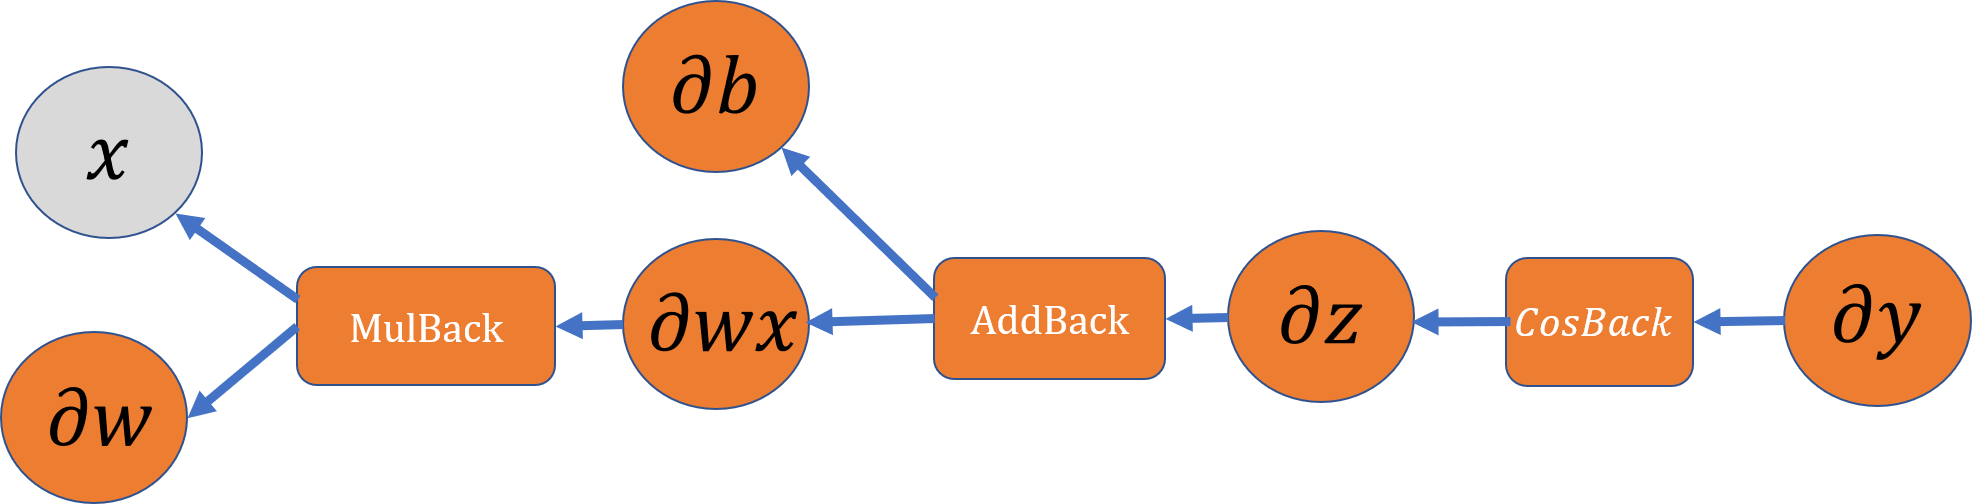

In [29]:
encoded_string = 'iVBORw0KGgoAAAANSUhEUgAAB7QAAAH4CAYAAADKG9ISAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAFxEAABcRAcom8z8AAP+lSURBVHhe7P0LtFxlnef/++9ev/lNz+rVbfdv5mev0f/omt/MslVSdRChVdRAElDuZ9dJIIAQLrlxCck5JOGSIDdbUDh7JyJqUEREBUS5CbQoEuEEEW1ERbz8xpZW++KoPUz/p52ZbiX1fz51nifZ2fnWrl332/u11mcRkrrtZ3+r6qnnW3vXSwAAAIBxsGzZZ353wfHJqycqs0eXonhdqZLEpUp8UzmKP12Okvvd3z3q/v/r7u+fc3/3E/d3/+Dyzz7uz/FP9G+1y7jL6jq6rm6jdlvuNicq247Wfei+/N0CAAAAAAAAAAAAADDvwMp1r5yYjE8oVZKZciW5sRQlD5cr8Y/cn6u9Tfyj+ft2j8E9Fj0mPTb/MAEAAAAAAAAAAAAAo64UbTugHCVrXD5RriS5jeujll9VPfv0TdXLVq6tfvjcU6ufOP/E6l0XVKoPbDiu+sjMUdUnNh5R/ebmw6rfv/gt1ecvfWP151sPqkV/1t/p33QZXVbX0XV1G7ot3aZuW/dh3XcqP6o9VveY9dj9ZgAAAAAAAAAAAAAAht3E1PVvXjA5u6kUxfe4/CLbMH7Lsmt3rz59Y/XKlWuqHzn3lOqDG46rfmvzwuovtr6++g+XHdiT6L50n7pvPQY9Fj0mPbbs49U2aFu0Tdo2v5kAAAAAAAAAAAAAgGEwUYmXlOdP3f132YbwkSddXZ0584Lqx85bXn1q02KzwTxI0WPUY9Vj1mPPbo/fxhu1zX7zAQAAAAAAAAAAAACDpBTFi1xuKEXJ36QbvpMnX17devY51TvWTVWfvehtZtN4mPJdtw3alq0rz6ltW3pbte3zYxAv8sMCAAAAAAAAAAAAAOiHicntC8uVeHu5kvw03dg9/uQrqtetOav65MYlZlN4lKJt1LZqm9Nj4OLGJN6uMfLDBQAAAAAAAAAAAADotlKUnF6K4ifSDdxjT76i+t7VZ1Wf2HiE2fgdh2jbNQYai/TYaKxK0ezpfvgAAAAAAAAAAAAAAJ204JgP/lGpEl9cjpK/Do3ahcuuefGa1WdXd41xE7teNCYaG43Rnua2GzuNocbSDysAAAAAAAAAAAAAoFWlaNsBpSi5oVxJfhMas8tO3Vr9xPknmo1csn80VhqzPY3tSvyb+d/a3naAH2YAAAAAAAAAAAAAQFHlydlDSpXk7r1N2KR6zoqZ6kMbjjWbtqRxNHYaw/SYlirx3RprP+wAAAAAAAAAAAAAgHoWRNtfUYqSHemm69aV51Sf2rTYbNKS5qOx1Jimx1hjrrH3uwEAAAAAAAAAAAAAsMfll/9OqRJfXo7i34Ym67tXrar+1SVvMpuypP1obDXGqcb2b7QPtC/8XgEAAAAAAAAAAACA8VaenF01UUl+Ghqr02eurz69+XCzCUs6H4319JkX7GlsT1Tin2qf+N0DAAAAAAAAAAAAAOOnHMXHlCvJk6GReto7L65+cfpos+lKuh+N/WmnXbynsV3bN24f+d0FAAAAAAAAAAAAAOOhHCXbQuP06OVXVW9ft9RsspLeR/tC+2RPY9vtK7/bAAAAAAAAAAAAAGB0lSvbDy9HyXdCs/T9a083m6qk/9G+STW13T7bfrjfjQAAAAAAAAAAAAAwWkpRfHVokJ506pbq3MYjzUYqGZxoHy13+yrsN+1DvzsBAAAAAAAAAAAAYPgdOBW/oRQlu0JT9L2rzzabp2Rwo322t6md7NI+9bsXAAAAAAAAAAAAAIZTuZJsCo3QY5df8eIXp482G6Zk8KN9d+zyy3eH/al963czAAAAAAAAAAAAAAyXUiX5WGh+Xr5ybfUXW19vNkrJ8ET7UPsy7FftY7+7AQAAAAAAAAAAAGDwlZfOvrwUJY+q4fmGqet3371+0myOkuGN9qn2ba2prX3t9rnf/QAAAAAAAAAAAAAwmMqV+NCJSvy8Gp1HL7/yt1/duMRsiJLhj/btMcuvfFH7en6fx4f6MgAAAAAAAAAAAACAwVKO4lPLlbh21O6q0zdWf3zpG81GKBmdaB9rX2uf1/a9qwFfDgAAAAAAAAAAAAAwGMqVZMt8UzOpbl15jtn8JKMb7fOw/1ULviwAAAAAAAAAAAAAoL/KUfzB0Mz8wDmnmQ1PMvrRvt/T1HY14csDAAAAAAAAAAAAAPqjVIlvVANzohJXP3tBZDY6yfhENaBaUE2oNnyZAAAAAAAAAAAAAEBvlaL4hnBE7kPTx5oNTjJ+US2EulCN+HIBAAAAAAAAAAAAgN4oT8bbQ9PygQ3HmY1NMr5RTYT6UK34sgEAAAAAAAAAAACA7ipV4iQ0Kz+/4XizoUmIaiPUiWrGlw8AAAAAAAAAAAAAdEc5imdDk/K+9SeYjUxCQlQjoV5UO76MAAAAAAAAAAAAAKCzSlH8vtCcvJdmNikY1UqoG9WQLycAAAAAAAAAAAAA6IzyZLIqNCXvXj9pNi4JqRfVTKgf1ZIvKwAAAAAAAAAAAABoT3kqOSw0I28+b7nZsCSkUW4+7+S9TW1XU768AAAAAAAAAAAAAKA15aWzL5+ozP5MTcirVq02G5WEFM2VroZUS7WacrXlywwAAAAAAAAAAAAAmleO4kfUgFx9+kazQUlIs1Et1Y7SdrXlywwAAAAAAAAAAAAAmlOuJB9S4/Gok6568ceXvtFsThLSbFRLRy2/6sVaU9vVmC83AAAAAAAAAAAAACimVElmfMOx+viFR5qNSUJajWoq1JdqzZcdAAAAAAAAAAAAAORbMBW/NTQbb1+31GxIEtJuVFuhzlRzvvwAAAAAAAAAAAAAoL5SJXlKTcb3rF5pNiIJ6VRUY6o11ZwvPwAAAAAAAAAAAACwlaP4SjUYJ09+l9mAJKTTUa3VjtSeiq/0ZQgAAAAAAAAAAAAA+zpgMnlTrbHo8vD0MWbzkZBOR7UW6k416MsRAAAAAAAAAAAAAPYqRckTaipevWqV2XgkpFt5t6s51V6pkjzhyxEAAAAAAAAAAAAA5pWi+DI1FI9dfsXuXxkNR0K6GdWcaq/W1Ha16MsSAAAAAAAAAAAAwLibiLYdrEai8tD0sWbDkZBu5y9c7YU6VE368gQAAAAAAAAAAAAwzkpR/KiaiFeuXGM2GgnpVa5ctWb+1OOuJn15AgAAAAAAAAAAABhXpcmkogbiwmXXvPj3Ww42m4yE9CqqQdVirantatOXKQAAAAAAAAAAAIBxVI7ir6l5uOPcU8wGIyG9jmpRNana9GUKAAAAAAAAAAAAYNyUKvFpahy+46SrX7Qai4T0K293NVlrak9te6cvVwAAAAAAAAAAAADjpFyJn1XT8NbzTzSbioT0K7eef9L8UdquRn25AgAAAAAAAAAAABgXpcl4rRqG0Snv2m01FAnpd1SbtaZ2lKzxZQsAAAAAAAAAAABgHExUkh+rWXjnBRWzmUhIv3PnBVPhKO0f+7IFAAAAAAAAAAAAMOpKlWRGjcKT33mp2UgkZFCiGlWtqmZ9+QIAAAAAAAAAAAAYZeVK8kM1Ce/bcILZRCRkUHLf+hP8UdrJD335AgAAAAAAAAAAABhV5Sg+Rg3CY5dfaTYQxyE/3lSqPrb6T6v3n/6fq7ed+B9r0Z+fWfc68/Kkv1Gt1prarnZ9GQMAAAAAAAAAAAAYRaUouVPNwfevPd1sHo5q1Ky+aOGfVA942e9V//Bf/27VDUXdHP3qP6x+4PhXmrfTqaz9s39Xu59DX/n7tehxKf/hpf+q9viyj1GXtW5nHPL+c06fP+24q103FgAAAAAAAAAAAABG0YHLb/j3tSNdXX548aFm83DUoiOv1TBu1MS2ogazrm/dbjvREeLW/eVFzXjrtsYhqtVQt6phNx4AAAAAAAAAAAAARk2pklyipuAFZ2wwG4ejFJ1S/OTyH5vN4Wbz50e+wryPVqOGthrUenxqmlv3mU03GuvDFNWsalc17MYDAAAAAAAAAAAAwKgpR8n31RR8cMNxZtNwFKJmsRrQ9Y7I1t/r9N065beayvqvjuC2LptON09Brma1dZ8heszW9cYpqtnaUdquht2YAAAAAAAAAAAAABglCyaTo9QQPHr5VWbDcBSio7LVrHabu19DWE1r/bt1vRA1t7PXTaebR0nnHU0+zr+fnY5qVzWsWnbjAgAAAAAAAAAAAGBUlCvJ7WoGbl+7wmwWDnvqHZWtU3o3amSnk3e0dDePlNbR4tZ9KuP8+9npqHZrR2m7WnbjAgAAAAAAAAAAAGBUlCvxr9UM3LXxSLNZOOz5Dy/9V/s1gnVks05Bbl0+L3lHanfr1ON5De1x//3skF0bj/AN7fjXblwAAAAAAAAAAAAAjIIFU9sWqxE4dcplZqNwFJJtaKsp3UozO8RqkCvdOkrbOlV6N+9vWKMaVi2rpt34AAAAAAAAAAAAABh2pUp8rZqA16xeaTYJRyHpBnS7zWxFpzAPt5fNM+teZ16nndRroPP72ftGNaxaVk278QEAAAAAAAAAAAAw7MqV5Gk1Ab84fbTZJByFqMms38pW2m1mK7oNN3Rm1Oy2rtNOrN//Vvj97H2jGlYtq6bd+AAAAAAAAAAAAAAYZgui7a9QA/Dgqet3Ww1CUj+9OmpaTXjrfhR+P3v/qJZV06ptN0YAAAAAAAAABsGyZZ/53QXHJ6+eqMweXYridaVKEpcq8U3lKP50OUrud3/3qPv/r7u/f8793U/c3/2Dyz/7uD/HP9G/1S7jLqvr6Lq6jdptuducqGw7Wveh+/J3CwAAhlw5mj1Tzb9zVsyYzUFSPyeX/9hsMnf6d63rnd6c38+2o1r2R2mf4cYJAAAAAAAAQC8dWLnulROT8QmlSjJTriQ3lqLk4XIl/pFftOth4h/N37d7DO6x6DHpsfmHCQAAhoR7P/+U3ts/et7JZnOQ1I9O9+2G0EwnTmseoiO+rfvg97PtqJZV06ptN04AAAAAAAAAuqkUbTugHCVrXD5RriS5jesjV+6onnbRbdVN7/tcdfajX6h+8JOPVD/2mZ3VT987V737oa9WH/zy16tfnnu6+sRT36o+/cx3q8997/u16M/6O/2bLqPL6jq6rm5Dt6Xb1G3rPqz7TuVHtcfqHrMeu98MAAAwoMqV+Jd6D//W5sPM5iCpn9tO/I9mo1np5KnA653anN/PtqNanp+Xxr904wQAAAAAAACgkyamrn/zgsnZTaUovsflF6lGcS1vPvUDu8+45FPVi6+/p7rtloert983V92565vV733/B9Uf/vCHPYnuS/ep+9Zj0GPRY9Jjyz5ebYO2RdukbfObCQAABkB5Kn6d3q+PXn6V2Rgk+clraH/g+Fea12k2z6x7nXn7Cr+fXT+q6dp81NW4GysAAAAAAAAA7ZioxEvK86fu/rvQCA5ZcvaHq+dddWf1/bd+sfrwV75hNpgHKXqMeqx6zHrs2e3x23ijttlvPgAA6JOJKF6q92d+P7u1qKHshtGMfvfauk6zqdc05/ez8xN+R1s17sYLAAAAAAAAQLNKUbzI5YZSlPxNaPYqx57z0erG936u+pE7Hq0+/uQzZtN4mKJt0LZom7Rt6W0tVZK/mR+DeJEfFgAA0EOlyeRdek++dvXZZlOQ5Oex1X9qNpuVTjW06/1ON7+fnR/VdG2+6WrcjRcAAAAAAACAIiYmty8sV+Lt5Ury09DUVY5Z+5HqlTd8vvoXj37dbAqPUrSN2lZtc3oMXNyYxNs1Rn64AABAl5Wj+A69D9++bqnZFCT5yTsdeKd+31qN627e/qhGNV2bY7oad+MFAAAAAAAAIE8pSk4vRfETqeZt9ag1N1WveP/91Ye+PPpN7HrRtmsMNBbpsdFYacz88AEAgC4pR/G39d771Y1LzKYgyU/eEdqdaDj/eFOpdmpx6/Z139Z10tH1dVp0HS2u6He9x+V3t1XTtbmlq3E3XgAAAAAAAACyFhzzwT8qVeKLS1Hy16FR+7bTbnzxXdvvqz7wyFNmg3ecozHR2GiMwnhp7DSGGks/rAAAoINKleQ3es/92y0Hm03BcUho+qoBfegrf796wMt+b090dPTJ5T+u/ZvVCO52Q7ve7Tf6/Ww91rV/9u/qNsMV/bt13VGJaro2n3Q17rYXAAAAAAAAQFCKth1QipIbyn6BWInWfaz6wU8+YjZyyf7RWGnMwvhpLDWmGls/zAAAoE0Tx1/3Wr3PHrX8KrMhOOop0vTN5j+89F/t89vYug3rckonfkNbt2Hddr3fz1ZzXg146zpWtO1FjvQe1qi2VeOqdbe9AAAAAAAAwHgrT84eUqokd6easNWzt3yqevv9c2bTljSOxk5jmB7T2hi7sfbDDgAAWlSqbJvSe+vaFReazcBRjX73upmmrxU1gsPpu61/V/Tv1v03k2Z+P1uPpZnmfIiuozHJ3t4oRLU9P3/cNuW2FQAAAAAAABhPC6LtryhFyY5003Xjez9Xffgr3zCbtKT5aCw1pukx1phr7P1uAAAATSpF8WV6T71m9dlmM3AUoyZzXtNX/6bTjqthHH5zOpyK3Lp8vb9XbjvxP5qPoZnoiHDrtrMNaD3WVprZIdqO9O2NSlTb8/PG+DK3nQAAAAAAAMCYufzy3ylV4svLUfzb0GTdktxb/cY3nzWbsqT9aGw1xmG8NfbaB9oXfq8AAICC3HtoovfTHeeeYjYDRyk6FbdOL+4224yawWoK63LW9RWdmjuvgZ2Njpi2bqdoiv5+dva05Pp3Hdmtv1dTXU35Ikekd6IBP2hRbavGVetuGwEAAAAAAIDxUZ6cXVWuJD8NjdVzr7yz+uXHnzabsKTz+fLc07UxD+Nf2xdun/jdAwAACihH8c16H/3k+cvMZuCoRE3qeqfuVg542e81dcptXd66nWzaPY23GtHW7aZ/PzvbzFbDvd795p0eXRnFo7RV27W5oqt1t40AAAAAAADA6CtH8THlSvKkb6JWl194a/WuB58wm66k+9HYn+z2QdgftX3j9pHfXQAAIId737xL7593r580m4Gjkryjk9XEzTsq24oaxtZtZWNdt5nUe9zh97OzzWzrd7WzaXSkdrtN+EGLatvPEe9y2wcAAAAAAACMtnKUbPMLYtW3r9pRven2R80mK+l9tC/evuqmsGBZ1b7yuw0AANRRipKH9b75heljzGbgKERNXrepZnSkdbPN7JB6v20don+3rtdM8n4/W6cjT/9mtprb1m1ko+1N31Y2Oircut6wRrWtGletu+0DAAAAAAAARlO5sv3wcpR8JzRLr93xkNlUJf2P9k3YT/P7bPvhfjcCAIAM935ZO+vM3IVHms3AYY9+E9ptphk1g1ttZit5v8ettHv67nqN5/C4081uPRbrNuolrxlf5CjvYYpq288Nn3TbBwAAAAAAAIyeUhRf7RfBqlPrb6k+8KWnzEYqGZxoH2lfhf2mfeh3JwAASHHvkc/pvfLpzYebzcBhjpq+6SOYs2n3SOR6v28dolN7W9crmnq/d61tUrM8/H+zzWwlrxmf/n3uUYhq288Hn3PbBwAAAAAAAIyOA6fiN5SiZFdoil7+/vvN5ikZ3Gifhf2nfal96ncvAABwypX4Z3qf/MHFbzGbgcOcbjdt847+Vto90jn7+9hWWj1let5p2Ns9snzQotqenw/GP3PbBwAAAAAAAIyGciXZFBqhR62+6cW7HnjCbJiSwY/23VFrbtod9qf2rd/NAACMvVIU/6PeH3+65RCzGTis0W9M5x2draOfres1k0YNbf27db2iUdPdut0QbZ9+R9u6bqPkHV2uJrl1nWGNals1rlp32wcAAAAAAAAMv1Il+Vhofm6+7u7q97//A7NRSoYn2ofal2G/ah/73Q0AwFgL742/MhqBwxyd7tttnplOnVK70SnH1VS3rlc0eb9zrbRzBPg4NbR/6RLq3G0fAAAAAAAAMLzKS2dfXoqSR7XYddCybbtv/dxjZnOUDG+0T7VvtY9r+9rtc7/7AQAYS+EI7Z+N0BHajY7ObvfI6ZC8U4KrGW1dp2h05LV1uyG6/VZONR7CEdoAAAAAAADAkClX4kMnKvHzWux6++odv33o0a+bDVEy/NG+fcfqm17Uvp6Y2ub2eXyoLwMAAMZO+A3tH158qNkMHMbk/T60Gt3tNILT6eZR4I1+P7vdU6bn3T6/oQ0AAAAAAAAMmHIUn1quJLWjdldc/MnqXz7zrNkIJaMT7WPt6/nFTbfvXQ34cgAAYKyUovg5vR9+c/NhZjNwGJN3qu61f/bvzOu0krzfuG7ndOBKXrO8Ew3nvKa/7tu6zrDm6c2HhyO0n3PbBwAAAAAAAAyXciXZ4pua1Y3v/ZzZ/CSjG+3zsP9VC74sAAAYG+7970m9D85tPNJsBg5bGp2qu1OnG1fyGuftHkGdd9ud2Ia8hnknm/6DkLkLjwxzvSfd9gEAAAAAAADDoxzFH/SLW9X33fSQ2fAkox/t+1AHqglfHgAAjIVSlDys98CHp48xm4HDll6dbjyvca77sa5TNHqM1u0qndqGvKPL9fva1nWGNV9wta0aV6277QMAAAAAAACGQ6kS36iFrYmppHrLXV8xG51kfKIaUC3UFjtdbfgyAQBg5Ln3vrv0/nf3+kmzGThsyWvUtvu71unk/QZ1u/ejI7Ct21U6dfR0t48AH6SotlXjqnW3fQAAAAAAAMDgK0XxDX5Rq3rH/bvMBicZv6gWQl2oRny5AAAw0spRfLPe+z55/jKzGThs0RHMbrPMtPu71ul08wjnvKPMO9Fsfmbd68zbDtG/W9cb1qi2a3M8V+tu+wAAAAAAAIDBVp6Mt4em5afvmzMbm2R8o5oI9aFa8WUDAMDIKlXiRO97O849xWwGDlMG5fez220I12uWd+p043lHgB/wst8zrzPMUW2rxlXrbhsBAAAAAACAwRUWbJVP3fu42dAkRLUR6oSFTwDAqCtF8WV6z7tm9dlmM3CYkteoVTp15PH9p/9n8/aVTpzWvN5R5p06ZXreEeCdOqX5IEW1XZvXuVp32wgAAAAAAAAMpnIUz4Ym5SfvoZlN8qMaCfWi2vFlBADAyClVtk3p/W7tigvNZuAwJe93rXVEtXWdVpLXEG73tOZ5R5l36pTph77y983bV0bt97MV1bZqXLXuthEAAAAAAAAYPKUofl9oTn7ic4+ZDUxCslGthLpRDflyAgBgpEwcf91r9V531PKrzGbgMCWv0dzJU2nXO924jqxu9yjwvKZ8t38/u5NN/0GKals1rlp32wkAAAAAAAAMlvJksio0JW/9LM1s0lxUM6F+VEu+rAAAGCmlSvIbvdf97ZaDzYbgsESny3abY0ZHJVvXaTZ5R1B34pTg9X4/W+nE72fnNcw7dQT4IEU1rdpWjbttBAAAAAAAAAZLeSo5LDQj3//xL5oNS0IaRbUT6kg15csLAICRUY7ib+t97qsbl5hNwWFJXkP75PIfm9dpNnlHgeu3ta3rNJN6R3936gjzvNONq1lvXWeYo5quzeFcjbttBAAAAAAAAAZHeensyyemkp9pAeuS2XvMRiUhRaMaUi3VasrVli8zAABGQjmK79D73O3rlppNwWFJXrO5Ew1tHSGt04pbt9+JI8Dzjv7uxOPv9tHlgxjVtG9o3+G2EwAAAAAAABgc5Sh+RItXZ1zyKbNBSUizOeOST4YF0Ud8mQEAMBJKk8m79B537eqzzabgsKTbDe282+/E71vrNqzbVnT0uXWdZqIxsG5b6cTR5YMY1bRqWzXuthMAAAAAAAAYDOVK8iEtXB25cseLf/nNZ83mJCHNRrWkmqo1tV2N+XIDAGDoTUTxUr2/nbNixmwKDkvyGsLtHoGso7PrnQ68U7/PnXfK9A8c/0rzOkXzzLrX1T26fFSPzlZU06pt1bjbVgAAAAAAAKD/SpVkxjccq5//0tfMxiQhrUY1FepLtebLDgCAoVaeil+n97ajl19lNgWHJWo6u80x027Tttu/na3k/b51uw3tekdnq8k9ir+dHaKars3dXI277QUAAAAAAAD6a8FU/NbQbLzp9kfNhiQh7Ua1FepMNefLDwCAoVauxL/Ue9u3Nh9mNgaHJfWOQtbfW5cvkryjmztxKnAlrxmvtNPQzjtyXY166zqjENXy/Jwt/qXbVgAAAAAAAKD/SpXkKS1aXbbtPrMRSUinohpTranmfPkBADDUSlHyKb23ffS8k83m4LAk73ei1TS2rtMoOrrbuj2dgrzV28xGR3lb9xHy50e+wrxeo+jx1WvG64jwTj3+QYxquTZfc7XtthcAAAAAAADor3IUX6kFq+PO+ajZgCSk01GtqebKU/GVvgwBABha7j3tDL2vDfvvaOc1hls5ylmNZOu21CTu1KnGlXr3E9LKkdRqVuc143XkuXW9UUn4/exyNHum22YAAAAAAACgfw6YTN5UW6xyueuBJ8zmIyGdjmot1J1q0JcjAABDaUG0/RV6Tzt46vrdVnNwmHLAy37PbOLqiGTr8vWS12Ru9zets6nXeA5p9pTpec3sTjfjBzWqZdW0atttNwAAAAAAANA/pSh5QotVl8b3mo1HQrqVLa7mVHulSvKEL0cAAIaWe097Wu9rX5w+2mwQDkt05LHbHDP6PWnrOumoGazfxraur3S6ma3oiGnrvtIp8tgVNavrNfXVzC56O8Mc1bBqWTXtthsAAAAAAADon1IUX6bFqqPW3LT7Bz/Yv+FISDejmlPtqQZVi74sAQAYSqVKfK3e065ZvdJsEg5T1HR2m2SmXkNajWz9W14zuBvN7MdW/6l5f1byfktbt6NGvB6ndV1t16ifZjxENVybn7madtsOAAAAAAAA9MdEtO1gLVQpd9y/y2w4EtLtqPZCHaomfXkCADB0FkxtW6z3s6lTLjObhMOWRr9LrVNyn1z+49p/1eyt1whWdLpyNYyt+2k3ec33egmPXdFjq9eED9Hl1LC37n8UoxpWLaum3fYDAAAAAAAA/VGK4ke1UHXx9feYjUZCehXVoGpRNenLEwCAoeTez/5J72m7Nh5hNgqHLWpCFzmdd72oya3GeDebwWo2Z+9XR1rraGrr35qJmt3jcIrxdHZtPDJ82fCf3BgAAAAAAAAA/VGaTCpaqHrraTe++Oxz3zebjIT0KqpB1aJqUrXpyxQAgKHj3stu1/vZ9rUrzGbhsEZNaTV33SY2jJrYumy3G9kh6Ya77ttqQOuxNDoKO0S3oSO4u3VE+aBHtasaVi278QAAAAAAAAD6oxzFX9NCVXzzF8wGIyG9jmqxtnjqatOXKQAAQ2fBZHKU3s+OXn6V2Swc9qhBrYbxRQv/pBYdCR2iprGawP04NXd4TEXuW5fVacoH6fEPUlS7qmHVsi9rAAAAAAAAoLdKlfg0LVIdcfaOF63GIiH9imqy1tSe2vZOX64AAAydcpR8X+9nD244zmwYEjKoUc3W5mKuhn05AwAAAAAAAL1XrsTPaqHqxtseMZuKhPQrN972JX+Ky/hZX64AAAydUiW5RO9nF5yxwWwaEjKoUc2qdlXDvpwBAAAAAACA3ipNxmu1SHXcuR/dbTUUCel3VJu1pnaUrPFlCwDAUDlw+Q3/fv4LWkn1hxcfajYOCRm0qFZD3aqGfTkDAAAAAAAAvVWuJD/WItXNd+40m4mE9DsfdbXpF1N/7MsWAIChU4qSO/V+9v5zTjebh4QMWt6/9vTaHEy168sYAAAAAAAA6K1SJZnRItWyDbeYjURCBiWq0dqCqqtZX74AAAyVchQfo/eyY0++0mweEjJoUa2qZlW7vowBAAAAAACA3ipXkh9qkeqT9zxuNhEJGZSoRmsLqq5mffkCADB0wtzrvvUnmA1EQgYl9204gbkXAAAAAAAA+iscJXTU6pvMBiIhgxbVam1hlaOEAABDKpwd5+R3Xmo2EQkZlKhGVaucHQcAAAAAAAB9E37H8dodD5nNQ0IGLarV2sIqv+MIABhiE5X4eb2f3XnBlNlIJKTfufOCSm3OpVr1ZQsAAAAAAAD01oHLb/j3WqRSnvzGt83mISGDFtVqqFvVsC9nAACGSjlK1ui9LDrlXWYzkZB+R7WpGi1Nxmt92QIAAAAAAAC9Vaokl2iRau3ld5iNQ0IGNarZ2gKrq2FfzgAADJ1yJX5W72e3nn+S2VAkpF+59fwT/RcI42d9uQIAAAAAAAC9V46S72uh6vb75symISGDGtVsbZHV1bAvZwAAhk55ats79X72jpOu2m01FQnpV1STqs1SJT7NlysAAAAAAADQWwsmk6O0SPX2VTvMhiEhgx7VrmpYtezLGgCAoVOO4q/p/WzHuaeYjUVCeh3VompStenLFAAAAAAAAOi9ciW5XQtV7/nQg2azkJBBj2q3ttjqatmXNQAAQ6c0mVT0frZw2TUv/v2Wg80GIyG9impQtaiaVG36MgUAAAAAAAB6r1xJfq2FqgcfecpsFhIy6HngS0+FhvavfVkDADCUSlH8qN7Trly1xmwyEtKrXLlyTW1+pZr05QkAAAAAAAD03oKpbYu1UHXC+TebjUJChiWqYdWyatqXNwAAQ2ci2naw3s+Uv5g+1mw0EtLtPORqL9ShatKXJwAAAAAAANB7pUp8rRaqLtt2n9kkJGRYohpWLaumfXkDADCUSlF8md7Tjl1+xe5fGc1GQroZ1ZxqrzavcrXoyxIAAAAAAADoj3IleVqLVXc9+ITZJCRkWKIaVi2rpn15AwAwtEqV5Am9r7171Sqz6UhIt3K1qznVXilKnvDlCAAAAAAAAPTHgmj7K7RYdfCJ23dbDUJChi2qZdW0atuXOQAAQ+mAyeRNek9THp4+xmw8EtLpqNZC3akGfTkCAAAAAAAA/VGOZs/UYtXZWz5tNgcJGbaolv0i7Bm+zAEAGFrlqfhKva9Nnvwus/lISKejWqvNpaL4Sl+GAAAAAAAAQP+UouRTWrDa/vEvms1BQoYtqmXVtGrblzkAAEOtVEme0nvbe1avNBuQhHQqqrHaPMrVnC8/AAAAAAAAoL/KleSXWrTaueubZnOQkGGLalk1rdr2ZQ4AwFBbMBW/1b+3VW9ft9RsRBLSblRboc5Uc778AAAAAAAAgP4pT8Wv04LV21ftMBuDhAxrVNO1BVlX477cAQAYaqVKMhOajY9feKTZkCSk1aimQn2p1nzZAQAAAAAAAP01EcVLtWjF72eTUcvZWz5VW5BVjftyBwBg6Ln3tg/p/e2o5Ve9+ONL32g2JglpNqqlo0666kXVlmrMlxsAAAAAAADQf6XJ5F1auLp8+/1mU5CQYY1qWrWtGvflDgDASChH8SN6j1t9+kazOUlIs1Et1ZrZrrZ8mQEAAAAAAACDoRzFd2jx6iO3P2o2BQkZ1tzkatovzN7hyx0AgJFQXjr78onK7M/0PnflqtVmg5KQornK1ZBqqVZTrrZ8mQEAAAAAAACDoRzF39YC1kNf/rrZFCTF8o1vfKN62223Va+99trqpZdeWvvvo4927ksC4fZvvPHG2m3rz/o767JkPqpp39D+ti93AABGRnkqOaz2Pudy83knm41KQhrl5vOWz8+XFFdTvrwAAAAAAACAwVGqJL/RAtZ3vvs9sylI8qOm8ooVK6p/8Ad/UHXDuV8OOeSQthrb9957b+026t2+/t26HvlhraZV26pxN1YAAIyc8mSyKjQj714/aTYsCakX1UyoH9WSLysAAAAAAABgcEwcf91rtYB15KodZkOQ5EdHSddrNKejy7RyNLWO9M67/VZvd5xy5ModtUVa1bobMwAARk4pit8XmpL3rj/BbFwSko1qJdSNasiXEwAAAAAAADBYSpVtU1rEOmvLp8xmIKmfRs3mbJYsWWLeTr3o9q3bSec1r3mNeV2yN6rt2kKtq3U3ZgAAjKRyFM+G5uR9NLVJg6hGQr2odnwZAQAAAAAAAIOnFMWXaSHrXdvvM5uBxI5+w7qZZnZI0VOPF2lmKzrVuXV9sjeqbdW4at2NGQAAI6tUiZPQpPz8huPNRiYhqo1QJ6oZXz4AAAAAAADAYAoLn/HHvmA2A8n+0W9Wp5vZ+vO6deuqN954Y8OjtnU56zbTaaZZrvu0boPsjWqbBVsAwLgoT8bbQ7PygQ3HmQ1NMr5RTYT6UK34sgEAAAAAAAAGVzmKb9aC1oc+9YjZDCT7Rr9XrdN8u6GrRY3nbFNZR2GHf89Gl09fNptsszx9vfT9hhQ94nuco9quLdq6WndjBgDAyCtF8Q2hafnQ9LFmY5OMX1QLoS5UI75cAAAAAAAAgMFWriR3aVHr1s8+ZjYDyb7RKb7dsO1JvSOkoyja53Lp1GtCZ5vlIbpP/ZsuoyO8w9/z+9nFotr2i7d3uXEDAGAslCrxjXr/m6jE1c9eEJkNTjI+UQ2oFlQTqg1fJgAAAAAAAMDgK0XJw1rY+swDT5jNQLI3aiqnG9V5v1+t04aHy2Wjf7Ous2TJkv0uq1OYpy+jx6CmtlLvdsi+UW3XFm9drbsxBQBgbJSj+IN6D1Q+cM5pZqOTjH6071UDbzjlo9WDTtpxmy8PAAAAAAAAYDiUK8mTWuD6/JeeMpuBZP/cdtttteZzOGraiv7NDa8Z63e01bgucjnSfFTbfjH/STeuAACMFff+t8W/D1a3rjzHbHiS0Y32edj/rz/pxquXzOyqLpnetXPxzK7kiPW7JnyZAAAAAAAAAIOrFMXPaYHry48/bTYDSet5+ctfvl+TWlEzPH0563ez847+Js1Fta0aV627sQUAYOyUo/jUciXerffDVadvrP740jeazU8yOtE+1r6eb2a7fe9qQLWweGbu+VpTe29eUHN78fq5w2rFAgAAAAAAAAyaciX+mRa6vvr1b5vNQNJ6sr+3HaLmdbiMjuTO/m62Tmued/Q3aS6qbb+Y+zM3vgAAjCX3PnjoRBT/td4Tj11+xe6vblxiNkLJ8Ef79tiTr6jNfyYqsz/Rvvdl8JIl03MbMg3tfUJzGwAAAAAAAAOnFMX/qMWuZ779nNkMJK3nxhtv3KdRnc6jjz5au0y26a3mNs3szka1rRpXrbsxBgBgbJWXzr68FCWP6n3xDVPX7757/aTZECXDG+1T7dv5uY/b126f+91fs3D9zpdajWwri6fnblk08/ikvyoAAAAAAADQH1rsUqxGIGkveb+jrd/hvvbaa/f5Ox25HRrdpLMJde7GGQCAsVeqJB8L742Xr1xb/cXW15vNUTI80T7Uvgz7VfvY7+79LJ6Ze8ZqYOdmetc9i2YeO8PfBAAAAAAAANA74Qjtb32HI7S7kXq/o63Tiqd/N1t/1hHd1m2Q9sIR2gAA7M+9N24Kzc/jTr5i9xenjzYbpWTwo313vD/FuM8mv5tNakybTeuimd51j05drqO9/U0CAAAAAAAA3RN+Q/tJfkO7K6n3O9rZXHrppeb1SfvhN7QBALAdOBW/oRQlu0Ij9L2rzzYbpmRwo30W9p/2pfap3711NXPa8YaZ3nXP4um5K9xtvsrfPAAAAAAAANBZpSh+TgtgX5572mwGkvaS9zvaIWp6W9clncmXH3/aL/LGz7nxBgAAGe498urQFF1+6pbq3MYjzeYpGZxoH2lfhf2mfeh3ZyH6fWyzQd1OpnftpLkNAAAAAACAjitXkie1CPbAI0+ZzUDSXvJ+R1t5zWteU7uMdV3SmXz+S0+Fxd4n3ZgDAABDubL98HKUfMe/Z1bfv/Z0s5FK+h/tm7CfXNw+2364342FtX3a8UZRc3tmV8JpyQEAAAAAANC2UpQ8rMWwzzzwhNkMJO0n/VvZ6ejvH330UfM6pHNRbavGVetu3AEAQI5ylGwLzdKjl19VvX3dUrOpSnof7Qvtk7B/tK/8bmtaR087XidqaPu7AwAAAAAAAFpXriR3aUHs1s89ZjYDSfs55JBD6ja0rcuTzubWzz4WFn7vcuMOAAAaKEfxMe59s3YWH+W00y6ufnH6aLPJSrofjf1p77x4byNb+8btI7+7WtaV04770MwGAAAAAABAx5Sj+GYtjH34U182m4Gk/eg3st1Qm7EuTzqbD33qkfnFX1frbswBAEBB5cnZVROV+KehkTp95gXVpzcfbjZdSeejsZ4+c/2eRnZtX7h94ndP2xbNPD5pNaPbDc1sAAAAAAAAdFSpEidaIIs/9gWzGUjaz7XXXms2s5V7773XvA7pXFTbqnHVuhtzAADQjMsv/x33Hnp5OYp/Gxqr7161qvpXl7zJbMKS9qOx1RiH8Xb5jfaB9oXfKx3hTzv+QrYh3U5oZgMAAAAAAKDjSlF8mRbK3rX9PrMZSNrLN77xjerLX/5ys5mtXHrppeb1SOei2laNq9bdmAMAgBYsiLa/ohQlO1JN1urWledUn9q02GzKkuajsdSYpsdYY66x97uh4zp52nGa2QAAAAAAAOiKUmXblBbLztryKbMZSFqPmtlLliwxG9kh+nfruqRzUW3XFoRdrbsxBwAAbShPzh5SqiR3p5uu56yYqT604VizSUsaR2OnMUyPaakS362x9sPeNZ067bia2Tri298sAAAAAAAA0DkTx1/3Wi2aHblyh9kMJK0n77ezQ/7gD/7AvC7pXI5ctaO2MKxad2MOAAA6oBRtO6AUJTe499jfhCbsslO3Vj9x/olm05bsH42VxiyMX7kS/6YUxTdobP0w98TimbnnrSZ1U5me2+BvDgAAAAAAAOi8kl+I/M53v2c2BEnz0anE3dDuSd5px3Ukt3UbpP2oplXbqnE31gAAoMMWHPPBPypV4ovLlfgnoTF72Inv2X3N6rOruzYeYTZyxzkaE42NxiiMl8ZOY6ix9MPaUzq62mxSN5lFM4+d4W8SAAAAAAAA6KxyFH9bi2kPffnrZlOQNJd77723duS1G9pa9Gc1rcP/Z3PbbbeZt0Paj2q6tlDsatyNNQAA6KJSlJxeiuIn9jZqk+qxJ19Rfe/qs6pPjHFzW9uuMdBYpMdGY6Ux88PXN4vXzx1mNahbCU1tAAAAAAAAdEU5iu/QotpNtz9qNgVJ8Tz66KP7NLOVG2+8sfZv9Y7SXrdu3X63QzqTj7iari0auxp3Yw0AAHpgYnL7wnIl3j5RiX+WbuAef/IV1evWnFV9cuMSs/E7StE2alu1zekxmB8TNzZujPxwDYSOnHbch6Y2AAAAAAAAOq40mbxLC2yXb7/fbAqSYtFR2Icccsg+zWr9jnb49yiK9vm3kCVLluxzO6RzUU2rtlXjbqwBAECPlaJ4kX4XulyJ/zbd2J08+fLq1pXnVO9YN1X97kVvM5vCw5Rn3TZoW7aefU5t29LbWq7M/t38b2PHi/ywDJxOnXZ8T/hNbQAAAAAAAHTSRBQv1WLb2Vs+ZTYFSbFkG9avec1r9vl9bB2Jnf73EB3Rnb4d0rmcveXTtYVk1bgbawAA0EcTlXiJe1++sVRJ/m5vs3c+R550dXXmzAuqHztvefWpTYvNpvEgRY9Rj1WPWY89uz1+G2/UNvvNH2gL1+98ldmYbic0tQEAAAAAANAp5an4dVp4e/uqHWZTkDTOpZdeul+TWr+lnb6MTj2evkw6/I52d6Kari0suxp34wwAAAbExNT1b14wObupFMX3lKP4F6ERHPKWZdfuXn36xuqVK9dUP3LuKdUHNxxX/dbmhdVfbH292WDuRnRfuk/dtx6DHosekx5b9vGWK/EvtC3aJm2b38yh0ui04y2dlpymNgAAAAAAADqlXEl+qcW4nbu+aTYGSf1km9mK/i57OR2tnb1cSPrU5Fb029zWbZL6US37ReZfujEGAAADrBRtO6AcJWtcPuHeu3/k38PNHLX8qurZp2+qXrZybfXD555a/cT5J1bvuqBSfWDDcdVHZo6qPrHxiOo3Nx9W/f7Fb6k+f+kbqz/felAt+rP+Tv+my+iyuo6uq9vQbek2ddu6D+u+U/lR7bG6x6zH7jdjqOWddnzxzNwzC9fvfKka1Na/52Xx9NwV/i4AAAAAAACA1pWi5FNanNv+8S+azcFxjo60Dsn+m5rMOhrbDWGh5vTLX/7yfS4bknfa8fRvc+s05mpuW5cj+0a1rJpWbbuxAwAAQ+TAynWvnJiMTyhVkhn3fn6jez9/uFyJcxvd3Un8o/n7rp0qfUaPSY/NP8yRUmtYWw1p38z2F3vJ4vVzh1mXywtNbQAAAAAAALStXEnO0KKdfnPYag6Oc9IN63Qz2WpmZ383Oxs1u9OXT6deozr729s6dbl1ObJvwu9nl6PZM924AQCAEbBs2Wd+d8HxyasnKtuOLkXxulIliUuV+KZyFH+6HCX3u7971P3/193fP+f+7ifu7/7B5Z993J/jn+jfapdxl9V1dF3dRu223G1OVGaP1n3ovvzdjo3sacWzzeyApjYAAAAAAAB6bkG0/RVq/h184vbdVnNwXKOjst3w7Ika1mpK67/pv1es383OJu93tJcsWbLf5a+99tp9LtPo1ORkb1TLqmnVths7AAAANJA+pXi9ZnbQUlN7Zlfirw4AAAAAAAA0r1xJnlYD8K4HnzAbhOMY6/exraiZXeTI6bzf0VbUsNaR2rqc/pw+ArzR0d9kb1TDtaOzXU27sQMAAEAB4bTjjZrZAU1tAAAAAAAA9FSpEl+rJuBl2+4zm4TjGB017YamYdT4tq5vJYoi8zbyUuTob7I3qmHVsmrajR8AAAAKWjK9656F63e+yv9vQ600tXUf/uoAAAAAAABAcQumti1WE/CE8282m4TjmJe//OVmgzmdZk8Dnj2NeaOomX3bbbeZt0XsqIZVy6ppN4YAAADoohab2jv91QEAAAAAAIDiypXkn9QIfOBLT5mNwnGKTv3thiQ369atM6/bKEWP0lZDnWZ2c3nwkafC6cb/yY0hAAAAeoCmNgAAAAAAAHqiXEluVzPwPR960GwWjlP0m9huSMyo0VzkN7PzoiO7rdtWdFS2mt78ZnbzUe36hvbtbiwBAADQI0es3zVhNq7zQlMbAAAAAAAAzVgwmRylZuDbV91kNgvHLddee23tKGw1l9WA1p91xHSnGs06/Xi4/XAfuk8a2a3n7at2zJ9u3NWyL2sAAAD0CE1tAAAAAAAAdF05Sr6vhuDt982ZDUNCBjWq2drR2a6GfTkDAACgx2hqAwAAAAAAoKtKleQSNQXXXn6H2TQkZFCjmlXtqoZ9OQMAAKAPfFP7hf0a13mhqQ0AAAAAAIAiDlx+w7+vHeXq8uQ3vm02DgkZtKhWQ92qhn05AwAAoE9oagMAAAAAAKBrSlFypxqD1+54yGweEjJoUa2qZlW7vowBAADQZ600tRfPzD3jrw4AAAAAAADYylF8jJqDR625yWweEjJoUa3WjtB2tevLGAAAAANg4fqdr1pCUxsAAAAAAACdVq4kP1SD8JP3PG42EAkZlKhGa81sV7O+fAEAADBAWm1qu+u91N8EAAAAAAAAsK9SJZlRk3DZhlvMJiIhgxLVqGpVNevLFwAAAANGzWk1qa3mdb3Q1AYAAAAAAECuiUr8vBqFH71zp9lIJKTfudnVpmpUterLFgAAAAOKpjYAAAAAAAA6qhwla9QsPP7cj5rNREL6HdVm7ejsyXitL1sAAAAMsBab2s/T1AYAAAAAAICpXImfVcPwxtu+ZDYUCelXbrztEf/b2fGzvlwBAAAwBGhqAwAAAAAAoGPKU9veqabhEWd/eLfVVCSkX1FN1o7OrsSn+XIFAADAkGi1qX3E+l0T/iYAAAAAAACAeeUo/poah/HNXzAbi4T0OqrF2tHZrjZ9mQIAAGDItNLUdnmBpjYAAAAAAAD2UZpMKmoevvW0G1989rnvmw1GQnoV1aBqsXZ0tqtNX6YAAAAYQjS1AQAAAAAA0BGlKH5UDcSLr7/HbDIS0quoBmvNbFeTvjwBAAAwxNTUXjK9a2emad0oNLUBAAAAAACw10S07eDaKZ5d7rh/l9loJKTbUe2FOlRN+vIEAADACKCpDQAAAAAAgLaUovgyNRKPWnPT7h/8wG44EtKtqOZUe6pB1aIvSwAAAIwQmtoAAAAAAABoS6mSPKGG4pb4XrPpSEi3cqmruflmdvKEL0cAAACMIJraAAAAAAAAaNkBk8mb1FRU7nrgCbPxSEino1oLdaca9OUIAACAEUVTGwAAAAAAAC0rT8VXqrF43DkfNZuPhHQ6qrVaQzuKr/RlCAAAgBG3ZHrXPUbjOjeL188d5q8OAAAAAACAcVaqJE+pwXjZtvvMBiQhnYpqTLWmmvPlBwAAgDGxeHruFqtxnRea2gAAAAAAAHjJgqn4rbUjZl1uuv1RsxFJSLtRbYU6U8358gMAAMAYoakNAAAAAACAlpQqyUxoNn7+S18zG5KEtBrVVKgv1ZovOwAAAIwhmtoAAAAAAABoSbmSfEgNxyNX7njxL7/5rNmYJKTZqJZUU76h/SFfbgAAABhjNLUBAAAAAADQknIUP6LG4xmXfNJsThLSbM645FPzR2e72vJlBgAAALxk8cyuxGpc52XRzGNn+KsDAAAAAABgHJWXzr58Yir5mRqQl8zeYzYoCSka1ZBqqVZTrrZ8mQEAAAA1NLUBAAAAAADQtPJUcljtiFqX93/8i2ajkpBGUe2EOlJN+fICAAAA9kFTGwAAAAAAAE0rTyarQjPy1s8+ZjYsCakX1cyeZrarJV9WAAAAgGnx9NwVVuM6LzS1AQAAAAAAxlwpit8XmpKf+BxNbVIsqpVQN6ohX04AAABALpraAAAAAAAAaFo5imdDc/KT9zxuNjAJCVGNhHpR7fgyAgAAAApppam9ZHpug786AAAAAAAAxlGpEiehSfmpe2lqEzuqjVAnqhlfPgAAAEBT1KA2G9d5oakNAAAAAAAw3sqT8fbQrPz0fXNmQ5OMb1QToT5UK75sAAAAgJbQ1AYAAAAAAEDTSlF8Q2ha3nH/LrOxScYvqoVQF6oRXy4AAABAWxbNPD5pNq5zolOW+6sDAAAAAABgHJUq8Y1qXE5MJdVb7vqK2eAk4xPVgGqh1sx2teHLBAAAAOiIxevnDrMa13mhqQ0AAAAAADDmylH8wXBE7vtueshsdJLRj/Z9qIM3nHLzZ3QEzRHrd034MgEAAAA6gqY2AAAAAAAAmlauJFtCM3Pjez9nNjzJ6Eb7POx/1cLC9Ttfunhm7vk9C4j68/SuexbP7Eq0mKhFSHeZV/nyAQAAAJrSUlPbzUX91QEAAAAAADCOylF8armS7FZTc8XFn6z+5TPPms1PMjrRPta+9o3s3aoBXw4vWTTz2BnWQmI2e5rd03NX6DpanPQ3AQAAANRFUxsAAAAAAABNK1fiQyemkr9Wg/Mdq3fsfujRr5uNUDL80b49as1NtWa22+c/0b73ZbBH+ijtljLf6L4lHNXNKcwBAACQ1kpT280xd/qrAwAAAAAAYByVl86+vBQlj6rRedCybbtv/dxjZkOUDG+0T9+wbHvtaPzavnb73O/+feh3tM1FxDaTPoX5kum5DVrI5BTmAAAA44mmNgAAAAAAAFpSqiQfU8NT2Xzd3dXvf/8HZnOUDE+0D7Uvw37VPva7u67FM3PPmIuInc8L+u1uf7cAAAAYIzS1AQAAAAAA0JJyJdkUmp9Hr7lp910PPGE2SsngR/vu6LUf2dPM1r71uzlXS4uLLURHg/u7BAAAwBjSz9NY88Tc0NQGAAAAAADAgVPxG0pRsis0Qi9///1mw5QMbrTPwv7TvtQ+9bu3EJ0e3FxA7FB06nF/VwAAABhjNLUBAAAAAADQslIUXx2aolPrb6k+8KWnzOYpGZxoH2lf7W1mx1f73dkU/b61uXjYgej3tDnVOAAAAALf1H4hO2/MDU1tAAAAAAAASLmy/fByJflOaJBeu+Mhs5FK+h/tm7Cf5vfZ9sP9bmzJ4um5W8zFw/bygk5p7u8CAAAAqKGpDQAAAAAAgLaUo2RbaJa+fdVN1Ztuf9RsqpLeR/vi7at27G1mu33ld1tbdBS1uXDYRhZPz13hbx4AAADYRytN7cUzc8/4qwMAAAAAAGDclaP4mHIleTI0Tk++8NbqXQ8+YTZZSfejsV/u9sGeRrb2jdtHfnd1RCeP0tZiI6caBwAAQB7/0zc0tQEAAAAAANC68uTsqnIl+WlopJ575Z3VL889bTZdSefz5cefro15GP/avnD7xO+ejurkUdqLZ3Yl/mYBAACAumhqAwAAAAAAoH2XX/47pUp8eTmKfxsaq1uSe6vf+OazZhOWtB+NrcZ4TyPbjb32gfaF3ytdodOEW4uGLWV6106O0gYAAEAjamqrSW3OKeuEMwIBAAAAAABgPwui7a8oRcmOPU1Wl43v/Vz14a98w2zKkuajsdSYpsdYY66x97uhq7QouHhm7nlr0bDFvLBo5vFJf/MAAACAyc9DaWoDAAAAAACgfeXJ2UNKleTudNP17C2fqt5+/5zZpCWNo7HTGKbHtDbGbqz9sPfMopnHzrAWDNsJpyAHAABAIzS1AQAAAAAA0FGlaNsBpSi5oVxJfhOasNG6j1U/+MlHzKYt2T8aK41ZGD+NpcZUY+uHuS86fJR2LVpsPGL9rgl/FwAAAMB+WmxqP09TGwAAAAAAAHUtOOaDf1SqxBeXK8lPQmP2baffuPtd2++rPvDIU2Yjd5yjMdHYaIzCeGnsNIYaSz+sfaXThFuLhZ2Ifqfb3w0AAACwH5raAIBxtGzZZ353wfHJqycqs0eXonhdqZLEpUp8UzmKP12Okvvd3z3q/v/r7u+fc3/3E/d3/+Dyzz7uz/FP9G+1y7jL6jq6rm6jdlvuNicq247Wfei+/N0CAAAA46cUJae7CfITqUZt9ag1N1WveP/91Ye+/HWzwTsO0bZrDDQW6bHRWGnM/PANlGYXEZuJbnvh+p2v8ncFAAAA7KOVprbLC5wRCAAw6A6sXPfKicn4hFIlmSlXkhtLUfJwuRL/KL1e1JvEP5q/b/cY3GPRY9Jj8w8TAAAAGH0Tk9sXuonx9omp5GfpyfIxaz9SvfKGz1f/4tHRb25rG7Wt2ub0GMyPiRsbN0Z+uAbS4vVzhxmLhNm8YPxd4ej3uv3dAQAAAPugqQ0AGAX6WblylKxx+US5kuQ2ro9aflX17NM3VS9bubb64XNPrX7i/BOrd11QqT6w4bjqIzNHVZ/YeET1m5sPq37/4rdUn7/0jdWfbz2oFv1Zf6d/02V0WV1H19Vt6LZ0m7pt3Yd136n8qPZY3WPu90/iAQAAAD1TiuJFLvqt7b9NT5CPPeej1Y3v/Vz1I3c8Wn38yWfMpvAwRdugbdE2advS2+rydxoDjYUflqGwZHrXPcYi4Z7o9OFaMGznaG53G7f4uwMAAAD2QVMbADBsJqauf/OCydlNpSi+x+UXmfWh6luWXbt79ekbq1euXFP9yLmnVB/ccFz1W5sXVn+x9fXVf7jswJ5E96X71H3rMeix6DHpsWUfr7ZB26Jt0rb5zQQAAABG10QlXuImwzqV0d9lJ8hLzv5w9byr7qy+/9YvVh/+yjfMpvEgRY9Rj1WPWY89uz1+G2/UNvvNHzo6LbixQDif6V07tcDoL/oSNbfNyxXLC/rdbn9TAAAAwD409zTmkHmhqQ0A6Jm89a4jT7q6OnPmBdWPnbe8+tSmxWaDeZCix6jHqsesx57dnlFY7wIAAK07YPm2l5Ur8aH6Od1yFF9ZqsQ3uv+/tRwln3X//wX397vc333LRWd9+Xv3d/+jNo/Qf93/6+9r/+4up8vXrueuX7sd3Z673Ymp7W/W/fi7BPor/Y1VV8z7fWP1zad+YPcZl3yqevH191S33fJw9fb75qo7d32z+r3v/8BsMHcjui/dp+5bj0GPRY9Jjy37eF1G8hurOoK66AKhP1r7eePyhbJ4ZlfibwoAAADYB01tAMAgKfkzEpai5G/S60OTJ19e3Xr2OdU71k1Vn73obWbTeJjyXbcN2patK8+pbVt6W7Xt82MwXGckBAAA+f7TO7b/n+XK7OELonhlOUquKVXiz7j3/qfde/9/T88Fuh1/f0/X7t89jtrjcY9Lj88/VKD3mvlNoSNX7qiedtFt1U3v+1x19qNfqH7wk49UP/aZndVP3ztXvfuhr1Yf/PLXq1+ee7r6xFPfqj79zHerz33v+7Xoz/o7/Zsuo8vqOrqubkO3pdvUbes+rPtOZSx+U0hHYe+3ODg9t8H/s0mN6f2uUzA6pSQLjwAAALDQ1AYA9NPE5PaF5Uq8vVxJfppeIzr+5Cuq1605q/rkxiVmU3iUom3Utmqb02Pg4sYk3q4x8sMFAACGRCm67v8uR7ORez+/rlRJnsi8x++Tty67tnrSqVtqZ3O5fs2ZtTO73L5uafXe9SdUvzB9TPWxC99e/fqmRdXvXPS26n+55M3Vv9lySG0Oof/q//X3+nddTpfX9XR93Y5uT7er29f9WPcfUopqj/M6PW49fr8pQO8dWLnulROT8QnuyTPjivJGV5wPu4lxbqO7O4l/NH/ftVNHzegx6bH5hzkW0kdpF/3N68Xr5w7TAmK4XtNp0DQHAADAeKKpDQDotVKUnF6K4n0Wd489+Yrqe1efVX1i4xH7NX3HJdp2jYHGIj02GiuNmR8+AAAwYCYq2/7zxNS2Fe49+yb3nv3d9Pt4yImnbq1uPuv86ra1K6qfuaBSe99//tI3mnOCbkX3p/vV/etx6PHocVmPV9uh7dF2afv8pgL9s2zZZ353wfHJq11BHu2Kc12pksSlSnxTOYo/XY6S+93fPer+/+vu759zf/cT93f/4PLPPu7P8U/0b7XLuMvqOrqubqN2W+42JyqzR+s+dF/+bsdaOEpbpxNP/252I7XrTe+6J7OgWDg6Wtvdxqv8zQEAgD44aPWO/+OAyvV/6uZLx7gPBxe4OVPiPih8xOV293efd3/n517x99zf7T/3cn+nf6tdxl1W16ld192Gbqs0lVyg29Z96L783QK5aGoDALptwTEf/CM3V7nYzWf+2s1bagulC5dd8+I1q8+u7hrjJna9aEw0NhqjMF4aO42hxtIPKwAA6JPXTSavKVWSS7Q+s+e92ueQqeurZ562uTq75szaUdPhqOpBjR6fHqcerx63Hn92m2rrUG57td1+CACMg8XTc1csmnl80v9vU3S0tbGoWDQvLJp57Ax/UwAAoEsWVOL/OH+apnijm/h/qBQlXypH8Y+zHwi6nij5se7bffD4cO2xuMekx+YfJrBH+ixCRaOzCPmrAwBg0s/KubnIDW5e8pswP1l26tbqJ84/0VxQJftHY6Ux2zO/c2OpMR3ln+wDAGAQLViavFpfLitVkqdS78vVNy997+51Z0xXP3zuqdVdG48038+HLXNuO7Q92i5tX3p7tf21L9m58fBDAwA2HRGjI66thcUiKXqqcwAAUEx5WTJRjuLzSlHyqVIU7znyyMpRy6+qnn36puq7Vq6tfTjQIuVdF1SqD2w4rvrIzFG10z99c/Nh1e9f/Jba6aB+vvWgWvRn/Z3+TZfRZXUdXVe3odvSbeq2dR/WfYfoMeqx6jHrsfvNwJijqQ0A6JTy5OwhpUpyd3r+cc6KmepDG441F01J42jsNIbpMa2NsRtrP+wAAKDDDlw6+5/KUXJROYq/ln4PftPS9+7WKbs/v+F483171KLt1PZqu9PjUBsXNz4aJz9kALA/HeltLSwWzAssQAIA0JqJye0LF0TxpaVK8kCpEr+wz2Te5a3Lrn1x7YoLq1etWl29+byTq38xfWz12xctrP7ystebHwy6Ed2X7lP3rcegx6LHpMeWfbzaBm2Ltknb5jcTY4imNgCgHQui7a8oRcmO9Dxj68pzqk9tWmzOV0jz0VhqTNNjrDHX2PvdAAAA2qS1kbJ+mjf1fvumpe+rNXXvH5Mmdr1o++eb2+/bZz5SG68TEtYHANj80drPW4uLRbJ4ZlfibwoAAORwE/NjXD7qJum/2mfC7nL08quqm9xk/uPnn1T9y02HmxP+QYoeox6rHnOdo7l/VdtWt81+8zFGaGoDAJp2+eW/U6rEl7u5w2/DfOLdq1ZV/+qSN5lzEdJ+NLYa4z3zNzf22gfaF36vAACAJrn301PLUfL4nvdXF62d3Lf+BPP9eNyjcdH4pMerNn5uHP2QAsC+Wll4DNHpyxeu3/kqf1MAAMCbqMweXaokH3H5ZXpyvvSUy6pXrFxTveuCqHYacGtSP0zRNujU5dombVt6W7Xtpcq2mzQWflgwBlqZWy6aeXzSXx0AMEbKk7OrJirJT8PcYfrM9dWnNw/+F/xGJRrr6TMv2DN3m6jEP9U+8bsHAAA0UD4heak/rfiPw/upzm533ZozR2LNpxfROGm83rrsmtQpyd14alzd+PqhBoB5i2YeO8NaXCyc6bkN/qYAABhbCyaTo3TaxlIU/2LvJDypTp1yWXXb2hXVvxyDBVpto7ZV25weA41J7ZSWboz8cGGE6Uw+5pwxJ5qP+qsDAEZcWWevqSRPhnnCae+8uPrF6aPNuQXpfjT2p512cXru9qT2kd9dAAAg44Djtr3MvV++371f/kt4/9Q6yMfPO6n6qx7+ZNwoReOm8dtnPWl+fN+v8fZDDwAvecnC9TtfumR6105rgbFQ3HV1G/7mAAAYE9X/T2kyXluOkm/umXD7DzLJ2hXVb2xaZE7UxyHado1BtrmtsdKYaez8IGIE0dQGAFjcPGBbmBPop1duX7fUnEeQ3kf7QvskNWfb5ncbAADwFkTxpaVK/Ovwfrl2xYXVBzYcZ763ktai8dS4hjHWeGvc/S4AgHk62tpaYCyYFzhlJABgHLzuhOv/v6Uofnf6aOwjT7z6xXjtGWPdxK4XjYnG5siTrt7z+5jzR23H79ZY+mHFiKGpDQAIypXth5ej5DthHvD+taebcwbS/2jfhP00v8+2H+53IwAAY6sczZ7p3hf/KrxHrjtjuvrZCyrmeynpTDS+57txDmM+oVO7u/3gdwkAvOQlR6zfNaHfx7YWGYtEi5f+pgAAGCkHTiZvKkXxLWEyreg0mXdeMGVOvsn+0VhpzNJjqDHV2PphxghZPD13hTVfzAtNbQAYLe59/urwnn/SqVuqcxuPNOcIZHCifbTc7avUXO1qvzsBABgrpWj2HaUo2RXeE09556XVh6aPNd8/SXei8da4752XJLu0X/wuAoDWjqoJUUNcjXF/UwAADLWJSrykHCVfCpNnZfrMC6qPzrzDnGyTxtHYaQzTY6ox1lj7YceIaKWprbMG+asDAIbUgVPxG0pR/ER4n3/v6rPNOQEZ3Gifhf2nxWPtU797AQAYaQdObSu597+7wvvgkSdd/eInz19mvl+S3kTj7/bD7rBPtH+0n/wuAzDu/NHaz5sLjQWiBUx/UwAADJ3yVPw6N0G+PUyW37T0fdX3rF5Zffait5mTa9J8NJYaU41tGGeNeSnadoDfDRgBNLUBYLyUK/Hm8L5+7PIrXvzi9NHmPIAMfrTvjl1+eXrxeJPfzQAAjKRyFE+H972Dp66vbuenUgYq2h/aL3vmJm5/+V0HYNwtXL/zpYun524xFxoLREdru9t4lb85AAAG3p9O3vB/lSpJHCbHr6/M7tZvQP/91jeYk2nSfn7uxlZjrLEO416qxIn2hd8tGHJqUFtzxdzQ1AaAoePmUB8L7+WXr1xb/cXW15vv/WR4on2ofbl3jpZ8zO9uAABGxusnt/8/7n3u8+H9bsvZ51T/yyVvNt8bSX+j/aL9k5qbPKD953clgHGn3zM0FxoLht9DBAAMg9oRRVH8P8KkeKubIP/g4kPNCTTpfDTWGvMw/vP7It7sdw+GXCvzSc74AwDDobx09uWlKN6p9+83TF2/++71k+Z7PRneaJ9q32ofl6LkUe1zv/sBABhq5Uq82uV/6T1u4bJrXvzsBZH5XkgGK9pP2l/za0jaf/Fqv0sBjLva0dozc89Yi42FMr3rHt2GvzkAAAZGqRKfVori/3d+EpxUz10xU/3qxiXmhJl0Pxp77YOwP7RvtI/87sIQW7x+7jBznpgTmtoAMNjKlfjQiUr8vN6zj15+5W+ZQ41utG+PWX5lbeF4fp/Hh/oyAABg6Lx22Qf+pBxtuyOsPVx45rrqjy99o/keSAYz2l8XnnlBav0oufNgt1/9LgYw7lo6ZeTevLBo5vFJf1MAAPRV7fTiUXxbmPguP3VL9YENx5mTZNL7aF9on+z9YBLfxmnIhx9NbQAYHeUoPtW9R9eO2l11+kYWgccg2sfa1/Pzs3i3asCXAwAAQ0PvXxNR/A96P3vj1HUvfnLdMvN9jwxHtP/euPS6+S/dab8yPwEQHLF+18TimbnnrQXHIlk8syvxNwUAQF+Up+IT3QT37zXZ1ekTP37eSeakmPQ/Hz//pD2nuNQ+m4i2LfO7EUOqpaY280cAGCjufXlL7b3ZZevKc8z3cDK60T4P+1+14MsCAICBV47iK8N72HkrZqrfu/it5nsdGa5oP2p/7pmfTMVX+l0OAC95iRYWrQXHItHpy9UY9zcFAEBPLFxxy78uVeIPhwnu6hUbq9++aKE5GSaDE+2j1XuOBkqq2ofal363YgjR1AaA4VWOkg+F9+QPnHOa+d5NRj/a96EOylH8QV8eAAAMLDeH+UR479px7qnm+xsZ7nzY7de985PkE37XA8CexcgXsguOhTM9t8HfFAAAXVWO4mPcZPa/hImtJrnW5JcMbvb5YFJx+9LtU797MYRaPP34Lf7qAIA+KFXiG/U+PFGJq5+9IDLfr8n4RDWgWlBNqDZ8mQAAMFDKJySvcu9Vc3q/OmTqfbvvW3+C+b5GRiPav9rP2t+1/e72vy8FAONu4fqdL10yvesea9GxSHS0trsNXlQAAF1TjuJZP5Gtnn7axdWvb1psTnrJ4OfrmxbV9mHYn9q3fjdjCLXS1Hbzzp3+6kNpwdLk1aXK7IXlSnxrKUq+5PJd9+f/tqemCRm7xP+tFMXP6flQrmy7Vc8PPU/8UwYDxO2nG8J+e2j6WPN9moxfVAuhLlQjvlyAlyw4XnOeZMbN1292r/UPuT9/y9XIL0K9ENJG/qvqSXWl+lKdqd586QH7KFdmD5+ozP6daueEk9+1W2sK1vsZGa1oP2t/a79PVBK3/7cf7ksCAF7yEh1tbS46FsyimcfO8DcFAEBHvHbp7B+XovjB8MF329oV5kSXDF+0L8N+1T7Wvva7HUNmHJratSZ2FL+7VImfCXVLCMmPni963tDcHgzlyXh72DcPbDjOfG8m4xvVxJ7nr6sVXzYYQxPRtoPda/fV5Sj55p6aIKRXcXWn+lMd+pLEmCtNJWeF+jhnxUz1Z1sOMd/HyGjmp25/a7+HGlA9+NIAgJe8RL+LrSOuzYXHAuE0kgCATlmwbPtB5Ur8PU1aF5/07t/uvPAd5gSXDG+0T5ec+O4Xax9Oovj72ud+92PIaA5pzQ1zMwRN7YOOvf7flipJHD5AK29Z9t7qxrPWVT+9bmn14eljqn+5+fDq85e+0axxQsYhqn89D/R80PNCz4+3LLt2z3NGKVVmYz2f/FMLPVaqxEnYF5/fcLy5HwlRbex9zsaJLx+MiddNvu//KUfJR0MNKGHOc9v5J9aO5H9q0+Lqjy55k1k/hDQT1ZHqSXWl+pqfO7x3T+3V4upRdelLFGOoFMWXhXq4atVqs5bIeET7P9SC6sKXCADMWzw9d4W58FgsL+hIHX9TAAA0bSKaXVauxP9bk1WdnvoHF7/FnNSS4Y/27YrTLvIfTuL/rX3vywBDZtSa2hPRtktdTf46fHC+9Oxzaw07q44JIftHzxc9b8JzSM8nPa/8Uww9kv7ZFn5vkjSKamTPc5afhRkLBx2749+UouS9e/a7yxUr1zDnIX2J6k71l65H1afq1JcsxkS5Mrs11MBN555i1gsZr6gO9r42zG71pQIA8/zR2s+bi48FsnhmF9/oBQA0rVyJN4dJ6kVnnWdOZMnoRft674eTeLMvBwyZUWhqH7R6x//havD2UI/nnTFd/erGJWbdEkIaR88fPY9Sr/G363nmn3LoolIUvy+M+700s0nBqFZC3aiGfDlhBJWibQe4fbzn51Q2n3V+9dsXLTTrgpBeRnWoeky9Fj2z4ITZBb50MeLKk8mWsO91BL9VI2Q8o3oItcEXZQGYdBpxc/GxQHT68oXrd77K3xQAALncpPRDYXLK72WPX9K/q61a8GWBIeOb2i9k54W5GZCmdu23sivJU6rBNy9974sP8juzhHQsej7peaXnl55n/LZ2d5Unk1XhPfXu9ZPmPiGkXlQzoX5US76sMEIWTMYnTESz/0P7+OR3Xlp9/MIjzVogpJ9RXao+VacTUfw/Jlzd+hLGiFoQxZeG959P0MwmRlQXoUbcZ4pLfOkAwF6LZh6fXNLswmQ603Mb/E0BAGAqV7bdFyald14wZU5cyehH+z7UgWrClweGzDA2tdVcK1fiX6n2lp26tfrNzYeZNUoIaT16Xun5Nf8aH/+KpnZ3lKeSw8J76c3nLTf3BSGNcvN5J/vnqourKV9eGAHlKNkQ9u2FZ66r/srY/4QMSn512etrdbrn9cjVry9ljBg1J8N+vvX8k8x6IES5dZ+mdnyxLyEA2Gvh+p0vXTK96x5zAbJAOFobAFCPm4Teq4noohP//LePXfh2c8JKxieqAdWC/4Byry8TDJlWmtqaL/qr95ROfxyOzF5y0rurP9/6BrM2CSHtR88vPc/0fNPzjtOPd1Z56ezLJyqzP9P4XrVqtbkPCCmaK10NqZZqNeVqy5cZhpiOcNU+VWbXnGnud0IGMarXULs6w4AvaYyIcpRcFPbvx2lmkwLRlx5Czah+fCkBwL50tLW1AFkwLyyaeewMf1MAAOj3He/RBPTwE//8t1/ftMicqJLxi2pBNaHaUI34csGQ0ZcZNf/LzAdz04+mdvjN7KWnbN1NM5uQ7kfPs2Wn7DlS+3b/VEQHlKP4EY3r6tM3mmNPSLNRLdWeq662fJlhSOk3iMNpxmlmk2FMaGqrjvUb8L60MeRKlW0Xzs8Jk+rHz6OZTYpHX34ItaM68iUFAPvSETdabLQWIYtk8cyuxN/UyChFs+8oRfENpUpyt3sRfdL9+Sfuz78JL6qEkO5FzzU959yfn9RzsPZcdM9J//TEAPOvmdXDlr3nxa9vWmxOUMn45ilXE6oN/zy/25cNhoya2m7e+Lw1J6wXf2afl/qb6KqJaFvtd9oOXfZeTjNOSA+j55ued3r+6Xnon5JogxvLD2k8jzrpqhd/fOkbzXEnpNmolo5aflVtPqYa8+WGIXPQsTv+TakSP6P9qNM3W/uakGFIOP246ll17UscQyp91ohb+JkU0kJUN6GG+J19ALnUmLYWIYtEC5VqjPubGkoT0bZlpUryyVIU//fwwkkIGZzouannqJ6r/mmLAVKuxJ/TflLDUo1La2JKSLqprZrx5YMho+Z0s1+G7EVT+6Bjr/+3rq5+rfp6cMNxZg0SQroXPe/86/uv9Xz0T020wM15Z+bHMqk+fuGR5ngT0mpUU6G+VGu+7DBESlHyXu2/k995Kb+ZTYY6ql/Vce31yNW1L3EMofJU/LqJSvz/077krBGknaTP3qC68iUGAPvzR2s3ddRNOoun567wNzU0SlG8KJzKLWTpKZfVXjzvXX9Cdc592PvexW+t/tetB5kvsoSQzkbPte9d/Jbac0/PQT0X9ZxMP0f1nNVz1z+N0WflKPms9svCZe958Ws0s0mDqEYWLrtmvqntaseXEYbMIDa1S5XZWHV13hnTZu0RQrofPf/0PCxVktg/NdGkBVPxW2vvkS63r1tqjjMh7Ua1FepMNefLD0PgdZPv+3/CvuMLL2QUkv6SjerblzqGyH96x/b/0+2/p7UPZ868wNzPhDQT1ZHqaSKKv6n68qUGALbF03O3WAuRReIXK1/lb2pgHXDctpeVo/iOMGk6bNk1L+4499Tqty9aaL6QEkL6Gz039RzVczU8b/Uc1nPZP63RB24/1H6r9rAT31N9cuMSc98Rko1qRTXjn8v83uqQGqSm9oKlyat9PVW/ymsRIX2Lnn/huajnpX+KogmlSvKUxu89q1eaY0xIp6IaU62p5nz5YQiUo+Sj2m+bzzrf3K+EDGNUz7X5g6tvX+oYIqUouVP776RTt+z+xdbXm/uYkGaiOnL1ND9PcfXlSw0A6ls089gZ1kJk4UzPbfA3NXAOnEzeVKrEP9KL4kFTs9V4zRnVn3MENiFDET1X9ZzVc7c2sXHP5Ymp69/sn97ooVIUX6198Kal73uRBhJpNqoZ1c78B5RtV/uywpBpsan9fKeb2u716N2qpUvPPtesN0JI76Ln4fxre/xu/xRFQeUovlJjN3nyu8yxJaTTUa2p5spT8ZW+DDHAJqJtB9f2lwsHY5BRiuo51Lbq3Jc8hkCpMvvn2m+HLn3vi9/afJi5fwlpJaqnQ5deu1v1pTrzJQcA9Wmxccn0rp3WYmShuOt24yicdpQnZ99ZrsS1F8OzT99U/camReaLJiFksPONzYfXnsPzH3rcc3pq9p3+aY4emJiKV8yPfVL9/IbjzX1ESKOodkIdTUxtW+HLC0OmjaZ2x87oU6rEz6iOHp4+xqw1Qkjvouehno+lKH7GP0VRwAGTyZvCeyKvZaRXCc9XRTXoyxEDKnyh+IqVa8z9ScgwR3Wt+lad+5LHgCtHs2eG95AHNxxn7ldC2onqKtSY6s2XHgDk09HW1mJkwbywaObxSX9TfaWGV3gRvGzlWvOFkhAyXLls5Tl7JzeTNLV7oVyJDw1jrtPAW/uFkKJRDe15Drva8mWGIdNKU9vlhSPW75rwN9GycLrxQ5ddu9uqMUJI76Pno56XnHa8uFKUPKExu3rVKnNMCelW3u1qTrVXqiRP+HLEgCpHyTe1r/jSCxnF7PmCjatzX/IYYOWp+HW1/eVy07mnmPuUkE5E9RVqTXXnSxAA8mnBUUfTGIuRhbJ4Zlfib6ovdEricGT2mhUXmi+QhJDhjJ7T85ObeLd+UsA/7dEFByzf9rKJSvxjjfe7+GIQ6VBUS6op1dZrl73vT3y5Ycj0q6ldqsxeqPrZeNY6s74IIb2Pno96XpYqyYx/qiJHKYov03gdu/yK3b8yxpOQbkY1p9qrPWddLfqyxIBZcLz/At9SvsBHRjfh9MKqd1/6GFDlKP6C9tUl/OQT6UFUZ6o31Z0vQQAoRo1pYzGyULTI2YkjcZp1wHHbXjYRzf6VXvh0NKf1wkgIGe7orAt6jh9YiX+s57x/+qPDSlHysMZZp3u39gMhrSb8hIBqzJcbhpCa2i38XE1bTe1yZdutqp1Pr1tq1hYhpPfR81HPy3IlvtU/VVFH+jdxH5o+1hxPQrqdv3C1F+qQ368dTPqCkPYPX+Ajoxy+EDccylGyQftp0Yl//uJPtxxi7ktCOhnV2eIT/7z2hRfVny9FACim7aO1p+eu8DfVE+UovkMveDRgCBnt7PlNbfec909/dJD7UHmjxvftJ1394n+55M3mPiCk1fzI1ZRqSzWmWvNlhyHVy6Z2KUq+pLrh9JuEDE7CaUPd6/kX/VMVdZSi+FGN1ZX8Ji7pc65ctef3ax/15YkB4j7j3qz9c9v5J5r7j5BRiOpbda5696WPAXPgZPKacAbUz10QmfuRkG5E9VZ7fZg/O+drfEkCQDG100pOz92SWYwsHB2t7W7jVf7musZ9GFukF7uDpmZ3f2Pz4eYLIiFkNPKNTYtqz3U95/Xc9y8D6IDy1LZ3zk8ck+pjF77dHH9C2o1qK9SZas6XH4ZUr5ra7vX+OdXMXzLPI2RgouejnpelKPmuf6rCUJpMKhqnhcuuefHvtxxsjiUhvYpqULVYe+662vRligFRrsQPad9wJgcyylF9q85V7770MWDCa9HFZ51n7kNCuhnVHa8RANqyZHpug7EgWTiLZh47w99UV5Sj+BG90MVrzjBfCAkhoxU912uTG/fc9y8DaNPE0u3/zk0Wf6lxvfm85ea4E9KpqMb8B5RfqvZ8GWJI9aKp7Wrlv6lmnr/0jWZNEUJ6Hz0f/Xzsv/mnKgxufL6mcdpx7inmOBLS66gW/XP3a75MMSBKleRb2jdPbVps7jtCRiGqb9W56t2XPgbIgkq8Xvvn8GXvefEnl/6ZuQ8J6WZUd4v8qcdVj740AaA5/hTkzxiLkoWiI739TXXURLRtmV7gDlt2zYs/33qQ+UJICBmt6Ll+2LL31CY3eg3wLwdoQzlKPqHxXLviQnPMCel0VGuqOdWeL0MMsW43tWu14mLVEiGkfwnPTf9URUapEp+m8XnHSVe/aI0fIf1K+AkYzpYzWEpR/Avtlx9d8iZzvxEyClF9q85V7770MSAOqFz/p+Uo/q32z2c51TjpY1R/tXmKq0fVpS9RAGiefhvbWJQsmhcWr587zN9UR5QqySf1Arfj3FPNF0BCyGhGz/nahyD3GuBfDtAiN0E8VWOpU7l/56KF5ngT0umo1sLPB6gGfTliiC2Z3nWPMffLTdF5Ya1OXKxaIoT0L+G56Z+qyChX4mc1Prfye7hkwHLr+Sf552/8rC9XDIDwmmrtM0JGKaHWfeljQJQqyb3aLxeddb653wjpZVSHqkfVpS9RAGiNP1r7eWthskgWz+xK/E21rRwl/10vbt+mCUPIWEXP+dqHoCj+R/9ygBYcdOz1/9aNYe1IgI+ed7I51oR0K6o5/zz+hWrRlyWGmM7IY8398lKkqV2rExerjggh/Ut4bvqnKlJKk/FajU10yrt2W2NHSL+j2qw9h6NkjS9b9Fl4TbX2FyGjlFDrvvQxACaibUdonxwydd3uZy96m7nfCOllnr1oYa0ea68Xk/GRvlQBoHVqTFsLk0Wi05c3+/uJWaVo9h16UVt6ymXmCx8hZLSj575eA/Ra4F8W0KRyJb5VY7iGU42TPkW1V/uA4mrRlyWGXDea2vM1wgIvIYOW8Nz0T1WkTFSSH2ts7rygYo4dIf3OnRdMhTnYj33Zos/Ca6q1vwgZpYRa96WPAVCO4ke0T7atXWHuM0L6EdVj7fXC1acvVQBojxYgl8zseiG7MFk403Mb/E01rRTFN+hFbXbNmeaLHiFktKPnvl4D9FrgXxbQhInK7Ckav9dXZndzlgvSr6j2VIOqRdWkL08MuU43tWsfYl2sGiKE9C/huemfqvBKlWRG43LyOy81x42QQYlqVLWqmvXliz4Kr6nWviJklBJq3Zc++qwcbYu0P9627JoXf771IHOfEdKP/HzrG6oLl72ntl5UmkwqvmQBoD0L1+98aSu/mxiio7XdbbzK31xh7kPX3XpBu3f9CeaLHiFktKPnfm1S414L/MsCmlCOkr/S+HGqcdLv7D31ePJXvjwxAjrZ1K7Vh4tVP4SQ/iU8N/1TFZ4bkx9qXO7bwOdUMti5z3+eUs368kUf+X1h7itCRimh1n3po8/KUfw17Y8d555q7q9xyI83lcy/J/2P6rL2muHq1JcsAHSGjra2FicL5oVFM4+d4W+qEPdi9qRe0OYuPNJ8wSOEjHb03K9NatxrgX9ZQEHhyKHlp24xx5aQXke1qJrkCKHR0srP01jzQf9ab9YOIaR/Cc9N/1SFU47iYzQmxy6/0hwzQgYtqtXac9nVri9j9El4TbX2EyGjlFDrvvTRR6Vo9nTti7efdPWL1r4atahxff/p/7m69s/+XfWAl/1e9Q//9e+qDvfJf3jpv6qeXP7j6geOf6V5G6T3OWr5VbXXjFKUnO72EQB0jn4XW0dcWwuURaKFT39TDZWi+Cd6MfvexW8xX+wIIaOd7138Vj+hiX/iXxZQwCsXXv6vy5X4Fxo7HZVhjS0hvc7eI4TiX6hGfbliBHSiqT1fGyzwEjJoCc9N/1SFU4qSOzUm7197ujlm4xItFl+08E+qh77y9/csGIdFY/336Ff/IYvFA5L3n3N67Xms2p2vYvRLeE219hMho5RQ67700Ufutf+72hefOP9Ec1+NSh5b/ae1JrbVwG6UPz/yFeZtkt5F9Tn/uhE/5/YJAHTe4um5K6wFyiJZPDP3vBrj/qbqKlWS3+jF7L/y+x6EjGX03NdrgF4L/MsCCihV4ss1bmeettkcV0L6FdWkf06/y5crRkS7Te35D68s8BIyaAnPTf9UHXsHLr/h34cx+eHFh5pjNsrRUU9a9FUD2w1HU9Eis3WbpPtRrYa6VQ27/YE+CfvB2k+EjFJCrfvSR58siGbP1X6ITrlst7WfRiGam7TayE5HcxtOS97fVE55V+11Y8LVrdsnANB5/mjt561FyiJpdLR2mABZL3KEkPFIeB3wLwto4KBjr/+35Sj5nxqzL04fbY4pIf2KarL2nHY1qlr1ZYsR0cqXHUNTO7zWW3VDCOlfwnOz9iSHvnB9icbjgjM2mOM1qtECr4601ik63TC0HC0W6wgq6z5Id6OaVe2qht2+QJ+E11RrHxEySgm17ksffeJe87+l/XDXBRVzPw17NDfJa2Rr3qK5h84mU2QOo8vQ1O5fVKeqV9Wt2x8A0D2Lp+dusRYpi0SnL1+4fuer/E3tI0yArBc5Qsh4JLwO+JcFNODG6jqN13lnTJvjSUi/c96KmdpzemJq2/t82WKEtNrUDq/1Vs0QQvqX8Nz0T/GxV46S72s8HtxwnDleoxidWjzviGwtJGsBOMS6TDq6PE3t3kc1W3s+uxp2+wF9El5TrX1EyCgl1LovffRBKYoXaR8sOfHdI3d0tprO+mkTt5n7Rc1rnU2mXmNa/5bXBNf1reuR3uSIk95de+1Q/br9AQDdo8VIa5GycKbnNvib2iNMgKwXOELIeCS8DviXBeQon5C8KozX3MYjzfEkpN9RbYY6Vc368sUIaaWp/cYzPl2rCatmCCH9S3i99k/vsbZgMjlKY3H08qvMsRq1aCG43ik89Xf6/Ww1pq0FYy0W5zW3dX2OgOp9VLuqYdWy2w/og/Caau0fQkYpodZ96aMPypX4Vu2D69ecae6jYU29o7L15bvbTvyP5nWy0Rwk78t6/KZ2/6J6nX/9iG91+wIAumvh+p0vXTK9a6e1UFko7rq6DX9zTPYJIXwQakI5Sj6ksdp41jpzLAkZlKhGa89tV7O+fDFi9EVFc66XEzW1rXohhPQvzMP2cuNwu8Zi+9oV5liNUtSothZ6tYCcd9RTNjrKKXsbITqyyroO6V5Uu/45fbvbB+gDP/7m/iFklBJq3Zc+euzgyRv+r7APnr3obeY+GsZofuI2b79oTtHsF+V0+XpfvtN8x7oO6X5Ur6F2VcdufwBA97WyiJnKC4tmHp/U7YQXMOsFjhAyHgmvA7UXF9R10LE7/k25Ev8vjdV9608wx5KQQcm9G07wz+34f6l2fRljxLQyH7ztYn4ugZBBCvOwvdx71q81FrvG4Cw41gKvGtytnCo87wioZ9a9zrwO6U52bTwizL9+7cYffRBeU639Q8goJdS6L330WKmSzGj8z1kxY+6fYY3V0NbZZFo964uO9s7eXghHafcvqlvVr+rY7QsA6I0j1u+a0O9jW4uVRbJ4ZlcSJkDWixshZDwSXgf8SwvqKE1tW6txOuv0zeY4Dkr0AUSngdJpKvXB4+TyH9ei/9cHBv1Oo3U9MnpRrapm3YeUc3wZYwQtXj93mDXPy8uHL77UrBlCSO/DPGzegqltizUOU6dcZo7TqCV7Kk81pVtdLFbTOn1b6WgOaF2HdC+qYdWyatrtA/RYeE219g0ho5RQ67700WPuM/a3NP73jNjBDtmGttaUrMs1E47SHryoblW/qmO3LwCgt9SYthYri+Sw879YPWj5DvPFjRAyHuGDUDFujJ7UON2xbsocx35GTWp90Mg7QicbXZ6jdkY7d14wFZ7fT7p9jhFGU5uQ4Y1/ndZ781grVeJrNQ7XrF5pjtOoJd3QbqeZHaLGdbi9dHQ/7d42aS6qYdWyatrtA/RYeE219g0ho5RQ67700UMLTri+9iW8I056925r3wxzNGfQwRCKjq7uxBxCa09u2MywJtW/HHnSu2uvIapnty8AoLf80drPWwuWRcKiJiHjGz4INXbgZPImjdHbll0zUB9Y1MjWbxllj/JpJpzmabSjmlXtqobd/sYIa6WpPXfpiWbdEEJ6F+Zh89wYPK1x+OL00eY4jVrCmXQ69QVDnZ3HDaMZLUhb1yHdiWrYP6+fduOPHvNjb+4bQkYpodZ96aOHypX4Vo399WvONPcN2Td5cxTWo/oX1e/860h8q9sXANB7C9fvfOni6blbrAXLIlm58Y7qT7e+2XyRI4SMbvgg1FipEn9YY/TnA3LUkL4lqwXQdhrZ6WhR1bofMvxRzap2VcNuX2PENdPUji96t1kzhJDehnnYS16yINr+Co3BwVPXj9yRTr2K5oZuKM1w2vHeR7WsmlZtu32AHgqvqdZ+IWSUEmrdlz56qBzF/11j/8jMUea+IfuGOcpg5suufmuvI66e3b4AgP5ZNPPYGdbCZaOcfOH9NLQJGcPwQSjfQcfu+DflSvy/NUZ/uflwcwx7GR2VXe83iA595e/XmtO6jH77KPyetr71Wu86IXwzdjSjmp1/jsf/W7Xs9jVGXJGmNs1sQgYnzMO0MDx7psbgnBUz5hiRYqn30zP8RmXvo1r2z+0z3D5AD4XXVGu/EDJKCbXuSx89MjE5u1DjPnny5eZ+IXbqzVG0hmVdnvQmqmPV84JK8ja3PwCgfxau3/mqxTNzz1iLmPXyhUtXmC9uhJDRDh+E8pUqyTkan7NO32yOX68Sjsp2D2m/6EOAmtfW9dJR09q6fkiR2yDDF9Wuali17PYzxkBeU5tmNiGDFeZhbq4VJZ/SGHz0vJPNMSLFUm+eSEO791Et1+ZerrbdPkAPhddUa78QMkoJte5LHz1SirZdrXG/etUqc78QO1qzcsO3X5ij9DeqY9Wz6trtDwDovyXTcxusxcxsWNwkZHzDB6F85Sj+msbnzgumzPHrRdTMto6w1uS/2d9F1NHb2dsJ0X1Y1yHDHdVu7XnuatntZ4wJq6l96MrPmTVCCOlfmIepARX/UmPwrc2HmWNEikVn6XHDaaYTv9NNike1PP/cjn/pxh89FF5Trf1CyCgl1LovffRIWB96aPpYc78QO/W+dKdYlye9ieq49lrCWhGAQXLE+l0Ti2fmns8uaoYcdv4XOdU4IWMcPgjVd8Bx216msXn91Gz1v249yBy/XkSLkO7h7BM1n9Wcti7fKHkfJnSKcus6ZHij2lUNq5ZV024/Y0ykm9pqZk8sfb9ZI4SQ/mXc52Hlqfh12v6jl19ljg8pHn3J0Q2pmVbnjKT1qKZrz29X424foEfCa6q1TwgZpYRa96WPHnjtsg/8icb8IPfZ+hd9XB8axuStQekADus6pPtRHaueVdevXfa+P3H7AwAGx+KZXUm6ka0s3vBY9Q2nfNR8USOEjEf4IFRfeWrbOzU2q0/faI5dr5JtaKuZ3c6RNvrAkL69dI5+9R+a1yHDHdVw7bnuatrtZ4yR+S827krUzFYNWPVBCOlfxn0eNhHFS7X9/H52+9GXEt2QmuELi71P+B1t1bjbB+iR8Jpq7RNCRimh1n3powdKlfg0jfnqFf1dHxrG5J1Fhp++62/WrLiw9lqi+nb7AwAGiz9S54XQ0H7TWXcy2SdkzMMHofrKUfIJjc2Oc08xx65XCaccD+nEhP/k8h/v90EihG/Ijl5Uw/PP9fhWt48xhsJrvVUfhJD+JTw3/VN17JQmk3dp+69dfbY5PqR48n5WptmfqCHtRzWt2laNu32AHgmvqdY+IWSUEmrdlz56IKwP3dTn9aFhzJ8f+Yr95iYhNLT7G9Vz7fXE1bfbHwAweBau3/nSJdO77lHCBMh6QSOEjEfC64B/iUBKOYr/XmPz9ObDzbEb5uQdxcOi5+hFNVx7rruadvsYYyi81lv1QQjpX8Jz0z9Vx457X7pD23/7uqXm+JDiyWtoayHZug7pXlTTtee3q3G3D9Aj4TXV2ieEjFJCrfvSRw9MVOKfa8xHcX2o2+lmQ1sHZOg2lHbOZDiuCWtFqm+3PwBgcC1cv/NVYQJkvaARQsYj4XXAvzTAK0/OHqJxOWpEf9Mx77TjOh2UdR0y3FEt157vrrbdfsaYCa/1Vm0QQvqX8Nz0T9WxU47ib2v7v7pxiTk+pHhoaA9WVNO157ercbcP0CPhNdXaJ4SMUkKt+9JHlx1Quf5PNd7vWH61uT/GJVpH0sERmlfod7EVrR8p+vt6DeVON7T1ODTvOeBlv1f9w3/9u/vdps5I2G5zW9sTtrFRhv0oc9W16lt17sYPAAZXmABZL2aEkPFIeB3wLwvw3Jhs0bhctvIcc9xGITp9udvU/cLvaI9mVMv++b7F7WeMGb/vzdoghPQv4bnpn6pjp1RJfqPt/9stB5vjM44JRxqFBeOwUKwz6Gjxtt4CbTca2rqvcP+9yqicKUg1rdpWjbt9gB4Jr6nWPiFklBJq3Zc+uqw0mVQ03vq9YWt/jHI0L9H7s5rHbigaRg1mNXnT8xVd37qs0mzjWXOkIo9Fj6OdRrPWxazbtaLHY93GsGTP72i7OnfbAwCDK0yArBczQsh4JLwO+JcFeKVK8hWNy73rTzDHbRRy6Ct/f7+JuKKJv3V5MtxRLaumVdtuP2PMhNd6qzbI/vnn73+latHfW5dvJr9+8H3+1vb121/9xLz8uEfjYunEvhiEhOemf6p2zeL1c4ctnpl7Rv/1f9V3E8df91pt+6ieDaeZhCONNDezjjTKxloszmtot9okzjuiqlsZpXloODuOat1tG3ogvKZa+4OQUUqodV/66DI31ls13u9ZvdLcH6MYzU001ygyL6kXXV+3pf9a/64009DWXKeZx6ODOKzbKZJwFLp1u1aG+Sjta1xd+9eUrW5bAGBw+Rcr88WMEDIeCa8D/mUBTvmE5KVhXP5myyHmuI1C8ibn1uXJcEe1HOpaNe72M8ZI2PdWbQxL/tfX7vCtzHn/486LzMt1Ii/MHl39nztvqr74jz/39zavU01UNbV/+/P/19/qvLyGdr2mbiO63m9++p3a2Fm3OwzRvtDj3/0v/8tv1Twa2sWogb1ketfOJTO7qsogNbRLlW1T2va1Y3i0U4gWi9VsrnfWnCIJi8W6HevfFR3tnb3vImnm6KRORgvW1uMZtqi2VeOqdbdd6IHwmmrtD0JGKaHWfemjy8pR/GmN96fXLTX3x6hFc4pGjWP9u+YJir6QV++oaf19vYMpFM2FrMeQjRrGrTTX2z3zix5fo3laO43zQYjquvaa4urcbQ8ADK4wAbJezAgh45HwOuBfFuCUK/GhGpMTT91qjtmoJO+0T0U/VJDhimpatV2avP4tbj9jjITXeqsuhiXZpu6//NVT5uU6GTXN0zrdRE03afMa2mrq6r6zdv/6v9eul022+Su6rJr01u0PQ7JfaKChnc83su8JjeyBbGhH8WXa9mtWn22OzainyCkztXAbFoKVeguqupx+L9L6N6XVhnaRRnt4jEVj3UY6oUE/ClFtq8ZV627b0APhNdXaH4S0Gs2hLP2ci4Ra96WPLitVkm9pvJ/YeIS5P0Yl4ahst8lmwnwj72jkvHUmK9ZtZKOjuLPNbM2LdBR13vxH6USzudE26d+t6w1LVNeqb9W52x4AGFxhAmS9mBFCxiPhdcC/LMApTyWrNCabzzrfHLNRSd6kfJhPl0TqZ5Or6dpz3tW4288dt3D9zpcuntmV6L/+rzAgwmu9VRfDkH/86Fl+6XAvHT1tXbbTSev0wqWaz4H+bF0mHR1tnZb3eNSMzx4FLsN6tHa2Bmho29zr76v0OrxkZtcL2Wa2smjm8Ul/0b4rVeJE277j3FPMsRnlqMGcXZhNJyzS1vuCYbOnAm9lXqfFY+u2FD12zSNb+d3LvO3WovQofalSta0aV6277euKI9bvmlD8/4698Jpq7Y9WU/tS2bcerL2nZhub+gKZ3r/1/qzL6L3Kuo1hir4w2CzNyTQ+GgONl3W7wx6dXSe7//V31mV7kVDrvvS7Jny+G6QvxPWDex3/F43332w52NwfoxC9/+admUVfSis6n8j7GZR0dJvW9dPR40p/IU7ziOwX9RqdGrzZ+Uo2uj/rdkPavf1+R3Wt+ladu+0BgMEVJkDWixkhZDwSXgf8ywKcsMB64zmnmWM2KslbDKWhPZpRTau2O72wqoWOJdNzGxbPzD2vhgkLq4MnvNZbdTEMUfPS0ouF47R+N7Sz41Dk8WSb4Fp8H9bF5jQa2vsKC87uNdhsZIcMUkO7HMU3a9s/ef4yc2xGNZp/1Wvq6u/179b1stFczboNK60stNZbvNVjbOWU4HoMeUd8a7F6lJrZimq79hx3te62saP2+fKKm4P5vx574TXV2h/NRu+V2ffQIkahqV1r3hpneylC1xvmnzrJS7bZb12mVwm17ku/42rzium5K8Lnu0GaP/TaAZX3/6nG+h3Lrzb3xSikUTNb/9bse3SjI6cVfYHPum462Wa1ddYZPba8L8wVnVvVS97PumhsrOsMW1TfqnPVu9suABhMYQJkvZARQsYj4XXAvyzAKVWShzUmD2w4zhyzUUleQ3tUfruQ7BvVtGpbNe72c0fo2/qLZ+aeSTdMaGgPnvBab9XFMCQcEbPfEcrfetC8fCeTNowNbSW7KD2sC81pNLTnFW1khyyaeewMf9W+c9t9l7b97vWT5tiMYvLmXmr2NvuFwrwF1nSs6zaKdSYfLRa38qXH7NFV2YxiM1tRbfvn+F1uOztin0Z2eG7T0N7Dj7e5P5pJtqGrP+t9R2c/SV9GRyan6XLp2xnmpOcoYv1siZr+Gger8T/MP3NSL+kz3/TqTEH1Emrdl37HaF6huUJoZIeMc0O7NJlUNNZrVlxo7otRSN4Rzq2ePUXXsW4vHd22dd0Q3Ub6y3B5P0uStw3tNp3z5m9Wg30Ys9bVt+pc9e62CwAGU5gAWS9khJDxSHgd8C8LcMqV+Gcak2cveps5ZoMaTfZ19EuIdZl0Wm1oZ+8nL9b1m411u4p12bz04nHruloA1jeNtTir6MNTp35TSftFt6Xb1H3ov/oQWPT2VdPzz/n4Z24/t8VqZIfQ0B484bXeqotBjxZEAx31lF5g7sViYtqwNrT3+yLAkDaD04Z1G7IJz03/VC0sHDnlXnMLNbJDBqmhXYrmv0D4heljzLEZteQ1n7VY28r8Q3ObvCOSlFZ/O1JzjOxttbJoq8do3VZIq03yYYhqWzWuWnfb2pbcL6/Q0N4jvKZa+6No9KWvNM016h11rYZu+jTUanhalxvGZBvajc7ukh03jYt1uWFOel/raG3rMr1KqHVf+m2rvcbkfL4bpPlDr7lx3qqxvmb1SnNfDHsafdlO7+PW9Yok3Yy2ktegTkeXa/Tlt7zTgmuuYV2naOodbd7qHGsQo/r2rytb3bYBwGDyL1TmCxkhZDwSXgf8y0LXhEUY999X+b8aSK9dOvvHGo8/W3qdOV6DFE3m9eFDjc28DwqhoZpdKM374JK3sFj0aCBF92HdRtFoG63bVazL5yVve7NptgGtx6kPWXmLyvq3Vo981+3nLQbrw511PSuqbdW4at1dt2la6FgyvWuntdARMu6/sTaIwmu9VRODntCMDYvE2eZst0+fnTasDe1WrzdoSRvWbcgmPDf9U7UhzaesI6eKZsCO0H5S2z534ZHm2IxSNK+qN0doZ36gNDqlZ5HTeVrJPt6ii87pNJq/6D5G5cgmK6pt/xx/0m1vS3Ib2T76cou/+Njz423ujyLR0cZpamY3mmfobDHBqLw3Kemjz4s2p9PXkfQR7cMe1UFav49AD7XuS78teY3skHFuaIefpNtx7qnmvhjmaI2o3vxEaffMfZqDWLcborUl63qtJG/tSGnnwIV6c5lOHbgwCFF9q847/fN0ANBRYQJkvZCRwU49+gBmXX6ck13EDYosHI9DwuuAf1nouOzC66AfuVma3PYWjcdJp24xx2sQokXRRs3TetGiZ5jIa/JtXUbJm+znXS+bdif4+gBl3a6iDyzWdepFY2bdjhWNbdEPPLpco28ehzRzuyHa341uXx+wrOtaUW2rxlXr7rqF6blb9LS2NLQHT3itt2pikJNePAynyU4fsS3dPn12WqcXqmloN5e0Yd2GbMJz0z9VcxVZcG4UvY7r9bz2mq7bc9FpRPfmsTNCdNRnSO13NGu/pbkr2ZPpuVtClkzvusdnZ4geaybPK+5x6H3khUUbHvvt60/8YPXpzYebYzMq0Xwlb0G33blSo3lZo9N5WtHcI30bmoc0O+9SGs29OrmQPYhRbdfmXFH8nNvephRpZIfouemvNvbame9kzwKjPxf50pyatsEorcek6cuE1mWyyc43Rmk8svPPbn+hslGamT/U08y8Ypwb2uUovllj/cnzl5n7YpiTNz9p5Yts2TT60l27DfNs9EV/636UVuccmv9Ya2/6u1bmRoOa21x9115XXL277QOAwRQmQNYL2bAnO5FOa+fUR9nTKKX1skGqD1vWNtb7wJBeMG2GrqcPL91eLO529OEj+23hXu6vQU54HfAvCx1lfUAa9IZ2uRKv1nhsPut8c7z6GU2WW21kZ6OjlfM+XBRpuhY5UrvdD0GtHkWelyKPu+iHk2aa2SHNLCznHdGVTjNHwqu255/38Wp33YaaWVANGeffWGtE45nKq5T6zaU6TaVMQynbSPKNoz0NJLdPXli84bHqG8/4tFkTg5z0vCssHGaPkGnn9J5ahNY8JztH0P/r77NHajXTRA1ztewcTPNQPWZtW/rfisxLsnO/oo8n/ZuPUmRep8dfe4zuutb46L6bXczV5XUkm7Y13TSQ2ri4v9ft1pvPplnbnt1flqJj1qsUmYc1s+A8bDlo+Y7qDy5+izk2o5K8hnOrjeJ0Gs1rWjlbTnb+1YnbyKaV2xy2qLb9nKvwT71oftDsvIuG9l7hNdXaH42Sfb9uphkb9LvJ2alk30+LrgfpNNxpo3SEtuYPQTtrip1KkflDPS3NK9znEH/1sePG+S6N9d3rJ819MaxpdIruTjRrGzW0m/2yf6PkfZGu1S8Q1hundr+QOGhRfavOS67e3fYBwGAKEyDrhWzYow8SmnRnF8uCZj6cpJP9kBO0sqjXiWRPu1lvu2oLiKkJeBAWD7Oxxk2X7fdpldqJFmbTtJ3W5cYt4XXAvyx0RN4HJP2bv9hAKkfJNRqPD5xzmjle/Uqjo3T1gUMfFvQNV11WHz704UCTby0YNtt0tR6DlbwjqJVmjhy2kneayna+zdto8bdII15jnP0GsPZDkbEu8sFNlynSzFaaGQvVdu1572rdXbeuVhZUQwa5oe0byfs1k0NDeW8zeb6h3KiZnGooW0cl7nM0YnqM+pE3nXWnWRODnNBIzR4ZlG3Qpv+tSDQvyt5Gek5UT9FmaHbOpXlV3hxLisxLsrdb9PGk71N/zpuzai6ZHpv0Y8/S/ik6/83Oy8N4679Z9cYird62146wM25Tj3UQ57F587BRbmSHqKH90y2HmGMzCtFcIe+9XPMR63rNpNGcppVTeutxaz4Z0uyidifmWaMQ1bae36Uo/ke33bnamXfR0N4rvKZa+yMv2aNv9T5oXW5ckj6NuhRtTKe/AKf3fOsyw5r0PCg7L+1H8uYP9WheUfvcYryONMwYN7RLUfKwxvoL08eY+2JY082zx4TkNbS1lmJdp53kNelbXZuyvpiouV2nm/H9jupbda56d9sIAIMpTICsF7JRSXYiHrQyAc02RIN+Tma1OJjWqFGfbYDnLYTqQ0t2sVeKfjt3EJNe4Ky3WDpuCa8D/mWhLUU+IA18Q7uS3Kjx+Nh5y83x6kfUrMxbDNWHhCILjXnN4XTUkLWuXy95Ddx2G9p5t93OkT1anLVuM6RIgzg7nlqcDftB/802u9Np9NgbXT8d1UYzC82qbf+8v9Fdfz9aUK01b+cbsebzuFHqnZLON5LrHp2cbSanG8q1ZnK6oVznNLe+kWw1k/veUO53Dl35ObMmBjXpU3hmG5HZ+V0zjUo1YNMLrvqz5njZy2SPMpIiDeT0XEuLudbcTI8/3dyVIvOSVhra2bHS/1uXU7KN4OxlrS8CaJzSl7Gyz5i4+8iOif4/PR7tNLSV9KKzFHmM/Yp/Pdbr+R5tLTgPWdTQ/pUxLqOSvKOzO7WQ26h53OsFV82xOjFvHYX80sV6jqdpTtRqIzuEhvZeYbyt/ZGX7Ptfdl7Q6ej29R6r96vsl730ntloXScbvT9rnUbv0dltEd2P/k33WWTb0u/1RRvT2fWyZtfJtM26TvrxZ8cjzOGU7PXzkjc++n+NT6O5Qpq1JpZdm0trdiyKpNFrS5rmFf51xnwNKZQGDe3UZ7x9PuuFpL9EHD77hez7GXDv58Ds58H9PhemPxum4z8nKqnPivt8ATkk9dlxn8+Qitvu2mfIxRse/43OdvWlC48398UwJq/xq3Rq7pC3BtXuWpEVzS+s+1I0N7Gu0yjWmtSoHZ2tzF14pH9diZ902wgAg6nVyf4wRRNfS9FJeTrWwqYUWUzsVrLb1+iDTysLoZp8p2ns9IHAuuygJ73AqT9blxm3NPNBqJ7aBxL3wcFP+O0PQD76wOKvNpBKleQ2jcedF0yZ49XraJGy3qKg/r7Zo26KNEmbXWDNO61TO4u1+hBl3WZItxra+qaydZ10dN/p61hHGuU9/kYf3qwPftrf+uCUve8ijzcd1bZqXLXurr+P+cWOjhwN+EJ2ISD1b6RPGbaGdph3WXO2dhZN03MBLYjmzWmyc6BG86b0PEuPO++IpuzCZ5F5SbPzuOx9NBqntHqX1Xhp24JGc+r0Y9Bl6y2kpxvv9cYird62Zx+fteg8SEnPw5qZT41K3nDKR6s/G9EjtLWomtfY7cTR2Up2XpBOs19SbDeNmtmaF45LM1vJO0JbDZ9OPd81d8s2cYpkyb6NnkbZrxGUl/nH1FT2NJGKxG13mF/uEzWdlBMu/NKe3HbxtLl/QrJrKs3MKZqN3qOy7+X1FH0cmmtYTex61NS1bied9O0Vuby2K/1lQb0P582v0tG8ID03q0fzwnAfzTS0Nd7peUE92mbr+kr6S5ZSby6TPdJfdN/dOENMev5QT4fnFfs931ysy41sHtkcmftiGNOrRnPeAQrdagrn3WezcxBr3UjznFE7Olt5evPhYc7ynNtOABhMYQJkvZCNStIfTrIN6WYnlWESnJ1sN1pM7GZ60dBWsh8ABn1xsF7S+67IwvE4pMgHoXpaWYjRN2791QdSOUru13h8fkP/v32btyiov2/lFJKNvomrNNsgzbtNPU7rOkXS6LG28wEo71TpjRaY9eElvV/yPvDV+zCVNy7WwrT2SfrDV/pLBM2etlO1XXveu1p316/pYCObDHDesvpesyYGNWHuUe+ImezCqXWZbLIN3kbzpuwCZt68KdtkLzLHSs+visxLiszjtICsOW66Ga/7KTLvTau3WKtk59T1LpttLueNiS4b1BuLtHq3ld7uYZiv6vV4Yun7q+PWyA5RQ/uHFx9qjs2wJ+/obM0DOtXYzTudZycXpRtF26OGtfU4FM2JxqmZrVi/od3JRjYplg9ffKm5f0LSRyNLN5qPitX01ftUaPzqv0Xe59PR++8+cwm3Lekv0+nfdRv7vBfnnKlFSb8fS5HLZ7cr7wt96dSa8anHpqZyekz0+LNzDqk3N0xHt5Fe/9H9aCzCnEX/3Wd9KKdxn/7SnW7Huoyi20zT9hQdi2Yz/9pir+PwOtOdfPWi48x9MWxpdOBAK+tM9WLdfkgn7yedvHlRsz9bZ83lml1/GZZYcxYAGDhhAmS9kI1K0g1f/Tk9WS7yTdMQfagJsouhjT5kdDO9aminFweln9vcTvb5wFJg4XgckvdBqJ52PiDplFH+ZgZSqRJ/RePx5ZmjzPHqVbJN02zamfzn3a6iDwDW9eol72jnvMZto+R9a1hpZ5G23uk5iy62hqZzowXpvKPXrW/1WqeXzzazQ/R3Idl/y4tqWzWuWlcje4mOujGeq2T0MkwN7fS8q95CYHaBs8iCYXrBtejRPWl585/s4wmLsXlpdl6SnccVoflukceiBI3GpugXA7KPt+jjqJc0a1+E+Wozi+n9TpiH1U6hOX/Uofn8HdWoof3NzYeZYzPsyWvudrLRnDdf6tbRT9loLpL3ODS30XzRuu4oJ320U+3z0/TcFa7uaTD1OHkNbb0vpeU1K9uJ7ic7B6n3nph+79TjyXvvTK/T5K1vpedVjdaM0pcV6/Jq3OrvNffZZ43NzWVCw7hRss1sbUu9bU2PnRT50kGR8dY2BHmN+6LjnJ4LNjP/aiVh/uBeY/egkd3d7LpkNI7Qzjuzi9Kpo48brRM1u45RNHlfKNS2W9exoseXXZvR/3dqfAYteWeVAYCBESZA1gvZqCQ9QdWfs43ZohNMTUZFE/T0bUre4ma3k30s+n/rciHZhcWij73V6w1aml04HodYH4Tq0Qek2u8WtfEBqVFDW/fhs99vLe3/+0r7/6aSFor0IW5P9j+lnnUavD2nrjvs/C/9T43H1zYtNserF9HEWU1MNxxm2v1GaN5tK80ufurxWrcT0soHFV0n71RRSrNHkqdTr9HczLbrMTb6hm/et5+zH6Z0e9nFb/1/K+OXF9W2frP00FV3/0I1n35+ktHOW9d+3qyJQUyYdzVz+sdGR+tkj5ppdPmQtLz5T/r0nFo4tS6TTbPzkux8TPep66WTXfQV/V2Rxd+iKTr/bGVM8pKW3heaz++pmSFqZivZeZjmN35OYj6PRy2HvPPj1bmNR5pjM8zJW8RVOnlUUt58qVtHP2XTqJndq8cxaNHvUeoMDG8++7M/c/XOnKtPyWtoZ7+gpfUi63LtJrxHid6n8pq+2fmKHqN1OSXdEG60FhTek61/Syc71yhC29fMPEPv2+k5QqM5kP49rVHTPN1Y1hjlrfsFeXOH9GOt1/hOH8Xd6Kj2TiQ9f9D6CY3s7ufpLaNxhHbee3Ynv3CX1zjv5P1kozmHdZ9KM2tp1kEQvfqiYD/yS5fs5xIAGDjhhcp6IRuVpBfc9Ofs4mfeh4OQ9AcKXT67iNfP5m72sTT6EJP9cFL0sbd6vUFL+oNQow9N45IiE5baB6T5UxJ3YoFVv627TxPZx7psz7No/Vde1Hh856K3mePVi+RN/Dtxusa8o4aVVhYdrdsJaeXx5n0ICdFYWNctEmvxt1vfEs5+qzck+2Eq+8GyE/s6m59ufXP1qo3vrf22oFX/ZLQzLA3t9Lyr0XwjvZCrxUbrMiHZResic0Alrd7jyS4+F10Qb3Ze0sx8TAvL6QV0yTv6qZkUmX/qftI60SRIC9uu+w5N/GFrZiv15mFqbI/DGTTU0H54+hhzbIY5eUcHdXK+0a2z5DSTRvPKTv1W+LBFc653TV9TPfyCL5u1T3qXvIZ29oCHTn75KyT7ntlobqOk5V0+rVNN1GzzuBG99xadU4Wk5zO6fqMGdfoxNZrvZce73X2anc9k5xn691BHemy9modo7lD7yRLO/NCzPDECR2hr/lFvfULpZMM2r3HezcawttG6T6WZRvoBmYMNurVeNCjhCG0AQyEsoFgvZKOS9GQ2fBBo5pugSphsa6Kt/y/6gaTeBwHrskqzl1eyj0X/b10uJP3BQeo99myyC6JFvwigy+m62aOF9P+671YWVcNtpvejaP9oDPVt3HqPLz3G9fZ9I/WuN6wJrwP+ZWE/4/bbuos2fGW3xuOvLnmTOV7dTqMPGJ04wqXRwmMrp1DKe8ytnGIy78NPSKsLtfUWf7v1oarebzilP0xlv8SgbWtl3PLyg62LqydfeL9Z92Q8svDcvzBrY9CSPsKl0QJndiE67/LZOVCjOVNIWr15U9G5YTZF5iXpZLehyP1kr9OJxnKR+WerY5KXRkapoR3UzlCjM80Yz+lW4r9QWDtDTThrTa1x7hPObFPLvme8uUJJnxVHCWfLSZ9BpzZ39EmfaSecfUdflFQOXHbDvVqMv3v9pDk2w5y8eUwzi6mN0q+jn0Ly7l9p5kioUcwVG642n4ekt8lraGfXFDrxpa9s0u/1ep8qch9pee+f2dvuxHtgWr2z2eg9Pn0UtBSdX2j79ViDIvOD9HY2up9m51aNooZ4WvrfNN5hrUtrVN2on3oJ84fa+7FR96TzeeSiZea+GKYMyhlkun3a7nr3XXQNyTrAYpSPzlb4DW0AA0sLC1qs0J/DBMh6IRuVpBfTwkQ5u7DXaLE0fMgJk/miC3SazGbvS6zLKmrCZj9QiXXZkOxj0f9blwvJPp56jz2b9AeORh/C9BjSDXBdXh8k0h8sAk3+i0769WEhPT7hdrPN8sC6jSIfbvR4sg180f1pH/XyQ0ovEl4Hai8QKePWyE5H4/H3W99gjle3k3dETzun2E4nr6HdapP4gJzfiWx0Wu5sGjX102nlG7LWGOv+uvVt23r7NIy1PlSmt1d/7uQHyWw+fvGFHC3U/9TOTOEbS3uaS7XXXKu5lGkq1Wsm5TWQ1DRSrJoYtFhzoaLyjk7KzoEazZlC0urNm4rODbMpMi9Jp9V5XHauVHTbw5cTNQfOm3NZt9fqmOQlLdxebX6YmqfqMWavN8ipNw/L0vNZrweZ15Kmo9vwN9l35Si+Wdv+yfOHf4E4m7x5TCcXRPMa52o2W9fpVHTkdd52jnszW1Ftq8bffPZnv2Y9H0lvUq+hrc/1aZp/WJdrJ3qPSqvXIM4mLe/9M9ts1fthO0dqZx9vvQMFQlrZvvQXF6XRepySfp/P275mH3+RpBv3Ya6m+0l/qbKdMW812fmDb2xzpHYXc9emM819MUxp9EW0Tq2J5DXOtXZkXaeTqXdQgVJkG7M/09eNs+cNWp7efHjtNaUUxc+5bQaAwbDPBMf9OUyArBeyUUl6MS18ENCEOS1v8pn+gKBJq/6u2QW67NFD1mVC9KEqu5BrXS4k+1isBcV09FjTGj12JfuBI2+8so89e1mrWVzkQ48+iATWhzTt0+wia/rfQ4ouHGfHSZcdtUZ2SPaDkBZMa42UzOR9nKLx+PnWg8zx6mY0Qc5bGOxUkzNvct/qh4u8BdVmTzWZbQBrQbTeN2xb+VChbczeTicXl7PJ+x1t/Vv2w1K3F6D1ZQ3V+CHv/Pi/qJlqPQdGPLVmslKomZxuKGeOULSayemGcmgm60jEELeP+yK81ls1MUhJL0TqfV3vv42SltfMzL63N5ozhaTVmzc1OzcMST9+/dm6TDrZbSh6P9m5nOZi1uUUzXd0u9YXC8KYZ+dc1li2OiZ5SUvfXva+ijYMBiHhuemfqg3pNUWvS6nXtObiXtv8TfVdqRIn2vYd555ijs2wZhyOfsp+GS8bzQtHfeG3SFTbqnHVuhuXsB5jPzdJ11KvoZ1978h7b2w12fdt6/0ym2xTttH7Z/Y+RO/hRe4rm+x8IayB5SXd8JVGDer0HKLI3Cc7HnmPKf1YtG5kXabZpOdq9XTjVPWNUm/+oNeZMf2M1/XctnG1uS+GKd1YC7KS1zjvxRfe6h1UoDQ64MI6OrvbazSDkLkLjwyvK0+6bQaA/tICqhZis2/G+s0yvVhZL2SjkvSHlPQHgfQkOm/xMzSj05fJfvBp9gOGdZl0sh8IrMuEZB9Low8t2cfS6LGnG8nS6PROafUuW2vap75h2+iDhj6wpC9f78NC9oOOdZn0h5G8D0/pyzXa5mFP+CCUep0Y+2/16ijGH1/a+1OO5026tWjYqYXBvOZzqx8u8o76bmbyr23MLs5q0TTb9E3/m3U79WJ9OOnk2NZL9j5Dstvaiw93Op2+nvOlKP6Fu8/5szF04Ki/gsk2k+ue+rbWSE43k31DOTST9zaU9z3FbWgmpxrKfW8mD4LwWm/VxCAl/SXAIkfsKNnmar0voGXnQEUXH9PqzZuy87GiDdWi85KQZudxIdnHV+8otOycS49Jc8HsmBaZf2YvU/Sx5iUte3vp2hHrMQ1iwnPTP1Wb0lJzbJAa2lF8mbb9mtVnm2MzrNEX+dzm1U2nGs39OvpJjz+vka77ppk9H9W2aly17sZmj5aeu6Tl1GtoZ9c6OvE+lU36fV6sy2STfVz6f+ty6WhOk37/Dppdy0i/lzZapwlJHwQieeOo+URakTFPN9kbPaZ9muUd+oJCWphb1Na0Ul/868cX6RrNH/Q60+PG9p7PeUrqs94+n/lCUp/99vlCcciez4LZz4P+M2FI+FyYzt4vHe/9rJj9zGh9dkx9ftznS8kTUx/4staI7p+eMvfFMCVvLUjNbus6rSTvfpo9g18rsdZ9QhqtT2XXnjp1psRBzxemj/FzluRht90A0D96861NCOwJR/Wg5TvMF7JRSXoxLT1Zzn5IsL7lmZ5spz9ENPvBR/+eZl0mnWYun10sbLR4l71t67Fru/WhJPthpsjCb1reQnQz3+JtZrE3/QHG+vcit5Xev81+ABzGaMLy+hM/qN9UHMvTi1vRh5VnL3qbOV7dTN7iYCcbnXn30+pRQ3nN+GaOfs4uAuuDkP6+XkO72Q9D1gerbh6dHVLv8afTqwXg77jarn1QqcQ/cve7hz7Aa8HAek40HTfvyC4E+LtBn4RFL6smBiW1xUG/GJv3ZcNssnOKegu/ReZAVtLqXSc7H2s0XwlpZo6jtLoN2ccn2ctkm9n1xlEpMv9sdUzykpbd9uzisrZFf5e+zCAmPDf9U7UltQXc+QVk+zU5Hff67K/Wd6XKtilt+9oVF5pjM6zJOypJczDrOq2kU3OvZqJ5iuYr1n0q2r5uHhk+bFFtq8ZV62589uOfu/ZztZnUGkDZJk6R7NvoyUu2CdQo2SZRo6TmjUWz5wuL6YSfWPnp1jfvE2v/tPqe2kzSir4PZuc11lqVFb3nZa8rzcyp0u+jRR9v9v0+bxyLzB+yKfqYtP1p2bP6tZLs403/W7p+mhnjTqXo/EHP9cUdaGzrc2L2+ebvYuSVKsldGuu710+a+2KYkrcu0ak1J80VrNtXNIewrtPp5D2GvDmS1QjvRQN+EKL69q8rd7ntBoD+0AeDRhOXxRseq/5g62LzxWwUkp6ApifW2cmu9Y3K8E3Q7IJYsx98spe3LpNOM5dv9gNB9raL0Ddbiy4IBo0m9NkvBdR73NntK3o0Vb3oA1BgfRhKP668hdxRSvqDkBZCOvFhZ9ijRZCnNvX2dTHvG6RKpybReRN7pdVFyLyjkZr5YKQPOOnrhu2ud2qsZo7+to5k0sJrL5rIeUewKzpKvFcLwF9ztV173kfxN91972fh+jZPZ6sMUMME88JrvVUTg5L0e3Azi5DZuUK9I3KyRxAVOXJnv8XROnO+7OU0d7Qul036i3hFFo6z87h6jyeb7BhZ87RGc6R0srdXbx6XVu+o8GaSZm37frVQYEz7nfQ8rF2F5nHTu3b6i/fdxPHXvVbbftTyq8yxGdbkNZo1z7Gu00p0W9Z9KN2YU2i+lHfEleYy47LoWzSqbdW4at2NUV3tNrZ1xKK/qbEXXlOt/ZFNq++pRaMv7acVvf19vpzVwnun3gvTtyFF7rvonCebZo7Q1r+lNTobT/Z9Pe+2i85Nmkn66PDs3Cl7f0XXzDqVUOu+9BuqfTGljbUefT70NzV23OfmmzXWnzx/mbkvhil5c4dOnVY774t9vTiYIKTegRzhoIlsNM/Jjk+9y45iVN+11xVX727bAaD39K1YN+ko9E39lRtHt3GXnmRmJ79ayAysDwrhQ0D2KN3sJDxvUq1kL29dJp1mLt/spD1729pGLfalk15cDfR37TaT0yn6uNNHiUu7HxK0fYH+nP639NiMSzNbsT4I6cOOFjyt14txiI5Yf3TmHeZ4dSt5i59aILSu00ryGueavFvXKZK82y36ISB7G+lTO9VrCDfzgchqinfqQ1uj5I2P9q/+3bpeN/LlmaNqz/lSJf6Ku/9cLS+wDlDDBPPCa71VE4OS9Ht00dONh2RZ84XswnKRI3jTC5mSN+fLLh43mpNlfyolOy+xkp3H5T2edLLbYTXz0xrdbvb26m1rdk7ZaEwUzcHq7Ze0eo8xe3RaM1+O6EeseVi7chvbA/b6XKokv9H2/+2Wg83xGcbk/T5lpxZG80433q3F17zt6vVcZhiimlZtq8bdGBXS6peLaWjvFV5TrX2STavvqUWTXfMocvvZuYF14EWR6H00PS8p8kW7bGO66PpPM+OYvax1mXSamVtlx7vInKNR0muG1tn70jq5XlYkodZ96Rfm13rqnsWzXsa5oe0+Nyca6x3nnmrui2GK1nzcJpnRQQrWdZpNvaPAe/klfqXeGlK99bVsI16Xa/Yn7oY5qm/VuerdbT8A9JZfgC522jmfCzbdYr6gDXvSk9rsxDp9JJCkT+WUvl72FE/NTNiVZiftzVy+2Ul7M49dE/L0BF40iW+3qawUfdzphVB9mLEu00yshrYWuNPbOU7NbCXvg1DtlHGdOgVx8WR/c8n6naV9f1cp83tKtddAn+wp9azT4OmIVJ+XTiy94S90hPbnNxxvjle3knca8E7+llFe47ydU0y1u7BqfRs2vTBa73EXfcz64KQPJOnr9urobEX3k77vdNoZ91ai2q4976Pkfnf/hTS9wEpDe+CE13qrJgYh6WZz0aOb00m/v0u99/JsgzVvHqT5nx5LWt7CcraRmteg1lwq+1j0/9Zl02lmHpdO9r6s8UnLu93sIrnUm8dlG9+NtjHMza2Gu5JW7zFajy87lx+k5M3D2mUejTVgr8/lKP62tv+rG5eY4zOMyWv8dmpOlzef60ZjOe9oK6VXXxAcpqima89vV+NujJrS7LyLhvZe4TXV2ifZZBu4Rd9TlfB+nDcvaHatRsl+ob/ZL/ilk92+Ru+FYZuCous+2TlG3nZm78O6TEh2XiXW5UJaGe9GSc8nrC/IpeefrX75oNWEWvel37TaGT2bWesZ4zNwuXHeqrG+ZvVKc18MU7JrLul0Yv6Qty7UyXWtIsmbK2Uvq/Wa7HpRMwdPjEJU3/51ZavbfgDoDTVj9GHGnHw0yG0XT5svaMOe9KTW+oCSXqhMf+MyfJCwFt6yk3DrdtNpZtKuNHP5ZiftzT52JXsd65upzabo407LWxgumuyCt4WG9v6a/rCTF/dBKNtEVvxd9V2pktym8bjzgilzvLoRNVvdXddNJxcm1Vy27kNp537yGrb60GRdJ53sQmn66Gzr30OKHoVkLS73+rSY2Q9IId06kqpeVNuqcdW6u/+mmM0RI/oCir8KBkR4rbdqYhCSXsBt5f0++/5eryEaGqZp1gKl/k5zRD2u9EJt3mPLHgEuun52QVhzHi2Q6nbT2y3py1lpaR5XsKmcpsdnLWTr73T9og3tWnM586UAjWF2gV7/HxaudXlr0T07vnnbnp1n6jEXXZjvdcJz0z9VuyL9BcVBe30uR/Ed2v7b1y01x2cYU++IIKUTX2LTnKveFyG78WW9Rs3sXn8xb1iimq49v12Nu3FqSdHGNg3tvcJrqrVPstF7TVrRhmT6/Shv7SB7+43WGXS76ffMenOO0Ki25i/pFF1zCUnPpfQ+b10mm+x9NLpedh6TnQ+EhPla+vL15i8hzW6v5gXa5nqN/uy8w7q9dNO90ePrdEKt+9JvWeG1njFuaJcmk4rGeu2KC819MUzJ+w3tTqw75X2pr9dHO2t7rMehZI8Uz87dennww6Bkjatv1bnq3Y0B2rFs2Wd+d8HxyasnKrNHl6J4XamSxKVKfJObFH5aR5a4v3vU/f/X3d8/5/7uJ+7v/sHln33cn+Of6N9ql3GX1XV0Xd1G7bbcbU5Uth2t+9B9+bsFho4aQppgmBOPnOg3tL9w6QrzxWwUkp7UWgtf6YVEfXjQ36UX36wPHdlJeN6CmpK9vHWZdJq5fLOT9mYfe4gm52mN7idEHwI0hpro68NC9naCereXVu8DXTNJf0gLtxcWZwPt+3ofrEYxzXwQUgO61S/N7MmAfxByY3GjxuNj5y03x6sbyZtoK506LZP1rdMQ/X27E3brdhXdtnX5EGthNttsrjdG2ca3Fd1W9nq9biIreafesi7frai2/fP+Rnf/Lak1tnMWPmhoDx6/z82a6HeycxlptvlozS/qLVCm5wKB3vv190qYA2qOmL18o8XK7Dwr2HPbvhGs29E2Zi/faLuzDfC8eZy2P3umHW1bvXHJ3rYeo+Zw2j+K5nK6fnjsaXlNAGv/im5HY6L/ptVb8M8eaVbvSwsh6f0mjS7fr4Tnpn+qdpVftL7C/+9AKE0m79L2X7v6bHN8hjHdbmjnzRs7faS0Fp/rzR2VVrZH89qQUV4sVk2rtlXjbqza0qixTUN7r/Caau0TK+kvaBVp4mbXDuq9p4akNWqYp9+z89YkwtwhzFPqJfv+22iOkVbkPVO3lx4/qfceHpKd91iX19+JLpvehkaPKduAzhsf3W6Y79XbL9l5hzV+RS7TrYRa96XftoaN7TFuaB9Qef+faqzfsfxqc18MU/Iazu2eclzv6/XmDL0+OlvRHMN6LEp6vUl/zj7uXh/8MAhRfavOVe9uDFDEgZXrXjkxGZ9QqiQzbvBuLEXJw+VK/KPwAt27xD+av2/3GNxj0WPSY/MPExhItYmHTsdrTTpycvgFX66+4ZSPmi9ko5L0BNha9MtO8jUhDRNoTXCtCWl2Em7dbjrZy1uXSaeZy2cfv/7fulxIs489JHt0T96HCY2Zbjf74UbCgm528bLe407T9azLNJP04mb69mofxvwHGtHjS19vlBPe//zLSWFaWLFeVxpm0BvaUXKNxuMD55xmjlc3knfkSyebnXkLoJ1o8Nb78NJoG7KngrKa1PUeuxrh2ctmk20k6/H0+tvB+jCV923oXi7oqrZrz3tX6+6+21Jv4UOLrv4iGBDhtd6qiX5Gc670+2+g9+hGi8SKFi+zc5tAt2vNL/Sen52HZKUXN9NzB9EcKO+xZRvDWbq9ML/MPnY9Ls1Fs7cZ5lZZ2kbdXjYWPa5wv1aKjIu2PdxGmh6H9mW929c2Wfs5TfPGeuOq61uPTWNS7z71WLN0G43myr1OeG76p+rYmYjipdr+c1bMmOMzjMk7xWUnGtr15hOdPpqoUTNbc8dm70+XT9+mNecblaimVduqcbetHVGvsU1De6/wmmrtEyth7SfIO+o5+z6p9zXrcumk5wR6n6v3npWdO+hxWZdTwvu87j/vi/jp90Fdx7pMSHZdqdHR37rf7PtyXgM5RO/zadqG8L6s29T8S3Tb+rv03Ed/Tt+W7i87Ttk1qOw8QfOJ9FjnjUt4LKLbtS6j205LPx79m26/yHy2lYRa96XfMbWDGKzG9hg3tKVUif9F4/03Ww4298ewJG+O0u6X4up9oU/v+506SKPZZA+cCAnbaq3TdGKuNmxRXau+VeduDFBPKdp2QDlK1rh8wg1YbuP6qOVXVc8+fVP1spVrqx8+99TqJ84/sXrXBZXqAxuOqz4yc1T1iY1HVL+5+bDq9y9+S/X5S99Y/fnWg2rRn/V3+jddRpfVdXRd3YZuS7ep29Z9WPedyo9qj9U9Zj12vxlA3+kUcm5y0dTvZdcyvWvn60/8YK2+rRezUUl6Yp6dAIekJ72a3IaJeb0JeXpSLfVuNyR7eesy6TRz+ewHj0aLdM0+9pDs/dSb0Guynl6w1ATeWuAs+rjTGn0IKxLdRpC9vf0+zBYcm2FPeJ/zLylNa/Y33vTa4686kMqVeLXGY/NZ55vj1Y3kfUv2gAKn6y6avPvpxBE9eqzWbSvW5RXrW7zWt2F1ufRlQnTd7GXTsRrh/fgtpHof7kJ6+Q1g1fb88z5e7e67I7ILHzS0B094rbdqol/Jzkksee/F2blEPfXmGHrfT88LNH/R3C+7OFxPvdtV9G9aSN5nTuT+P3ud9P2nZbe73uXyaD6r+9SidN6Cdzqar+m+91mwd3M+jUv2sVvy9lfttt1jyW6L/l9/n50rhjSqE10/e51G45W373qd8Nz0T9WxU56KX6ftP3r5Veb4DGO6+QXCvNtu98iqdLTAW28RWNGcr5XmeXYhfZQXjVXTtee3q3G3rR2V/fxFQ3uv8Jpq7ZN6yb5n6H0n3YTUe6jep7LNUuv9JxtdNz0X0Ptr+otrup/s/WebtNmk6TFl11vCHCTQ/TdqqqabvGK9T2pb9Pdq9Ka3SeqtnVnJjmOWxihsT3oOEP5ejyOMmbYzfdsa26J03XpzDyU9F8reTzrp/ac/6zY1TmE7G+3PVhNq3Zd+x82fBTR1EMPYN7STb2m81V+y9sewJG8e0c46iXWUcydut91o3mU9pjD/yM5LtA2tzG+GPapr1bfq3I0Dgomp69+8YHJ2UymK73H5RXjhDXnLsmt3rz59Y/XKlWuqHzn3lOqDG46rfmvzwuovtr7eHOhuRPel+9R96zHosegx6bFlH6+2QduibdK2+c0EespPLppuZusDjyYnoZ6t58OoRBPJoN4iW/qbl2nWJF7JLqzVu92Q7OXr3W5I9vLWZULS2yfN3najxx6SvR/JXibbzM6buBd93FnWZZpJ9sPGfv+e+uAnjcZzFBJeB/zLSssWzTx2RqHG9oA3tEuT296i8Tjp1C3meHUj9SbZSidPzVRvYbJT35jN2456Hwqyjd56C726fvpy6dS7bf19dptbXYBtJ3lH4Id04gsFRaPaVo2r1t19d1yYm/j/xYAIr/VWTRBC+pfw3PRP1bFUrsS/1Bh8a/Nh5hgNW/LmLO00tHW7msd0+naz0f3knVVGc6tW5o3Wlxi1sG5ddtijWp5/bse/dNvZNaGxTUN7r/Caau2XelEDMrsOUETRtZTsOkk9aoA2Wn9QM7cZus1GzWw161tV5DFnkzce6Wa2ojUli66vx52+3ZBsc95SZN+l5V0+u7YVtDI2zSTUui/9rqp9vhvwdZxuq/30rRvvT69bau6PYUk35ih58wb9vf7dul4vkm1Yh2hbrTPRdPLLgcMU1XXtNcXVuRuH8TZRiZe4wdCpu/8uvNCGHHnS1dWZMy+o/Y7fU5sWm4M5SNFj1GPVY9Zjz26P38Ybtc1+84GuUTNaH1r2axQVSPp300L9WjU/KklPLutNQq0PBZp8WpdVdDtpjSbD2cs3mtRmG+zWZUKyk+dGt93sYw/J3o8+aGQv06hZnE7Rx52+TdG+si5XNI0eoz48pT9c6c9539odhYTXAf+y0Db9tq6+vWu9/iiLB/y3dV+7dPaPNR5/tvQ6c7y6kbxFw04dudLNo4VC8o5Ctk7xrW/xpi+jDxN5pwJPXzadetexPrz0+reQGp2uM6STC9GNotpWjavW3X1jTITXeqsmCCH9S3hu+qfqWCpFyac0Bh8972RzjIYxeV8itC5fJPUWZRvNn5qJFp01J7HuR2nnvqwzBXXiC5WDGNWyalq17baz63TWPv/HsRdeU6390ihak1AzNH1kbqC/0/qB1mrUZG3UJM5Gawpae8netv5f95k+artRdFu6vB6LHpPWrtL0/2rQFzkyOLve0kgYB21Ls2OQjq6b/hKBbrfe400fEa5t0/83WhfSvtTtp9d2dB9FrqsUXa8K0WMP+0H/1fh0ex0p1LovfXSZG+utGu9rVq8098cwpd6Z+1qdo9RbB+rk/KTV1FsH02PLrsP1ck1m0PIeV9f+NWWrG4vxU4riRS43uInb3/iBqGXy5MurW88+p3rHuqnqsxe9zRy8Ycp33TZoW7auPKe2belt1bbPj0G8yA8L0DHzp32p3yzKyQs6gtLfTE2oWavGRyXpiWhe8zb7waLetz0V3U5a3u0q2W+85n2wyDZUxbpcSLMT7WYfe0h2G/ThIHuZtGbHpN7j1geOtCKPVx+O6t1e+gOb/mxdJnuaKmtbRynhdcC/LHRMzm/rDnRDW8qV+Gcak17NVw7IOVV3p47czWs2d+romHoLrYrVSM5+gGjUvNeHjvTlQ6zbtk551akvBxSNFoXTC9p6PPUWifVv1m10Oqrp+ed8/DN3vxgj4bXeqgtCSP8Snpv+qTqW3PafoTEYpd/Rzjs7SytN3LwvJnbyaKK8+aLmKq3OGa3Hr/mvddlRSPj97HI0e6bbVvRQeE219gsho5RQ67700WWlyaSi8V6z4kJzfwxTNA9xm2Sm2TlFvflOO3OGTibviPR09Hj7eSR5v6O6Vn2rzt14jIeJye0Ly5V4u9vwn4YXVOX4k6+oXrfmrOqTG5eYgzVK0TZqW7XN6TFwcWMSb9cY+eECWlb7jcqZuWeyDaICecH61m6oU6umRyVFG9rZBmvetymbbQpnm871Gqm6z2xjXazLhmRvu14jN6TZxx6SfVxWUz4t73ZrTfvMt4jrPW41p9PU7M/7Rq0ur8so1r8XaWgr6W8LS94XHIY94XXAvyx0XLaxrdPi+X8aWKVK8rDG5IENx5lj1unkNbQ7sUipibkm6Nbtd3IxMW+xNfthJvvBp8gHiHrjlL1t3U62Wa7Gci8/oOi+ss1rNfzzPjz24igl1bRqWzXu7hNjJLzWW3VBCOlfwnPTP1XH0oJo+ys0BgdPXb/bGqNhjOYBbtPMaD5gXade8s720skv6+U14dtZmK73+Dv5szqDFtWyalq17bYVPRReU639QsgoJdS6L3102QGV6/9U4/2O5Veb+2PYUu+L9lo3sS6fjeY59b4Ep/f8QTp1d705VDrjeqrxENW16lt17sZjtJWi5PRSFD8RXkSVY0++ovre1WcN/Y/ktxNtu8ZAY5EeG42VxswPH9AUNaTVCEo1qQtFDXA1wv3N7CPUplXHo5KiDe30acd1yifrMiHNNoXVwM3KNkjViFXTWI3Y7O2nL5eNGstp3WhoZ5v9epzW5dLUsLa+FBCa9kUb2kq6CS26bvbyul09znB0e72j4NP3m9fQrjXd/W2J/qx9ZF122BNeB/zLQtfMn11i/nfe/F8NrFIlTjQmN55zmjlmnU7eKcc7MbHWbVi3rXRy4p7X0E4faa4PP9kPFel/r5d645S9rrUg2+oibKvJfrgLp6/KW+AuMgbtRjWt2laNu/vEGAmv9VZdEEL6l/Dc9E/VseXG4GmNwxenR+enfqz5iKI5UNEvsVlnnAnRXEPzCut6zUbzwbwF31bni2pm1zv9ei/mPf2Iatg/r59224ke82Nv7htCRimh1n3powcmKvHPNeZPbz7c3CfDFM0f6h0woHUX6zohmpvUu67mEp1cY+pE6j3WkFH+gl2RqJ5V16pvNx6jacExH/yjUiW+uBwlfx1ePBcuu+bFa1afXd01xk3setGYaGw0RmG8NHYaQ42lH1Ygl5pAS2Z2vZBtVjfM9K571ETyN7OfUJNW7Y5K0s3YvAZmM1HDO61RA1zJXkfUXNVjCkc/h6Zpugkveb+ntN8puRscSZx9HHkNbT2W7JHKeY3d7G1ru9RY1vYo4beP9PfZJr/+zbpNJdtcDsL4ZRve9fZH9j51m9blQrLNf92fbsO67DAnvA74lwU45alklcZk01nnm2PW6dT7DSOlEx8G6k3gO33Uct7Rx+mjkbKnJm/0gSmk3jeA07etx5BdkO3k0UtFkl3Azi5c11vY7cUHqc2upmvPeVfj7j4xRsJrvVUXhJD+JTw3/VN1bJUq8bUah1H4bcp06n0ZT3OzvDmY/k3zl140s/OOAFeKzqP0eBTdnr5ImPf4lV5/2bBXUQ2rllXTbjvRY+E11do3hIxSQq370kcPlKPkExrzm849xdwnwxa9Z+c1e7U+obUWrUlpjUPv63mX179pDmDdVz+jx209XqXXZ/IbxKiea68nrr7dmIyWUrTtAP0udLkS/ya8aC47dWv1E+efaA4G2T8aK41ZGD+X35Si5AaNrR9mYD+LZ3YlZrO6QRZPz13hb6KuUItWvQ571HhUMzXbCFWTMu+U1XnRbWabnIH+Pq/ZqX8LjWuL/i08LquRqm1J33697dP/W0cn13vsunxoCqdjUaO4nW0UNcjDbaSFx13v9sMR7HnqbXu4frY5L/q7evWQPTJd8u5jWBNeB/zLApzS5PVv0Zic6N6zrTHrdPIm2O0evZJ31HSnvzmrDwLW/Sih6Wwtmlq/gW0l2wgPSTeCswvHvf6AojHNbl92wbbe/tb10pfrRlTT88/5+FB3nxgj4bXeqgtCSP8Snpv+qTq2FkxtW6xxmDrlMnOchjWNFos1J9DcQXMFRfM+zWXqNYL19508stn6ImAvovsc1QVk1bBqWTXtthU9Fl5TrX1DyCgl1LovffRAqRKfpjEfhd/RDtF7cd4BFkUS5iaD+r6ux2Y9bmVUv1zXTFav2Fh7LVF9uzEZDeXJ2UPcBt0dXiiVc1bMVB/acKw5CKRxNHYaw/SYlirJ3RprP+xA7fS86d+dbSIvLJp57Ax/M7lC/Vl1Ouyp13gOrOs0Sr1Gb6B/t64XEprK6dNeq0mbbZDWe+z6+3CZRo8lfdkil7fosanhq8Zu0S8BhG1MN5+1vWqGZ08Tbsk+7mw0VnpMaiwHui8d4V3vMWaPeLdkr1NvHwSNHucwJbwO+JcFOOUTkpeGcfmbLYeY49bJ5DWd00cfN5u8RdSiR0U3m3qLouGU29mGsxZys7dRL1rwTV83JNy29UGllx9QrGa9tX31GvNKo1OQtvMhUbUc6lo17u4PYyTse6s2CCH9S3hu+qfqWHPj8E8ai1E881/elxeLRnOoRvOEZtOJx9VKND+1Hs+wZ9fGI8Nz+p/cdqIP/Pib+4eQUUqodV/66IHXLvvAn2jMD5qarf5i60HmfhnWaN0ku1bTKDp4QGsbg/4FtXrrbc2sRY1qVMeqZ9X1a5e970/cuAy3BdH2V5SiZEd4gVS2rjyn+tSmxeYAkOajsdSYpsdYY66x97sBY0q/eb1ketdOo1ndKC8smnl80t9MQ6HurPokhIxHwuuAf1mAV6okX9G43Lv+BHPcOhl9AHB3aSY0a1tJvcapmq7dOhVUvdNpazuyDedmj86p90EknNqqSDO5W9ECc3bb9bis7dNjTV8unUZHXWmb9A3qVj40qpZV06ptd18YM+G13qoNQkj/Ep6b/qk61tw43K6x2L52hTlWwx69/2s+5Da1cDS30QJzt+ZteXOSbmZUF5FVu/45fbvbTvSBH39z/xAySgm17ksfPVKKkqc07g9Nj+aBnlpn0JqE3qc1/9CaRojmMPp7/Xu35iXdiLWOVG+tZtyiOq69lkTx19y4DLHLL/+dUiW+3G3MnlOLv3vVqupfXfImc8NJ+9HYaozDeLsi+q32gfaF3ysYI0es3zWxeGbueaNZnRt3nWfUCPc3U0ioOasuCSHjkfA64F8W4Lkx2aJxuez/3969QMlR3fe+zz1eJ8cnK2vZxyc59kp8AyuPZZ+AqhpkHGNhS2hGMgghTdVopJGEnuiJHqMZPRB6gCQwGMNUjQzExjHGYCeY2AET28Q4vmjBDMY4weD4Fa8QCPZN7GAnOrk5uUmuI9Xdv5q9RdPa3fPq6ef3s9ZvGY+6q6v2/ld1T/+nqjZs9Y5btVOuEawvMn2PHyu6jHdpg9dlrKbpVFLur3q1faXrM9H1KPelq/uyt/hner1q/oKiZamRrJSut9ardP60TuV+ydOyih9bnEp/wFB8hnql5ZeLatnu7wfNMtBm7Nx7a4MQUr+4fdPuqm1tRld6ucZiQe8x71i1SvRHcPosoc8U+vziPiPpf4u/MNZnuVp82arXqXWqfaZ5o0S1qxpWLduyRo25Y6pvfghppbhat6WPGgmi5CaN+40bN3rnhTRW9Hmj9HuoyXyX0qpRHaueg2joRtV3Uwq7BjcW4uQH7qDYv64ve3bfpd4NJtWPxrp/3c4zb0r5XJg5sdODNtDZP7yrc2DkZGmzesz0jzysS5TbxYybqzVfPRJC2iPuOGAPC7B0GxCNy+U1+lK13OW0lYl+6ec7W9hlus+IGe/9lyo1bsulUiO4OPoFRV+W+pYx2ZT+Va/7BUivU/oLkqLHly6jOOUa/4pvvkt/EdPzJ/olt2o539+5xU1bcsd6X20QQuoXt2/aXbXthVH6PY3HF3dd6R0vQho1qtl8fzY1bMsZdeCOqb45IqSV4mrdlj5qpNA1OFvj3rX8Bu+8kMaJvi/xXRlnOk/waLaojlXPM+L0vWZsmksYJVeYlX/aHQxXXbU/+3L/Au+GkumPxn7Vqv1n3pzyuTFzZKcLLaqjf/iIt1k9RjoGRtLJNLPF1ZivDgkh7RF3HLCHBRQx770/0tjU6o/7yjWhJ9L89Z0t7DKZJuhEo4a577WLM5W/iPUtrzTT0bT3Xb7d18hWxvP6le6jrXkqfmzpnE5m/FTD+b5uatosA23IHet99UEIqV/cvml31bYXxOl1Go+da3d5x4uQRo1qVrWrGrbljDpwx1TfHBHSSnG1bksfNRTEyUmN/f81cLl3bkhjxPedy3Sf4NFM+YqpX9Wx6tmMTXMJo3TIHQR1eZwHdizxbiSpfTQX7pJFecxc2WlDC1EzuqN/+F5fs3qMnJw78MRau5hJcbXlqz9CSHvEHQfsYQFFwji5T2Nz9zUrvGNX7ahJaV7WG53B7XtOcfSYck3WWjSzlUqNWhc9xvfc8aTc9rlM172QfH/Z68t472+tx/ie76Lt0DhpeaXbPNbZ376ohvN9PUrvN8tAG3LHel99EELqF7dv2l217V3Qe8evuDH5/v5Z3jEjpNGiWnV1qxq25Yw6cPPgmydCWimu1m3po4bc90S3b17nnRtS//iugMh9s18b1e/ocSS5z4xPcwjj45eGUfoX7gD4oS2rvRtH6h/NjZun0Tk7fqmdRjQ5NbN1uXBPs3qsnJw78GSXXcykubry1R0hpD3ijgP2sIAiYffQVRqbTav3eMduOqJLWJuX9kZ/TVp8Zq4+jOv/65JJ+nDue46i59Xqg3vppblLM9VfIipt52TOXB5vxmqkKxPdtnJn0lfKZC+PpRrO93VT02Y5aEPuWO+rD0JI/eL2Tburwgii9EGNyYe28h0VaY647+xUu7aMUSfumOqbJ0JaKa7WbemjhmYsvr1DYz9v2U3euSH1jb4TKv3+Zjq/K2rWzDf1qzpWPauuG14QJTe6A9+ylQez4T3zvRtGGieao14zV27eNId2OtGk5vWNFDoGhl/yNKsrxjznudl9J861i5kSV0++miOEtEfcccAeFlDk/CuH3qyxubB7MPv7QzO94zcdqdTUdhlPg1WPGc+Z3dXMWA3tqd7butK9p6frXkj6xcf3esWZTKN+PPNcnMme2a7aVQ2rllXTZlloQ+5Y76sRQkj94vZNu6vCsLfEyxYuP+odM0IaLarVfF/mVoF1546pvnkipJXiat2WPmosiNPnNf4P9y32zg+pT/SdjO/Egclc5a6Vo7pV/aqOzfg0tgu6k3cEUTriDnq3brrau1GkcaM5c/OnudSc2ulFE9HZ1Z0DIydLm9Vjpn/kxGTvl+3jaslXa4SQ9og7DtjDAkqEUfI1jc+DO7u94zddURNVl5s2qzDhqJGt5m6tzsouznM7zvOuk1KN+xVpGb5la6x8j69GNJa+13SZyuXcx3OJ9qn+YYJqN9/PTS2b5aFNuWO9r0YIIfWL2zftrgrLjMn3NS6P8EUxafA8smv0S2HVrC1f1JGdC+9cEdJKcbVuSx81FsTpgMZ/65oB7/yQ2kffyfhOgOC+2WdHdav6VR2bMWpcZiX3uoPdwt4jp77cv8C7QaTxo7lb2HvDaTefmls7zWgCHf3DR7zN6jHSMTCSVrOZLa6GfHVGCGmPuOOAPSyghPmAt1Xjs371Pu/4TXfU2FbTc6xLbevf9UFdZ/3Wo5Htotf2raP+SrYa6+VrAFdr2eVSromuX5aqcVa4luH7K2LNq7ZXfyTge954o9pVDauWzXLRptyx3lcjhJD6xe2bdleF5b4oXn7VAe+4EdIoUY2qVhv+S+E24Y6pvrkipJXiat2WPmrsoq47/rubg29d+17vHJHaRd8HLXjbG17zfYoynSc+NGtUr652VcdmnBqT+WD1cbeiN2zYkr1y6ELvBpHmieZQc+nmVXNspxsNSs3ojv7he33N6jFycu7AE2vtYqrK1Y+vxggh7RF3HLCHBZSYufDuXwjj5N80Rn++71LvGNYyam6qaa2o2a3Us4Hti1u/4mg9fY+daLStpcueasN3vHHjPV1j7ubWvYbvMRONanZ0H0/+TbVsyxptyB3rfXVCCKlf3L5pd1UUKcTJSxqbWl8lh5Dx5sGdcb7/qlZt2aLO3DHVN1+EtFJcrdvSRx2Y37Hv0xzcvnmdd47I1KM/8NcJBkq5733KNbMnc1u4dojqdfT4kdxnxqnxhEsGfzWI0se1ku/ovv30Q31d3g0hzRvNqeZWc5zPtZlzO/1oIGpmd/aPPOxpVo+Vk7o8uV1M1Y0ewPiwT0g7xx0H7GEBHkGcfERj9P5NG7xjSEijRjWr2lUN23JGm3LHel+dEELqF7dv2l0VRcIo3ayxiVZc7x07Quod1aZqNOhKttiyRZ25Y6pvvghppbhat6WPOgiiZK7mYN6ym0775ohMLfojfzPMZ+K7Op5OCPBd7Y5mdvnMX3bT6GcXU79mrBpLGCez3F+0Lug9+h9f3dPp3QjS/NHcXtF79JTmenTOk1m2DNAA5vWNFDoGhl/yNKsrxjznudl9J861i5kWqhnFV1eEkPaIOw7YwwI8LuhKL9YYvbfnFn5RIU0V1axqVzVsyxltyh3rfXVCCKlf3L5pd1WUCOPkWxqf+7Yv844fIfXKfduX2v03+ZYtVzQAd0z1zRkhrRRX67b0USdBnD6vefjMztg7T2TyuXPROWca1Ioa1/q5u2qfztrWbdqKH+MeV6ur+DVbVKeqV9WtGavGEkbJSvOhKv8Ca+PqPdmLB97l3QjSOtEca65H39DM3JsasOWAOtLZ1Z0DIydLm9Vjpn/kRLXvl+0zWi982CekneOOA/awgDLMGD2tceKyl6RZ8ukd3W7/ftqWMdqYrQVvrRBC6he3b9pdFSXC7qGrND6XLTvGHxWShopqUrUZxMkqW65oAO6Y6pszQloprtZt6aNOCtHgNZqHmKvJVD26/7UZ4rPia2K70MyuHNWp6nWGqVszXo3DrNRBd1A7tGGrd+VJ60Zz7uZftWDLAnXQ2T+8q3MSzeyOgZG0Fs1scbXiqyVCSHvEHQfsYQFlBHG6VeO0fvU+7zgS0mhRrapmg+4hLoMJPvMR0qBx+6bdVeERRsnXNEZ3X7PCO4aE1DqqxXzfNbVpyxQNwh1TffNGSCvF1botfdRREKXf1lzcv32pd67I5KLLhpvhHXf0eJrZ5aP6VJ0W4sHvmvFqHObD1O+6A9qdW1d5V560fjT3rg7CKP2wLQ/UiJrRHf3D9/qa1WPkpJrgdjE14erEV0eEkPaIOw7YwwLKmLnw7l8I4+RfNVaf27XYO5aENEoe6Vts9+3kX1W7tozRxtyx3lcvhJD6xe2bdleFR9CVxhqj2T23nPrRwYu840hIraIaVC2qJlWbtkzRINwx1Td3hLRSXK3b0kcdBVG6WnNx2bIbT/nmikw8uqy4GdpxZ8Hb3sA9s8fI5b3H8mNGEA2uNmPWGII4uUsrVYiT7LM7I++Kk/aJakC1kBeqqQ1bJphmamZ39o887GlWj5WTujy5XUzNqD4UXw0RQtoj7jhgDwuoQH8kprHas36HdywJaZSoRvN9mz9shOWO9b56IYTUL27ftLsqygii5HGN09GNm73jSEitcnTD5nyfVU3a8kQDccdU39wR0kpxtW5LH3X26tVkVnrni0wsuke2GdYxo8uPv3/+W73LIK/mI6Yu82NGI11ZxnyQusMdyB7tX+hdcdJ+US24ulCN2HLBNJnXN1LoGBh+qaRRPWbMc56b3XfiXLuYmnL14asfQkh7xB0H7GEBFYSL03PdeA3vme8dT0LqHdWmq1PVrC1ftDlXE76aIYTUL27ftLsqyihEQxe5sfoTvvMidUrxd2yqSVueaCBufnzzR0grxdW6LX3UmbuazHt7bjn140MzvXNGxh81qc2wlo0a2Vt+55e5xPg48uND78hm99x8Oj9mREORGb/6C7uS4+4g9oVdV3pXnLRvVBOuPsI4OW7LBlXW0Tc8p3MS98vu7B85Uav7Zfu42vDVDiGkPeKOA/awgDEUuoc+qPHatmbAO56E1Dvb1va7/fo2W7aA+cyX/KPq4qUD7/LWDSGk9tH+mB+vo+Qf7a6KCoIoOazxWth75PRPPeNJyHRGNafaUw2qFm1ZosHkx1QT3xwS0kpxtW5LHw3AfJ77iuZkaMsa75yR8eeTS389Wx6+KZt1zi9mv/bGn8/vj63oZ3cuOofLi08gqanH/Hhh6tOWan0FcZK6A9jndy3yrjQhqg1XJ6oZWz6oEt33unMSzeyOgZG0ns1scXXhqxtCSHvEHQfsYQFjmLnw9l8Ko/T/1Zh9uX+Bd0wJqVdUk/k+bWpUtWrLFtC93b6t2vjzfZd6a4cQUvtof9R+qf3T7qoYQxCnT2nMbtq40TumhExXbjQ1Z/fXp2w5ogHln4NNfHNISCvF1botfTSAsCuZrzl5Z/dtp7917Xu980ZILaM6VD2qLgvR0DxbqvUTRsmgO3g90rfYu9KEuKhGXL2odmwZYQrUjO7oH77X16weIyfVBLeLqStXE76aIYS0R9xxwB4WMA5BnF6vMVu3ap93TAmpV1STqs0gTm6w5Qrkgij9U9XGY/1XeGuHEFL7aH8cPWanX7a7KsZwfld6scaM4xmpZdy+qqgGbTmiAbl58s0jIa0UV+u29NEgzGe6z2lerl2/3TtvhNQyqkPVo+rSlmj9BFGSX+5S+RzNbDLOqFZc3aiGbDlhEtTM7uwfedjTrB4rJ+cOPNllF1N3rh589UIIaY+444A9LGAczpl9w+vDOPmJxo0/KiSNklf/eDH5iWrUliuQM3Vxn+rjD3Ys8dYPIaT20f5oj9v32V0V4xB2J0c1bl3Lr/eOKyHVjmot31ej5KgtQzSo0WMq33GR1o+rdVv6aBDnx7e/3bxX/Ifm5rM7I+/cEVKLqP7y44SpR9WlLdH6CLvSje6g9VBfl3eFCSkX1YyrH9WSLStMwLy+kULHwPBLnmZ1xZjnPDe778S5djENwdWCr1YIIe0RdxywhwWMUxCnAxq33pUHveNKSK2jWlRNqjZtmQJnBPHgbtXHnvU7vPVDCKl9tD9y3J4cM2bPaOxu3rTBO7aEVCuqMbufPmPLDw1Mc6X45pKQVoqrdVv6aCAz4qRPc3Npz82nXj7wO975I2Q6o7qbu/T9+aXGVY+2NOsj7E7nuAPWPdt6vStMyFi5Z9vyM298qilbXhiHjr7hOZ2TuF92Z//IiXrfL9vH1YGvTggh7RF3HLCHBUxAGKV/rbH7mHlf9Y0tIbWKajDfl01N2vIEXmPGkvRtqpFZPR847ashQkjto/1R+6X2T7urYpxmdCfvyd/3TB7gyhNkmqLacnWmmrPlhwbm5ss3n4S0Ulyt29JHgwnj5FHNz/7127zzR8h0RnU3eoxIHrUlWR/hksFfLcSDP9TKHNu4ybuyhIw3R00NqZbymjK1ZcsMFei+152TaGZ3DIykjdjMliBOf6Y6+PtDM711Qghp7Wjf1zFAxwJ7WMAEmPfQFRq/C+PB09+8drZ3jAmZ7qj2VIP2c90KW57AWYI4eU51wn1nCal/ztw/O0qes7soJkhntmsMlSd3z/eOMyGTjWrK1ZdqzZYdGpw5pr6iOXvhuou980pIK0T1nR+bTL3b0keDuaAr/Z9hnOS/o/8Rlx4nNYzqbfTzS3JadWhLsj7CKPmKVmbT6j3elSVkolEt5QVuasuWGTzUjFZT2tesHiMn1QS3i2lI5sPPy6qB7+5/j7dGCCGtne/uv8T9IvSyPSxggnTfS43h5jW7vWNMyHRHtZd/nuMerBiDOdbfpFo5cPU13loihNQu2g/tZ7Cb7C6KSTBj+GGN4+W9x069eOBd3rEmZKJRLV2+7Nip0c9X6YdtuaEJBHH6vObtmb0d3rklpBWi+ladq95t6aMBhVG6S/M0d+n7T/3g4Du9c0lINaM667CXGlf92VKsD32A0oroAxUf0km1kn9IN7/45UXOh3QvNbM7+0ce9jSrx8rJuQNPdtnFNCwz709r/of5i3ZC2jLa9+17wNP2sIAJmrnw9l+6IB49E4BLj5Nax11qXDWoWrRlCXi5y44rX93T6a0pQsj0R/uf2xe53PjUcfIHqXY4+aN56fKqmrtH+xd655aQVojqe/RzRJ0vJ4wxmfeRL2muruMPikkNojqzn1++ZEuwPriMEpnOcBml8ub1jRQ6BoZf8jSrK8Y857nZfSfOtYtpaGbOH9Lcf65vsbc+CCGtHe379vj/kD0sYBLMh8WVGseZ3YOn/4JLj5MaRbWmmss/x5katOUIVGSO94lqZtvafm9dEUKmP9r/Rj9/DSZ218QUFN+eT7dW8405IeONbvGoWuL2fM3JfCa+R/P3ye1LvfNLSCtE9a06V73b0keDCruT8/K5MvnoNSu880lINaL6crWmurMlWHszupP3uBV5YMcS78oSMtWotlydqeZs+bW1jr7hOZ2TuF92Z//IiUa9X7ZPECV3aN4HN6/z1gYhpLWjfV/HAB0L7GEBkxRG6f0ayy1cepzUKKq1/PObqT1bhsCYdCZ/GCf/otr54q4rvbVFCJm+aL/Lj91mP+TKGtUTdqdzRsc1ze7hijlkkrlnW6/dP01MTdnyQhNxJ4XtWb/DO8eEtEJU36pzTkxrDmE0uM69t/D7F5mOvPr7hYmpN1t69WEOTM9oRW7etMG7soRUK6ox1ZpqzpZf29J9rzsn0czWfbabqZktQTR4meZ9yYrD3roghLR2tO/nx35zLLCHBUxSYcnxXy7EyU80nvoyzDfehFQr7gtX1Zxqz5YhMC6FaOiA6mdWz63ZN/bN8dYYIaT60f6m/S4/fpv90O6SqJKwK92osVUe6uvyzgEh5aKacfWjWrJlhSYzY9Ho7VVm9XzgtG+eCWmFqL5V56p3W/pocEE8+P782LTk1lPP8/sXqWJUT7OWjB4TVGe25OojjJKjWpGu5dd7V5aQake1ppoLu5OjtgzbiprRakr7mtVj5KSa4HYxTSeMk3/SvH+Ty+QS0lbRPp8f880xwB4OMEVh99BVo2OaZk/sfp933AmZalRbrs5Uc7b8gAkxx/4HVEM9Kw9lPz70Dm+tEUKqF+1n2t9Gj9/JA3ZXRJUFUfJB9x7JbbXIeONuw6Sohmw5oUmFUfoNzeVj/Vd455uQZo7qOj9emTq3JY8mEUTpg5q7ZSsPnn7l0IXe+SVkIlEdmXqyn1/SB22p1cf5XenF+cGJN2BSw5x5UzRRDdpybAtqZnf2jzzsaVaPlZNzB57ssotpSkGcfkpzfvc1K711QQhpzWif176vY4A9HKAKzHjepXF937Jjp1+47t3esSdksvkrU1OqLbvv3mXLDpiwmZvu/s+6MpNqqXPZTTS1CZnGaP/Sfqb9LYyTr2v/s7sipkEYJYOjY51mj9DUJmNENeLqRbVjywhNLIiSGzWfRzZs9s45Ic0c1bXqW3VuSx5N4jcvO/5fzNw9q/kbWLfTO7+ETCSqI9VTIUq+ofqypVYfQZQ+pZW5ceNG78oSMl25ydRc/sYYp0/Zcmx58/pGCh0Dwy95mtUVY57znJ5rF9O0CtFQj+Z8Ts8tp358aKa3LgghrRXt63N6bs6bYjoG2MMBqsR8jntMY3v16r3e8SdkslFN5Z/TTI3ZcgMmbcYSXZYz+alqSmeOcvlxQqof7VdFZ2b/VPud3QUxjYI4SUfHPM0+v2uRd24IUW24OlHN2PJBkzO/317k5pUrEZJWyqtX2cu/x7nIljyaSNidnFeIk/9Hczi4eZ13ngkZT1Q/o8eCwX9WXdkSq48gSg5rZRb2Hjn9U8/KEjKdUc2p9lSDqkVbli2ro294Tuck7pfd2T9yotnul11JGCVf0Zwnm9d664IQ0lrRvq59Xvu+PQygin6754NvuSAefEljfP2GLd45IGSiUS2pplRb5/cOvdmWGzAlaq65M7XfveTWU1/cdaW3/gghE4/2p3fbe9rpzGya2bVlxvz46Nin2Rc4tpGSqCZcfYRdyXFbNmgRYZR+THO7b/127/wT0oxRPefHLFPfttTRhApdyWL3/nPvtl7vXBNSKaobV0OqJ1ta9VH8V2SP9i/0rjAh050/MbV3Zqdo4b/40n2vOyfRzNZ9tlupmS1BlMzVfM/sHjz9Z3vneuuCENIa+bN9l2pfz4/x2vftYQBVFsbJLPdeyi0dyFTjbhEwmmSWLTOgKnT5Y1NX+T21lW1r+7Ov7un01iIhZOxo/9F+VHTcfoDLjNeH+ax7h5sHvmMjLqoFVxeqEVsuaCHndX3wN9wcP7l7vrcOCGmmqI5dTau+bamjSQXx0G43n5/Yvsw754T48olty84cC1RHtqTqx3yQelwrc5T7fJA65+jGM/fkeNyWZ8tQM1pN6dJG9ThyUk1wu5iWE0bJpzXnXCKXkNaOu2Sx9nm7+2OaFLqH1uRjbcLlLslkU3w5zEJ3ssaWF1B1hWjoQBgn/+Lq7cDV12SP9V/hrUtCyNnR/qL9xu1D2p+0X9ldDHUSxMld+XtonGSf3Rl55460T1QDqgXVhGrDlglaUBClt2qel191IL8apa8eCGmGqH5Vx/lxy9S1LXE0uTBKrx39vJhm99HUJuOI/vjB1Yzqx5ZS/QRdaayVmd1zy6kfHbzIu9KE1CqqQdWialK1acu06amZ3dk/8rCnWT1WTs4deLLLLqYlnX/l0JvNL3Yvas4Pc4lcQloyhzdszT/45JcsNvu83f0xjYJo6EaN+cVLPniKMx7JRKOaUe3kn8ei5EZbVsC0mbnw9l8K4sFENedySc8Hsj3rd2R/sGNJ3rD7832XZi8deJe3Zglph6j+tR9of9B+of3jkp5bX/2CySSI00T7k921UGdhlH7Yzc2dW1d555W0fjT3Z/bTKPldWx5oUTMX3v0LF8TJ85rv3et2eGuCkGaI6ld1rHpWXdsSRwsI4mS/e1+6b/tS7/wTouiPHlytmN8zrrMlVF/mw9TXtEJ3X7PCu9KE1DqqxXxHMbVpy7SpzesbKXQMDL/kaVZXjJ6je23bxbS0C7rSi8M4ye/ztnnNbm9dEEKaM9qnRz/8JKcL3be/2+72qAEz7vmlfPWHYk/T1CbjjGrF/XGhasiWE1AT+b21o+SmIE6eszVICBkj2l+033Cv7MZk5uigm6tDG7Z633tJ60Zz7uZftWDLAi0uiIbOL0SD/6x5H9y8zlsbhDRyVLeq30KU/POMxYMzbGmjhag56d6f7qepTTxRXbgamREljXH1J/OLzyqt0GXLbjzlW2lC6pX3mZrMd5juoatsuTYlNaQ7J3G/7M7+kROz+06caxfTFsKuwavcQVJnc/rqghDSXNFVF9x+HXYPNvXxvFmFUfpZjb8alF/b2+GdJ0JcVCNnmtmmdmwZAXWRN7fjwd1hPHRfEKV/GkTJd8I4+ccz7yuEtF2SfzT7wre1P5j/vk/7B03s5hBGyUozh/kfcG9cvSd7katNtHw0x5pru++eVg3YckCbmNGVLHbHb5rapJnimtlKwdSxLWm0oNFbP43O9SdpapOiqB5cbYRdDfQHeeZD1be0UlxagDRaXr2cQfItW65NR/e97pxEM1v32dYlyu1i2ooaXvkve2budb/dP9t3qbc+CCGNnT/bO/fVe2Zrn+6imV1PZg7+SHMxp+fmU8/Q1CZlotpQjdj99o9s+QAAgCow762zClHyN3qfXdh75DS3hGndaG4XLj+S/y5UiAdf1tzbMkCbCaN01+hn69HLj3NPbdLI+enhC89cZjyPqV9bymhhYTx4yM35R7mCMzFRHZw5Dpj6sKVSf0FXskUrFa24/rRvxQmpd1Sb+Y4TpZtt2TYFNaPVlPY1q8dM/3Dbf1jQJYnNL3wvaO5ndg9myea12Y8PzfTWCCGksaJ9Vfus9t3RDz7JC7qlgN29UUdBnD6kObmUpjbx5OumJlQbqhHVii0bAABQReGSwV8NovRxvd++o/v20w/1dXnfl0nzRnOquc0/U2muzZzb6Ueb0hmu7vLjy686kD25e763dgipZ1SXqk/VqepVVxiwJYw2EETJYc29cmzjJm+NkPaI5t/VgurClkhjKMTpi1qxB3fG3pUnpN55cGe33YGSF23ZNjw1szv7Rx72Nqsr5+TcgSfW2sW0vfOvHHpzGCWfdgfQOT03n777mpXZN6+d7a0VQkh9o31T+6j2Vbffah/Wvmx3azQA82H0Yc3N3KU3n/r63rneuSTtF9WCakK1oRqx5QIAAKZJEKcfd5+Zb9iwJXvl0IXe92jSPNEcai7dvGqO7XQDP6d7EJvP2c+5+ti3fjvfb5GGiOpQ9Xjm2GXqVPeAt6WLNhJ0p+tdHWxdM5D94OA7vTVDWjM/NPOteT9zLDD1YEujMZgPVgNaMf3ljW8DCGmUuL8OU83a8m1Y8/pGCh0Dw895mtUVY57zku61bReDIuaD1NwwSr7iDqbKkhWH8/u5fK5vcTa8e3723f2XZH/PGdyE1CTa1767/z35vqd9UPui9snifVT7rPZduxujwZg5+pzmae7S9596Yvf7vPNM2ieqAdWC3X8/Z8sEAABMszBO9tn33+zK5UdOf7l/gfe9mjR+NHeL7CXGbfbaaQbOmLnw7l8IovTWojrJjmzYnD3Wf4W3rgiZzqjuVH/F9aj6VJ3akkUbCuPjl14QJz9SPXStuCH/43df/ZDWiuY5WnF9fhwYnf/BS21JNA6zct/XCj6ya7F3IwhplDzSt9i9sX7flm9DUkNajWlfw7pS1ACf3XfiXLsYlFGIhnqCOP1UECX/y9YDIaSBon1T+6j2VbvbooGF8dAjbu50NRTf+y9p/bx6JRxl6BFbHgAAoEYu6E7eYT5HP+Xej2/ddLX3PZs0bjRnbv6CKB3RnNrpBbzO6/rgb4RR+jFXN8olPbdme9bvyD65fWn2aP/CTLeIeuG6i701R8hEojpSPamuVF+qM9Vbcf2pHlWXtkTR5sLF6bl6P1Nt/E73bafVm/HVFmmNaH41z5rvfN7N/NtSaBxhlFyhFVzYe9S7EYQ0WlSro2+wyRW2jBuK7nvdOTBysrRZPVZ0n21dotwuBuMURIOXmV/67whG7wf7tPnvl81//yyvEULItEb7mvY5899Pax/M90WzT9rdE03EzOGH3bwObVnjff8lrRvNuZt/1YItCwAAUAdBNHSje1/uXXkwG97DPXYbPZojzZWbN/N70Y12OoFxKURDF6luwij9hqsjQmoWU3eqP9WhLUngNUyN3O/q5SPXrPS+F5Lmjm4dWXRMuN9OfeMJovRBreSHtqz2bgghjZYPbV2d71iqXVvGDUNNaV+zeqx09A8fsYsAAKAuii91ee36bd73YNJ60Vy7eVcN2HIAAAB1pMt8hlH6F+49mu/sGjeam1c/S2nOjjfepTnRVGYsSt8W6PagUXKP+Xz+qPnv54MoeaWozgiZbP5e9aS6Un2pzlRvtvSAisLu5KirpW1rBvJbEPreF0lzRfOo+TxznIiSo3bKG88FvXf8ilvR7++f5d2gVs0fr/6t7NrZb8lmnfOL2flv/q/Zr73x57M3vP51efTfC972hvzfn9j0du/zSf2iWnV1qxq25VxXOrO6o3/4Xl+zeoycnDvwxFq7GAAA6qoQDfYU4uTf9B67ZtW12V/uv8T7XkyaP5rb1av255+nNOeae1sGAACgQYRROuS+/1jQeyx7YMcS7/s6qX00F5oTNz+aKzttAAC0pDBKVhbi5B/0vveuJR88/akdPd73SNIc0fxpHjWf+bya+bVT3ZiCOL1OK7tz7S7vBrVaXtwb5E1qNbDN5o87evydi87xLpPUJ6pZ1a5q2MxRXeme1539Iyc8zeqxcnLuwJNddjEAADSEGT3HZxbiwb/U+2zn0ptOndh9mfe9mDRvNKfzlt2U/9JyQZz8pebcTj8AAGgw4eitAp/W+7ayatX+7Mv9C7zv8WT6o7FfddXoHwXaPK05stMFAEBLu6jnzre4qz4ru9ftzF488C7veyZpzGi+dq/b8epnmWjo079t5tVOceMKo/R7WuEv7rrSu2GtEjWyt/zOL+dnX5vNnnSWh2/yLp/UPqrZ0Z0t/Z6Zm7qZ1zdS6BgYfsnTrK4Y85zn1Ai3iwEAoKH89pLBNwVR8kX34Zb7ardOiu+XrTnWXNtpBwAADSzsGtxYiJMfuPfx/nU7s2f3Xep9vyfVj8a6f13fmc9RhTj9gebETg8AAG0ljJNNJv+q98TZPbec+uzOyPv+SRormqc5Zr5GP89o/pJNdkob24yu9HKttC6P49uwVokuLa5LiJtN9sZdYrzSY4qjS5T7XofUPu7STqplMzeTpqa0/c8J6ewf3tU5MHKytFk9ZvpHHtYlyu1iAABoWGGUDI5+yE3zy1N/fe9c73syafx8fW/HmUuM5zFza6cZAAA0ixtu+E9BnNxg3sf/w72n37RxY/bX113sff8nU4/GVmNc9BnqPzQHmgs7KwAAtKULu47/RhCnX3DvkQev3pr91XXv9r6fkvpG86L5OfN5Jk4/r/mzU9n4zAo/oBU/3qJn3Lizss2mnhU1r939sfW44uepAa4zsX3Pc9H9tYufQ+oT1a7d+R4w8zJpOlt6opf+7ugfPuJtVo8RPc8uAgCApqBLKBbi5AX7npt95JqV3vdl0rjRnLn5K0SDf605tdMLAACa0Izo+FuDKL3bvb8rhzdszf+AzfdZgEw8z5ixPGTGtHiMNeYaezsNAADACKOk371XXtR9e3Z8y2rveyupTzQfmpczn2nMfNmpax5hnPyLVn5kz3zvRjZzyp2VrbOx3z//rWc1sX1Rs7vSJco/ufTXvc8jtcvInnl2J0z+xczJpKiR7ZrN4zlTW2dWd/QP31vcpB5nTs4deGKtXQwAAE1l9pp7Xx/EyUfch99Nq/dk37x2tvf9mTRONEeb1uw580uL5lBzaacVAAA0ubBr8J1BnD7k3uuVrWsGskd3LfR+NiBjR2OnMSwe03yMzVjbYQcAACUu6B4KzHvmZ9x75/xlN5761PYe73stqU00/mYeTrs50fxonuyUNY8Z3UMd2oDuFYe9G9rMUSPabOJZ0aXCn9txnvc55aLH+5alqNntew6pbVTDqmXVtJmXCdPlv4ubzpXua61mdsnjx5uTEz0DHACARlSIhnoKcfIjvfe+o/v205/Yvsz7/kzqn09sW5bPkeaqEA/+OOxOltppBAAALSaIhs4PovQO877/M733Kz0rD2X3b1/q/ZxAzo7GSmPmxk9jqTHV2NphBgAAYwiiwcvM++eIez9dcdWB7NF+/tCultF4a9zdHGg+NC92ippPECcf0IbcsmmDd4ObOb6Gti49Pp6zsn25c9E5Zy3PRf/mew6pXVTD+U5patrMyYTojOzS5nPHwPBL9p9fQ4/Vv5U+fqzocuaVmuQAADSbt3fd8d+DKPmk+2Dcu/Jg9oVdV3rfp0nto7nQnLj50Vxpzuz0AQCAFjbjit/9b0Gc7A/j5GX3WWDO0ptP37Lp6vwqd77PDu0cjYnGRmPkxktjpzHUWNphBQAAExRGg+vCKP1r9/66fW1/9tmdsff9mFQnGt8dZpzdmBei5EXNg52S5mU25llt0Jf7F3g3vJlT2tCeSjNb0XN9ly9XuJd2/aMatjvos2ZOJqTsfbD7R07Yh+TsZclPnvW4sdI/8rDO6raLAQCgpQRxsiqMk7+y78PZNWsGsq/u6fS+X5Ppj8Zec+DmQ3OjObLTBQAA2kwQpauDKHnq1c8GabZw+ZHs1k3rs6fauLmtbdcYaCyKx0ZjpTGzwwcAAKpgRpQcCOztj5Uta3ZzUkSVo/HUuJ75TGPGW+Nup6C5zYiOv1UbdVH37ad9G9/sUQN6efimM5lKM9tFTXEzdN5UY/lkalEtq6ZV22ZOxiW/fHiFJnXHwEiqx5Vteo8RPZ9mNgCgHYRxsq8QJf/sPjgfunpr9pf7Z3nfs0n1o7HWmLvxH52LZJ+dHgAA0OYKXcdnm88Gxwtx8kP3eUFZtPxIdtvm9dnTbfAHidpGbau2uXgMRsfEjI0ZIztcAACgys6/cujN5n33Q2GU/H/uPVi3ktWt0n56+ELvezepHI2bxs/dkjfP6Ph+SONth7755af6m43bumbAOxDk7Hxy6a97m9kKlx2vf1TLdqdda+ZkXMbVqO4fOeH9eeWcnDvwxLjXAwCAVpBfhjxOUvt+nF0YD2bJlrXZjw+9w/veTaaeH5mx1RhrrN24B3GacHlxAABQThAlc03uCOPkb93nB6Vr+Q3ZoQ1bs0/v6M6+fe17vZ89minfMtugbdEf/Wnbirc1jAf/TmOgsbDDAgAAaiBcnL4xjNJrC/HgS+59+b09t5y+bfO67Hv7L/G+p5PXRuOk8dK4uTHMx9OMq8bXDnXrCKL097WRH9u23Dsg5OzoLGwzdN5cO/st3ueQ2kW1rJpWbZs5GZfJ3A97HDmpy5PblwAAoO0E0dD55j35Afeh+uIlH8xu3rQh/1LR9x5OJh6NpcZUY+vGOR/z7uQ8Ow0AAABjKsRJp/kMcVcQp39X9Jkiz/xlN2YD63ZmH9/Wmz2zt8P7maSRonXUumqdte6l22O38S5ts918AABQR2GUrAyj9Mni9+u967dnj/Qt9r7Xt3s0Lhqf4vHKx8+Mox3S1hTGyU+0sc/vm+MdGOLPG17/Om9Dm/to1z+q5dGdOPmJmZMx2Xti+xrSk07HwPBzs/tOnGtfAgCAtpZ/QRqlf1r8Qbt/3c7s8YHLvO/lZOxo7DSGxWOqMeaLWQAAMFWF7tvfPaNrcG8QJQ+HUfLKaz5vmFzS84HTm1bvyY5u2Jz93jUrsi/uujJ7ft/s7JVDtbtMqF5Lr6nX1jpoXbROWrfS9Q3j5BVti7ZJ22Y3EwAANJhwcTrHfPb4g+L3cf0B/77127M/3rXI+5mgXaLt1ziUnNCgS4v/QVvcLkVnbmiDF/Qe8w4QKZ9Z5/yit6GtRrfv8aS2UU3nO/M4zk6a5KXEy8csj/tlAwBwtgu60ouDKLm3+IP3qqv2Zw/u7Pa+n5Ozo7HSmBWPocZUY2uHGQAAoKryq+5E6WaT+81njxeKP4eU5vLeY9nVq/dmhzdsyT5yzcrs/u1Ls8/sjLMv7Loy+8rA5dlTe+Zl39g3J79E5ksH3pX9+NDMPPpv/Uz/psfosXqOnqtlaFlappat1/C9dlFeyNfVrLPW3W4GAABoEhcsGfxN8z5+bRglXyt+j3/3kltPq6n7+TZpbms7tb1mu4s/56iJ/TWNj8bJDlnrK0TJEm0898+eeJaHb6Kh3cBx99FWjZt5KWte30jB25SeZDoGRlKa2QAAVHbe4tv/zyBKbjLv1fmVgpT3LTt2WveA/rO9c73v7e0cjYnG5n3Lbiw+4+gnGkONpR1WAACAmrggvu2cQleyOIjTAfOZ5K4gSh8L46Rio3t6krww+tr5pdIHtE5aN7uaAACgBcxYkr4tiJP95r3+meLPAWry7ljbn//R28ieed7vU5otI3vm59uj7SptYmv7NQ4aDzs07SXoSq/XQHxg09XewSPls+V3ftnb0FZ0j23fc0jtoprOd3JT42ZOyuroH77X15ieRE7OHXhirV0sAAAYl+z/CLqSLWGUfqP4Q3r3isNZumVNWze3te0aA41F8dhorDRmGjs7iAAAAA2hp+cPXzdjUfq2Qjy0IIiSHUGcJkGcfDS/dGiU/rH52ePm/3/d/Pw75mcvm5/9g8m/25j/Tl7Wv+WPMY/Vc/RcLSNflllmIR5coNfQa9mXBQAAbeK8rvR/ms8E1+mzwmu+KzF555LbsvWr9mWDm9dmj/Vfkf3fB9/p/b6lUaL1+5JZz8HN6/L11vqXbpP93HSdttsOQfsyHwo/rUF5YMcS74CS8qGh3dhRTec7valxMydeOpNajeiSxvRkclL34baLBQAAkzCjK708iNK7zfv3mbO2FTV0h7asyf5836Xe9/xWirZR23pWEzs/Gzu9W2NkhwsAAAAAAKBtFeKh3yp0D60JouSjQZR+u+R7lDzLVh7ML9mt71p0GxPd1kS3OfF9JzNd0evpdf/QvL7WQ+uj9fKtr7ZD26Pt0vbZTYWEUfJNDdJX93R6B5qUz7Wz3+JtZivP7TjP+xxSu6im84OAqXEzJ14d/cNHPM3pCYczswEAqC6deRPEQx8N4+SnxR/sl6w4nB3ZsDn/JUT3WPR9BmimaBs+szPKt0nbVryt2vYgTn9PY2GHBQAAAAAAAB5BdNv/CKPBKIzT24I4feq137G8Nu/p+UDWu/JgNrBuZ3b75nXZx7f15idJfq5vcX7W9BO735d9fe/c7C+ufW/2V9e9+8zZ3vpf/X/9XP+ux+nxep6er+VoeVqulq/X8b2+SxDl63mb1lvrbzcFPmZSf6ZB+9uDF531BRupHBrajR3VdH5AMDVu5uQsOju7Y2D4JV+DehI5qXtx20UDAIAqCqPkCpOPmff11zS3lct7j2V712/PPrF9Wfbnexv/DG6to9ZV67zArHvp9pj8NN9Ws8128wEAAAAAADBBv3nZ8f8SxoOXzoiSDWGU3hLEyR+GcfpsEKX/q+S7mGmNfb1n89c365Gvj1kvrZ9dVYylsOi239Zg6otA3xdu7RJdHvyJTW/PPrn017P3z39rnjsXnZPnj1f/lvc5ymQb2not9zpjpRqXLvctV/E9tlI0Fr7l+NIol1xXbavGVetmXl5Dlwj3NKYnHTXH7aIBAMA0KXQdn20++B8I4vQL5heBk+6XA5f39txyesua3dmxjZuye7Ytz/6kf2H2zWtnZz85fKH3s8J0RK+l19Rrax20LlonrVvp+mobtC3aJm2b3UwAAAAAAABMk/N7h94cxsmsIEpXh1FyNIiTu8z/vy+M0s+a//8l8/MR87PnTV4wP/uR+dk/59/l6H/N/9fP8383j9Pj8+eZ5+fL0fK0XLN8vY59SUxFEA91awL0BZvvy7hWjhqualif/+b/mr3h9a/zNqWLs+Btb8gfX7yMSvfQrtTQrtQIL03pa040ap77lqtt9j2+UpaHb/Iuyxc91reMWke1Pfpl8VC3Wa/X6OwfOeFrTE8pZpl28QAAoAbCnrRgflHYZn5R+P0gSv7GNYp90R+6Xb16b3b9hi3ZR65Zmd2/fWl+6fIv7Loy+8rA5fn9jL6xb05+GXDd3+jHh2bm0X/rZ/o3PUaP1XP0XC1Dy9IytWz3x3TlonXUumqdte52MwAAAAAAAAD4BFFyWF+s3bLpam8zsBWjRrYa0eNpYvvya2/8+TNN5koN3kpnKOtM8Fnn/KL3eaXR2c6+ZYw3er5vucpEz6LWdo93vZVGOEtbtW2/PD5s1umMjr7hOd6GdBXS0T98r30ZAABQYzPi5NdH7zuU7Ani5CNBlP5pGKUvFjeVa5IoeTF/7Tj9sNZF66R1s6sJAAAAAAAAYDyCOEn1hdvd16zwNgNbLbpkthrSZtPLRo1unbXt4nuMosZupeau7/VLo7OnK72GorO5fc8dbyo13fX6vueMFTWqxxpHjY3vubWOals1rlo363VGZ//Iw75mdLUyd+CJtfalAABAA5i56e7/fH58+9vDKLki6E532s/Bv2fygPnZ54Mofdz87Osm3zU/ezmM0n8w+Xebf9DP9G/5Y8xj9Zz8uWYZWpb52U4tW6+h17IvCwAAAAAAAGAqwii5J4zT7FPbe7zNwFaKGsOVzspWA1YNXt9ZxWqET+Ry22r2li6jXHRpct8yXKZ66W5dKt23XKXS/cHHis7W9i3TZaqXSq9WVNuqcdW6Wa/c7L4T53YOjJwsbUJXOzoL3L4kAAAAAAAAAAAAgIkK4/QzavY91NflbQa2QtSgrtSM1hnSugS477mlGe+9r7VM3/PLpdLZzmpI+54znmjbKzXxp9J0VjPct0xFr9kIlxtXVNt5Q9vUulm3XEf/8BFfA7pa6RgYfq5jYCTlLG0AAAAAAAAAAABgCoIofUzNvi/1X+FtBjZ7xmpm66zsiTZeK53x7DLRy23rnt6+5ShTuXR3paazMpX7c1datrbH95x6RLWtGletm3XT2dlv7Kzu2dknO/tHTqiBrTOytXy9DgAAAAAAAAAAAIApCuP0aTX7hnfP9zYDmz2VGsU6i3oyZxHrbG7f8ooz0cuEV1rmRC5fXpqxziifyv25K11yfLL35p6OqLZV46p1s24/19k/vMvTlJ5IRhvY/cNHaGADAAAAAAAAAAAA0yiIku+o2ffsvku9zcBmjs4+NpvojZrEU7kkdqXLeCsTPUO5UkNbr+V7zniis7t9y3SZyv25y43vVC6RPh1RbavGVetm/X5OlwP3NKkrRQ3sh9XAntc3UqCBDQAAAAAAAAAAANRIGCc/VLPvL/df4m0GNmue23FexaazLpfte954o7O7fct1Ge89uV3UXPctR5lsQ1tnSfuWV5ypNJ/LXXp9qmNb7ai2R8/QTn44d+DJLk/D+jXJG979Iw/rTG41sM02AQAAAAAAAAAAAKiHIEr+Sc2+Hxx8p7cZ2KypdJ/ratzfeaz7aKuh7nteuVRqaCuTOZt8rMuNK2rM+547VrQ+vj8YmMr9vqcrqm17hvY/5Y3q1zawT6qBrftfzx14Yi0NbAAAAAAAAAAAAKCBjJ65mmY/9TQCmzVjXb57os1mX3Spbt/yXSbTgK50Rvlk1nmss8iVyZ79XW6MJ3pmei3yExPV+Mzeu/MGNve/BgAAAAAAAAAAAJqEO0P7hy10hnal+0brrGXfcyaaSmdoT/as50oNaF0+3PecciltOJdrlk+2oe3b/kY8O1spPkObBjYAAAAAAAAAAADQRNw9tL+/f5a3GdhsqXR2tjLRxnC5VGpo6+xt33PGSqVG/ETvS126fncuOif7tTf+/Gt+5jLRs8nLXW68Ec/OVorvoW3WEwAAAAAAAAAAAECzCKLkO2r2fWPfHG8zsNlSqdGsf/M9ZzIp1xxW1Dz2PWes6N7evuUpE1mmLk9e/Fw1n9WELncG+ESb/L57czfq2dnKs/sudWdof8esKwAAAAAAAAAAAIBmEcbp02r2De+Z720GNlNKG7mlqdYZxGoO+5bvMtGzqV0qNbTfP/+t3uf4Urocd5n1cmeAT2R9te2+Zv5kt7kWGd49356hnT5t1hUAAAAAAAAAAABAswii9DE1+x7rv8LbDGymqOlrNskbnaWshrfveRONzmj2vYYy2XtSK74zn13Ge+9vbWPx5cDd2dn6t3Jnr0/k7G/fJd2reeb7dORLprZV46p1s74AAAAAAAAAAAAAmkUYp59Rs++hvi5vM7CZUqvLjVdqnE/ldSrd/3u89+Uud3a2omUU/5vLRM7+9l22vJHPzlZU26px1bpZXwAAAAAAAAAAAADNIoySe9Ts+9T2Hm8zsFmis5CLz0wuzXjPcB5PKjXOp/I6agz7lqmMp1HuOzu7+Kz0cpc0H+8660zu0udqmb7HNlJU23lD29S6WWcAAAAAAAAAAAAAzSKIk1TNvruvWeFtBjZLKjWDlWqeRey7h7TLVC5rXune3ONpaJeegV3abFbjuvjfXcZz9rfWrfTs7OLLmTdyVNuqcdW6WW8AAAAAAAAAAAAAzSKIksNq9t2y6WpvM7BZUuky4Eq1Gq+V7p+thq/vOeNNpYb2WMsubeiXnp2t+M6wVsbTLPc1wydyqfJ6RrWdN7RNrZv1BgAAAAAAAAAAANAsgnioW82+LWt2e5uBzZJy94dWptpoLk6lxnk1Lr9d7rLp+rnv8S6zzvnF1zzedxnxcvfoHmt81GgvXS+9XjOcna2otkfP0B7qNusOAAAAAAAAAAAAoFkUFt3222r2Xd57zNsMbJZUuq/1eC6pPd6UNo6LU43Lmpde1tulUkO7tFGtx/qazeUuyz5Ws9x37+1qXsJ9uqPaVo2r1s26AwAAAAAAAAAAAGgmQZz+TA2/vz14kbch2Awp1whWqnHmtKJLePuWr1TrLPBKDXNfk1o/K91239nZ7rHFjyuO7/GKrwlerfGsRVTTo2dnpz8z6w4AAAAAAAAAAACg2YRR8k01/b66p9PbFGyG/Nobf/6sxquL7h3te85EU+ly4+WayBON72xoF19Du/Te1hoH3+OUSg1t33P0s9IGe6XlN2JU06pt1bhZfwAAAAAAAAAAAADNJoyST6vp98COJd6mYDOkUkNbl+T2PWeiKXf2tC7ZrbO3fc+ZaCo1tJ/Y9PbXPFavWXpv67G2tfTxLqXLVnwN/GqNZa2imrYN7U+b9QcAAAAAAAAAAADQbIKu9Ho1/T6w6WpvU7AZMt0NbTV8fctWdP9u33Mmk0pngZfet7q0+T2e9Sh3afbSZfua5c10qXEX1bRqWzVutgEAAAAAAAAAAABAsylEyRI1/bauGfA2BZshle6hXY2G9vLwTd5lK76zmycbravvNZTiS6eX3ttazefxrEe5s8xLL8uu5njxv2v5zXSpcRfVtGpbNW62AwAAAAAAAAAAAECzCbuT89T0W9B7zNsUbIaUa9QqU21o+85Wdqnm2dlKaaO6ODp7W4/x3dt6vGdPl2vMu2UrrXCpcRfVtGpbNW62AwAAAAAAAAAAAEAzCuPkJ2r8Pb9vjrcx2OipdO/p0rOPJ5pyyx7vWdETiZrVvtdSrp39lvwxpQ1nXW59vGdPl9sWt2xf815N8NLlNENUy3kz29S22Q4AAAAAAAAAAAAAzSqI0t9X8+9j25Z7m4ONnkqX6i4++3iiUcO63NnZrglczVRqaKsZrX8vXZ+JNOy1zsXPdXFnmrfKpcYV1bJqWrVttgUAAAAAAAAAAABAswrjdK2af816H+1KjeDJXhZcyyx3KXPds3u6Gr3lGujajtJLhk9028o1/rWcVrrUuOLunx1Gg+vMtgAAAAAAAAAAAABoVjOi429V8++i7ttP+5qDzRA1mc2mnBU1iH2PHyvlzmbW8qp9qfHiVNqO0v8/0fUod49uLat0+eO9L3ejRrWsmlZtm+0BAAAAAAAAAAAA0MzCOH1WDcAv9y/wNggbPZUuO657Q/ueUy6+s5Vdpvus5XJnhZdmMpc81zj4llWaidyXuxGjGs7PzjY1bbYHAAAAAAAAAAAAQLML4uQDagLesmmDt0nYDCnXDNbPfY/3Rc3s0rOVXaZyP+7xRmdG+167OJO95HmlS7MXR2dy+57fLFENq5ZV02Z7AAAAAAAAAAAAADS7Gd1DHWoCdq847G0SNkPUsC3XjB7rEtpq4upe0r7napl3LjrH+7xqp9ylzoszlYZzufFxafZLjSuqYdWyatpsEwAAAAAAAAAAAIBWEMbp/1YjcGTPPG+jsBmi+0qbTfFGZzarYayGsKLLh+v/l7tvtaIG8HRfZrw4apz71sNlqg3nSts62TO/Gykje+a7y43/b7NNAAAAAAAAAAAAAFpFGKcPqBl4fMsab7OwWaKmdqXG7XiiRvby8E01b/BWuhd4Ne5tXe6y7NpejZvvOc0U1a5taD9gtgsAAAAAAAAAAABAq5jRlV6uZuCC3mPeZmGzRfe8VhPYbNq44xrZ9WruVjrDvBpnimvbfMuuxf3BaxHVrmpYtWy2CwAAAAAAAAAAAEArCaP0e2oIfnHXld6GYTPGXVpcZyerwa2mtYvO5Na9s3Upb12GvN6X3Hb3AS+NGtG+x080GofSZbfCfbMV1Wx+drapYVvOAAAAAAAAAAAAAFpJEKfXqSm4c+0ub9OQkEaNala1qxq25QwAAAAAAAAAAACglVzQe8ev5Ge5mnx//yxv45CQRotq1dWtatiWMwAAAAAAAAAAAIBWE0Tpg2oMfmjram/zkJBGy4e2rB49O9vUri1jAAAAAAAAAAAAAK0ojJIr1BxcuPyot3lISKNFtZqfoW1q15YxAAAAAAAAAAAAgFYVxun31SB8pG+xt4FISKPkkV2L3eXGv2/LFwAAAAAAAAAAAEArC+J0QE3C5Vcd8DYRCWmUqEZVq6pZW74AAAAAAAAAAAAAWl0hTl5So/DBnd3eRiIh9c6DO+O8ma1atWULAAAAAAAAAAAAoB2EUbpZzcJoxfXeZiIh9Y5qMz87uyvZYssWAAAAAAAAAAAAQLsI4+Rbahjet32Zt6FISL1y3/al9t7ZybdsuQIAAAAAAAAAAABoJ2H30FVqGl627NhpX1ORkHpFNZmfnR0nq2y5AgAAAAAAAAAAAGg3YZR8TY3Du69Z4W0sElLrqBbzs7NNbdoyBQAAAAAAAAAAANCOgq40VvNwds8tp3508CJvg5GQWkU1qFrMz842tWnLFAAAAAAAAAAAAEC7CqLkcTUQj27c7G0yElKrHN2wOT87WzVpyxMAAAAAAAAAAABAOytEQxfll3g2+ZP+hd5GIyHTnUdN7bk6VE3a8gQAAAAAAAAAAADQ7oIoOaxG4sLeI6d/6mk2EjKdUc2p9lSDqkVblgAAAAAAAAAAAAAwKojTp9RQvGnjRm/TkZDpyo2m5kab2elTthwBAAAAAAAAAAAA4FXnd6UXq6moPNZ/hbfxSEi1o1pzdacatOUIAAAAAAAAAAAAAK8VdidH1VjsWn69t/lISLWjWssb2lFy1JYhAAAAAAAAAAAAAPgFcfqMGow3b9rgbUASUq2oxlRrqjlbfgAAAAAAAAAAAABQ3ozu5D35GbMmD+xY4m1EEjLVqLZcnanmbPkBAAAAAAAAAAAAQGVBnA64ZuOTu+d7G5KETDaqKVdfqjVbdgAAAAAAAAAAAAAwPmGcflgNx8t7j5168cC7vI1JQiYa1dLly46dsg3tD9tyAwAAAAAAAAAAAICJCaPkK2o8blq9x9ucJGSiUS3lzWxTW7bMAAAAAAAAAAAAAGDiwiWDv1qIB3+oBuTRjZu8DUpCxptjpoZUS3lNmdqyZQYAAAAAAAAAAAAAkxN2p3PyM2pN7tm23NuoJGSs3LOtd/TMbMXUlC0vAAAAAAAAAAAAAJiasCvd6JqRD/V1eRuWhJSLauZMM9vUki0rAAAAAAAAAAAAAKiOIEo+6JqSn+tb7G1cElIa1YqrG9WQLScAAAAAAAAAAAAAqK4wSgZdc/IRmtpkjKhGXL2odmwZAQAAAAAAAAAAAMD0COIkdU3Kz+9a5G1kEqLacHWimrHlAwAAAAAAAAAAAADTK+xKjrtm5Rd2XeltaJL2jWrC1YdqxZYNAAAAAAAAAAAAANRGECV3uKblo/0LvY1N0n5RLbi6UI3YcgEAAAAAAAAAAACA2gri5C41Lgtxkn12Z+RtcJL2iWpAtZA3s01t2DIBAAAAAAAAAAAAgPoIo+R33Rm5d25d5W10ktaP5t7VQRilH7blAQAAAAAAAAAAAAD1FcbpQfrVSJIAAAWBSURBVNfMPLRhq7fhSVo3mvMzzWxTC7YsAAAAAAAAAAAAAKAxhFGyMoyT02pqbly9J3vxwLu8zU/SOtEca65HG9lm7k0N2HIAAAAAAAAAAAAAgMYSxsmsQpT8jRqcC3uPnP7qnk5vI5Q0fzS3C5cfyZvZhXjwZc29LQMAAAAAAAAAAAAAaEzhksFfDaL0cTU639F9++mH+rq8DVHSvNGcam41x/lcmzm30w8AAAAAAAAAAAAAjS+I04+PXoo6zW7YsCV75dCF3uYoaZ5oDjWXbl41x3a6AQAAAAAAAAAAAKC5hHG61zU/r1x+5PSX+xd4G6Wk8aO5W2QvMW6z104zAAAAAAAAAAAAADSnC7qTdwRROuIaobduutrbMCWNG82Zmz/NpebUTi8AAAAAAAAAAAAANL8gSm50TdHelQez4T3zvc1T0jjRHGmuXm1mJzfa6QQAAAAAAAAAAACA1hLGxy8No/QvXIP0Q1tWexuppP7R3Lh5MjFzdvxSO40AAAAAAAAAAAAA0LrCKB1yzdIFvceyB3Ys8TZVSe2judCcnGlmm7my0wYAAAAAAAAAAAAA7SGMkivCOH3aNU5Xrdqffbl/gbfJSqY/GvtVV+1/tZGtuTFzZKcLAAAAAAAAAAAAANpP2DW4sRAnP3CN1P51O7Nn913qbbqS6kdj3b+u70wjuxCnP9Cc2OkBAAAAAAAAAAAAgDZ3ww3/KYiTG8I4/ZlrrN60cWP219dd7G3CkqlHY6sxduMdRsl/aA40F3ZWAAAAAAAAAAAAAADOjOj4W4MovftMk9Xk0Iat2TN7O7xNWTLxaCw1psVjrDHX2NtpAAAAAAAAAAAAAACUE3YNvjOIk4eKm65b1wxkj+5a6G3SkrGjsdMYFo9pEKcPaaztsAMAAAAAAAAAAAAAxiuIhs4PouSOME7OXIq8Z+Wh7P7tS71NW3J2NFYas6JG9s+CKL1DY2uHGQAAAAAAAAAAAAAwWTOu+N3/FsTJ/jBOXnaN2TlLbz59y6ars5E987yN3HaOxkRjozF6tZGdvKwx1FjaYQUAAAAAAAAAAAAAVFMQDa4OouSpVxu1abZw+ZHs1k3rs6fauLmtbdcYaCyKx0ZjFUTpajt8AAAAAAAAAAAAAIDpVug6PjuMk+OFOPlhcQN30fIj2W2b12dP7+n0Nn5bKdpGbau2uXgMRsfEjI0ZIztcAAAAAAAAAAAAAIB6CKJkrr3X9t8WN3a7lt+QHdqwNfv0ju7s29e+19sUbqZ8y2yDtuXQ1VvzbSve1jAe/DuNgcbCDgsAAAAAAAAAAAAAoJEU4qQzjNO7gjj9u9c2fNNs/rIbs4F1O7OPb+vNntnb4W0aN1K0jlpXrbPWvXR77DbepW22mw8AAAAAAAAAAAAAaAaF7tvfPaNrcG8QJQ+HUfJKaUP4kp4PnN60ek92dMPm7PeuWZF9cdeV2fP7ZmevHLrQ22Cejui19Jp6ba2D1kXrpHUrXd8wTl7RtmibtG12MwEAAAAAAAAAAAAAzS6Ihs4Po3Szyf1hnL5wdsP41Vzeeyy7evXe7PCGLdlHrlmZ3b99afaZnXH2hV1XZl8ZuDx7as+87Bv75mTf239J9tKBd2U/PjQzj/5bP9O/6TF6rJ6j52oZWpaWqWXrNXyvXZQX8nU166x1t5sBAAAAAAAAAAAAAGh1F8S3nVPoShYHcToQ6jLlUfpYGCcVG93Tk+SF0dfOL5U+oHXSutnVBAAAAAAAAAAAAABgVE/PH75uxqL0bYV4aEEQJTuCOE2COPloGCV/EEbpH5ufPW7+/9fNz79jfvay+dk/mPy7jfnv5GX9W/4Y81g9R8/VMvJlmWUW4sEFeg29ln1ZAAAAAAAAAAAAAGhxP/dz/z/CNByinXXWrgAAAABJRU5ErkJggg=='
display.Image(base64.b64decode(encoded_string),width=600,height=600)

In [30]:
# initial again
x=torch.tensor(0.5,requires_grad=False)
w=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(0.5*torch.pi-0.5,requires_grad=True)
wx  = w*x
z   = wx+b
y   = torch.cos(z)

In [31]:
# fetch the backward function
CosBack = y.grad_fn
dy = torch.tensor(1.)  # dy=1.0 
dz = CosBack(dy)
print('CosBack function:',CosBack, '\n dz=',dz)

CosBack function: <CosBackward0 object at 0x000001646FAD4D30> 
 dz= tensor(-1., grad_fn=<MulBackward0>)


In [32]:
# next_functions of back_cos
AddBack = CosBack.next_functions[0][0]
dwx, db  = AddBack(dz)
print('AddBack function:',AddBack)
print('dwx=',dwx,'\n db=',db)

AddBack function: <AddBackward0 object at 0x000001646FAD4940>
dwx= tensor(-1., grad_fn=<MulBackward0>) 
 db= tensor(-1., grad_fn=<MulBackward0>)


In [33]:
MulBack= CosBack.next_functions[0][0].next_functions[0][0]
dw = MulBack(dwx)
print(' dw=',dw)

 dw= (tensor(-0.5000, grad_fn=<MulBackward0>), None)


### 2. A neural network is also a function approxiamtor.

Next we use fully connected neural networks to approximate the function 
$y=\cos(x)$. 

Define an ANN function as follows, 
$$\hat y =f(x;\mathbf{W},\mathbf{b}),$$
where $\mathbf{W},\mathbf{b}$ are weights and biases respectively. 
Given the data set, that is, input-output pairs $(x_i,y_i), i=1,\ldots,n$, the loss function is 
$$L = \sum_i(\hat{y}_i-y_i)^2 = \sum_i(f(x_i;\mathbf{W},\mathbf{b})-y_i)^2.$$



In order to minimize the loss,  the gradient descent algorithm is used as follows
\begin{equation}
\begin{cases}
\mathbf{W} \leftarrow  \mathbf{W} - \eta \frac{\displaystyle \partial L}{\displaystyle \mathbf{W}}, \\[1.5ex]
\mathbf{b} \leftarrow  \mathbf{b} - \eta \frac{\displaystyle \partial L}{\displaystyle  \mathbf{b}},\\[1.5ex]
\end{cases}
\end{equation}


## Artifical Neural Networks (ANNs) within Pytorch

### Version A: ANNs using Pytorch's low level functions

In [34]:
import torch
from torch import nn 
import math
import matplotlib.pyplot as plt

In [35]:

def softplus(x): return torch.log(1.0+torch.exp(-x))   
def sigmoid(x): return 1.0/(1.0+torch.exp(-x))

class NeuralNetworkLow(nn.Module):

    def __init__(self,in_features=1,out_features=1,NofUnits=2, activation_fun=sigmoid):

        super(NeuralNetworkLow, self).__init__()          
                 
        ## input layer 
        self.w1 = torch.rand(in_features, NofUnits, requires_grad=True) # create a tensor
        self.w1 = nn.Parameter(self.w1) # register this tensor as an nn.Parameter for Optimizer
        
        self.b1 = nn.Parameter(torch.zeros(NofUnits, requires_grad=True))
        
        ##  hidden layer 
        self.w2 = nn.Parameter(torch.rand(NofUnits, NofUnits, requires_grad=True))
        self.b2 = nn.Parameter(torch.zeros(NofUnits, requires_grad=True))
        
        ## output layer
        self.w3 = nn.Parameter(torch.rand(NofUnits, 1, requires_grad=True))
        self.b3 = nn.Parameter(torch.zeros(1, requires_grad=True))
        
        ## activation function
        self.act_fun = activation_fun

    def forward(self,x):      
        z = torch.matmul(x, self.w1)+self.b1
        z = self.act_fun(z)
        z = torch.matmul(z, self.w2)+self.b2 
        z = self.act_fun(z)
        z = torch.matmul(z, self.w3)+self.b3 
        return z   

#### Process the  dataset for training and testing 

In [36]:
n_samples = 2000
## 
x = torch.linspace(-0.5*math.pi, 1.5*math.pi, steps=n_samples, requires_grad=False)
y = torch.cos(x)

In [37]:
## Shuffle the indices
import numpy as np
indices = np.arange(0,n_samples) 
np.random.shuffle(indices) # shuffle the indicies

index_split = math.floor(0.8*n_samples)
indices_train = indices[0:index_split]
indices_test  = indices[index_split:-1]

## create a train part and a test part, no overlappling data
x = torch.reshape(x, (-1, 1))

x_train = x[indices_train]
y_train = y[indices_train]

x_test = x[indices_test]
y_test = y[indices_test]

x_train, y_train, x_test, y_test = map(torch.tensor, (x_train, y_train, x_test, y_test))

## 
print(x_train.size())
print(x_test.size())

torch.Size([1600, 1])
torch.Size([399, 1])


#### Building the ANN model

In [38]:
NofIn    = 1
NofOut   = 1
NofNodes = 10
model    = NeuralNetworkLow(NofIn,NofOut,NofNodes,sigmoid)

#### Before training

torch.Size([399, 1])
torch.Size([399, 1])


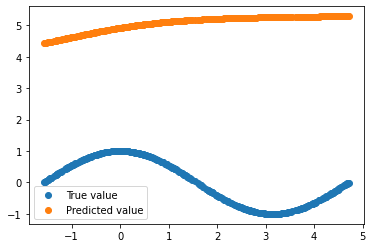

In [39]:
# test the model    
y_test_pred = model.forward(x_test) 
print(y_test_pred.size())
print(x_test.size())

plt.figure(1)
plt.scatter(x_test.detach(),y_test.detach(),label="True value")
plt.scatter(x_test.detach(),y_test_pred.detach(),label='Predicted value')
plt.legend()

#### Implement Training 

In [40]:
# setting the random seed for reproducibility
torch.manual_seed(0)

#  the learning rate 
learning_rate = 1e-2
optimizer     = torch.optim.Adam(model.parameters(),lr=learning_rate)
#optimizer     = torch.optim.SGD(model.parameters(),lr=learning_rate)

loss = torch.nn.MSELoss()

epoch = 1000
bat_size = 50
n_items = len(x_train)
batches_per_epoch = n_items // bat_size
max_batches = epoch * batches_per_epoch
loss_hist = []


for b in range(max_batches):
    curr_bat = np.random.choice(n_items, bat_size,
          replace=False)
    batchX = x_train[curr_bat]
    batchY = y_train[curr_bat].view(bat_size,1)
    
    # clear the gradients
    optimizer.zero_grad()
    
    # evaluate the function
    batchy_pred = model.forward(batchX)
    
    # compute the loss function
    loss_obj = loss(batchy_pred, batchY)
    
    # compute the gradient of the model parameters
    loss_obj.backward()
    
    # update the parameters
    optimizer.step()
    
#     with torch.no_grad():
#         model.w1 -=learning_rate*model.w1.grad
#         model.b1 -=learning_rate*model.b1.grad
#         model.w2 -=learning_rate*model.w2.grad
#         model.b2 -=learning_rate*model.b2.grad
#         model.w3 -=learning_rate*model.w3.grad
#         model.b3 -=learning_rate*model.b3.grad
        
#         model.w1.grad = None
#         model.b1.grad = None
#         model.w2.grad = None
#         model.b2.grad = None
#         model.w3.grad = None
#         model.b3.grad = None

    #print("@epoch : ", b, " #Loss : ", loss_obj.item())
    loss_hist.append(loss_obj.item())
    
    if b % (max_batches // 10) == 0:
        print("batch = %6d" % b, end="")
        print("  batch loss = %10.8f" % loss_obj.item(), end="")
        print("\n")

batch =      0  batch loss = 27.24151611

batch =   3200  batch loss = 0.00217584

batch =   6400  batch loss = 0.00000962

batch =   9600  batch loss = 0.00009042

batch =  12800  batch loss = 0.00000123

batch =  16000  batch loss = 0.00000487

batch =  19200  batch loss = 0.00001036

batch =  22400  batch loss = 0.00002155

batch =  25600  batch loss = 0.00000245

batch =  28800  batch loss = 0.00000445



**plot the convergence history**

Text(0.5, 1.0, 'Training loss history')

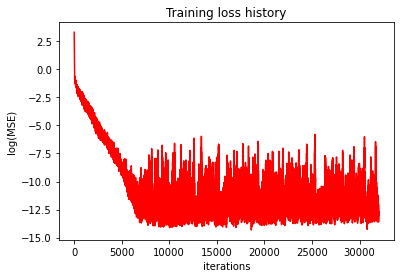

In [41]:
plt.plot(np.log(loss_hist),'r')
plt.xlabel('iterations')
plt.ylabel('log(MSE)')
plt.title('Training loss history')

#### Evalutation the ANN After training

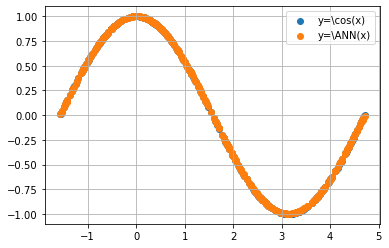

In [42]:
# test the model    
y_test_pred = model.forward(x_test) 

plt.figure(1)
plt.scatter(x_test.detach(),y_test.detach(),label="y=\cos(x)")
plt.scatter(x_test.detach(),y_test_pred.detach(),label='y=\ANN(x)')
plt.grid()
plt.legend()

**Check out weights and biases**

In [43]:
print('w1:',model.w1) 
print('w1.grad:',model.w1.grad) 
print('b1',model.b1)
print('b1.grad:',model.b1)

w1: Parameter containing:
tensor([[ 0.4740,  0.6952,  0.4000, -0.4287,  2.2885,  0.4281,  2.5096,  2.4806,
          0.3971, -0.9570]], requires_grad=True)
w1.grad: tensor([[-2.3528e-03, -3.3645e-03, -2.3356e-03,  4.2953e-04,  6.5348e-04,
         -1.3221e-03,  1.0777e-04,  8.0633e-06, -2.2606e-03, -1.0999e-04]])
b1 Parameter containing:
tensor([-1.6598, -2.8322, -0.7158,  0.0601, -5.3458, -0.3070, -3.4470, -1.2011,
        -0.8182, -1.3173], requires_grad=True)
b1.grad: Parameter containing:
tensor([-1.6598, -2.8322, -0.7158,  0.0601, -5.3458, -0.3070, -3.4470, -1.2011,
        -0.8182, -1.3173], requires_grad=True)


### Version B:  ANNs using Pytorch's high level APIs

In [44]:
import torch
import torch.nn as nn
    
class NeuralNetworkHigh(nn.Module):

    def __init__(self, in_features=1,out_features=1,neurons=2, actvfun = nn.Sigmoid):
        super(NeuralNetworkHigh, self).__init__()  
        ## the input layer
        self.layer1=nn.Linear(in_features, neurons)
        ## hidden layer
        self.layer2=nn.Linear(neurons, neurons) 
        ## hidden layer
        self.layer3=nn.Linear(neurons, out_features)
        ## activation function
        self.actvfun=actvfun() 
        
        ## put all the layers together        
        self.fnn = nn.Sequential(self.layer1,self.actvfun,
                   self.layer2,self.actvfun,self.layer3) 
    def forward(self, x):
        y = self.fnn(x)
        return y


#### Process the  dataset for training and testing 

torch.Size([2000])


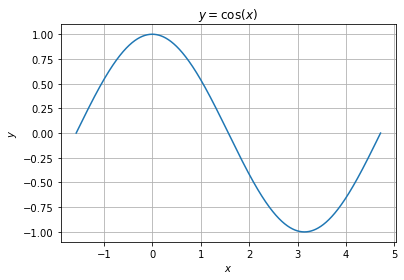

In [45]:
import math
import matplotlib.pyplot as plt
n_samples = 2000
## 
x = torch.linspace(-0.5*math.pi, 1.5*math.pi, steps=n_samples, requires_grad=False)
y = torch.cos(x)

# x.detach return the array for the matplot
plt.plot(x.detach(),y.detach())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y=\cos(x)$')
plt.grid()
print(x.size())

In [46]:
## Shuffle the indices
import numpy as np
indices = np.arange(0,n_samples) 
np.random.shuffle(indices) # shuffle the indicies

index_split = math.floor(0.8*n_samples)
indices_train = indices[0:index_split]
indices_test  = indices[index_split:-1]

## create a train part and a test part, no overlappling data
x = torch.reshape(x, (-1, 1))

x_train = x[indices_train]
y_train = y[indices_train]

x_test = x[indices_test]
y_test = y[indices_test]

## 
print(x_train.size())
print(x_test.size())


torch.Size([1600, 1])
torch.Size([399, 1])


#### Building the ANN model

In [47]:
NofIn    = 1
NofOut   = 1
NofNodes = 10

#initialize ANN
model    = NeuralNetworkHigh(NofIn,NofOut,NofNodes,torch.nn.Sigmoid)
#initialize loss function
loss_mse = torch.nn.MSELoss()

print(model)

NeuralNetworkHigh(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (actvfun): Sigmoid()
  (fnn): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)


#### Before training

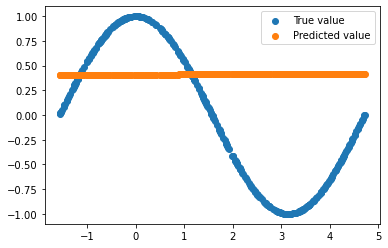

In [48]:
# test the model    
y_test_pred = model.forward(x_test) 
plt.figure(1)
plt.scatter(x_test.detach(),y_test.detach(),label="True value")
plt.scatter(x_test.detach(),y_test_pred.detach(),label='Predicted value')
plt.legend()

without batchsize, it is difficult to train the ANN**.

#### Implement Training 

In [49]:
# setting the random seed for reproducibility
torch.manual_seed(0)

#  the learning rate 
learning_rate = 1e-2
optimizer     = torch.optim.Adam(model.parameters(),lr=learning_rate)
loss = torch.nn.MSELoss()

epoch    = 1000
bat_size = 50
n_items  = len(x_train)
batches_per_epoch = n_items // bat_size
max_batches = epoch * batches_per_epoch
loss_hist = []


for b in range(max_batches):
    curr_bat = np.random.choice(n_items, bat_size,
          replace=False)
    batchX = x_train[curr_bat]
    batchY = y_train[curr_bat].view(bat_size,1)
    
    # clear the gradients
    optimizer.zero_grad()
    
    # evaluate the function
    batchy_pred = model.forward(batchX)
    
    # compute the loss function
    loss_obj = loss(batchy_pred, batchY)
    
    # compute the gradient of the model parameters
    loss_obj.backward()
    
    # update the parameters
    optimizer.step()
    
    
    #print("@epoch : ", b, " #Loss : ", loss_obj.item())
    loss_hist.append(loss_obj.item())
    
    if b % (max_batches // 10) == 0:
        print("batch = %6d" % b, end="")
        print("  batch loss = %10.8f" % loss_obj.item(), end="")
        print("\n")

batch =      0  batch loss = 0.59832925

batch =   3200  batch loss = 0.00007870

batch =   6400  batch loss = 0.00008452

batch =   9600  batch loss = 0.00000642

batch =  12800  batch loss = 0.00003712

batch =  16000  batch loss = 0.00058147

batch =  19200  batch loss = 0.00000177

batch =  22400  batch loss = 0.00000193

batch =  25600  batch loss = 0.00000015

batch =  28800  batch loss = 0.00000193



**plot the convergence history**

Text(0.5, 1.0, 'Training loss history')

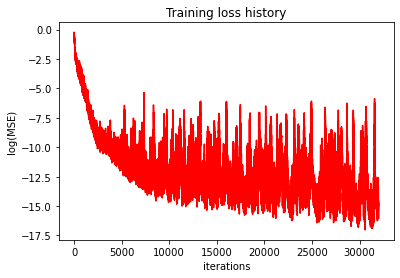

In [50]:
plt.plot(np.log(loss_hist),'r')
plt.xlabel('iterations')
plt.ylabel('log(MSE)')
plt.title('Training loss history')

#### Evalutation the ANN After training

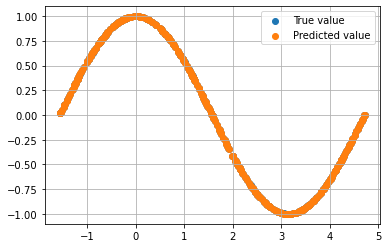

In [51]:
# test the model    
y_test_pred = model.forward(x_test) 

plt.figure(1)
plt.scatter(x_test.detach(),y_test.detach(),label="True value")
plt.scatter(x_test.detach(),y_test_pred.detach(),label='Predicted value')
plt.grid()
plt.legend()

In [52]:
print('model.layer1.weight:',model.layer1.weight) 
print('model.layer1.bias:',model.layer1.bias) 
print('model.layer1.weight.grad:',model.layer1.weight.grad)

model.layer1.weight: Parameter containing:
tensor([[ 1.8948],
        [ 1.6971],
        [-2.0708],
        [-1.6560],
        [-1.6397],
        [ 2.7532],
        [ 1.2229],
        [ 0.8471],
        [-2.1784],
        [ 0.9251]], requires_grad=True)
model.layer1.bias: Parameter containing:
tensor([-1.7189, -4.5297,  0.7479,  1.4470,  2.4407, -0.8972,  2.2323,  1.2852,
         0.7073, -4.4120], requires_grad=True)
model.layer1.weight.grad: tensor([[ 3.3816e-05],
        [ 2.2467e-04],
        [-3.2189e-05],
        [-1.1313e-04],
        [-1.8500e-04],
        [ 8.1450e-06],
        [-6.7456e-05],
        [-5.0231e-05],
        [-3.5657e-05],
        [-1.1312e-03]])


#### Save and load model

In [53]:
# save model to a file
model_file = 'model.pth'
torch.save(model, model_file)

In [54]:
# load model from a file
model_loaded = torch.load(model_file)

In [55]:
y_test_pred = model_loaded.forward(x_test) 

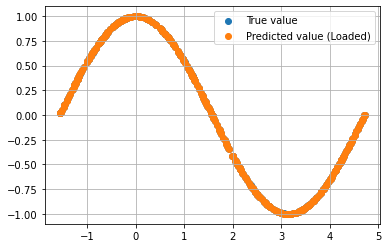

In [56]:
plt.figure(1)
plt.scatter(x_test.detach(),y_test.detach(),label="True value")
plt.scatter(x_test.detach(),y_test_pred.detach(),label='Predicted value (Loaded)')
plt.grid()
plt.legend()

**Implement the model on a GPU**

In [57]:
if torch.cuda.is_available(): 
    print(f"CUDA version: {torch.version.cuda}")    

CUDA version: 11.3


In [58]:
print(x_test.device)
print(x_test.size())

cpu
torch.Size([399, 1])


In [59]:
x_test_cuda = x_test.to('cuda')
print(x_test_cuda.device)
print(x_test_cuda.size())

cuda:0
torch.Size([399, 1])


In [60]:
# load model from a file
model_cpu = torch.load(model_file)
model_cuda=model_cpu.to(device='cuda')

In [61]:
y_pred_cuda = model_cuda(x_test_cuda)
print('y_pred_cuda.device is',y_pred_cuda.device)

y_pred_cuda.device is cuda:0


What if model and Tensor are not on the same device?

In [ ]:
model_cpu = torch.load(model_file)
y_pred_xx = model_cpu(x_test_cuda)